In [2]:
import catboost as cb
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("./data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [4]:
df_test = pd.read_csv("./data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


In [5]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

In [7]:
cat = cb.CatBoostClassifier()
param_dist= {'depth': [4, 7, 10],
             'learning_rate' : [0.03, 0.1, 0.15],
             'l2_leaf_reg': [1,4,9],
             'iterations': [100,200,300]}
grid_search = GridSearchCV(cat, param_dist, cv = 3, scoring="roc_auc", verbose=5)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.03 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6690259	total: 114ms	remaining: 11.3s
1:	learn: 0.6483148	total: 122ms	remaining: 5.96s
2:	learn: 0.6240032	total: 129ms	remaining: 4.17s
3:	learn: 0.6044760	total: 137ms	remaining: 3.28s
4:	learn: 0.5869202	total: 144ms	remaining: 2.73s
5:	learn: 0.5699406	total: 151ms	remaining: 2.37s
6:	learn: 0.5528065	total: 159ms	remaining: 2.11s
7:	learn: 0.5362306	total: 166ms	remaining: 1.91s
8:	learn: 0.5199628	total: 173ms	remaining: 1.75s
9:	learn: 0.5044092	total: 181ms	remaining: 1.63s
10:	learn: 0.4918063	total: 188ms	remaining: 1.52s
11:	learn: 0.4805404	total: 196ms	remaining: 1.44s
12:	learn: 0.4703662	total: 203ms	remaining: 1.36s
13:	learn: 0.4593780	total: 211ms	remaining: 1.29s
14:	learn: 0.4492975	total: 218ms	remaining: 1.24s
15:	learn: 0.4404186	total: 226ms	remaining: 1.19s
16:	learn: 0.4304840	total: 233ms	remaining: 1.14s
17:	learn: 0.4235708	total: 241ms	remaining: 1.1s
18:	learn: 0.4144178	total: 248ms	remaining: 1.06s
19:	learn: 0.4077969	total: 256ms	remainin

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


6:	learn: 0.5446366	total: 102ms	remaining: 1.35s
7:	learn: 0.5287353	total: 117ms	remaining: 1.34s
8:	learn: 0.5136254	total: 130ms	remaining: 1.32s
9:	learn: 0.4995659	total: 153ms	remaining: 1.38s
10:	learn: 0.4867674	total: 163ms	remaining: 1.32s
11:	learn: 0.4745111	total: 171ms	remaining: 1.25s
12:	learn: 0.4626338	total: 179ms	remaining: 1.2s
13:	learn: 0.4501375	total: 187ms	remaining: 1.15s
14:	learn: 0.4393949	total: 195ms	remaining: 1.1s
15:	learn: 0.4307463	total: 202ms	remaining: 1.06s
16:	learn: 0.4217390	total: 210ms	remaining: 1.02s
17:	learn: 0.4141813	total: 217ms	remaining: 990ms
18:	learn: 0.4062004	total: 225ms	remaining: 959ms
19:	learn: 0.4008630	total: 232ms	remaining: 929ms
20:	learn: 0.3953244	total: 240ms	remaining: 902ms
21:	learn: 0.3887431	total: 247ms	remaining: 877ms
22:	learn: 0.3817910	total: 255ms	remaining: 853ms
23:	learn: 0.3753365	total: 262ms	remaining: 831ms
24:	learn: 0.3699843	total: 270ms	remaining: 810ms
25:	learn: 0.3649024	total: 278ms	rem

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


16:	learn: 0.4460962	total: 134ms	remaining: 655ms
17:	learn: 0.4381619	total: 147ms	remaining: 669ms
18:	learn: 0.4299557	total: 157ms	remaining: 668ms
19:	learn: 0.4210376	total: 164ms	remaining: 657ms
20:	learn: 0.4150758	total: 172ms	remaining: 648ms
21:	learn: 0.4096939	total: 180ms	remaining: 637ms
22:	learn: 0.4042890	total: 188ms	remaining: 628ms
23:	learn: 0.3975907	total: 195ms	remaining: 618ms
24:	learn: 0.3923090	total: 203ms	remaining: 609ms
25:	learn: 0.3880401	total: 211ms	remaining: 599ms
26:	learn: 0.3835521	total: 218ms	remaining: 590ms
27:	learn: 0.3784569	total: 226ms	remaining: 581ms
28:	learn: 0.3732150	total: 234ms	remaining: 572ms
29:	learn: 0.3688700	total: 241ms	remaining: 563ms
30:	learn: 0.3648596	total: 249ms	remaining: 554ms
31:	learn: 0.3610084	total: 256ms	remaining: 545ms
32:	learn: 0.3567943	total: 264ms	remaining: 536ms
33:	learn: 0.3539284	total: 272ms	remaining: 527ms
34:	learn: 0.3503909	total: 279ms	remaining: 519ms
35:	learn: 0.3466790	total: 287

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


16:	learn: 0.2764600	total: 132ms	remaining: 645ms
17:	learn: 0.2716792	total: 145ms	remaining: 663ms
18:	learn: 0.2656741	total: 155ms	remaining: 662ms
19:	learn: 0.2609061	total: 164ms	remaining: 657ms
20:	learn: 0.2580864	total: 172ms	remaining: 647ms
21:	learn: 0.2529701	total: 180ms	remaining: 638ms
22:	learn: 0.2483587	total: 187ms	remaining: 628ms
23:	learn: 0.2452695	total: 195ms	remaining: 619ms
24:	learn: 0.2417864	total: 203ms	remaining: 608ms
25:	learn: 0.2387617	total: 210ms	remaining: 599ms
26:	learn: 0.2361251	total: 219ms	remaining: 592ms
27:	learn: 0.2331303	total: 233ms	remaining: 600ms
28:	learn: 0.2308292	total: 251ms	remaining: 614ms
29:	learn: 0.2276814	total: 265ms	remaining: 618ms
30:	learn: 0.2255055	total: 274ms	remaining: 609ms
31:	learn: 0.2227090	total: 281ms	remaining: 598ms
32:	learn: 0.2212598	total: 289ms	remaining: 587ms
33:	learn: 0.2189383	total: 297ms	remaining: 576ms
34:	learn: 0.2174899	total: 305ms	remaining: 567ms
35:	learn: 0.2154515	total: 313

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s


17:	learn: 0.2696378	total: 141ms	remaining: 641ms
18:	learn: 0.2642434	total: 152ms	remaining: 648ms
19:	learn: 0.2602336	total: 164ms	remaining: 654ms
20:	learn: 0.2555206	total: 173ms	remaining: 652ms
21:	learn: 0.2496282	total: 181ms	remaining: 641ms
22:	learn: 0.2455524	total: 191ms	remaining: 638ms
23:	learn: 0.2415841	total: 200ms	remaining: 634ms
24:	learn: 0.2387006	total: 208ms	remaining: 623ms
25:	learn: 0.2348371	total: 215ms	remaining: 612ms
26:	learn: 0.2320854	total: 223ms	remaining: 602ms
27:	learn: 0.2284022	total: 232ms	remaining: 598ms
28:	learn: 0.2256537	total: 240ms	remaining: 588ms
29:	learn: 0.2235272	total: 249ms	remaining: 581ms
30:	learn: 0.2202229	total: 257ms	remaining: 571ms
31:	learn: 0.2180575	total: 264ms	remaining: 562ms
32:	learn: 0.2157449	total: 274ms	remaining: 555ms
33:	learn: 0.2142025	total: 283ms	remaining: 549ms
34:	learn: 0.2117228	total: 291ms	remaining: 541ms
35:	learn: 0.2099213	total: 299ms	remaining: 532ms
36:	learn: 0.2082338	total: 307

93:	learn: 0.1643667	total: 755ms	remaining: 48.2ms
94:	learn: 0.1631553	total: 766ms	remaining: 40.3ms
95:	learn: 0.1620505	total: 775ms	remaining: 32.3ms
96:	learn: 0.1605808	total: 784ms	remaining: 24.3ms
97:	learn: 0.1594949	total: 792ms	remaining: 16.2ms
98:	learn: 0.1584491	total: 799ms	remaining: 8.07ms
99:	learn: 0.1575302	total: 807ms	remaining: 0us
[CV]  depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.1, score=0.974, total=   1.1s
[CV] depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.15 ......
0:	learn: 0.5843071	total: 7.46ms	remaining: 739ms
1:	learn: 0.5107428	total: 15.1ms	remaining: 741ms
2:	learn: 0.4442310	total: 22.7ms	remaining: 735ms
3:	learn: 0.4053519	total: 30.2ms	remaining: 726ms
4:	learn: 0.3738435	total: 37.8ms	remaining: 719ms
5:	learn: 0.3489197	total: 45.4ms	remaining: 711ms
6:	learn: 0.3302729	total: 53.1ms	remaining: 705ms
7:	learn: 0.3150295	total: 60.6ms	remaining: 697ms
8:	learn: 0.3043042	total: 68.1ms	remaining: 689ms
9:	learn: 0.29437

69:	learn: 0.1265313	total: 548ms	remaining: 235ms
70:	learn: 0.1253889	total: 560ms	remaining: 229ms
71:	learn: 0.1239005	total: 568ms	remaining: 221ms
72:	learn: 0.1227928	total: 577ms	remaining: 213ms
73:	learn: 0.1213682	total: 585ms	remaining: 205ms
74:	learn: 0.1199856	total: 592ms	remaining: 197ms
75:	learn: 0.1186378	total: 600ms	remaining: 189ms
76:	learn: 0.1175082	total: 607ms	remaining: 181ms
77:	learn: 0.1164370	total: 615ms	remaining: 173ms
78:	learn: 0.1151321	total: 622ms	remaining: 165ms
79:	learn: 0.1138455	total: 630ms	remaining: 157ms
80:	learn: 0.1126693	total: 637ms	remaining: 149ms
81:	learn: 0.1119148	total: 645ms	remaining: 142ms
82:	learn: 0.1106757	total: 654ms	remaining: 134ms
83:	learn: 0.1095440	total: 665ms	remaining: 127ms
84:	learn: 0.1080980	total: 674ms	remaining: 119ms
85:	learn: 0.1073133	total: 684ms	remaining: 111ms
86:	learn: 0.1060252	total: 692ms	remaining: 103ms
87:	learn: 0.1047464	total: 699ms	remaining: 95.3ms
88:	learn: 0.1033110	total: 70

39:	learn: 0.3156932	total: 314ms	remaining: 471ms
40:	learn: 0.3133423	total: 325ms	remaining: 468ms
41:	learn: 0.3101015	total: 336ms	remaining: 464ms
42:	learn: 0.3073196	total: 346ms	remaining: 458ms
43:	learn: 0.3049804	total: 355ms	remaining: 452ms
44:	learn: 0.3023178	total: 362ms	remaining: 443ms
45:	learn: 0.3001720	total: 370ms	remaining: 434ms
46:	learn: 0.2982318	total: 378ms	remaining: 426ms
47:	learn: 0.2955577	total: 385ms	remaining: 417ms
48:	learn: 0.2934696	total: 393ms	remaining: 409ms
49:	learn: 0.2914981	total: 400ms	remaining: 400ms
50:	learn: 0.2892103	total: 408ms	remaining: 392ms
51:	learn: 0.2867424	total: 415ms	remaining: 383ms
52:	learn: 0.2847870	total: 423ms	remaining: 375ms
53:	learn: 0.2830504	total: 431ms	remaining: 367ms
54:	learn: 0.2811213	total: 438ms	remaining: 358ms
55:	learn: 0.2791805	total: 446ms	remaining: 350ms
56:	learn: 0.2775044	total: 453ms	remaining: 342ms
57:	learn: 0.2756432	total: 461ms	remaining: 334ms
58:	learn: 0.2741049	total: 469

[CV]  depth=4, iterations=100, l2_leaf_reg=4, learning_rate=0.03, score=0.938, total=   1.1s
[CV] depth=4, iterations=100, l2_leaf_reg=4, learning_rate=0.03 ......
0:	learn: 0.6711536	total: 7.64ms	remaining: 757ms
1:	learn: 0.6486867	total: 15.7ms	remaining: 767ms
2:	learn: 0.6264687	total: 23ms	remaining: 742ms
3:	learn: 0.6099610	total: 30.4ms	remaining: 730ms
4:	learn: 0.5907053	total: 37.8ms	remaining: 718ms
5:	learn: 0.5735345	total: 45.3ms	remaining: 710ms
6:	learn: 0.5593473	total: 53ms	remaining: 704ms
7:	learn: 0.5445987	total: 60.6ms	remaining: 697ms
8:	learn: 0.5300469	total: 68ms	remaining: 688ms
9:	learn: 0.5162110	total: 75.7ms	remaining: 681ms
10:	learn: 0.5030423	total: 83.5ms	remaining: 675ms
11:	learn: 0.4918606	total: 91ms	remaining: 667ms
12:	learn: 0.4826426	total: 98.6ms	remaining: 660ms
13:	learn: 0.4719113	total: 106ms	remaining: 652ms
14:	learn: 0.4625938	total: 114ms	remaining: 645ms
15:	learn: 0.4521742	total: 121ms	remaining: 637ms
16:	learn: 0.4442280	tota

66:	learn: 0.1768303	total: 543ms	remaining: 268ms
67:	learn: 0.1757401	total: 555ms	remaining: 261ms
68:	learn: 0.1749164	total: 563ms	remaining: 253ms
69:	learn: 0.1739482	total: 571ms	remaining: 245ms
70:	learn: 0.1733886	total: 580ms	remaining: 237ms
71:	learn: 0.1721610	total: 588ms	remaining: 228ms
72:	learn: 0.1707353	total: 595ms	remaining: 220ms
73:	learn: 0.1696223	total: 603ms	remaining: 212ms
74:	learn: 0.1690285	total: 610ms	remaining: 203ms
75:	learn: 0.1685458	total: 618ms	remaining: 195ms
76:	learn: 0.1678140	total: 625ms	remaining: 187ms
77:	learn: 0.1667759	total: 633ms	remaining: 179ms
78:	learn: 0.1658112	total: 640ms	remaining: 170ms
79:	learn: 0.1650883	total: 648ms	remaining: 162ms
80:	learn: 0.1637263	total: 655ms	remaining: 154ms
81:	learn: 0.1626492	total: 663ms	remaining: 145ms
82:	learn: 0.1616555	total: 670ms	remaining: 137ms
83:	learn: 0.1607472	total: 678ms	remaining: 129ms
84:	learn: 0.1601366	total: 685ms	remaining: 121ms
85:	learn: 0.1587499	total: 692

39:	learn: 0.2319155	total: 328ms	remaining: 492ms
40:	learn: 0.2306921	total: 340ms	remaining: 489ms
41:	learn: 0.2291731	total: 349ms	remaining: 482ms
42:	learn: 0.2273114	total: 358ms	remaining: 475ms
43:	learn: 0.2258722	total: 366ms	remaining: 466ms
44:	learn: 0.2237372	total: 374ms	remaining: 457ms
45:	learn: 0.2226116	total: 381ms	remaining: 448ms
46:	learn: 0.2216266	total: 389ms	remaining: 439ms
47:	learn: 0.2205504	total: 396ms	remaining: 429ms
48:	learn: 0.2191362	total: 404ms	remaining: 420ms
49:	learn: 0.2179735	total: 411ms	remaining: 411ms
50:	learn: 0.2172088	total: 419ms	remaining: 402ms
51:	learn: 0.2150385	total: 426ms	remaining: 393ms
52:	learn: 0.2132453	total: 433ms	remaining: 384ms
53:	learn: 0.2120662	total: 441ms	remaining: 376ms
54:	learn: 0.2114114	total: 448ms	remaining: 367ms
55:	learn: 0.2101529	total: 456ms	remaining: 358ms
56:	learn: 0.2091650	total: 464ms	remaining: 350ms
57:	learn: 0.2080316	total: 471ms	remaining: 341ms
58:	learn: 0.2065816	total: 479

[CV]  depth=4, iterations=100, l2_leaf_reg=4, learning_rate=0.15, score=0.957, total=   1.1s
[CV] depth=4, iterations=100, l2_leaf_reg=4, learning_rate=0.15 ......
0:	learn: 0.5796746	total: 7.47ms	remaining: 739ms
1:	learn: 0.5060250	total: 15.4ms	remaining: 756ms
2:	learn: 0.4487032	total: 23.1ms	remaining: 747ms
3:	learn: 0.4103748	total: 30.8ms	remaining: 738ms
4:	learn: 0.3742122	total: 38.5ms	remaining: 732ms
5:	learn: 0.3506410	total: 46.2ms	remaining: 724ms
6:	learn: 0.3296620	total: 53.8ms	remaining: 715ms
7:	learn: 0.3127000	total: 61.4ms	remaining: 706ms
8:	learn: 0.3014715	total: 68.9ms	remaining: 697ms
9:	learn: 0.2902643	total: 76.6ms	remaining: 689ms
10:	learn: 0.2810836	total: 84.1ms	remaining: 681ms
11:	learn: 0.2730012	total: 91.6ms	remaining: 672ms
12:	learn: 0.2659754	total: 99.5ms	remaining: 666ms
13:	learn: 0.2582540	total: 108ms	remaining: 664ms
14:	learn: 0.2519028	total: 116ms	remaining: 656ms
15:	learn: 0.2450477	total: 124ms	remaining: 649ms
16:	learn: 0.2405

68:	learn: 0.1616118	total: 540ms	remaining: 243ms
69:	learn: 0.1607009	total: 551ms	remaining: 236ms
70:	learn: 0.1600129	total: 561ms	remaining: 229ms
71:	learn: 0.1587194	total: 569ms	remaining: 221ms
72:	learn: 0.1573711	total: 578ms	remaining: 214ms
73:	learn: 0.1552909	total: 585ms	remaining: 206ms
74:	learn: 0.1536699	total: 593ms	remaining: 198ms
75:	learn: 0.1531063	total: 601ms	remaining: 190ms
76:	learn: 0.1520909	total: 608ms	remaining: 182ms
77:	learn: 0.1507523	total: 616ms	remaining: 174ms
78:	learn: 0.1497014	total: 623ms	remaining: 166ms
79:	learn: 0.1481189	total: 631ms	remaining: 158ms
80:	learn: 0.1474818	total: 638ms	remaining: 150ms
81:	learn: 0.1464594	total: 646ms	remaining: 142ms
82:	learn: 0.1456498	total: 653ms	remaining: 134ms
83:	learn: 0.1442480	total: 661ms	remaining: 126ms
84:	learn: 0.1430755	total: 668ms	remaining: 118ms
85:	learn: 0.1420299	total: 676ms	remaining: 110ms
86:	learn: 0.1404366	total: 684ms	remaining: 102ms
87:	learn: 0.1392025	total: 691

41:	learn: 0.3067512	total: 337ms	remaining: 465ms
42:	learn: 0.3038182	total: 350ms	remaining: 463ms
43:	learn: 0.3018039	total: 361ms	remaining: 459ms
44:	learn: 0.2992986	total: 370ms	remaining: 452ms
45:	learn: 0.2966058	total: 378ms	remaining: 443ms
46:	learn: 0.2945026	total: 385ms	remaining: 435ms
47:	learn: 0.2925727	total: 393ms	remaining: 426ms
48:	learn: 0.2908997	total: 401ms	remaining: 417ms
49:	learn: 0.2888524	total: 408ms	remaining: 408ms
50:	learn: 0.2872025	total: 416ms	remaining: 400ms
51:	learn: 0.2845731	total: 424ms	remaining: 391ms
52:	learn: 0.2827418	total: 431ms	remaining: 382ms
53:	learn: 0.2812779	total: 439ms	remaining: 374ms
54:	learn: 0.2797036	total: 446ms	remaining: 365ms
55:	learn: 0.2783309	total: 454ms	remaining: 356ms
56:	learn: 0.2758926	total: 462ms	remaining: 349ms
57:	learn: 0.2743045	total: 470ms	remaining: 340ms
58:	learn: 0.2726352	total: 477ms	remaining: 332ms
59:	learn: 0.2715229	total: 485ms	remaining: 323ms
60:	learn: 0.2698478	total: 492

[CV]  depth=4, iterations=100, l2_leaf_reg=9, learning_rate=0.03, score=0.965, total=   1.1s
[CV] depth=4, iterations=100, l2_leaf_reg=9, learning_rate=0.1 .......
0:	learn: 0.6173529	total: 7.59ms	remaining: 752ms
1:	learn: 0.5535232	total: 15.6ms	remaining: 763ms
2:	learn: 0.5008970	total: 23.2ms	remaining: 751ms
3:	learn: 0.4648981	total: 31ms	remaining: 744ms
4:	learn: 0.4297725	total: 38.7ms	remaining: 735ms
5:	learn: 0.4061575	total: 46.4ms	remaining: 726ms
6:	learn: 0.3823434	total: 54.1ms	remaining: 719ms
7:	learn: 0.3621150	total: 61.7ms	remaining: 710ms
8:	learn: 0.3481595	total: 69.4ms	remaining: 701ms
9:	learn: 0.3368112	total: 77.2ms	remaining: 695ms
10:	learn: 0.3263825	total: 84.7ms	remaining: 685ms
11:	learn: 0.3153490	total: 92.2ms	remaining: 676ms
12:	learn: 0.3070145	total: 99.8ms	remaining: 668ms
13:	learn: 0.2979552	total: 107ms	remaining: 659ms
14:	learn: 0.2915488	total: 115ms	remaining: 651ms
15:	learn: 0.2867199	total: 123ms	remaining: 644ms
16:	learn: 0.279692

65:	learn: 0.1673688	total: 527ms	remaining: 271ms
66:	learn: 0.1664203	total: 540ms	remaining: 266ms
67:	learn: 0.1656889	total: 551ms	remaining: 259ms
68:	learn: 0.1641427	total: 559ms	remaining: 251ms
69:	learn: 0.1631412	total: 567ms	remaining: 243ms
70:	learn: 0.1620588	total: 575ms	remaining: 235ms
71:	learn: 0.1609342	total: 582ms	remaining: 226ms
72:	learn: 0.1602543	total: 589ms	remaining: 218ms
73:	learn: 0.1595395	total: 597ms	remaining: 210ms
74:	learn: 0.1588911	total: 604ms	remaining: 201ms
75:	learn: 0.1581047	total: 612ms	remaining: 193ms
76:	learn: 0.1576857	total: 619ms	remaining: 185ms
77:	learn: 0.1560963	total: 627ms	remaining: 177ms
78:	learn: 0.1552616	total: 634ms	remaining: 169ms
79:	learn: 0.1543912	total: 642ms	remaining: 160ms
80:	learn: 0.1536959	total: 649ms	remaining: 152ms
81:	learn: 0.1524305	total: 657ms	remaining: 144ms
82:	learn: 0.1512781	total: 664ms	remaining: 136ms
83:	learn: 0.1506561	total: 672ms	remaining: 128ms
84:	learn: 0.1499161	total: 681

36:	learn: 0.1901783	total: 326ms	remaining: 555ms
37:	learn: 0.1890875	total: 347ms	remaining: 566ms
38:	learn: 0.1869366	total: 356ms	remaining: 557ms
39:	learn: 0.1861301	total: 364ms	remaining: 546ms
40:	learn: 0.1836331	total: 372ms	remaining: 535ms
41:	learn: 0.1820701	total: 379ms	remaining: 524ms
42:	learn: 0.1809992	total: 387ms	remaining: 512ms
43:	learn: 0.1794998	total: 394ms	remaining: 501ms
44:	learn: 0.1764749	total: 402ms	remaining: 491ms
45:	learn: 0.1752975	total: 409ms	remaining: 480ms
46:	learn: 0.1738252	total: 417ms	remaining: 470ms
47:	learn: 0.1728873	total: 424ms	remaining: 459ms
48:	learn: 0.1717462	total: 432ms	remaining: 449ms
49:	learn: 0.1703065	total: 439ms	remaining: 439ms
50:	learn: 0.1690901	total: 447ms	remaining: 429ms
51:	learn: 0.1682126	total: 454ms	remaining: 419ms
52:	learn: 0.1666921	total: 461ms	remaining: 409ms
53:	learn: 0.1654546	total: 469ms	remaining: 399ms
54:	learn: 0.1645487	total: 476ms	remaining: 390ms
55:	learn: 0.1627837	total: 485

[CV]  depth=4, iterations=100, l2_leaf_reg=9, learning_rate=0.15, score=0.947, total=   1.1s
[CV] depth=4, iterations=100, l2_leaf_reg=9, learning_rate=0.15 ......
0:	learn: 0.5939145	total: 7.46ms	remaining: 739ms
1:	learn: 0.5067392	total: 15.3ms	remaining: 748ms
2:	learn: 0.4580931	total: 22.9ms	remaining: 740ms
3:	learn: 0.4208826	total: 30.5ms	remaining: 733ms
4:	learn: 0.3870332	total: 38.2ms	remaining: 726ms
5:	learn: 0.3650936	total: 45.8ms	remaining: 718ms
6:	learn: 0.3472346	total: 53.4ms	remaining: 710ms
7:	learn: 0.3304701	total: 61ms	remaining: 701ms
8:	learn: 0.3167286	total: 68.7ms	remaining: 695ms
9:	learn: 0.3085168	total: 76.4ms	remaining: 688ms
10:	learn: 0.2986452	total: 84ms	remaining: 680ms
11:	learn: 0.2922122	total: 91.6ms	remaining: 672ms
12:	learn: 0.2886966	total: 99.2ms	remaining: 664ms
13:	learn: 0.2838891	total: 107ms	remaining: 657ms
14:	learn: 0.2791796	total: 115ms	remaining: 650ms
15:	learn: 0.2736956	total: 122ms	remaining: 643ms
16:	learn: 0.2673801	

68:	learn: 0.2608898	total: 542ms	remaining: 1.03s
69:	learn: 0.2597200	total: 553ms	remaining: 1.03s
70:	learn: 0.2583220	total: 564ms	remaining: 1.02s
71:	learn: 0.2570319	total: 572ms	remaining: 1.02s
72:	learn: 0.2558944	total: 579ms	remaining: 1.01s
73:	learn: 0.2549199	total: 587ms	remaining: 999ms
74:	learn: 0.2538421	total: 595ms	remaining: 991ms
75:	learn: 0.2528807	total: 602ms	remaining: 983ms
76:	learn: 0.2520563	total: 610ms	remaining: 974ms
77:	learn: 0.2506852	total: 617ms	remaining: 965ms
78:	learn: 0.2496649	total: 625ms	remaining: 957ms
79:	learn: 0.2486763	total: 632ms	remaining: 948ms
80:	learn: 0.2475805	total: 640ms	remaining: 940ms
81:	learn: 0.2464695	total: 647ms	remaining: 931ms
82:	learn: 0.2457764	total: 656ms	remaining: 925ms
83:	learn: 0.2448518	total: 664ms	remaining: 917ms
84:	learn: 0.2436970	total: 674ms	remaining: 911ms
85:	learn: 0.2424850	total: 684ms	remaining: 906ms
86:	learn: 0.2413080	total: 692ms	remaining: 899ms
87:	learn: 0.2402541	total: 699

41:	learn: 0.3060256	total: 335ms	remaining: 1.26s
42:	learn: 0.3035316	total: 346ms	remaining: 1.26s
43:	learn: 0.3007910	total: 356ms	remaining: 1.26s
44:	learn: 0.2982363	total: 367ms	remaining: 1.26s
45:	learn: 0.2962651	total: 376ms	remaining: 1.26s
46:	learn: 0.2943194	total: 384ms	remaining: 1.25s
47:	learn: 0.2925382	total: 391ms	remaining: 1.24s
48:	learn: 0.2904807	total: 399ms	remaining: 1.23s
49:	learn: 0.2884813	total: 406ms	remaining: 1.22s
50:	learn: 0.2866760	total: 414ms	remaining: 1.21s
51:	learn: 0.2845304	total: 421ms	remaining: 1.2s
52:	learn: 0.2821216	total: 429ms	remaining: 1.19s
53:	learn: 0.2802781	total: 436ms	remaining: 1.18s
54:	learn: 0.2782953	total: 444ms	remaining: 1.17s
55:	learn: 0.2767522	total: 451ms	remaining: 1.16s
56:	learn: 0.2746124	total: 458ms	remaining: 1.15s
57:	learn: 0.2723437	total: 466ms	remaining: 1.14s
58:	learn: 0.2705379	total: 474ms	remaining: 1.13s
59:	learn: 0.2693236	total: 481ms	remaining: 1.12s
60:	learn: 0.2674411	total: 488m

16:	learn: 0.4460962	total: 132ms	remaining: 1.43s
17:	learn: 0.4381619	total: 143ms	remaining: 1.45s
18:	learn: 0.4299557	total: 153ms	remaining: 1.46s
19:	learn: 0.4210376	total: 161ms	remaining: 1.45s
20:	learn: 0.4150758	total: 170ms	remaining: 1.45s
21:	learn: 0.4096939	total: 178ms	remaining: 1.44s
22:	learn: 0.4042890	total: 186ms	remaining: 1.43s
23:	learn: 0.3975907	total: 193ms	remaining: 1.42s
24:	learn: 0.3923090	total: 201ms	remaining: 1.41s
25:	learn: 0.3880401	total: 208ms	remaining: 1.39s
26:	learn: 0.3835521	total: 216ms	remaining: 1.38s
27:	learn: 0.3784569	total: 224ms	remaining: 1.37s
28:	learn: 0.3732150	total: 231ms	remaining: 1.36s
29:	learn: 0.3688700	total: 239ms	remaining: 1.35s
30:	learn: 0.3648596	total: 246ms	remaining: 1.34s
31:	learn: 0.3610084	total: 254ms	remaining: 1.33s
32:	learn: 0.3567943	total: 262ms	remaining: 1.32s
33:	learn: 0.3539284	total: 269ms	remaining: 1.31s
34:	learn: 0.3503909	total: 277ms	remaining: 1.3s
35:	learn: 0.3466790	total: 284m

194:	learn: 0.2038495	total: 1.57s	remaining: 40.4ms
195:	learn: 0.2034595	total: 1.58s	remaining: 32.3ms
196:	learn: 0.2030332	total: 1.59s	remaining: 24.3ms
197:	learn: 0.2025425	total: 1.6s	remaining: 16.2ms
198:	learn: 0.2022398	total: 1.61s	remaining: 8.1ms
199:	learn: 0.2017428	total: 1.62s	remaining: 0us
[CV]  depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.03, score=0.972, total=   1.9s
[CV] depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1 .......
0:	learn: 0.6173422	total: 7.4ms	remaining: 1.47s
1:	learn: 0.5595833	total: 15ms	remaining: 1.48s
2:	learn: 0.5019045	total: 22.5ms	remaining: 1.48s
3:	learn: 0.4628915	total: 29.9ms	remaining: 1.47s
4:	learn: 0.4316900	total: 37.8ms	remaining: 1.48s
5:	learn: 0.4038165	total: 45.3ms	remaining: 1.47s
6:	learn: 0.3822241	total: 52.9ms	remaining: 1.46s
7:	learn: 0.3646640	total: 60.4ms	remaining: 1.45s
8:	learn: 0.3486344	total: 67.8ms	remaining: 1.44s
9:	learn: 0.3374735	total: 75.5ms	remaining: 1.43s
10:	learn: 0.324

164:	learn: 0.0888406	total: 1.35s	remaining: 286ms
165:	learn: 0.0882913	total: 1.36s	remaining: 278ms
166:	learn: 0.0878222	total: 1.37s	remaining: 271ms
167:	learn: 0.0872635	total: 1.38s	remaining: 263ms
168:	learn: 0.0867206	total: 1.39s	remaining: 255ms
169:	learn: 0.0864956	total: 1.4s	remaining: 247ms
170:	learn: 0.0859954	total: 1.4s	remaining: 238ms
171:	learn: 0.0855440	total: 1.41s	remaining: 230ms
172:	learn: 0.0850920	total: 1.42s	remaining: 222ms
173:	learn: 0.0844830	total: 1.43s	remaining: 213ms
174:	learn: 0.0840509	total: 1.43s	remaining: 205ms
175:	learn: 0.0835714	total: 1.44s	remaining: 197ms
176:	learn: 0.0830024	total: 1.45s	remaining: 188ms
177:	learn: 0.0826674	total: 1.46s	remaining: 180ms
178:	learn: 0.0820994	total: 1.46s	remaining: 172ms
179:	learn: 0.0817847	total: 1.47s	remaining: 164ms
180:	learn: 0.0812220	total: 1.48s	remaining: 155ms
181:	learn: 0.0807938	total: 1.49s	remaining: 147ms
182:	learn: 0.0802452	total: 1.5s	remaining: 139ms
183:	learn: 0.0

143:	learn: 0.0984712	total: 1.15s	remaining: 446ms
144:	learn: 0.0978203	total: 1.16s	remaining: 439ms
145:	learn: 0.0971893	total: 1.17s	remaining: 432ms
146:	learn: 0.0967417	total: 1.18s	remaining: 424ms
147:	learn: 0.0959095	total: 1.19s	remaining: 416ms
148:	learn: 0.0952385	total: 1.19s	remaining: 408ms
149:	learn: 0.0944674	total: 1.2s	remaining: 400ms
150:	learn: 0.0938307	total: 1.21s	remaining: 392ms
151:	learn: 0.0932175	total: 1.22s	remaining: 384ms
152:	learn: 0.0924161	total: 1.22s	remaining: 376ms
153:	learn: 0.0915416	total: 1.23s	remaining: 368ms
154:	learn: 0.0909564	total: 1.24s	remaining: 359ms
155:	learn: 0.0903451	total: 1.25s	remaining: 351ms
156:	learn: 0.0896429	total: 1.25s	remaining: 343ms
157:	learn: 0.0889188	total: 1.26s	remaining: 335ms
158:	learn: 0.0883563	total: 1.27s	remaining: 327ms
159:	learn: 0.0877944	total: 1.28s	remaining: 319ms
160:	learn: 0.0871192	total: 1.28s	remaining: 311ms
161:	learn: 0.0864180	total: 1.29s	remaining: 303ms
162:	learn: 0

118:	learn: 0.1403170	total: 939ms	remaining: 639ms
119:	learn: 0.1391061	total: 950ms	remaining: 634ms
120:	learn: 0.1382433	total: 962ms	remaining: 628ms
121:	learn: 0.1374723	total: 973ms	remaining: 622ms
122:	learn: 0.1367080	total: 983ms	remaining: 615ms
123:	learn: 0.1355621	total: 992ms	remaining: 608ms
124:	learn: 0.1346445	total: 1s	remaining: 600ms
125:	learn: 0.1341236	total: 1.01s	remaining: 592ms
126:	learn: 0.1335262	total: 1.01s	remaining: 584ms
127:	learn: 0.1327365	total: 1.02s	remaining: 575ms
128:	learn: 0.1315909	total: 1.03s	remaining: 567ms
129:	learn: 0.1311837	total: 1.04s	remaining: 559ms
130:	learn: 0.1305822	total: 1.04s	remaining: 551ms
131:	learn: 0.1297024	total: 1.05s	remaining: 542ms
132:	learn: 0.1288574	total: 1.06s	remaining: 534ms
133:	learn: 0.1277583	total: 1.07s	remaining: 526ms
134:	learn: 0.1271257	total: 1.07s	remaining: 518ms
135:	learn: 0.1262328	total: 1.08s	remaining: 510ms
136:	learn: 0.1255145	total: 1.09s	remaining: 501ms
137:	learn: 0.1

94:	learn: 0.1026193	total: 753ms	remaining: 832ms
95:	learn: 0.1016034	total: 764ms	remaining: 828ms
96:	learn: 0.1006626	total: 774ms	remaining: 822ms
97:	learn: 0.0997753	total: 783ms	remaining: 815ms
98:	learn: 0.0984949	total: 791ms	remaining: 807ms
99:	learn: 0.0978973	total: 799ms	remaining: 799ms
100:	learn: 0.0968483	total: 806ms	remaining: 790ms
101:	learn: 0.0963831	total: 814ms	remaining: 782ms
102:	learn: 0.0954274	total: 821ms	remaining: 773ms
103:	learn: 0.0949116	total: 829ms	remaining: 765ms
104:	learn: 0.0942103	total: 836ms	remaining: 757ms
105:	learn: 0.0931952	total: 844ms	remaining: 748ms
106:	learn: 0.0923795	total: 851ms	remaining: 740ms
107:	learn: 0.0914406	total: 859ms	remaining: 732ms
108:	learn: 0.0909573	total: 866ms	remaining: 723ms
109:	learn: 0.0902907	total: 874ms	remaining: 715ms
110:	learn: 0.0895594	total: 881ms	remaining: 707ms
111:	learn: 0.0887405	total: 889ms	remaining: 698ms
112:	learn: 0.0883972	total: 896ms	remaining: 690ms
113:	learn: 0.0876

66:	learn: 0.1308501	total: 534ms	remaining: 1.06s
67:	learn: 0.1294358	total: 545ms	remaining: 1.06s
68:	learn: 0.1279328	total: 556ms	remaining: 1.05s
69:	learn: 0.1265313	total: 564ms	remaining: 1.05s
70:	learn: 0.1253889	total: 573ms	remaining: 1.04s
71:	learn: 0.1239005	total: 581ms	remaining: 1.03s
72:	learn: 0.1227928	total: 589ms	remaining: 1.02s
73:	learn: 0.1213682	total: 596ms	remaining: 1.01s
74:	learn: 0.1199856	total: 604ms	remaining: 1.01s
75:	learn: 0.1186378	total: 611ms	remaining: 998ms
76:	learn: 0.1175082	total: 619ms	remaining: 989ms
77:	learn: 0.1164370	total: 627ms	remaining: 980ms
78:	learn: 0.1151321	total: 634ms	remaining: 972ms
79:	learn: 0.1138455	total: 642ms	remaining: 963ms
80:	learn: 0.1126693	total: 649ms	remaining: 954ms
81:	learn: 0.1119148	total: 657ms	remaining: 945ms
82:	learn: 0.1106757	total: 664ms	remaining: 936ms
83:	learn: 0.1095440	total: 672ms	remaining: 928ms
84:	learn: 0.1080980	total: 679ms	remaining: 919ms
85:	learn: 0.1073133	total: 687

40:	learn: 0.2004283	total: 332ms	remaining: 1.29s
41:	learn: 0.1985360	total: 346ms	remaining: 1.3s
42:	learn: 0.1967912	total: 357ms	remaining: 1.3s
43:	learn: 0.1953928	total: 365ms	remaining: 1.29s
44:	learn: 0.1934323	total: 372ms	remaining: 1.28s
45:	learn: 0.1916438	total: 380ms	remaining: 1.27s
46:	learn: 0.1903031	total: 387ms	remaining: 1.26s
47:	learn: 0.1891829	total: 395ms	remaining: 1.25s
48:	learn: 0.1875554	total: 402ms	remaining: 1.24s
49:	learn: 0.1857374	total: 410ms	remaining: 1.23s
50:	learn: 0.1842309	total: 417ms	remaining: 1.22s
51:	learn: 0.1819143	total: 425ms	remaining: 1.21s
52:	learn: 0.1810080	total: 432ms	remaining: 1.2s
53:	learn: 0.1794736	total: 440ms	remaining: 1.19s
54:	learn: 0.1777007	total: 447ms	remaining: 1.18s
55:	learn: 0.1767624	total: 455ms	remaining: 1.17s
56:	learn: 0.1748103	total: 462ms	remaining: 1.16s
57:	learn: 0.1725206	total: 470ms	remaining: 1.15s
58:	learn: 0.1711309	total: 477ms	remaining: 1.14s
59:	learn: 0.1695358	total: 485ms	

[CV]  depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.15, score=0.976, total=   2.0s
[CV] depth=4, iterations=200, l2_leaf_reg=4, learning_rate=0.03 ......
0:	learn: 0.6690251	total: 7.53ms	remaining: 1.5s
1:	learn: 0.6450113	total: 15.3ms	remaining: 1.51s
2:	learn: 0.6217572	total: 22.8ms	remaining: 1.5s
3:	learn: 0.6026812	total: 30.3ms	remaining: 1.48s
4:	learn: 0.5820703	total: 37.7ms	remaining: 1.47s
5:	learn: 0.5657009	total: 45.2ms	remaining: 1.46s
6:	learn: 0.5489891	total: 53ms	remaining: 1.46s
7:	learn: 0.5321080	total: 60.4ms	remaining: 1.45s
8:	learn: 0.5160825	total: 67.7ms	remaining: 1.44s
9:	learn: 0.5019640	total: 75.3ms	remaining: 1.43s
10:	learn: 0.4898794	total: 82.6ms	remaining: 1.42s
11:	learn: 0.4772152	total: 90.4ms	remaining: 1.42s
12:	learn: 0.4668042	total: 97.9ms	remaining: 1.41s
13:	learn: 0.4566969	total: 106ms	remaining: 1.4s
14:	learn: 0.4467288	total: 113ms	remaining: 1.39s
15:	learn: 0.4368575	total: 121ms	remaining: 1.39s
16:	learn: 0.4268204	t

167:	learn: 0.1933324	total: 1.35s	remaining: 258ms
168:	learn: 0.1929446	total: 1.36s	remaining: 250ms
169:	learn: 0.1925168	total: 1.37s	remaining: 242ms
170:	learn: 0.1922974	total: 1.38s	remaining: 234ms
171:	learn: 0.1920874	total: 1.39s	remaining: 226ms
172:	learn: 0.1915507	total: 1.4s	remaining: 218ms
173:	learn: 0.1912490	total: 1.4s	remaining: 210ms
174:	learn: 0.1909200	total: 1.41s	remaining: 202ms
175:	learn: 0.1904932	total: 1.42s	remaining: 194ms
176:	learn: 0.1900207	total: 1.43s	remaining: 185ms
177:	learn: 0.1895508	total: 1.44s	remaining: 177ms
178:	learn: 0.1891244	total: 1.44s	remaining: 169ms
179:	learn: 0.1886618	total: 1.45s	remaining: 161ms
180:	learn: 0.1883399	total: 1.46s	remaining: 153ms
181:	learn: 0.1874594	total: 1.47s	remaining: 145ms
182:	learn: 0.1870719	total: 1.48s	remaining: 137ms
183:	learn: 0.1867108	total: 1.49s	remaining: 129ms
184:	learn: 0.1861849	total: 1.5s	remaining: 121ms
185:	learn: 0.1859480	total: 1.51s	remaining: 113ms
186:	learn: 0.1

142:	learn: 0.1987758	total: 1.14s	remaining: 455ms
143:	learn: 0.1982103	total: 1.15s	remaining: 448ms
144:	learn: 0.1979165	total: 1.17s	remaining: 442ms
145:	learn: 0.1974206	total: 1.18s	remaining: 435ms
146:	learn: 0.1969430	total: 1.19s	remaining: 427ms
147:	learn: 0.1966313	total: 1.19s	remaining: 419ms
148:	learn: 0.1961387	total: 1.2s	remaining: 411ms
149:	learn: 0.1954228	total: 1.21s	remaining: 403ms
150:	learn: 0.1949927	total: 1.22s	remaining: 395ms
151:	learn: 0.1945894	total: 1.22s	remaining: 386ms
152:	learn: 0.1943006	total: 1.23s	remaining: 378ms
153:	learn: 0.1936402	total: 1.24s	remaining: 370ms
154:	learn: 0.1931104	total: 1.25s	remaining: 362ms
155:	learn: 0.1926411	total: 1.25s	remaining: 354ms
156:	learn: 0.1921740	total: 1.26s	remaining: 345ms
157:	learn: 0.1915907	total: 1.27s	remaining: 337ms
158:	learn: 0.1911082	total: 1.28s	remaining: 329ms
159:	learn: 0.1906161	total: 1.28s	remaining: 321ms
160:	learn: 0.1901733	total: 1.29s	remaining: 313ms
161:	learn: 0

120:	learn: 0.2396760	total: 963ms	remaining: 629ms
121:	learn: 0.2391280	total: 974ms	remaining: 623ms
122:	learn: 0.2386749	total: 986ms	remaining: 618ms
123:	learn: 0.2381657	total: 996ms	remaining: 610ms
124:	learn: 0.2376387	total: 1s	remaining: 602ms
125:	learn: 0.2369210	total: 1.01s	remaining: 596ms
126:	learn: 0.2364054	total: 1.02s	remaining: 589ms
127:	learn: 0.2359408	total: 1.03s	remaining: 580ms
128:	learn: 0.2352902	total: 1.04s	remaining: 572ms
129:	learn: 0.2348066	total: 1.05s	remaining: 563ms
130:	learn: 0.2340248	total: 1.05s	remaining: 555ms
131:	learn: 0.2336266	total: 1.06s	remaining: 547ms
132:	learn: 0.2329590	total: 1.07s	remaining: 539ms
133:	learn: 0.2323078	total: 1.08s	remaining: 530ms
134:	learn: 0.2317766	total: 1.09s	remaining: 523ms
135:	learn: 0.2311701	total: 1.09s	remaining: 515ms
136:	learn: 0.2307136	total: 1.1s	remaining: 507ms
137:	learn: 0.2301010	total: 1.11s	remaining: 499ms
138:	learn: 0.2293182	total: 1.12s	remaining: 491ms
139:	learn: 0.22

92:	learn: 0.1520242	total: 735ms	remaining: 846ms
93:	learn: 0.1507560	total: 752ms	remaining: 848ms
94:	learn: 0.1501160	total: 763ms	remaining: 843ms
95:	learn: 0.1491356	total: 772ms	remaining: 836ms
96:	learn: 0.1475027	total: 780ms	remaining: 828ms
97:	learn: 0.1465100	total: 788ms	remaining: 820ms
98:	learn: 0.1456220	total: 795ms	remaining: 812ms
99:	learn: 0.1450658	total: 803ms	remaining: 803ms
100:	learn: 0.1439839	total: 810ms	remaining: 794ms
101:	learn: 0.1428977	total: 818ms	remaining: 786ms
102:	learn: 0.1422403	total: 826ms	remaining: 777ms
103:	learn: 0.1412829	total: 833ms	remaining: 769ms
104:	learn: 0.1408190	total: 841ms	remaining: 761ms
105:	learn: 0.1390372	total: 848ms	remaining: 752ms
106:	learn: 0.1377676	total: 856ms	remaining: 744ms
107:	learn: 0.1370181	total: 863ms	remaining: 735ms
108:	learn: 0.1360780	total: 871ms	remaining: 727ms
109:	learn: 0.1350101	total: 878ms	remaining: 718ms
110:	learn: 0.1344725	total: 885ms	remaining: 710ms
111:	learn: 0.133800

66:	learn: 0.1657133	total: 534ms	remaining: 1.06s
67:	learn: 0.1646661	total: 545ms	remaining: 1.06s
68:	learn: 0.1633548	total: 556ms	remaining: 1.05s
69:	learn: 0.1624513	total: 565ms	remaining: 1.05s
70:	learn: 0.1619649	total: 573ms	remaining: 1.04s
71:	learn: 0.1606031	total: 581ms	remaining: 1.03s
72:	learn: 0.1593178	total: 588ms	remaining: 1.02s
73:	learn: 0.1587293	total: 596ms	remaining: 1.01s
74:	learn: 0.1575114	total: 603ms	remaining: 1s
75:	learn: 0.1567451	total: 611ms	remaining: 997ms
76:	learn: 0.1557157	total: 618ms	remaining: 988ms
77:	learn: 0.1543839	total: 628ms	remaining: 982ms
78:	learn: 0.1534941	total: 636ms	remaining: 974ms
79:	learn: 0.1524123	total: 643ms	remaining: 965ms
80:	learn: 0.1516866	total: 651ms	remaining: 956ms
81:	learn: 0.1508807	total: 658ms	remaining: 947ms
82:	learn: 0.1501157	total: 666ms	remaining: 939ms
83:	learn: 0.1493989	total: 673ms	remaining: 930ms
84:	learn: 0.1484338	total: 681ms	remaining: 921ms
85:	learn: 0.1472982	total: 690ms	

40:	learn: 0.2306921	total: 333ms	remaining: 1.29s
41:	learn: 0.2291731	total: 346ms	remaining: 1.3s
42:	learn: 0.2273114	total: 355ms	remaining: 1.3s
43:	learn: 0.2258722	total: 362ms	remaining: 1.28s
44:	learn: 0.2237372	total: 370ms	remaining: 1.27s
45:	learn: 0.2226116	total: 378ms	remaining: 1.26s
46:	learn: 0.2216266	total: 385ms	remaining: 1.25s
47:	learn: 0.2205504	total: 393ms	remaining: 1.24s
48:	learn: 0.2191362	total: 400ms	remaining: 1.23s
49:	learn: 0.2179735	total: 408ms	remaining: 1.22s
50:	learn: 0.2172088	total: 415ms	remaining: 1.21s
51:	learn: 0.2150385	total: 422ms	remaining: 1.2s
52:	learn: 0.2132453	total: 430ms	remaining: 1.19s
53:	learn: 0.2120662	total: 438ms	remaining: 1.18s
54:	learn: 0.2114114	total: 445ms	remaining: 1.17s
55:	learn: 0.2101529	total: 453ms	remaining: 1.16s
56:	learn: 0.2091650	total: 460ms	remaining: 1.15s
57:	learn: 0.2080316	total: 467ms	remaining: 1.14s
58:	learn: 0.2065816	total: 475ms	remaining: 1.13s
59:	learn: 0.2054829	total: 482ms	

[CV]  depth=4, iterations=200, l2_leaf_reg=4, learning_rate=0.1, score=0.978, total=   2.0s
[CV] depth=4, iterations=200, l2_leaf_reg=4, learning_rate=0.15 ......
0:	learn: 0.5843038	total: 7.57ms	remaining: 1.51s
1:	learn: 0.5033454	total: 15.2ms	remaining: 1.51s
2:	learn: 0.4423839	total: 22.9ms	remaining: 1.5s
3:	learn: 0.4066078	total: 30.5ms	remaining: 1.49s
4:	learn: 0.3717998	total: 38.1ms	remaining: 1.48s
5:	learn: 0.3462322	total: 45.7ms	remaining: 1.48s
6:	learn: 0.3248394	total: 53.2ms	remaining: 1.47s
7:	learn: 0.3088823	total: 60.8ms	remaining: 1.46s
8:	learn: 0.2962729	total: 68.5ms	remaining: 1.45s
9:	learn: 0.2857865	total: 76.1ms	remaining: 1.45s
10:	learn: 0.2761154	total: 83.8ms	remaining: 1.44s
11:	learn: 0.2693334	total: 91.5ms	remaining: 1.43s
12:	learn: 0.2612729	total: 99.1ms	remaining: 1.42s
13:	learn: 0.2559608	total: 107ms	remaining: 1.42s
14:	learn: 0.2495906	total: 114ms	remaining: 1.41s
15:	learn: 0.2444342	total: 122ms	remaining: 1.4s
16:	learn: 0.2404573

167:	learn: 0.0591123	total: 1.34s	remaining: 255ms
168:	learn: 0.0586253	total: 1.35s	remaining: 248ms
169:	learn: 0.0582450	total: 1.36s	remaining: 240ms
170:	learn: 0.0582250	total: 1.37s	remaining: 232ms
171:	learn: 0.0577360	total: 1.38s	remaining: 224ms
172:	learn: 0.0575006	total: 1.39s	remaining: 216ms
173:	learn: 0.0570473	total: 1.39s	remaining: 208ms
174:	learn: 0.0565244	total: 1.4s	remaining: 200ms
175:	learn: 0.0561312	total: 1.41s	remaining: 192ms
176:	learn: 0.0558956	total: 1.42s	remaining: 184ms
177:	learn: 0.0557607	total: 1.43s	remaining: 176ms
178:	learn: 0.0555658	total: 1.43s	remaining: 168ms
179:	learn: 0.0552752	total: 1.44s	remaining: 160ms
180:	learn: 0.0546948	total: 1.45s	remaining: 152ms
181:	learn: 0.0543625	total: 1.46s	remaining: 144ms
182:	learn: 0.0539799	total: 1.46s	remaining: 136ms
183:	learn: 0.0535724	total: 1.47s	remaining: 128ms
184:	learn: 0.0532344	total: 1.48s	remaining: 120ms
185:	learn: 0.0528673	total: 1.49s	remaining: 112ms
186:	learn: 0

144:	learn: 0.0676691	total: 1.16s	remaining: 440ms
145:	learn: 0.0672612	total: 1.17s	remaining: 433ms
146:	learn: 0.0668360	total: 1.18s	remaining: 425ms
147:	learn: 0.0661248	total: 1.19s	remaining: 417ms
148:	learn: 0.0654954	total: 1.2s	remaining: 411ms
149:	learn: 0.0651766	total: 1.21s	remaining: 403ms
150:	learn: 0.0646339	total: 1.22s	remaining: 395ms
151:	learn: 0.0640017	total: 1.23s	remaining: 387ms
152:	learn: 0.0636116	total: 1.23s	remaining: 379ms
153:	learn: 0.0633622	total: 1.24s	remaining: 371ms
154:	learn: 0.0628525	total: 1.25s	remaining: 363ms
155:	learn: 0.0626656	total: 1.26s	remaining: 354ms
156:	learn: 0.0620899	total: 1.26s	remaining: 346ms
157:	learn: 0.0615236	total: 1.27s	remaining: 338ms
158:	learn: 0.0609953	total: 1.28s	remaining: 330ms
159:	learn: 0.0605158	total: 1.28s	remaining: 321ms
160:	learn: 0.0597796	total: 1.29s	remaining: 313ms
161:	learn: 0.0595652	total: 1.3s	remaining: 306ms
162:	learn: 0.0590997	total: 1.31s	remaining: 297ms
163:	learn: 0.

108:	learn: 0.1171081	total: 943ms	remaining: 787ms
109:	learn: 0.1159400	total: 954ms	remaining: 781ms
110:	learn: 0.1151445	total: 965ms	remaining: 774ms
111:	learn: 0.1147384	total: 972ms	remaining: 764ms
112:	learn: 0.1136836	total: 982ms	remaining: 756ms
113:	learn: 0.1122943	total: 991ms	remaining: 748ms
114:	learn: 0.1107669	total: 1000ms	remaining: 739ms
115:	learn: 0.1098949	total: 1.01s	remaining: 729ms
116:	learn: 0.1086964	total: 1.01s	remaining: 720ms
117:	learn: 0.1078657	total: 1.02s	remaining: 712ms
118:	learn: 0.1071748	total: 1.03s	remaining: 704ms
119:	learn: 0.1064864	total: 1.04s	remaining: 696ms
120:	learn: 0.1059883	total: 1.05s	remaining: 687ms
121:	learn: 0.1055854	total: 1.06s	remaining: 677ms
122:	learn: 0.1043084	total: 1.07s	remaining: 668ms
123:	learn: 0.1035168	total: 1.07s	remaining: 659ms
124:	learn: 0.1030235	total: 1.08s	remaining: 649ms
125:	learn: 0.1017658	total: 1.09s	remaining: 640ms
126:	learn: 0.1017250	total: 1.1s	remaining: 631ms
127:	learn: 

66:	learn: 0.2654889	total: 552ms	remaining: 1.09s
67:	learn: 0.2643726	total: 563ms	remaining: 1.09s
68:	learn: 0.2626626	total: 572ms	remaining: 1.09s
69:	learn: 0.2612042	total: 580ms	remaining: 1.08s
70:	learn: 0.2602257	total: 591ms	remaining: 1.07s
71:	learn: 0.2592498	total: 601ms	remaining: 1.07s
72:	learn: 0.2579857	total: 609ms	remaining: 1.06s
73:	learn: 0.2567172	total: 617ms	remaining: 1.05s
74:	learn: 0.2553962	total: 624ms	remaining: 1.04s
75:	learn: 0.2543389	total: 632ms	remaining: 1.03s
76:	learn: 0.2534686	total: 639ms	remaining: 1.02s
77:	learn: 0.2524068	total: 647ms	remaining: 1.01s
78:	learn: 0.2505615	total: 655ms	remaining: 1s
79:	learn: 0.2492878	total: 663ms	remaining: 994ms
80:	learn: 0.2481348	total: 671ms	remaining: 986ms
81:	learn: 0.2470343	total: 679ms	remaining: 977ms
82:	learn: 0.2459617	total: 686ms	remaining: 968ms
83:	learn: 0.2449255	total: 694ms	remaining: 958ms
84:	learn: 0.2440235	total: 701ms	remaining: 949ms
85:	learn: 0.2434390	total: 709ms	

41:	learn: 0.3067512	total: 335ms	remaining: 1.26s
42:	learn: 0.3038182	total: 346ms	remaining: 1.26s
43:	learn: 0.3018039	total: 357ms	remaining: 1.26s
44:	learn: 0.2992986	total: 367ms	remaining: 1.26s
45:	learn: 0.2966058	total: 375ms	remaining: 1.25s
46:	learn: 0.2945026	total: 384ms	remaining: 1.25s
47:	learn: 0.2925727	total: 391ms	remaining: 1.24s
48:	learn: 0.2908997	total: 399ms	remaining: 1.23s
49:	learn: 0.2888524	total: 407ms	remaining: 1.22s
50:	learn: 0.2872025	total: 414ms	remaining: 1.21s
51:	learn: 0.2845731	total: 422ms	remaining: 1.2s
52:	learn: 0.2827418	total: 430ms	remaining: 1.19s
53:	learn: 0.2812779	total: 437ms	remaining: 1.18s
54:	learn: 0.2797036	total: 445ms	remaining: 1.17s
55:	learn: 0.2783309	total: 452ms	remaining: 1.16s
56:	learn: 0.2758926	total: 460ms	remaining: 1.15s
57:	learn: 0.2743045	total: 468ms	remaining: 1.15s
58:	learn: 0.2726352	total: 475ms	remaining: 1.14s
59:	learn: 0.2715229	total: 483ms	remaining: 1.13s
60:	learn: 0.2698478	total: 490m

[CV]  depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.03, score=0.944, total=   1.9s
[CV] depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.03 ......
0:	learn: 0.6711698	total: 7.63ms	remaining: 1.52s
1:	learn: 0.6487331	total: 15.5ms	remaining: 1.53s
2:	learn: 0.6265177	total: 22.8ms	remaining: 1.5s
3:	learn: 0.6100195	total: 30.3ms	remaining: 1.48s
4:	learn: 0.5907623	total: 37.6ms	remaining: 1.47s
5:	learn: 0.5736128	total: 45ms	remaining: 1.46s
6:	learn: 0.5595280	total: 52.6ms	remaining: 1.45s
7:	learn: 0.5447823	total: 60.1ms	remaining: 1.44s
8:	learn: 0.5302179	total: 67.5ms	remaining: 1.43s
9:	learn: 0.5161577	total: 75.1ms	remaining: 1.43s
10:	learn: 0.5030445	total: 82.8ms	remaining: 1.42s
11:	learn: 0.4919704	total: 90.2ms	remaining: 1.41s
12:	learn: 0.4827598	total: 97.8ms	remaining: 1.41s
13:	learn: 0.4720601	total: 105ms	remaining: 1.4s
14:	learn: 0.4627513	total: 113ms	remaining: 1.39s
15:	learn: 0.4524597	total: 121ms	remaining: 1.39s
16:	learn: 0.4445943	

162:	learn: 0.2201570	total: 1.34s	remaining: 304ms
163:	learn: 0.2198743	total: 1.35s	remaining: 297ms
164:	learn: 0.2194112	total: 1.36s	remaining: 289ms
165:	learn: 0.2190997	total: 1.37s	remaining: 281ms
166:	learn: 0.2188017	total: 1.38s	remaining: 273ms
167:	learn: 0.2183466	total: 1.39s	remaining: 265ms
168:	learn: 0.2178595	total: 1.4s	remaining: 257ms
169:	learn: 0.2173497	total: 1.41s	remaining: 248ms
170:	learn: 0.2169758	total: 1.41s	remaining: 240ms
171:	learn: 0.2164976	total: 1.42s	remaining: 231ms
172:	learn: 0.2161408	total: 1.43s	remaining: 223ms
173:	learn: 0.2159618	total: 1.44s	remaining: 215ms
174:	learn: 0.2157260	total: 1.44s	remaining: 206ms
175:	learn: 0.2153718	total: 1.45s	remaining: 198ms
176:	learn: 0.2150743	total: 1.46s	remaining: 190ms
177:	learn: 0.2146780	total: 1.47s	remaining: 181ms
178:	learn: 0.2143869	total: 1.47s	remaining: 173ms
179:	learn: 0.2139848	total: 1.48s	remaining: 165ms
180:	learn: 0.2135649	total: 1.49s	remaining: 156ms
181:	learn: 0

142:	learn: 0.1172890	total: 1.16s	remaining: 461ms
143:	learn: 0.1167739	total: 1.17s	remaining: 454ms
144:	learn: 0.1162161	total: 1.18s	remaining: 447ms
145:	learn: 0.1157471	total: 1.19s	remaining: 439ms
146:	learn: 0.1148192	total: 1.2s	remaining: 431ms
147:	learn: 0.1140338	total: 1.2s	remaining: 423ms
148:	learn: 0.1134871	total: 1.21s	remaining: 415ms
149:	learn: 0.1127041	total: 1.22s	remaining: 407ms
150:	learn: 0.1120974	total: 1.23s	remaining: 398ms
151:	learn: 0.1111945	total: 1.23s	remaining: 390ms
152:	learn: 0.1106686	total: 1.24s	remaining: 382ms
153:	learn: 0.1099958	total: 1.25s	remaining: 373ms
154:	learn: 0.1092868	total: 1.26s	remaining: 365ms
155:	learn: 0.1085891	total: 1.27s	remaining: 357ms
156:	learn: 0.1080342	total: 1.27s	remaining: 349ms
157:	learn: 0.1076360	total: 1.28s	remaining: 341ms
158:	learn: 0.1073453	total: 1.29s	remaining: 333ms
159:	learn: 0.1068853	total: 1.3s	remaining: 325ms
160:	learn: 0.1063586	total: 1.31s	remaining: 317ms
161:	learn: 0.1

119:	learn: 0.1219818	total: 952ms	remaining: 635ms
120:	learn: 0.1209828	total: 964ms	remaining: 629ms
121:	learn: 0.1205959	total: 975ms	remaining: 623ms
122:	learn: 0.1200018	total: 984ms	remaining: 616ms
123:	learn: 0.1193813	total: 993ms	remaining: 609ms
124:	learn: 0.1185506	total: 1s	remaining: 601ms
125:	learn: 0.1179746	total: 1.01s	remaining: 592ms
126:	learn: 0.1173267	total: 1.01s	remaining: 584ms
127:	learn: 0.1164263	total: 1.02s	remaining: 576ms
128:	learn: 0.1154738	total: 1.03s	remaining: 567ms
129:	learn: 0.1145306	total: 1.04s	remaining: 559ms
130:	learn: 0.1136679	total: 1.05s	remaining: 551ms
131:	learn: 0.1132178	total: 1.05s	remaining: 543ms
132:	learn: 0.1128747	total: 1.06s	remaining: 534ms
133:	learn: 0.1119223	total: 1.07s	remaining: 526ms
134:	learn: 0.1109685	total: 1.07s	remaining: 518ms
135:	learn: 0.1109161	total: 1.08s	remaining: 510ms
136:	learn: 0.1100415	total: 1.09s	remaining: 502ms
137:	learn: 0.1091775	total: 1.1s	remaining: 494ms
138:	learn: 0.10

76:	learn: 0.1910216	total: 624ms	remaining: 997ms
77:	learn: 0.1902591	total: 635ms	remaining: 993ms
78:	learn: 0.1889146	total: 647ms	remaining: 991ms
79:	learn: 0.1874714	total: 658ms	remaining: 986ms
80:	learn: 0.1868360	total: 669ms	remaining: 982ms
81:	learn: 0.1861620	total: 678ms	remaining: 976ms
82:	learn: 0.1847736	total: 686ms	remaining: 967ms
83:	learn: 0.1842061	total: 693ms	remaining: 957ms
84:	learn: 0.1825529	total: 700ms	remaining: 948ms
85:	learn: 0.1817527	total: 708ms	remaining: 938ms
86:	learn: 0.1816061	total: 715ms	remaining: 929ms
87:	learn: 0.1813702	total: 722ms	remaining: 920ms
88:	learn: 0.1804455	total: 730ms	remaining: 910ms
89:	learn: 0.1795238	total: 737ms	remaining: 901ms
90:	learn: 0.1787840	total: 745ms	remaining: 892ms
91:	learn: 0.1779578	total: 752ms	remaining: 883ms
92:	learn: 0.1767489	total: 760ms	remaining: 874ms
93:	learn: 0.1759557	total: 767ms	remaining: 865ms
94:	learn: 0.1752102	total: 774ms	remaining: 856ms
95:	learn: 0.1742977	total: 782

42:	learn: 0.1809992	total: 339ms	remaining: 1.24s
43:	learn: 0.1794998	total: 349ms	remaining: 1.24s
44:	learn: 0.1764749	total: 360ms	remaining: 1.24s
45:	learn: 0.1752975	total: 371ms	remaining: 1.24s
46:	learn: 0.1738252	total: 380ms	remaining: 1.24s
47:	learn: 0.1728873	total: 390ms	remaining: 1.23s
48:	learn: 0.1717462	total: 400ms	remaining: 1.23s
49:	learn: 0.1703065	total: 408ms	remaining: 1.22s
50:	learn: 0.1690901	total: 415ms	remaining: 1.21s
51:	learn: 0.1682126	total: 422ms	remaining: 1.2s
52:	learn: 0.1666921	total: 430ms	remaining: 1.19s
53:	learn: 0.1654546	total: 437ms	remaining: 1.18s
54:	learn: 0.1645487	total: 445ms	remaining: 1.17s
55:	learn: 0.1627837	total: 452ms	remaining: 1.16s
56:	learn: 0.1619733	total: 460ms	remaining: 1.15s
57:	learn: 0.1604399	total: 467ms	remaining: 1.14s
58:	learn: 0.1597611	total: 474ms	remaining: 1.13s
59:	learn: 0.1589146	total: 484ms	remaining: 1.13s
60:	learn: 0.1569207	total: 494ms	remaining: 1.12s
61:	learn: 0.1560775	total: 503m

16:	learn: 0.2369157	total: 133ms	remaining: 1.43s
17:	learn: 0.2333142	total: 144ms	remaining: 1.46s
18:	learn: 0.2291128	total: 155ms	remaining: 1.48s
19:	learn: 0.2261261	total: 164ms	remaining: 1.47s
20:	learn: 0.2210549	total: 172ms	remaining: 1.46s
21:	learn: 0.2194663	total: 179ms	remaining: 1.45s
22:	learn: 0.2175410	total: 187ms	remaining: 1.44s
23:	learn: 0.2142879	total: 194ms	remaining: 1.42s
24:	learn: 0.2106173	total: 202ms	remaining: 1.41s
25:	learn: 0.2082872	total: 209ms	remaining: 1.4s
26:	learn: 0.2059618	total: 217ms	remaining: 1.39s
27:	learn: 0.2023139	total: 224ms	remaining: 1.38s
28:	learn: 0.2008971	total: 232ms	remaining: 1.36s
29:	learn: 0.1985342	total: 239ms	remaining: 1.35s
30:	learn: 0.1956946	total: 247ms	remaining: 1.34s
31:	learn: 0.1934733	total: 254ms	remaining: 1.33s
32:	learn: 0.1920275	total: 261ms	remaining: 1.32s
33:	learn: 0.1903347	total: 269ms	remaining: 1.31s
34:	learn: 0.1880044	total: 279ms	remaining: 1.31s
35:	learn: 0.1860520	total: 289m

182:	learn: 0.0580122	total: 1.56s	remaining: 145ms
183:	learn: 0.0575181	total: 1.57s	remaining: 137ms
184:	learn: 0.0570292	total: 1.58s	remaining: 128ms
185:	learn: 0.0567924	total: 1.59s	remaining: 120ms
186:	learn: 0.0565950	total: 1.6s	remaining: 111ms
187:	learn: 0.0564309	total: 1.61s	remaining: 103ms
188:	learn: 0.0563628	total: 1.61s	remaining: 94ms
189:	learn: 0.0556966	total: 1.62s	remaining: 85.4ms
190:	learn: 0.0553332	total: 1.63s	remaining: 76.8ms
191:	learn: 0.0547870	total: 1.64s	remaining: 68.3ms
192:	learn: 0.0543449	total: 1.65s	remaining: 59.7ms
193:	learn: 0.0537917	total: 1.65s	remaining: 51.1ms
194:	learn: 0.0536661	total: 1.66s	remaining: 42.6ms
195:	learn: 0.0533645	total: 1.67s	remaining: 34ms
196:	learn: 0.0530178	total: 1.68s	remaining: 25.5ms
197:	learn: 0.0526445	total: 1.68s	remaining: 17ms
198:	learn: 0.0523352	total: 1.69s	remaining: 8.5ms
199:	learn: 0.0518409	total: 1.7s	remaining: 0us
[CV]  depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.15

143:	learn: 0.0977650	total: 1.17s	remaining: 456ms
144:	learn: 0.0974461	total: 1.18s	remaining: 449ms
145:	learn: 0.0973157	total: 1.19s	remaining: 442ms
146:	learn: 0.0968478	total: 1.2s	remaining: 433ms
147:	learn: 0.0968124	total: 1.21s	remaining: 425ms
148:	learn: 0.0961885	total: 1.22s	remaining: 416ms
149:	learn: 0.0950704	total: 1.22s	remaining: 408ms
150:	learn: 0.0944666	total: 1.23s	remaining: 400ms
151:	learn: 0.0935888	total: 1.24s	remaining: 391ms
152:	learn: 0.0928089	total: 1.25s	remaining: 383ms
153:	learn: 0.0920535	total: 1.25s	remaining: 375ms
154:	learn: 0.0913669	total: 1.26s	remaining: 366ms
155:	learn: 0.0908143	total: 1.27s	remaining: 358ms
156:	learn: 0.0901359	total: 1.28s	remaining: 350ms
157:	learn: 0.0897007	total: 1.28s	remaining: 341ms
158:	learn: 0.0896743	total: 1.29s	remaining: 333ms
159:	learn: 0.0888891	total: 1.3s	remaining: 325ms
160:	learn: 0.0884513	total: 1.31s	remaining: 317ms
161:	learn: 0.0878612	total: 1.31s	remaining: 308ms
162:	learn: 0.

117:	learn: 0.2175036	total: 943ms	remaining: 1.46s
118:	learn: 0.2167369	total: 955ms	remaining: 1.45s
119:	learn: 0.2161209	total: 966ms	remaining: 1.45s
120:	learn: 0.2154668	total: 974ms	remaining: 1.44s
121:	learn: 0.2148794	total: 982ms	remaining: 1.43s
122:	learn: 0.2142341	total: 989ms	remaining: 1.42s
123:	learn: 0.2136783	total: 997ms	remaining: 1.41s
124:	learn: 0.2130951	total: 1s	remaining: 1.41s
125:	learn: 0.2123985	total: 1.01s	remaining: 1.4s
126:	learn: 0.2119557	total: 1.02s	remaining: 1.39s
127:	learn: 0.2111978	total: 1.03s	remaining: 1.38s
128:	learn: 0.2105846	total: 1.03s	remaining: 1.37s
129:	learn: 0.2099849	total: 1.04s	remaining: 1.36s
130:	learn: 0.2092212	total: 1.05s	remaining: 1.35s
131:	learn: 0.2086659	total: 1.06s	remaining: 1.35s
132:	learn: 0.2082924	total: 1.06s	remaining: 1.34s
133:	learn: 0.2077230	total: 1.07s	remaining: 1.33s
134:	learn: 0.2071825	total: 1.08s	remaining: 1.32s
135:	learn: 0.2066949	total: 1.09s	remaining: 1.31s
136:	learn: 0.20

293:	learn: 0.1485131	total: 2.34s	remaining: 47.8ms
294:	learn: 0.1481476	total: 2.35s	remaining: 39.9ms
295:	learn: 0.1479551	total: 2.36s	remaining: 31.9ms
296:	learn: 0.1476159	total: 2.37s	remaining: 24ms
297:	learn: 0.1472728	total: 2.38s	remaining: 16ms
298:	learn: 0.1469494	total: 2.39s	remaining: 8ms
299:	learn: 0.1466159	total: 2.4s	remaining: 0us
[CV]  depth=4, iterations=300, l2_leaf_reg=1, learning_rate=0.03, score=0.956, total=   2.7s
[CV] depth=4, iterations=300, l2_leaf_reg=1, learning_rate=0.03 ......
0:	learn: 0.6678193	total: 7.55ms	remaining: 2.26s
1:	learn: 0.6431093	total: 15.5ms	remaining: 2.3s
2:	learn: 0.6199163	total: 23.3ms	remaining: 2.3s
3:	learn: 0.5992989	total: 30.8ms	remaining: 2.28s
4:	learn: 0.5801053	total: 38.1ms	remaining: 2.25s
5:	learn: 0.5612872	total: 45.6ms	remaining: 2.24s
6:	learn: 0.5446366	total: 53.4ms	remaining: 2.23s
7:	learn: 0.5287353	total: 61ms	remaining: 2.23s
8:	learn: 0.5136254	total: 68.6ms	remaining: 2.22s
9:	learn: 0.4995659	t

162:	learn: 0.1864144	total: 1.34s	remaining: 1.13s
163:	learn: 0.1859030	total: 1.35s	remaining: 1.12s
164:	learn: 0.1854764	total: 1.37s	remaining: 1.12s
165:	learn: 0.1851226	total: 1.38s	remaining: 1.11s
166:	learn: 0.1846894	total: 1.39s	remaining: 1.1s
167:	learn: 0.1842312	total: 1.4s	remaining: 1.1s
168:	learn: 0.1838520	total: 1.41s	remaining: 1.09s
169:	learn: 0.1833309	total: 1.41s	remaining: 1.08s
170:	learn: 0.1829717	total: 1.42s	remaining: 1.07s
171:	learn: 0.1825298	total: 1.43s	remaining: 1.06s
172:	learn: 0.1820494	total: 1.44s	remaining: 1.05s
173:	learn: 0.1817654	total: 1.44s	remaining: 1.05s
174:	learn: 0.1814244	total: 1.45s	remaining: 1.04s
175:	learn: 0.1810872	total: 1.46s	remaining: 1.03s
176:	learn: 0.1806582	total: 1.47s	remaining: 1.02s
177:	learn: 0.1801621	total: 1.47s	remaining: 1.01s
178:	learn: 0.1797183	total: 1.48s	remaining: 1s
179:	learn: 0.1795040	total: 1.49s	remaining: 993ms
180:	learn: 0.1790747	total: 1.5s	remaining: 984ms
181:	learn: 0.17868

41:	learn: 0.3308060	total: 330ms	remaining: 2.02s
42:	learn: 0.3287690	total: 345ms	remaining: 2.06s
43:	learn: 0.3263037	total: 356ms	remaining: 2.07s
44:	learn: 0.3233371	total: 364ms	remaining: 2.06s
45:	learn: 0.3205555	total: 372ms	remaining: 2.05s
46:	learn: 0.3183191	total: 380ms	remaining: 2.04s
47:	learn: 0.3166831	total: 387ms	remaining: 2.03s
48:	learn: 0.3146581	total: 395ms	remaining: 2.02s
49:	learn: 0.3122705	total: 403ms	remaining: 2.02s
50:	learn: 0.3102508	total: 411ms	remaining: 2.01s
51:	learn: 0.3085301	total: 419ms	remaining: 2s
52:	learn: 0.3067509	total: 426ms	remaining: 1.99s
53:	learn: 0.3048075	total: 434ms	remaining: 1.98s
54:	learn: 0.3027989	total: 442ms	remaining: 1.97s
55:	learn: 0.3010850	total: 449ms	remaining: 1.96s
56:	learn: 0.2993499	total: 456ms	remaining: 1.95s
57:	learn: 0.2975817	total: 464ms	remaining: 1.94s
58:	learn: 0.2961312	total: 472ms	remaining: 1.93s
59:	learn: 0.2951341	total: 480ms	remaining: 1.92s
60:	learn: 0.2939017	total: 488ms	

214:	learn: 0.1964173	total: 1.74s	remaining: 688ms
215:	learn: 0.1960164	total: 1.75s	remaining: 681ms
216:	learn: 0.1957072	total: 1.76s	remaining: 674ms
217:	learn: 0.1954421	total: 1.77s	remaining: 666ms
218:	learn: 0.1952285	total: 1.78s	remaining: 658ms
219:	learn: 0.1947743	total: 1.79s	remaining: 650ms
220:	learn: 0.1944486	total: 1.79s	remaining: 641ms
221:	learn: 0.1939934	total: 1.8s	remaining: 633ms
222:	learn: 0.1936071	total: 1.81s	remaining: 625ms
223:	learn: 0.1933169	total: 1.82s	remaining: 616ms
224:	learn: 0.1929235	total: 1.82s	remaining: 608ms
225:	learn: 0.1926070	total: 1.83s	remaining: 599ms
226:	learn: 0.1923410	total: 1.84s	remaining: 591ms
227:	learn: 0.1919267	total: 1.84s	remaining: 583ms
228:	learn: 0.1915449	total: 1.85s	remaining: 574ms
229:	learn: 0.1912561	total: 1.86s	remaining: 566ms
230:	learn: 0.1909998	total: 1.87s	remaining: 558ms
231:	learn: 0.1907186	total: 1.87s	remaining: 550ms
232:	learn: 0.1903830	total: 1.88s	remaining: 541ms
233:	learn: 0

87:	learn: 0.1491750	total: 732ms	remaining: 1.76s
88:	learn: 0.1479749	total: 745ms	remaining: 1.76s
89:	learn: 0.1468642	total: 756ms	remaining: 1.76s
90:	learn: 0.1459123	total: 764ms	remaining: 1.75s
91:	learn: 0.1445030	total: 772ms	remaining: 1.75s
92:	learn: 0.1432587	total: 780ms	remaining: 1.74s
93:	learn: 0.1423269	total: 788ms	remaining: 1.73s
94:	learn: 0.1418087	total: 796ms	remaining: 1.72s
95:	learn: 0.1409784	total: 803ms	remaining: 1.71s
96:	learn: 0.1405946	total: 811ms	remaining: 1.7s
97:	learn: 0.1393561	total: 819ms	remaining: 1.69s
98:	learn: 0.1385792	total: 826ms	remaining: 1.68s
99:	learn: 0.1375041	total: 834ms	remaining: 1.67s
100:	learn: 0.1364750	total: 841ms	remaining: 1.66s
101:	learn: 0.1354939	total: 849ms	remaining: 1.65s
102:	learn: 0.1346620	total: 856ms	remaining: 1.64s
103:	learn: 0.1338796	total: 864ms	remaining: 1.63s
104:	learn: 0.1331512	total: 871ms	remaining: 1.62s
105:	learn: 0.1322944	total: 879ms	remaining: 1.61s
106:	learn: 0.1311241	tota

261:	learn: 0.0526264	total: 2.13s	remaining: 309ms
262:	learn: 0.0524178	total: 2.14s	remaining: 302ms
263:	learn: 0.0522092	total: 2.15s	remaining: 294ms
264:	learn: 0.0518960	total: 2.16s	remaining: 286ms
265:	learn: 0.0515501	total: 2.17s	remaining: 278ms
266:	learn: 0.0512364	total: 2.18s	remaining: 270ms
267:	learn: 0.0508548	total: 2.19s	remaining: 261ms
268:	learn: 0.0505513	total: 2.2s	remaining: 253ms
269:	learn: 0.0502703	total: 2.21s	remaining: 245ms
270:	learn: 0.0499660	total: 2.22s	remaining: 237ms
271:	learn: 0.0496879	total: 2.23s	remaining: 229ms
272:	learn: 0.0494682	total: 2.23s	remaining: 221ms
273:	learn: 0.0491642	total: 2.24s	remaining: 213ms
274:	learn: 0.0489952	total: 2.25s	remaining: 204ms
275:	learn: 0.0487278	total: 2.25s	remaining: 196ms
276:	learn: 0.0485611	total: 2.26s	remaining: 188ms
277:	learn: 0.0483325	total: 2.27s	remaining: 180ms
278:	learn: 0.0481283	total: 2.28s	remaining: 172ms
279:	learn: 0.0479068	total: 2.29s	remaining: 163ms
280:	learn: 0

141:	learn: 0.0999327	total: 1.16s	remaining: 1.29s
142:	learn: 0.0991468	total: 1.17s	remaining: 1.28s
143:	learn: 0.0984712	total: 1.18s	remaining: 1.27s
144:	learn: 0.0978203	total: 1.19s	remaining: 1.27s
145:	learn: 0.0971893	total: 1.2s	remaining: 1.26s
146:	learn: 0.0967417	total: 1.2s	remaining: 1.25s
147:	learn: 0.0959095	total: 1.21s	remaining: 1.24s
148:	learn: 0.0952385	total: 1.22s	remaining: 1.24s
149:	learn: 0.0944674	total: 1.23s	remaining: 1.23s
150:	learn: 0.0938307	total: 1.23s	remaining: 1.22s
151:	learn: 0.0932175	total: 1.24s	remaining: 1.21s
152:	learn: 0.0924161	total: 1.25s	remaining: 1.2s
153:	learn: 0.0915416	total: 1.26s	remaining: 1.19s
154:	learn: 0.0909564	total: 1.26s	remaining: 1.18s
155:	learn: 0.0903451	total: 1.27s	remaining: 1.17s
156:	learn: 0.0896429	total: 1.28s	remaining: 1.17s
157:	learn: 0.0889188	total: 1.29s	remaining: 1.16s
158:	learn: 0.0883563	total: 1.29s	remaining: 1.15s
159:	learn: 0.0877944	total: 1.3s	remaining: 1.14s
160:	learn: 0.08

[CV]  depth=4, iterations=300, l2_leaf_reg=1, learning_rate=0.1, score=0.955, total=   2.8s
[CV] depth=4, iterations=300, l2_leaf_reg=1, learning_rate=0.1 .......
0:	learn: 0.6239426	total: 7.5ms	remaining: 2.24s
1:	learn: 0.5586480	total: 14.7ms	remaining: 2.19s
2:	learn: 0.5088292	total: 22.2ms	remaining: 2.2s
3:	learn: 0.4689069	total: 29.6ms	remaining: 2.19s
4:	learn: 0.4402844	total: 37.1ms	remaining: 2.19s
5:	learn: 0.4126628	total: 44.8ms	remaining: 2.2s
6:	learn: 0.3926202	total: 52.3ms	remaining: 2.19s
7:	learn: 0.3769409	total: 59.7ms	remaining: 2.18s
8:	learn: 0.3628106	total: 67.2ms	remaining: 2.17s
9:	learn: 0.3518456	total: 74.6ms	remaining: 2.16s
10:	learn: 0.3408619	total: 82.1ms	remaining: 2.16s
11:	learn: 0.3338954	total: 89.5ms	remaining: 2.15s
12:	learn: 0.3225548	total: 96.9ms	remaining: 2.14s
13:	learn: 0.3149335	total: 104ms	remaining: 2.13s
14:	learn: 0.3088170	total: 112ms	remaining: 2.12s
15:	learn: 0.3017285	total: 119ms	remaining: 2.11s
16:	learn: 0.2961876	

169:	learn: 0.1029375	total: 1.36s	remaining: 1.04s
170:	learn: 0.1023309	total: 1.37s	remaining: 1.03s
171:	learn: 0.1017335	total: 1.38s	remaining: 1.03s
172:	learn: 0.1013555	total: 1.39s	remaining: 1.02s
173:	learn: 0.1008086	total: 1.4s	remaining: 1.01s
174:	learn: 0.1004442	total: 1.41s	remaining: 1s
175:	learn: 0.0999456	total: 1.41s	remaining: 996ms
176:	learn: 0.0991439	total: 1.42s	remaining: 988ms
177:	learn: 0.0986282	total: 1.43s	remaining: 979ms
178:	learn: 0.0982795	total: 1.44s	remaining: 971ms
179:	learn: 0.0974549	total: 1.44s	remaining: 962ms
180:	learn: 0.0968047	total: 1.45s	remaining: 954ms
181:	learn: 0.0964017	total: 1.46s	remaining: 945ms
182:	learn: 0.0957830	total: 1.47s	remaining: 937ms
183:	learn: 0.0954854	total: 1.47s	remaining: 929ms
184:	learn: 0.0948297	total: 1.48s	remaining: 921ms
185:	learn: 0.0943429	total: 1.49s	remaining: 912ms
186:	learn: 0.0937911	total: 1.5s	remaining: 904ms
187:	learn: 0.0934501	total: 1.5s	remaining: 896ms
188:	learn: 0.0931

42:	learn: 0.1764035	total: 340ms	remaining: 2.03s
43:	learn: 0.1747003	total: 351ms	remaining: 2.04s
44:	learn: 0.1728368	total: 362ms	remaining: 2.05s
45:	learn: 0.1708398	total: 374ms	remaining: 2.06s
46:	learn: 0.1685918	total: 384ms	remaining: 2.07s
47:	learn: 0.1671786	total: 394ms	remaining: 2.07s
48:	learn: 0.1648639	total: 403ms	remaining: 2.07s
49:	learn: 0.1635655	total: 413ms	remaining: 2.07s
50:	learn: 0.1617431	total: 423ms	remaining: 2.07s
51:	learn: 0.1596113	total: 433ms	remaining: 2.06s
52:	learn: 0.1581721	total: 443ms	remaining: 2.06s
53:	learn: 0.1567516	total: 453ms	remaining: 2.06s
54:	learn: 0.1551165	total: 460ms	remaining: 2.05s
55:	learn: 0.1536212	total: 468ms	remaining: 2.04s
56:	learn: 0.1519170	total: 475ms	remaining: 2.03s
57:	learn: 0.1498259	total: 483ms	remaining: 2.02s
58:	learn: 0.1486488	total: 491ms	remaining: 2s
59:	learn: 0.1460737	total: 498ms	remaining: 1.99s
60:	learn: 0.1445988	total: 506ms	remaining: 1.98s
61:	learn: 0.1433060	total: 513ms	

212:	learn: 0.0400806	total: 1.76s	remaining: 721ms
213:	learn: 0.0396530	total: 1.78s	remaining: 715ms
214:	learn: 0.0392702	total: 1.79s	remaining: 707ms
215:	learn: 0.0390140	total: 1.8s	remaining: 699ms
216:	learn: 0.0386357	total: 1.8s	remaining: 691ms
217:	learn: 0.0384477	total: 1.81s	remaining: 682ms
218:	learn: 0.0380763	total: 1.82s	remaining: 673ms
219:	learn: 0.0378034	total: 1.83s	remaining: 665ms
220:	learn: 0.0375879	total: 1.83s	remaining: 656ms
221:	learn: 0.0373289	total: 1.84s	remaining: 648ms
222:	learn: 0.0370035	total: 1.85s	remaining: 639ms
223:	learn: 0.0366189	total: 1.86s	remaining: 631ms
224:	learn: 0.0365013	total: 1.87s	remaining: 622ms
225:	learn: 0.0363392	total: 1.87s	remaining: 613ms
226:	learn: 0.0361738	total: 1.88s	remaining: 605ms
227:	learn: 0.0358588	total: 1.89s	remaining: 596ms
228:	learn: 0.0355718	total: 1.9s	remaining: 588ms
229:	learn: 0.0353029	total: 1.9s	remaining: 580ms
230:	learn: 0.0351003	total: 1.91s	remaining: 571ms
231:	learn: 0.03

91:	learn: 0.1008382	total: 734ms	remaining: 1.66s
92:	learn: 0.1001525	total: 745ms	remaining: 1.66s
93:	learn: 0.0988768	total: 755ms	remaining: 1.65s
94:	learn: 0.0977700	total: 764ms	remaining: 1.65s
95:	learn: 0.0965557	total: 773ms	remaining: 1.64s
96:	learn: 0.0957201	total: 781ms	remaining: 1.63s
97:	learn: 0.0944654	total: 788ms	remaining: 1.63s
98:	learn: 0.0938139	total: 796ms	remaining: 1.61s
99:	learn: 0.0929297	total: 803ms	remaining: 1.61s
100:	learn: 0.0919016	total: 811ms	remaining: 1.6s
101:	learn: 0.0908071	total: 818ms	remaining: 1.59s
102:	learn: 0.0901154	total: 826ms	remaining: 1.58s
103:	learn: 0.0890126	total: 833ms	remaining: 1.57s
104:	learn: 0.0881503	total: 841ms	remaining: 1.56s
105:	learn: 0.0877300	total: 848ms	remaining: 1.55s
106:	learn: 0.0870266	total: 856ms	remaining: 1.54s
107:	learn: 0.0862388	total: 864ms	remaining: 1.53s
108:	learn: 0.0852390	total: 871ms	remaining: 1.53s
109:	learn: 0.0843164	total: 881ms	remaining: 1.52s
110:	learn: 0.0833727	

268:	learn: 0.0235033	total: 2.15s	remaining: 248ms
269:	learn: 0.0233687	total: 2.16s	remaining: 240ms
270:	learn: 0.0231896	total: 2.17s	remaining: 232ms
271:	learn: 0.0231272	total: 2.18s	remaining: 225ms
272:	learn: 0.0229071	total: 2.19s	remaining: 217ms
273:	learn: 0.0226692	total: 2.2s	remaining: 209ms
274:	learn: 0.0224635	total: 2.21s	remaining: 201ms
275:	learn: 0.0222908	total: 2.23s	remaining: 194ms
276:	learn: 0.0221503	total: 2.23s	remaining: 185ms
277:	learn: 0.0220038	total: 2.24s	remaining: 177ms
278:	learn: 0.0218253	total: 2.25s	remaining: 169ms
279:	learn: 0.0217717	total: 2.26s	remaining: 161ms
280:	learn: 0.0216406	total: 2.26s	remaining: 153ms
281:	learn: 0.0215315	total: 2.27s	remaining: 145ms
282:	learn: 0.0214777	total: 2.28s	remaining: 137ms
283:	learn: 0.0213200	total: 2.29s	remaining: 129ms
284:	learn: 0.0211547	total: 2.29s	remaining: 121ms
285:	learn: 0.0210561	total: 2.3s	remaining: 113ms
286:	learn: 0.0208710	total: 2.31s	remaining: 105ms
287:	learn: 0.

143:	learn: 0.0820839	total: 1.16s	remaining: 1.25s
144:	learn: 0.0812687	total: 1.17s	remaining: 1.25s
145:	learn: 0.0805158	total: 1.18s	remaining: 1.25s
146:	learn: 0.0801272	total: 1.19s	remaining: 1.24s
147:	learn: 0.0798625	total: 1.2s	remaining: 1.23s
148:	learn: 0.0791319	total: 1.2s	remaining: 1.22s
149:	learn: 0.0786684	total: 1.21s	remaining: 1.21s
150:	learn: 0.0781810	total: 1.22s	remaining: 1.2s
151:	learn: 0.0777888	total: 1.23s	remaining: 1.2s
152:	learn: 0.0771171	total: 1.24s	remaining: 1.19s
153:	learn: 0.0767831	total: 1.24s	remaining: 1.18s
154:	learn: 0.0759039	total: 1.25s	remaining: 1.17s
155:	learn: 0.0754219	total: 1.26s	remaining: 1.16s
156:	learn: 0.0747738	total: 1.26s	remaining: 1.15s
157:	learn: 0.0742683	total: 1.27s	remaining: 1.14s
158:	learn: 0.0736008	total: 1.28s	remaining: 1.13s
159:	learn: 0.0730218	total: 1.29s	remaining: 1.13s
160:	learn: 0.0724845	total: 1.29s	remaining: 1.12s
161:	learn: 0.0716752	total: 1.3s	remaining: 1.11s
162:	learn: 0.070

16:	learn: 0.4268204	total: 133ms	remaining: 2.21s
17:	learn: 0.4193111	total: 144ms	remaining: 2.25s
18:	learn: 0.4121492	total: 155ms	remaining: 2.3s
19:	learn: 0.4049064	total: 165ms	remaining: 2.31s
20:	learn: 0.3968433	total: 173ms	remaining: 2.3s
21:	learn: 0.3904810	total: 181ms	remaining: 2.28s
22:	learn: 0.3845867	total: 188ms	remaining: 2.27s
23:	learn: 0.3798156	total: 196ms	remaining: 2.25s
24:	learn: 0.3738418	total: 203ms	remaining: 2.23s
25:	learn: 0.3679482	total: 211ms	remaining: 2.22s
26:	learn: 0.3631280	total: 218ms	remaining: 2.21s
27:	learn: 0.3579908	total: 226ms	remaining: 2.19s
28:	learn: 0.3530093	total: 233ms	remaining: 2.18s
29:	learn: 0.3490717	total: 242ms	remaining: 2.18s
30:	learn: 0.3448037	total: 250ms	remaining: 2.17s
31:	learn: 0.3414655	total: 258ms	remaining: 2.16s
32:	learn: 0.3379189	total: 265ms	remaining: 2.15s
33:	learn: 0.3346421	total: 273ms	remaining: 2.13s
34:	learn: 0.3312859	total: 280ms	remaining: 2.12s
35:	learn: 0.3286274	total: 288ms

193:	learn: 0.1828641	total: 1.56s	remaining: 851ms
194:	learn: 0.1823997	total: 1.57s	remaining: 846ms
195:	learn: 0.1821062	total: 1.58s	remaining: 840ms
196:	learn: 0.1817913	total: 1.59s	remaining: 832ms
197:	learn: 0.1813998	total: 1.6s	remaining: 824ms
198:	learn: 0.1810748	total: 1.61s	remaining: 815ms
199:	learn: 0.1808559	total: 1.61s	remaining: 807ms
200:	learn: 0.1805031	total: 1.62s	remaining: 799ms
201:	learn: 0.1801567	total: 1.63s	remaining: 790ms
202:	learn: 0.1797979	total: 1.64s	remaining: 782ms
203:	learn: 0.1795422	total: 1.64s	remaining: 774ms
204:	learn: 0.1791887	total: 1.65s	remaining: 765ms
205:	learn: 0.1788091	total: 1.66s	remaining: 757ms
206:	learn: 0.1786047	total: 1.67s	remaining: 749ms
207:	learn: 0.1783305	total: 1.67s	remaining: 740ms
208:	learn: 0.1780602	total: 1.68s	remaining: 732ms
209:	learn: 0.1777588	total: 1.69s	remaining: 724ms
210:	learn: 0.1773716	total: 1.7s	remaining: 716ms
211:	learn: 0.1770809	total: 1.7s	remaining: 707ms
212:	learn: 0.1

65:	learn: 0.2607783	total: 542ms	remaining: 1.92s
66:	learn: 0.2593389	total: 554ms	remaining: 1.93s
67:	learn: 0.2581216	total: 565ms	remaining: 1.93s
68:	learn: 0.2571810	total: 576ms	remaining: 1.93s
69:	learn: 0.2558748	total: 584ms	remaining: 1.92s
70:	learn: 0.2547599	total: 593ms	remaining: 1.91s
71:	learn: 0.2537165	total: 601ms	remaining: 1.9s
72:	learn: 0.2526181	total: 608ms	remaining: 1.89s
73:	learn: 0.2515392	total: 616ms	remaining: 1.88s
74:	learn: 0.2505963	total: 624ms	remaining: 1.87s
75:	learn: 0.2492152	total: 631ms	remaining: 1.86s
76:	learn: 0.2481624	total: 639ms	remaining: 1.85s
77:	learn: 0.2471926	total: 646ms	remaining: 1.84s
78:	learn: 0.2458276	total: 654ms	remaining: 1.83s
79:	learn: 0.2448333	total: 662ms	remaining: 1.82s
80:	learn: 0.2434078	total: 669ms	remaining: 1.81s
81:	learn: 0.2420944	total: 677ms	remaining: 1.8s
82:	learn: 0.2408107	total: 685ms	remaining: 1.79s
83:	learn: 0.2400070	total: 693ms	remaining: 1.78s
84:	learn: 0.2389869	total: 700ms

238:	learn: 0.1615017	total: 1.97s	remaining: 504ms
239:	learn: 0.1610316	total: 1.98s	remaining: 496ms
240:	learn: 0.1607393	total: 1.99s	remaining: 488ms
241:	learn: 0.1605148	total: 2s	remaining: 481ms
242:	learn: 0.1603133	total: 2.02s	remaining: 473ms
243:	learn: 0.1599630	total: 2.02s	remaining: 464ms
244:	learn: 0.1596504	total: 2.03s	remaining: 456ms
245:	learn: 0.1592507	total: 2.04s	remaining: 447ms
246:	learn: 0.1590106	total: 2.05s	remaining: 439ms
247:	learn: 0.1585574	total: 2.05s	remaining: 431ms
248:	learn: 0.1582082	total: 2.06s	remaining: 422ms
249:	learn: 0.1578558	total: 2.07s	remaining: 414ms
250:	learn: 0.1576275	total: 2.08s	remaining: 405ms
251:	learn: 0.1572448	total: 2.08s	remaining: 397ms
252:	learn: 0.1570053	total: 2.09s	remaining: 389ms
253:	learn: 0.1566642	total: 2.1s	remaining: 380ms
254:	learn: 0.1563230	total: 2.11s	remaining: 372ms
255:	learn: 0.1560780	total: 2.12s	remaining: 364ms
256:	learn: 0.1558446	total: 2.12s	remaining: 355ms
257:	learn: 0.15

114:	learn: 0.2434694	total: 942ms	remaining: 1.51s
115:	learn: 0.2428509	total: 953ms	remaining: 1.51s
116:	learn: 0.2421543	total: 963ms	remaining: 1.51s
117:	learn: 0.2415689	total: 974ms	remaining: 1.5s
118:	learn: 0.2408784	total: 982ms	remaining: 1.49s
119:	learn: 0.2402048	total: 989ms	remaining: 1.48s
120:	learn: 0.2396760	total: 997ms	remaining: 1.47s
121:	learn: 0.2391280	total: 1s	remaining: 1.47s
122:	learn: 0.2386749	total: 1.01s	remaining: 1.46s
123:	learn: 0.2381657	total: 1.02s	remaining: 1.45s
124:	learn: 0.2376387	total: 1.03s	remaining: 1.44s
125:	learn: 0.2369210	total: 1.03s	remaining: 1.43s
126:	learn: 0.2364054	total: 1.04s	remaining: 1.42s
127:	learn: 0.2359408	total: 1.05s	remaining: 1.41s
128:	learn: 0.2352902	total: 1.06s	remaining: 1.4s
129:	learn: 0.2348066	total: 1.06s	remaining: 1.39s
130:	learn: 0.2340248	total: 1.07s	remaining: 1.38s
131:	learn: 0.2336266	total: 1.08s	remaining: 1.37s
132:	learn: 0.2329590	total: 1.09s	remaining: 1.37s
133:	learn: 0.232

289:	learn: 0.1759792	total: 2.35s	remaining: 80.9ms
290:	learn: 0.1756950	total: 2.36s	remaining: 72.9ms
291:	learn: 0.1754284	total: 2.37s	remaining: 64.9ms
292:	learn: 0.1751432	total: 2.38s	remaining: 56.8ms
293:	learn: 0.1748176	total: 2.38s	remaining: 48.7ms
294:	learn: 0.1744916	total: 2.39s	remaining: 40.6ms
295:	learn: 0.1741470	total: 2.4s	remaining: 32.5ms
296:	learn: 0.1738236	total: 2.41s	remaining: 24.3ms
297:	learn: 0.1734109	total: 2.42s	remaining: 16.2ms
298:	learn: 0.1732173	total: 2.42s	remaining: 8.11ms
299:	learn: 0.1730367	total: 2.43s	remaining: 0us
[CV]  depth=4, iterations=300, l2_leaf_reg=4, learning_rate=0.03, score=0.975, total=   2.8s
[CV] depth=4, iterations=300, l2_leaf_reg=4, learning_rate=0.1 .......
0:	learn: 0.6173398	total: 7.53ms	remaining: 2.25s
1:	learn: 0.5534569	total: 15.4ms	remaining: 2.3s
2:	learn: 0.5003213	total: 23ms	remaining: 2.28s
3:	learn: 0.4643214	total: 30.6ms	remaining: 2.26s
4:	learn: 0.4292018	total: 38.1ms	remaining: 2.25s
5:	le

165:	learn: 0.0945911	total: 1.37s	remaining: 1.1s
166:	learn: 0.0939266	total: 1.38s	remaining: 1.1s
167:	learn: 0.0935250	total: 1.39s	remaining: 1.09s
168:	learn: 0.0930034	total: 1.4s	remaining: 1.08s
169:	learn: 0.0924003	total: 1.41s	remaining: 1.08s
170:	learn: 0.0920171	total: 1.42s	remaining: 1.07s
171:	learn: 0.0914413	total: 1.42s	remaining: 1.06s
172:	learn: 0.0908422	total: 1.43s	remaining: 1.05s
173:	learn: 0.0903672	total: 1.44s	remaining: 1.04s
174:	learn: 0.0900838	total: 1.45s	remaining: 1.03s
175:	learn: 0.0897301	total: 1.45s	remaining: 1.02s
176:	learn: 0.0893254	total: 1.46s	remaining: 1.01s
177:	learn: 0.0887284	total: 1.47s	remaining: 1.01s
178:	learn: 0.0883946	total: 1.48s	remaining: 997ms
179:	learn: 0.0879197	total: 1.48s	remaining: 989ms
180:	learn: 0.0876043	total: 1.49s	remaining: 980ms
181:	learn: 0.0872012	total: 1.5s	remaining: 971ms
182:	learn: 0.0870108	total: 1.5s	remaining: 962ms
183:	learn: 0.0862553	total: 1.51s	remaining: 954ms
184:	learn: 0.085

41:	learn: 0.2010891	total: 336ms	remaining: 2.06s
42:	learn: 0.1979094	total: 348ms	remaining: 2.08s
43:	learn: 0.1961048	total: 359ms	remaining: 2.09s
44:	learn: 0.1933706	total: 367ms	remaining: 2.08s
45:	learn: 0.1913543	total: 375ms	remaining: 2.07s
46:	learn: 0.1903709	total: 383ms	remaining: 2.06s
47:	learn: 0.1890828	total: 391ms	remaining: 2.05s
48:	learn: 0.1878353	total: 398ms	remaining: 2.04s
49:	learn: 0.1860275	total: 406ms	remaining: 2.03s
50:	learn: 0.1853298	total: 414ms	remaining: 2.02s
51:	learn: 0.1836149	total: 421ms	remaining: 2.01s
52:	learn: 0.1821058	total: 429ms	remaining: 2s
53:	learn: 0.1808530	total: 436ms	remaining: 1.99s
54:	learn: 0.1799485	total: 444ms	remaining: 1.98s
55:	learn: 0.1786141	total: 452ms	remaining: 1.97s
56:	learn: 0.1774018	total: 459ms	remaining: 1.96s
57:	learn: 0.1758632	total: 467ms	remaining: 1.95s
58:	learn: 0.1742746	total: 475ms	remaining: 1.94s
59:	learn: 0.1727508	total: 482ms	remaining: 1.93s
60:	learn: 0.1717656	total: 490ms	

212:	learn: 0.0687680	total: 1.74s	remaining: 710ms
213:	learn: 0.0684730	total: 1.75s	remaining: 703ms
214:	learn: 0.0680554	total: 1.76s	remaining: 696ms
215:	learn: 0.0676879	total: 1.77s	remaining: 688ms
216:	learn: 0.0671911	total: 1.78s	remaining: 680ms
217:	learn: 0.0668377	total: 1.79s	remaining: 672ms
218:	learn: 0.0665920	total: 1.79s	remaining: 664ms
219:	learn: 0.0663118	total: 1.8s	remaining: 655ms
220:	learn: 0.0662091	total: 1.81s	remaining: 647ms
221:	learn: 0.0658967	total: 1.82s	remaining: 638ms
222:	learn: 0.0654956	total: 1.82s	remaining: 630ms
223:	learn: 0.0653234	total: 1.83s	remaining: 621ms
224:	learn: 0.0650157	total: 1.84s	remaining: 613ms
225:	learn: 0.0644898	total: 1.85s	remaining: 605ms
226:	learn: 0.0641091	total: 1.85s	remaining: 596ms
227:	learn: 0.0636166	total: 1.86s	remaining: 588ms
228:	learn: 0.0631883	total: 1.87s	remaining: 580ms
229:	learn: 0.0628358	total: 1.88s	remaining: 571ms
230:	learn: 0.0626212	total: 1.89s	remaining: 563ms
231:	learn: 0

87:	learn: 0.1756036	total: 752ms	remaining: 1.81s
88:	learn: 0.1746575	total: 764ms	remaining: 1.81s
89:	learn: 0.1734436	total: 776ms	remaining: 1.81s
90:	learn: 0.1726106	total: 785ms	remaining: 1.8s
91:	learn: 0.1720167	total: 792ms	remaining: 1.79s
92:	learn: 0.1706957	total: 800ms	remaining: 1.78s
93:	learn: 0.1701822	total: 808ms	remaining: 1.77s
94:	learn: 0.1688998	total: 815ms	remaining: 1.76s
95:	learn: 0.1677555	total: 823ms	remaining: 1.75s
96:	learn: 0.1667683	total: 830ms	remaining: 1.74s
97:	learn: 0.1660235	total: 840ms	remaining: 1.73s
98:	learn: 0.1658144	total: 849ms	remaining: 1.72s
99:	learn: 0.1648526	total: 857ms	remaining: 1.71s
100:	learn: 0.1640232	total: 867ms	remaining: 1.71s
101:	learn: 0.1630349	total: 874ms	remaining: 1.7s
102:	learn: 0.1623227	total: 884ms	remaining: 1.69s
103:	learn: 0.1614715	total: 894ms	remaining: 1.68s
104:	learn: 0.1604138	total: 903ms	remaining: 1.68s
105:	learn: 0.1598469	total: 910ms	remaining: 1.67s
106:	learn: 0.1585793	total

257:	learn: 0.0731578	total: 2.15s	remaining: 351ms
258:	learn: 0.0728969	total: 2.16s	remaining: 343ms
259:	learn: 0.0727792	total: 2.17s	remaining: 335ms
260:	learn: 0.0725036	total: 2.19s	remaining: 327ms
261:	learn: 0.0722091	total: 2.19s	remaining: 318ms
262:	learn: 0.0716361	total: 2.2s	remaining: 310ms
263:	learn: 0.0712502	total: 2.21s	remaining: 301ms
264:	learn: 0.0711638	total: 2.22s	remaining: 293ms
265:	learn: 0.0706623	total: 2.23s	remaining: 284ms
266:	learn: 0.0702748	total: 2.23s	remaining: 276ms
267:	learn: 0.0698274	total: 2.25s	remaining: 268ms
268:	learn: 0.0697111	total: 2.25s	remaining: 260ms
269:	learn: 0.0692944	total: 2.26s	remaining: 251ms
270:	learn: 0.0689932	total: 2.27s	remaining: 243ms
271:	learn: 0.0687542	total: 2.28s	remaining: 235ms
272:	learn: 0.0684988	total: 2.29s	remaining: 226ms
273:	learn: 0.0682169	total: 2.29s	remaining: 218ms
274:	learn: 0.0677767	total: 2.3s	remaining: 209ms
275:	learn: 0.0676416	total: 2.31s	remaining: 201ms
276:	learn: 0.

116:	learn: 0.0876154	total: 946ms	remaining: 1.48s
117:	learn: 0.0867942	total: 957ms	remaining: 1.48s
118:	learn: 0.0862677	total: 967ms	remaining: 1.47s
119:	learn: 0.0853226	total: 974ms	remaining: 1.46s
120:	learn: 0.0845752	total: 984ms	remaining: 1.46s
121:	learn: 0.0840783	total: 991ms	remaining: 1.45s
122:	learn: 0.0832353	total: 999ms	remaining: 1.44s
123:	learn: 0.0828228	total: 1.01s	remaining: 1.43s
124:	learn: 0.0819393	total: 1.01s	remaining: 1.42s
125:	learn: 0.0811331	total: 1.02s	remaining: 1.41s
126:	learn: 0.0806970	total: 1.03s	remaining: 1.4s
127:	learn: 0.0799171	total: 1.04s	remaining: 1.39s
128:	learn: 0.0791343	total: 1.04s	remaining: 1.38s
129:	learn: 0.0785143	total: 1.05s	remaining: 1.37s
130:	learn: 0.0777789	total: 1.06s	remaining: 1.37s
131:	learn: 0.0772065	total: 1.07s	remaining: 1.36s
132:	learn: 0.0767916	total: 1.07s	remaining: 1.35s
133:	learn: 0.0759203	total: 1.08s	remaining: 1.34s
134:	learn: 0.0756809	total: 1.09s	remaining: 1.33s
135:	learn: 0

292:	learn: 0.0282712	total: 2.36s	remaining: 56.4ms
293:	learn: 0.0281099	total: 2.37s	remaining: 48.4ms
294:	learn: 0.0279073	total: 2.38s	remaining: 40.4ms
295:	learn: 0.0276486	total: 2.4s	remaining: 32.4ms
296:	learn: 0.0276389	total: 2.4s	remaining: 24.3ms
297:	learn: 0.0276331	total: 2.41s	remaining: 16.2ms
298:	learn: 0.0275107	total: 2.42s	remaining: 8.09ms
299:	learn: 0.0274214	total: 2.43s	remaining: 0us
[CV]  depth=4, iterations=300, l2_leaf_reg=4, learning_rate=0.15, score=0.960, total=   2.8s
[CV] depth=4, iterations=300, l2_leaf_reg=4, learning_rate=0.15 ......
0:	learn: 0.5796746	total: 7.37ms	remaining: 2.2s
1:	learn: 0.5060250	total: 15.3ms	remaining: 2.27s
2:	learn: 0.4487032	total: 22.8ms	remaining: 2.26s
3:	learn: 0.4103748	total: 30.5ms	remaining: 2.26s
4:	learn: 0.3742122	total: 38.2ms	remaining: 2.25s
5:	learn: 0.3506410	total: 45.8ms	remaining: 2.24s
6:	learn: 0.3296620	total: 53.5ms	remaining: 2.24s
7:	learn: 0.3127000	total: 61.2ms	remaining: 2.23s
8:	learn: 

169:	learn: 0.0568390	total: 1.35s	remaining: 1.04s
170:	learn: 0.0564774	total: 1.37s	remaining: 1.03s
171:	learn: 0.0560933	total: 1.38s	remaining: 1.02s
172:	learn: 0.0555442	total: 1.39s	remaining: 1.02s
173:	learn: 0.0549226	total: 1.39s	remaining: 1.01s
174:	learn: 0.0543603	total: 1.4s	remaining: 1s
175:	learn: 0.0538715	total: 1.41s	remaining: 993ms
176:	learn: 0.0534799	total: 1.42s	remaining: 985ms
177:	learn: 0.0530849	total: 1.42s	remaining: 977ms
178:	learn: 0.0525823	total: 1.43s	remaining: 968ms
179:	learn: 0.0521672	total: 1.44s	remaining: 960ms
180:	learn: 0.0518815	total: 1.45s	remaining: 951ms
181:	learn: 0.0515966	total: 1.45s	remaining: 943ms
182:	learn: 0.0512864	total: 1.46s	remaining: 935ms
183:	learn: 0.0505763	total: 1.47s	remaining: 926ms
184:	learn: 0.0502206	total: 1.48s	remaining: 918ms
185:	learn: 0.0499825	total: 1.48s	remaining: 910ms
186:	learn: 0.0495050	total: 1.49s	remaining: 902ms
187:	learn: 0.0490481	total: 1.5s	remaining: 893ms
188:	learn: 0.048

42:	learn: 0.1986006	total: 336ms	remaining: 2.01s
43:	learn: 0.1974208	total: 347ms	remaining: 2.02s
44:	learn: 0.1950515	total: 357ms	remaining: 2.02s
45:	learn: 0.1943568	total: 366ms	remaining: 2.02s
46:	learn: 0.1930652	total: 374ms	remaining: 2.02s
47:	learn: 0.1917979	total: 382ms	remaining: 2s
48:	learn: 0.1911560	total: 391ms	remaining: 2s
49:	learn: 0.1896582	total: 401ms	remaining: 2s
50:	learn: 0.1883066	total: 411ms	remaining: 2s
51:	learn: 0.1866081	total: 421ms	remaining: 2.01s
52:	learn: 0.1846670	total: 431ms	remaining: 2.01s
53:	learn: 0.1831446	total: 441ms	remaining: 2.01s
54:	learn: 0.1814812	total: 450ms	remaining: 2s
55:	learn: 0.1799459	total: 460ms	remaining: 2s
56:	learn: 0.1786819	total: 470ms	remaining: 2s
57:	learn: 0.1771234	total: 479ms	remaining: 2s
58:	learn: 0.1757919	total: 488ms	remaining: 1.99s
59:	learn: 0.1749439	total: 496ms	remaining: 1.98s
60:	learn: 0.1732645	total: 503ms	remaining: 1.97s
61:	learn: 0.1710209	total: 511ms	remaining: 1.96s
62:	

214:	learn: 0.0557832	total: 1.76s	remaining: 695ms
215:	learn: 0.0554783	total: 1.77s	remaining: 687ms
216:	learn: 0.0550258	total: 1.78s	remaining: 680ms
217:	learn: 0.0545120	total: 1.79s	remaining: 673ms
218:	learn: 0.0541624	total: 1.8s	remaining: 665ms
219:	learn: 0.0538875	total: 1.8s	remaining: 656ms
220:	learn: 0.0535608	total: 1.81s	remaining: 648ms
221:	learn: 0.0532243	total: 1.82s	remaining: 639ms
222:	learn: 0.0527377	total: 1.83s	remaining: 631ms
223:	learn: 0.0522694	total: 1.84s	remaining: 623ms
224:	learn: 0.0519938	total: 1.84s	remaining: 615ms
225:	learn: 0.0516228	total: 1.85s	remaining: 607ms
226:	learn: 0.0512057	total: 1.86s	remaining: 598ms
227:	learn: 0.0509515	total: 1.87s	remaining: 590ms
228:	learn: 0.0505855	total: 1.88s	remaining: 582ms
229:	learn: 0.0505777	total: 1.88s	remaining: 574ms
230:	learn: 0.0503347	total: 1.89s	remaining: 566ms
231:	learn: 0.0501091	total: 1.9s	remaining: 557ms
232:	learn: 0.0498822	total: 1.91s	remaining: 549ms
233:	learn: 0.0

91:	learn: 0.2375477	total: 733ms	remaining: 1.66s
92:	learn: 0.2368982	total: 745ms	remaining: 1.66s
93:	learn: 0.2362198	total: 755ms	remaining: 1.66s
94:	learn: 0.2351344	total: 766ms	remaining: 1.65s
95:	learn: 0.2344447	total: 776ms	remaining: 1.65s
96:	learn: 0.2337178	total: 784ms	remaining: 1.64s
97:	learn: 0.2330803	total: 792ms	remaining: 1.63s
98:	learn: 0.2322242	total: 799ms	remaining: 1.62s
99:	learn: 0.2314225	total: 807ms	remaining: 1.61s
100:	learn: 0.2305928	total: 814ms	remaining: 1.6s
101:	learn: 0.2299554	total: 822ms	remaining: 1.59s
102:	learn: 0.2291393	total: 829ms	remaining: 1.58s
103:	learn: 0.2284045	total: 837ms	remaining: 1.58s
104:	learn: 0.2275314	total: 844ms	remaining: 1.57s
105:	learn: 0.2269626	total: 851ms	remaining: 1.56s
106:	learn: 0.2261077	total: 859ms	remaining: 1.55s
107:	learn: 0.2255527	total: 866ms	remaining: 1.54s
108:	learn: 0.2248189	total: 874ms	remaining: 1.53s
109:	learn: 0.2243439	total: 881ms	remaining: 1.52s
110:	learn: 0.2238145	

269:	learn: 0.1625409	total: 2.16s	remaining: 240ms
270:	learn: 0.1624129	total: 2.17s	remaining: 232ms
271:	learn: 0.1621129	total: 2.18s	remaining: 225ms
272:	learn: 0.1618477	total: 2.19s	remaining: 217ms
273:	learn: 0.1616091	total: 2.2s	remaining: 209ms
274:	learn: 0.1613322	total: 2.21s	remaining: 201ms
275:	learn: 0.1610342	total: 2.22s	remaining: 193ms
276:	learn: 0.1607620	total: 2.23s	remaining: 185ms
277:	learn: 0.1605909	total: 2.24s	remaining: 177ms
278:	learn: 0.1603614	total: 2.25s	remaining: 169ms
279:	learn: 0.1600484	total: 2.25s	remaining: 161ms
280:	learn: 0.1596839	total: 2.26s	remaining: 153ms
281:	learn: 0.1593423	total: 2.27s	remaining: 145ms
282:	learn: 0.1590602	total: 2.28s	remaining: 137ms
283:	learn: 0.1590337	total: 2.29s	remaining: 129ms
284:	learn: 0.1586719	total: 2.29s	remaining: 121ms
285:	learn: 0.1583668	total: 2.3s	remaining: 113ms
286:	learn: 0.1580611	total: 2.31s	remaining: 105ms
287:	learn: 0.1579374	total: 2.31s	remaining: 96.5ms
288:	learn: 0

141:	learn: 0.2018951	total: 1.16s	remaining: 1.29s
142:	learn: 0.2014991	total: 1.17s	remaining: 1.28s
143:	learn: 0.2009275	total: 1.18s	remaining: 1.28s
144:	learn: 0.2005361	total: 1.19s	remaining: 1.27s
145:	learn: 0.2000410	total: 1.2s	remaining: 1.26s
146:	learn: 0.1993593	total: 1.2s	remaining: 1.25s
147:	learn: 0.1988895	total: 1.21s	remaining: 1.24s
148:	learn: 0.1985051	total: 1.22s	remaining: 1.24s
149:	learn: 0.1978161	total: 1.23s	remaining: 1.23s
150:	learn: 0.1972263	total: 1.24s	remaining: 1.22s
151:	learn: 0.1967989	total: 1.24s	remaining: 1.21s
152:	learn: 0.1964695	total: 1.25s	remaining: 1.2s
153:	learn: 0.1959285	total: 1.26s	remaining: 1.19s
154:	learn: 0.1953435	total: 1.26s	remaining: 1.18s
155:	learn: 0.1950033	total: 1.27s	remaining: 1.18s
156:	learn: 0.1945024	total: 1.28s	remaining: 1.17s
157:	learn: 0.1940066	total: 1.29s	remaining: 1.16s
158:	learn: 0.1935314	total: 1.29s	remaining: 1.15s
159:	learn: 0.1931036	total: 1.3s	remaining: 1.14s
160:	learn: 0.19

[CV]  depth=4, iterations=300, l2_leaf_reg=9, learning_rate=0.03, score=0.947, total=   2.8s
[CV] depth=4, iterations=300, l2_leaf_reg=9, learning_rate=0.03 ......
0:	learn: 0.6711698	total: 7.54ms	remaining: 2.25s
1:	learn: 0.6487331	total: 15.4ms	remaining: 2.29s
2:	learn: 0.6265177	total: 22.7ms	remaining: 2.25s
3:	learn: 0.6100195	total: 30.2ms	remaining: 2.23s
4:	learn: 0.5907623	total: 37.5ms	remaining: 2.21s
5:	learn: 0.5736128	total: 45ms	remaining: 2.2s
6:	learn: 0.5595280	total: 52.6ms	remaining: 2.2s
7:	learn: 0.5447823	total: 60.1ms	remaining: 2.19s
8:	learn: 0.5302179	total: 67.6ms	remaining: 2.18s
9:	learn: 0.5161577	total: 74.9ms	remaining: 2.17s
10:	learn: 0.5030445	total: 82.6ms	remaining: 2.17s
11:	learn: 0.4919704	total: 90.1ms	remaining: 2.16s
12:	learn: 0.4827598	total: 97.5ms	remaining: 2.15s
13:	learn: 0.4720601	total: 105ms	remaining: 2.15s
14:	learn: 0.4627513	total: 113ms	remaining: 2.14s
15:	learn: 0.4524597	total: 120ms	remaining: 2.13s
16:	learn: 0.4445943	

167:	learn: 0.2183466	total: 1.35s	remaining: 1.06s
168:	learn: 0.2178595	total: 1.36s	remaining: 1.06s
169:	learn: 0.2173497	total: 1.37s	remaining: 1.05s
170:	learn: 0.2169758	total: 1.38s	remaining: 1.04s
171:	learn: 0.2164976	total: 1.39s	remaining: 1.04s
172:	learn: 0.2161408	total: 1.4s	remaining: 1.03s
173:	learn: 0.2159618	total: 1.41s	remaining: 1.02s
174:	learn: 0.2157260	total: 1.42s	remaining: 1.01s
175:	learn: 0.2153718	total: 1.42s	remaining: 1s
176:	learn: 0.2150743	total: 1.43s	remaining: 995ms
177:	learn: 0.2146780	total: 1.44s	remaining: 987ms
178:	learn: 0.2143869	total: 1.45s	remaining: 978ms
179:	learn: 0.2139848	total: 1.45s	remaining: 970ms
180:	learn: 0.2135649	total: 1.46s	remaining: 961ms
181:	learn: 0.2132814	total: 1.47s	remaining: 953ms
182:	learn: 0.2128902	total: 1.48s	remaining: 944ms
183:	learn: 0.2124105	total: 1.48s	remaining: 936ms
184:	learn: 0.2120387	total: 1.49s	remaining: 927ms
185:	learn: 0.2116164	total: 1.5s	remaining: 919ms
186:	learn: 0.211

41:	learn: 0.2079560	total: 339ms	remaining: 2.08s
42:	learn: 0.2070590	total: 352ms	remaining: 2.11s
43:	learn: 0.2054707	total: 363ms	remaining: 2.11s
44:	learn: 0.2033511	total: 372ms	remaining: 2.11s
45:	learn: 0.2017655	total: 380ms	remaining: 2.1s
46:	learn: 0.2006521	total: 388ms	remaining: 2.09s
47:	learn: 0.1993287	total: 395ms	remaining: 2.08s
48:	learn: 0.1976152	total: 403ms	remaining: 2.06s
49:	learn: 0.1971148	total: 410ms	remaining: 2.05s
50:	learn: 0.1960838	total: 418ms	remaining: 2.04s
51:	learn: 0.1952832	total: 425ms	remaining: 2.03s
52:	learn: 0.1946437	total: 433ms	remaining: 2.02s
53:	learn: 0.1935529	total: 441ms	remaining: 2.01s
54:	learn: 0.1922867	total: 448ms	remaining: 2s
55:	learn: 0.1910999	total: 456ms	remaining: 1.99s
56:	learn: 0.1897646	total: 463ms	remaining: 1.98s
57:	learn: 0.1884753	total: 471ms	remaining: 1.96s
58:	learn: 0.1873954	total: 479ms	remaining: 1.96s
59:	learn: 0.1861808	total: 486ms	remaining: 1.95s
60:	learn: 0.1852309	total: 494ms	r

212:	learn: 0.0814837	total: 1.75s	remaining: 715ms
213:	learn: 0.0811976	total: 1.76s	remaining: 708ms
214:	learn: 0.0808632	total: 1.77s	remaining: 701ms
215:	learn: 0.0806090	total: 1.78s	remaining: 694ms
216:	learn: 0.0800782	total: 1.79s	remaining: 686ms
217:	learn: 0.0796298	total: 1.8s	remaining: 678ms
218:	learn: 0.0791968	total: 1.81s	remaining: 669ms
219:	learn: 0.0786966	total: 1.82s	remaining: 661ms
220:	learn: 0.0780661	total: 1.82s	remaining: 652ms
221:	learn: 0.0776161	total: 1.83s	remaining: 644ms
222:	learn: 0.0773183	total: 1.84s	remaining: 635ms
223:	learn: 0.0766363	total: 1.85s	remaining: 627ms
224:	learn: 0.0764222	total: 1.85s	remaining: 618ms
225:	learn: 0.0759258	total: 1.86s	remaining: 610ms
226:	learn: 0.0756090	total: 1.87s	remaining: 601ms
227:	learn: 0.0751418	total: 1.88s	remaining: 593ms
228:	learn: 0.0748260	total: 1.88s	remaining: 584ms
229:	learn: 0.0745904	total: 1.89s	remaining: 576ms
230:	learn: 0.0742311	total: 1.9s	remaining: 567ms
231:	learn: 0.

89:	learn: 0.1461014	total: 745ms	remaining: 1.74s
90:	learn: 0.1447922	total: 756ms	remaining: 1.74s
91:	learn: 0.1441517	total: 766ms	remaining: 1.73s
92:	learn: 0.1436719	total: 777ms	remaining: 1.73s
93:	learn: 0.1425552	total: 784ms	remaining: 1.72s
94:	learn: 0.1417617	total: 794ms	remaining: 1.71s
95:	learn: 0.1411726	total: 801ms	remaining: 1.7s
96:	learn: 0.1404166	total: 810ms	remaining: 1.7s
97:	learn: 0.1392740	total: 820ms	remaining: 1.69s
98:	learn: 0.1386124	total: 828ms	remaining: 1.68s
99:	learn: 0.1384458	total: 836ms	remaining: 1.67s
100:	learn: 0.1369919	total: 844ms	remaining: 1.66s
101:	learn: 0.1358805	total: 851ms	remaining: 1.65s
102:	learn: 0.1350468	total: 860ms	remaining: 1.64s
103:	learn: 0.1339413	total: 867ms	remaining: 1.63s
104:	learn: 0.1329356	total: 875ms	remaining: 1.62s
105:	learn: 0.1318509	total: 884ms	remaining: 1.62s
106:	learn: 0.1315584	total: 893ms	remaining: 1.61s
107:	learn: 0.1312442	total: 902ms	remaining: 1.6s
108:	learn: 0.1304533	tota

261:	learn: 0.0588176	total: 2.15s	remaining: 311ms
262:	learn: 0.0584985	total: 2.16s	remaining: 303ms
263:	learn: 0.0582879	total: 2.17s	remaining: 296ms
264:	learn: 0.0579825	total: 2.18s	remaining: 288ms
265:	learn: 0.0576010	total: 2.19s	remaining: 280ms
266:	learn: 0.0573718	total: 2.19s	remaining: 271ms
267:	learn: 0.0570185	total: 2.2s	remaining: 263ms
268:	learn: 0.0568252	total: 2.21s	remaining: 255ms
269:	learn: 0.0565667	total: 2.22s	remaining: 246ms
270:	learn: 0.0565450	total: 2.22s	remaining: 238ms
271:	learn: 0.0564546	total: 2.23s	remaining: 230ms
272:	learn: 0.0564399	total: 2.24s	remaining: 221ms
273:	learn: 0.0559995	total: 2.25s	remaining: 213ms
274:	learn: 0.0558236	total: 2.25s	remaining: 205ms
275:	learn: 0.0554398	total: 2.26s	remaining: 197ms
276:	learn: 0.0551822	total: 2.27s	remaining: 189ms
277:	learn: 0.0548976	total: 2.28s	remaining: 180ms
278:	learn: 0.0546629	total: 2.29s	remaining: 172ms
279:	learn: 0.0546408	total: 2.29s	remaining: 164ms
280:	learn: 0

140:	learn: 0.1385945	total: 1.16s	remaining: 1.31s
141:	learn: 0.1377749	total: 1.17s	remaining: 1.3s
142:	learn: 0.1369199	total: 1.18s	remaining: 1.3s
143:	learn: 0.1365236	total: 1.19s	remaining: 1.29s
144:	learn: 0.1360849	total: 1.2s	remaining: 1.28s
145:	learn: 0.1352414	total: 1.21s	remaining: 1.27s
146:	learn: 0.1344410	total: 1.22s	remaining: 1.26s
147:	learn: 0.1337514	total: 1.22s	remaining: 1.26s
148:	learn: 0.1333506	total: 1.23s	remaining: 1.25s
149:	learn: 0.1330392	total: 1.24s	remaining: 1.24s
150:	learn: 0.1325415	total: 1.25s	remaining: 1.24s
151:	learn: 0.1318272	total: 1.26s	remaining: 1.23s
152:	learn: 0.1315449	total: 1.27s	remaining: 1.22s
153:	learn: 0.1314880	total: 1.28s	remaining: 1.21s
154:	learn: 0.1314636	total: 1.28s	remaining: 1.2s
155:	learn: 0.1310030	total: 1.29s	remaining: 1.19s
156:	learn: 0.1299538	total: 1.3s	remaining: 1.18s
157:	learn: 0.1296424	total: 1.31s	remaining: 1.18s
158:	learn: 0.1288488	total: 1.32s	remaining: 1.17s
159:	learn: 0.127

[CV]  depth=4, iterations=300, l2_leaf_reg=9, learning_rate=0.1, score=0.977, total=   2.8s
[CV] depth=4, iterations=300, l2_leaf_reg=9, learning_rate=0.15 ......
0:	learn: 0.5843221	total: 7.58ms	remaining: 2.27s
1:	learn: 0.5034343	total: 15.3ms	remaining: 2.28s
2:	learn: 0.4431442	total: 22.8ms	remaining: 2.26s
3:	learn: 0.4073619	total: 30.3ms	remaining: 2.24s
4:	learn: 0.3728399	total: 37.9ms	remaining: 2.24s
5:	learn: 0.3473471	total: 45.3ms	remaining: 2.22s
6:	learn: 0.3306343	total: 52.8ms	remaining: 2.21s
7:	learn: 0.3128504	total: 60.4ms	remaining: 2.2s
8:	learn: 0.2980513	total: 68.1ms	remaining: 2.2s
9:	learn: 0.2882745	total: 75.6ms	remaining: 2.19s
10:	learn: 0.2804144	total: 83.2ms	remaining: 2.18s
11:	learn: 0.2725499	total: 90.8ms	remaining: 2.18s
12:	learn: 0.2653097	total: 98.7ms	remaining: 2.18s
13:	learn: 0.2601224	total: 106ms	remaining: 2.17s
14:	learn: 0.2533337	total: 114ms	remaining: 2.17s
15:	learn: 0.2485602	total: 122ms	remaining: 2.16s
16:	learn: 0.2443346

166:	learn: 0.0663761	total: 1.35s	remaining: 1.08s
167:	learn: 0.0659574	total: 1.37s	remaining: 1.07s
168:	learn: 0.0655182	total: 1.38s	remaining: 1.07s
169:	learn: 0.0654449	total: 1.39s	remaining: 1.06s
170:	learn: 0.0651529	total: 1.39s	remaining: 1.05s
171:	learn: 0.0649793	total: 1.4s	remaining: 1.04s
172:	learn: 0.0646524	total: 1.41s	remaining: 1.03s
173:	learn: 0.0642548	total: 1.42s	remaining: 1.03s
174:	learn: 0.0641111	total: 1.43s	remaining: 1.02s
175:	learn: 0.0638650	total: 1.43s	remaining: 1.01s
176:	learn: 0.0633048	total: 1.44s	remaining: 1s
177:	learn: 0.0628807	total: 1.45s	remaining: 993ms
178:	learn: 0.0623660	total: 1.46s	remaining: 984ms
179:	learn: 0.0620101	total: 1.46s	remaining: 975ms
180:	learn: 0.0615434	total: 1.47s	remaining: 967ms
181:	learn: 0.0613064	total: 1.48s	remaining: 958ms
182:	learn: 0.0609291	total: 1.49s	remaining: 950ms
183:	learn: 0.0605888	total: 1.49s	remaining: 942ms
184:	learn: 0.0600253	total: 1.5s	remaining: 933ms
185:	learn: 0.059

41:	learn: 0.1740368	total: 347ms	remaining: 2.13s
42:	learn: 0.1729861	total: 358ms	remaining: 2.14s
43:	learn: 0.1709245	total: 369ms	remaining: 2.15s
44:	learn: 0.1697507	total: 376ms	remaining: 2.13s
45:	learn: 0.1687727	total: 386ms	remaining: 2.13s
46:	learn: 0.1678664	total: 394ms	remaining: 2.12s
47:	learn: 0.1662553	total: 401ms	remaining: 2.11s
48:	learn: 0.1654417	total: 409ms	remaining: 2.09s
49:	learn: 0.1639750	total: 416ms	remaining: 2.08s
50:	learn: 0.1626725	total: 424ms	remaining: 2.07s
51:	learn: 0.1607595	total: 431ms	remaining: 2.06s
52:	learn: 0.1600104	total: 439ms	remaining: 2.04s
53:	learn: 0.1588380	total: 446ms	remaining: 2.03s
54:	learn: 0.1573276	total: 454ms	remaining: 2.02s
55:	learn: 0.1564223	total: 461ms	remaining: 2.01s
56:	learn: 0.1548991	total: 469ms	remaining: 2s
57:	learn: 0.1537115	total: 476ms	remaining: 1.99s
58:	learn: 0.1518776	total: 484ms	remaining: 1.98s
59:	learn: 0.1499771	total: 492ms	remaining: 1.97s
60:	learn: 0.1497521	total: 499ms	

213:	learn: 0.0476487	total: 1.75s	remaining: 702ms
214:	learn: 0.0472224	total: 1.76s	remaining: 696ms
215:	learn: 0.0470135	total: 1.77s	remaining: 689ms
216:	learn: 0.0469066	total: 1.78s	remaining: 681ms
217:	learn: 0.0468423	total: 1.79s	remaining: 673ms
218:	learn: 0.0464336	total: 1.8s	remaining: 665ms
219:	learn: 0.0460957	total: 1.8s	remaining: 656ms
220:	learn: 0.0458803	total: 1.81s	remaining: 648ms
221:	learn: 0.0455797	total: 1.82s	remaining: 639ms
222:	learn: 0.0454446	total: 1.83s	remaining: 631ms
223:	learn: 0.0450287	total: 1.83s	remaining: 622ms
224:	learn: 0.0444847	total: 1.84s	remaining: 614ms
225:	learn: 0.0444281	total: 1.85s	remaining: 606ms
226:	learn: 0.0441236	total: 1.86s	remaining: 597ms
227:	learn: 0.0438713	total: 1.86s	remaining: 589ms
228:	learn: 0.0437743	total: 1.87s	remaining: 580ms
229:	learn: 0.0434266	total: 1.88s	remaining: 572ms
230:	learn: 0.0429622	total: 1.89s	remaining: 564ms
231:	learn: 0.0429544	total: 1.89s	remaining: 555ms
232:	learn: 0.

90:	learn: 0.1408830	total: 741ms	remaining: 1.7s
91:	learn: 0.1394789	total: 751ms	remaining: 1.7s
92:	learn: 0.1382569	total: 763ms	remaining: 1.7s
93:	learn: 0.1373830	total: 774ms	remaining: 1.7s
94:	learn: 0.1362156	total: 785ms	remaining: 1.69s
95:	learn: 0.1345902	total: 792ms	remaining: 1.68s
96:	learn: 0.1333883	total: 800ms	remaining: 1.67s
97:	learn: 0.1322063	total: 808ms	remaining: 1.67s
98:	learn: 0.1321388	total: 816ms	remaining: 1.66s
99:	learn: 0.1309651	total: 823ms	remaining: 1.65s
100:	learn: 0.1296844	total: 831ms	remaining: 1.64s
101:	learn: 0.1292996	total: 838ms	remaining: 1.63s
102:	learn: 0.1284233	total: 846ms	remaining: 1.62s
103:	learn: 0.1283625	total: 853ms	remaining: 1.61s
104:	learn: 0.1282780	total: 861ms	remaining: 1.6s
105:	learn: 0.1271025	total: 868ms	remaining: 1.59s
106:	learn: 0.1261220	total: 876ms	remaining: 1.58s
107:	learn: 0.1256076	total: 884ms	remaining: 1.57s
108:	learn: 0.1245301	total: 891ms	remaining: 1.56s
109:	learn: 0.1233419	total

264:	learn: 0.0514570	total: 2.16s	remaining: 286ms
265:	learn: 0.0510047	total: 2.17s	remaining: 278ms
266:	learn: 0.0507516	total: 2.19s	remaining: 270ms
267:	learn: 0.0506412	total: 2.2s	remaining: 262ms
268:	learn: 0.0504578	total: 2.21s	remaining: 254ms
269:	learn: 0.0504398	total: 2.21s	remaining: 246ms
270:	learn: 0.0500460	total: 2.22s	remaining: 238ms
271:	learn: 0.0496537	total: 2.23s	remaining: 230ms
272:	learn: 0.0495474	total: 2.24s	remaining: 221ms
273:	learn: 0.0492926	total: 2.25s	remaining: 213ms
274:	learn: 0.0490580	total: 2.25s	remaining: 205ms
275:	learn: 0.0488549	total: 2.26s	remaining: 197ms
276:	learn: 0.0485124	total: 2.27s	remaining: 188ms
277:	learn: 0.0482451	total: 2.27s	remaining: 180ms
278:	learn: 0.0478180	total: 2.28s	remaining: 172ms
279:	learn: 0.0473187	total: 2.29s	remaining: 164ms
280:	learn: 0.0472239	total: 2.3s	remaining: 155ms
281:	learn: 0.0469874	total: 2.31s	remaining: 147ms
282:	learn: 0.0467404	total: 2.31s	remaining: 139ms
283:	learn: 0.

21:	learn: 0.3248668	total: 572ms	remaining: 2.03s
22:	learn: 0.3162043	total: 603ms	remaining: 2.02s
23:	learn: 0.3096070	total: 630ms	remaining: 1.99s
24:	learn: 0.3020968	total: 655ms	remaining: 1.96s
25:	learn: 0.2956710	total: 680ms	remaining: 1.94s
26:	learn: 0.2893466	total: 706ms	remaining: 1.91s
27:	learn: 0.2844011	total: 731ms	remaining: 1.88s
28:	learn: 0.2784961	total: 757ms	remaining: 1.85s
29:	learn: 0.2725637	total: 787ms	remaining: 1.83s
30:	learn: 0.2671584	total: 816ms	remaining: 1.82s
31:	learn: 0.2621494	total: 842ms	remaining: 1.79s
32:	learn: 0.2576006	total: 867ms	remaining: 1.76s
33:	learn: 0.2532489	total: 892ms	remaining: 1.73s
34:	learn: 0.2478996	total: 917ms	remaining: 1.7s
35:	learn: 0.2441937	total: 941ms	remaining: 1.67s
36:	learn: 0.2399173	total: 967ms	remaining: 1.65s
37:	learn: 0.2359027	total: 993ms	remaining: 1.62s
38:	learn: 0.2323671	total: 1.02s	remaining: 1.6s
39:	learn: 0.2294029	total: 1.05s	remaining: 1.58s
40:	learn: 0.2260461	total: 1.08s

85:	learn: 0.1738446	total: 2.27s	remaining: 369ms
86:	learn: 0.1725574	total: 2.3s	remaining: 344ms
87:	learn: 0.1714507	total: 2.33s	remaining: 317ms
88:	learn: 0.1708054	total: 2.35s	remaining: 291ms
89:	learn: 0.1698824	total: 2.38s	remaining: 264ms
90:	learn: 0.1689218	total: 2.41s	remaining: 238ms
91:	learn: 0.1682750	total: 2.43s	remaining: 212ms
92:	learn: 0.1673499	total: 2.46s	remaining: 185ms
93:	learn: 0.1659339	total: 2.49s	remaining: 159ms
94:	learn: 0.1648702	total: 2.52s	remaining: 133ms
95:	learn: 0.1639377	total: 2.55s	remaining: 106ms
96:	learn: 0.1628988	total: 2.57s	remaining: 79.6ms
97:	learn: 0.1621594	total: 2.6s	remaining: 53ms
98:	learn: 0.1611721	total: 2.62s	remaining: 26.5ms
99:	learn: 0.1603065	total: 2.65s	remaining: 0us
[CV]  depth=7, iterations=100, l2_leaf_reg=1, learning_rate=0.03, score=0.971, total=   3.0s
[CV] depth=7, iterations=100, l2_leaf_reg=1, learning_rate=0.1 .......
0:	learn: 0.5981594	total: 25.1ms	remaining: 2.48s
1:	learn: 0.5108424	tot

45:	learn: 0.0993404	total: 1.21s	remaining: 1.42s
46:	learn: 0.0977681	total: 1.24s	remaining: 1.4s
47:	learn: 0.0965467	total: 1.27s	remaining: 1.37s
48:	learn: 0.0951428	total: 1.29s	remaining: 1.34s
49:	learn: 0.0937805	total: 1.32s	remaining: 1.32s
50:	learn: 0.0917164	total: 1.34s	remaining: 1.29s
51:	learn: 0.0907581	total: 1.37s	remaining: 1.26s
52:	learn: 0.0884380	total: 1.39s	remaining: 1.23s
53:	learn: 0.0869098	total: 1.42s	remaining: 1.21s
54:	learn: 0.0857729	total: 1.45s	remaining: 1.18s
55:	learn: 0.0844092	total: 1.47s	remaining: 1.16s
56:	learn: 0.0831747	total: 1.5s	remaining: 1.13s
57:	learn: 0.0812994	total: 1.52s	remaining: 1.1s
58:	learn: 0.0796236	total: 1.54s	remaining: 1.07s
59:	learn: 0.0783225	total: 1.57s	remaining: 1.05s
60:	learn: 0.0769474	total: 1.6s	remaining: 1.02s
61:	learn: 0.0754186	total: 1.63s	remaining: 998ms
62:	learn: 0.0735487	total: 1.66s	remaining: 974ms
63:	learn: 0.0721518	total: 1.68s	remaining: 946ms
64:	learn: 0.0704195	total: 1.71s	r

5:	learn: 0.2764694	total: 153ms	remaining: 2.39s
6:	learn: 0.2558554	total: 183ms	remaining: 2.44s
7:	learn: 0.2410528	total: 209ms	remaining: 2.4s
8:	learn: 0.2246182	total: 235ms	remaining: 2.37s
9:	learn: 0.2140219	total: 259ms	remaining: 2.33s
10:	learn: 0.2008384	total: 284ms	remaining: 2.29s
11:	learn: 0.1896254	total: 309ms	remaining: 2.27s
12:	learn: 0.1849932	total: 334ms	remaining: 2.23s
13:	learn: 0.1766673	total: 360ms	remaining: 2.21s
14:	learn: 0.1709147	total: 392ms	remaining: 2.22s
15:	learn: 0.1663461	total: 417ms	remaining: 2.19s
16:	learn: 0.1628252	total: 441ms	remaining: 2.15s
17:	learn: 0.1560109	total: 465ms	remaining: 2.12s
18:	learn: 0.1512718	total: 489ms	remaining: 2.08s
19:	learn: 0.1474379	total: 513ms	remaining: 2.05s
20:	learn: 0.1433144	total: 537ms	remaining: 2.02s
21:	learn: 0.1394120	total: 564ms	remaining: 2s
22:	learn: 0.1347572	total: 597ms	remaining: 2s
23:	learn: 0.1302022	total: 621ms	remaining: 1.97s
24:	learn: 0.1264924	total: 647ms	remaining

68:	learn: 0.0359004	total: 1.83s	remaining: 820ms
69:	learn: 0.0350828	total: 1.86s	remaining: 797ms
70:	learn: 0.0342005	total: 1.88s	remaining: 770ms
71:	learn: 0.0335540	total: 1.91s	remaining: 742ms
72:	learn: 0.0325413	total: 1.94s	remaining: 716ms
73:	learn: 0.0318519	total: 1.96s	remaining: 689ms
74:	learn: 0.0312795	total: 1.98s	remaining: 662ms
75:	learn: 0.0308212	total: 2.01s	remaining: 635ms
76:	learn: 0.0303949	total: 2.04s	remaining: 609ms
77:	learn: 0.0297355	total: 2.07s	remaining: 584ms
78:	learn: 0.0289127	total: 2.09s	remaining: 557ms
79:	learn: 0.0282143	total: 2.12s	remaining: 530ms
80:	learn: 0.0272338	total: 2.15s	remaining: 504ms
81:	learn: 0.0268804	total: 2.17s	remaining: 476ms
82:	learn: 0.0261003	total: 2.19s	remaining: 449ms
83:	learn: 0.0255613	total: 2.22s	remaining: 423ms
84:	learn: 0.0249078	total: 2.25s	remaining: 397ms
85:	learn: 0.0240929	total: 2.28s	remaining: 371ms
86:	learn: 0.0234297	total: 2.31s	remaining: 345ms
87:	learn: 0.0224928	total: 2.3

29:	learn: 0.2851557	total: 795ms	remaining: 1.85s
30:	learn: 0.2808498	total: 826ms	remaining: 1.84s
31:	learn: 0.2767107	total: 853ms	remaining: 1.81s
32:	learn: 0.2724474	total: 878ms	remaining: 1.78s
33:	learn: 0.2693149	total: 903ms	remaining: 1.75s
34:	learn: 0.2649752	total: 930ms	remaining: 1.73s
35:	learn: 0.2605778	total: 957ms	remaining: 1.7s
36:	learn: 0.2570977	total: 981ms	remaining: 1.67s
37:	learn: 0.2540984	total: 1.01s	remaining: 1.65s
38:	learn: 0.2507300	total: 1.04s	remaining: 1.63s
39:	learn: 0.2481365	total: 1.06s	remaining: 1.6s
40:	learn: 0.2457297	total: 1.09s	remaining: 1.57s
41:	learn: 0.2426147	total: 1.11s	remaining: 1.54s
42:	learn: 0.2404322	total: 1.14s	remaining: 1.51s
43:	learn: 0.2373904	total: 1.16s	remaining: 1.48s
44:	learn: 0.2354464	total: 1.19s	remaining: 1.45s
45:	learn: 0.2328968	total: 1.22s	remaining: 1.43s
46:	learn: 0.2305256	total: 1.25s	remaining: 1.41s
47:	learn: 0.2279910	total: 1.27s	remaining: 1.38s
48:	learn: 0.2253026	total: 1.3s	

93:	learn: 0.1535017	total: 2.48s	remaining: 158ms
94:	learn: 0.1527695	total: 2.51s	remaining: 132ms
95:	learn: 0.1522235	total: 2.53s	remaining: 106ms
96:	learn: 0.1515487	total: 2.56s	remaining: 79.1ms
97:	learn: 0.1504508	total: 2.58s	remaining: 52.7ms
98:	learn: 0.1496151	total: 2.61s	remaining: 26.3ms
99:	learn: 0.1484650	total: 2.63s	remaining: 0us
[CV]  depth=7, iterations=100, l2_leaf_reg=4, learning_rate=0.03, score=0.947, total=   2.9s
[CV] depth=7, iterations=100, l2_leaf_reg=4, learning_rate=0.03 ......
0:	learn: 0.6633062	total: 24.4ms	remaining: 2.41s
1:	learn: 0.6356505	total: 48.5ms	remaining: 2.38s
2:	learn: 0.6121012	total: 73.4ms	remaining: 2.37s
3:	learn: 0.5888199	total: 98.3ms	remaining: 2.36s
4:	learn: 0.5671317	total: 122ms	remaining: 2.32s
5:	learn: 0.5483258	total: 156ms	remaining: 2.45s
6:	learn: 0.5304898	total: 181ms	remaining: 2.4s
7:	learn: 0.5130612	total: 205ms	remaining: 2.36s
8:	learn: 0.4989354	total: 231ms	remaining: 2.34s
9:	learn: 0.4813738	total

53:	learn: 0.1077138	total: 1.41s	remaining: 1.21s
54:	learn: 0.1063446	total: 1.45s	remaining: 1.18s
55:	learn: 0.1049297	total: 1.47s	remaining: 1.16s
56:	learn: 0.1037581	total: 1.5s	remaining: 1.13s
57:	learn: 0.1021801	total: 1.52s	remaining: 1.1s
58:	learn: 0.1005647	total: 1.54s	remaining: 1.07s
59:	learn: 0.0991853	total: 1.57s	remaining: 1.05s
60:	learn: 0.0979452	total: 1.6s	remaining: 1.02s
61:	learn: 0.0966728	total: 1.62s	remaining: 995ms
62:	learn: 0.0949315	total: 1.66s	remaining: 973ms
63:	learn: 0.0941210	total: 1.68s	remaining: 946ms
64:	learn: 0.0925264	total: 1.71s	remaining: 919ms
65:	learn: 0.0919300	total: 1.73s	remaining: 892ms
66:	learn: 0.0907994	total: 1.76s	remaining: 865ms
67:	learn: 0.0892834	total: 1.78s	remaining: 838ms
68:	learn: 0.0880524	total: 1.81s	remaining: 812ms
69:	learn: 0.0865922	total: 1.83s	remaining: 787ms
70:	learn: 0.0853175	total: 1.86s	remaining: 762ms
71:	learn: 0.0838026	total: 1.89s	remaining: 736ms
72:	learn: 0.0826401	total: 1.92s	

13:	learn: 0.2538904	total: 366ms	remaining: 2.25s
14:	learn: 0.2467211	total: 398ms	remaining: 2.25s
15:	learn: 0.2401421	total: 423ms	remaining: 2.22s
16:	learn: 0.2335477	total: 449ms	remaining: 2.19s
17:	learn: 0.2273566	total: 474ms	remaining: 2.16s
18:	learn: 0.2215411	total: 500ms	remaining: 2.13s
19:	learn: 0.2163121	total: 526ms	remaining: 2.1s
20:	learn: 0.2127791	total: 551ms	remaining: 2.07s
21:	learn: 0.2093261	total: 580ms	remaining: 2.06s
22:	learn: 0.2035575	total: 612ms	remaining: 2.05s
23:	learn: 0.1993703	total: 640ms	remaining: 2.03s
24:	learn: 0.1948754	total: 668ms	remaining: 2s
25:	learn: 0.1910738	total: 695ms	remaining: 1.98s
26:	learn: 0.1879412	total: 720ms	remaining: 1.95s
27:	learn: 0.1841391	total: 745ms	remaining: 1.92s
28:	learn: 0.1823224	total: 770ms	remaining: 1.88s
29:	learn: 0.1796130	total: 799ms	remaining: 1.86s
30:	learn: 0.1780622	total: 827ms	remaining: 1.84s
31:	learn: 0.1742012	total: 852ms	remaining: 1.81s
32:	learn: 0.1720139	total: 876ms	r

76:	learn: 0.0469485	total: 2.03s	remaining: 607ms
77:	learn: 0.0462043	total: 2.06s	remaining: 582ms
78:	learn: 0.0450244	total: 2.09s	remaining: 556ms
79:	learn: 0.0446316	total: 2.11s	remaining: 529ms
80:	learn: 0.0439294	total: 2.14s	remaining: 502ms
81:	learn: 0.0426283	total: 2.16s	remaining: 475ms
82:	learn: 0.0422831	total: 2.19s	remaining: 449ms
83:	learn: 0.0417923	total: 2.22s	remaining: 423ms
84:	learn: 0.0410537	total: 2.25s	remaining: 397ms
85:	learn: 0.0401295	total: 2.28s	remaining: 371ms
86:	learn: 0.0397158	total: 2.3s	remaining: 344ms
87:	learn: 0.0391205	total: 2.33s	remaining: 318ms
88:	learn: 0.0386535	total: 2.35s	remaining: 291ms
89:	learn: 0.0380499	total: 2.38s	remaining: 264ms
90:	learn: 0.0375228	total: 2.4s	remaining: 237ms
91:	learn: 0.0367233	total: 2.43s	remaining: 211ms
92:	learn: 0.0357630	total: 2.45s	remaining: 185ms
93:	learn: 0.0351789	total: 2.48s	remaining: 158ms
94:	learn: 0.0343477	total: 2.51s	remaining: 132ms
95:	learn: 0.0338380	total: 2.53s

37:	learn: 0.1258090	total: 996ms	remaining: 1.63s
38:	learn: 0.1235352	total: 1.03s	remaining: 1.61s
39:	learn: 0.1217665	total: 1.05s	remaining: 1.58s
40:	learn: 0.1198421	total: 1.08s	remaining: 1.55s
41:	learn: 0.1177920	total: 1.1s	remaining: 1.53s
42:	learn: 0.1149977	total: 1.13s	remaining: 1.5s
43:	learn: 0.1120887	total: 1.16s	remaining: 1.47s
44:	learn: 0.1088826	total: 1.18s	remaining: 1.44s
45:	learn: 0.1069461	total: 1.21s	remaining: 1.42s
46:	learn: 0.1039469	total: 1.24s	remaining: 1.4s
47:	learn: 0.1019167	total: 1.26s	remaining: 1.37s
48:	learn: 0.1009232	total: 1.29s	remaining: 1.34s
49:	learn: 0.0984991	total: 1.31s	remaining: 1.31s
50:	learn: 0.0963453	total: 1.34s	remaining: 1.29s
51:	learn: 0.0944960	total: 1.36s	remaining: 1.26s
52:	learn: 0.0935062	total: 1.39s	remaining: 1.23s
53:	learn: 0.0920781	total: 1.42s	remaining: 1.21s
54:	learn: 0.0904454	total: 1.45s	remaining: 1.19s
55:	learn: 0.0893733	total: 1.48s	remaining: 1.16s
56:	learn: 0.0877761	total: 1.5s	r

[CV]  depth=7, iterations=100, l2_leaf_reg=9, learning_rate=0.03, score=0.953, total=   2.9s
[CV] depth=7, iterations=100, l2_leaf_reg=9, learning_rate=0.03 ......
0:	learn: 0.6617144	total: 24.1ms	remaining: 2.38s
1:	learn: 0.6328620	total: 48.9ms	remaining: 2.4s
2:	learn: 0.6032658	total: 73.3ms	remaining: 2.37s
3:	learn: 0.5816795	total: 98.3ms	remaining: 2.36s
4:	learn: 0.5573821	total: 123ms	remaining: 2.33s
5:	learn: 0.5381249	total: 151ms	remaining: 2.37s
6:	learn: 0.5212232	total: 182ms	remaining: 2.41s
7:	learn: 0.5025955	total: 206ms	remaining: 2.37s
8:	learn: 0.4863000	total: 232ms	remaining: 2.34s
9:	learn: 0.4709717	total: 261ms	remaining: 2.34s
10:	learn: 0.4562203	total: 286ms	remaining: 2.31s
11:	learn: 0.4408932	total: 311ms	remaining: 2.28s
12:	learn: 0.4269564	total: 336ms	remaining: 2.25s
13:	learn: 0.4142286	total: 366ms	remaining: 2.25s
14:	learn: 0.4035625	total: 396ms	remaining: 2.24s
15:	learn: 0.3930028	total: 421ms	remaining: 2.21s
16:	learn: 0.3846578	total:

61:	learn: 0.2315887	total: 1.64s	remaining: 1.01s
62:	learn: 0.2299331	total: 1.67s	remaining: 983ms
63:	learn: 0.2281930	total: 1.7s	remaining: 956ms
64:	learn: 0.2268157	total: 1.72s	remaining: 929ms
65:	learn: 0.2255046	total: 1.75s	remaining: 901ms
66:	learn: 0.2242141	total: 1.77s	remaining: 874ms
67:	learn: 0.2227476	total: 1.8s	remaining: 847ms
68:	learn: 0.2210346	total: 1.82s	remaining: 820ms
69:	learn: 0.2194825	total: 1.85s	remaining: 795ms
70:	learn: 0.2184528	total: 1.89s	remaining: 770ms
71:	learn: 0.2170760	total: 1.91s	remaining: 743ms
72:	learn: 0.2157425	total: 1.94s	remaining: 716ms
73:	learn: 0.2147974	total: 1.96s	remaining: 689ms
74:	learn: 0.2136894	total: 1.98s	remaining: 662ms
75:	learn: 0.2124665	total: 2.01s	remaining: 635ms
76:	learn: 0.2115820	total: 2.03s	remaining: 608ms
77:	learn: 0.2101374	total: 2.06s	remaining: 583ms
78:	learn: 0.2091061	total: 2.1s	remaining: 557ms
79:	learn: 0.2077914	total: 2.12s	remaining: 530ms
80:	learn: 0.2068435	total: 2.15s	

20:	learn: 0.1980960	total: 559ms	remaining: 2.1s
21:	learn: 0.1931622	total: 592ms	remaining: 2.1s
22:	learn: 0.1883594	total: 617ms	remaining: 2.06s
23:	learn: 0.1846965	total: 641ms	remaining: 2.03s
24:	learn: 0.1797396	total: 665ms	remaining: 2s
25:	learn: 0.1767786	total: 690ms	remaining: 1.96s
26:	learn: 0.1736508	total: 715ms	remaining: 1.93s
27:	learn: 0.1705422	total: 739ms	remaining: 1.9s
28:	learn: 0.1678706	total: 764ms	remaining: 1.87s
29:	learn: 0.1654674	total: 796ms	remaining: 1.86s
30:	learn: 0.1627789	total: 822ms	remaining: 1.83s
31:	learn: 0.1583035	total: 848ms	remaining: 1.8s
32:	learn: 0.1563007	total: 872ms	remaining: 1.77s
33:	learn: 0.1543314	total: 896ms	remaining: 1.74s
34:	learn: 0.1515849	total: 920ms	remaining: 1.71s
35:	learn: 0.1492880	total: 945ms	remaining: 1.68s
36:	learn: 0.1471860	total: 971ms	remaining: 1.65s
37:	learn: 0.1456465	total: 1.01s	remaining: 1.64s
38:	learn: 0.1441873	total: 1.03s	remaining: 1.61s
39:	learn: 0.1415583	total: 1.06s	rema

85:	learn: 0.1013343	total: 2.27s	remaining: 370ms
86:	learn: 0.1003324	total: 2.31s	remaining: 345ms
87:	learn: 0.0993407	total: 2.33s	remaining: 318ms
88:	learn: 0.0983833	total: 2.36s	remaining: 291ms
89:	learn: 0.0983487	total: 2.38s	remaining: 264ms
90:	learn: 0.0970322	total: 2.41s	remaining: 238ms
91:	learn: 0.0964559	total: 2.43s	remaining: 211ms
92:	learn: 0.0949967	total: 2.45s	remaining: 185ms
93:	learn: 0.0937714	total: 2.48s	remaining: 159ms
94:	learn: 0.0928153	total: 2.52s	remaining: 132ms
95:	learn: 0.0927330	total: 2.54s	remaining: 106ms
96:	learn: 0.0910975	total: 2.56s	remaining: 79.3ms
97:	learn: 0.0898294	total: 2.59s	remaining: 52.9ms
98:	learn: 0.0890279	total: 2.62s	remaining: 26.4ms
99:	learn: 0.0879313	total: 2.64s	remaining: 0us
[CV]  depth=7, iterations=100, l2_leaf_reg=9, learning_rate=0.1, score=0.977, total=   3.0s
[CV] depth=7, iterations=100, l2_leaf_reg=9, learning_rate=0.15 ......
0:	learn: 0.5707330	total: 23.4ms	remaining: 2.32s
1:	learn: 0.4627625	

44:	learn: 0.0973820	total: 1.22s	remaining: 1.49s
45:	learn: 0.0956535	total: 1.25s	remaining: 1.47s
46:	learn: 0.0944192	total: 1.27s	remaining: 1.44s
47:	learn: 0.0928137	total: 1.3s	remaining: 1.41s
48:	learn: 0.0917384	total: 1.32s	remaining: 1.38s
49:	learn: 0.0899046	total: 1.35s	remaining: 1.35s
50:	learn: 0.0885141	total: 1.37s	remaining: 1.32s
51:	learn: 0.0871985	total: 1.4s	remaining: 1.29s
52:	learn: 0.0869040	total: 1.42s	remaining: 1.26s
53:	learn: 0.0855574	total: 1.46s	remaining: 1.24s
54:	learn: 0.0843933	total: 1.48s	remaining: 1.21s
55:	learn: 0.0825026	total: 1.51s	remaining: 1.18s
56:	learn: 0.0813377	total: 1.53s	remaining: 1.16s
57:	learn: 0.0799437	total: 1.56s	remaining: 1.13s
58:	learn: 0.0782131	total: 1.58s	remaining: 1.1s
59:	learn: 0.0762514	total: 1.6s	remaining: 1.07s
60:	learn: 0.0750903	total: 1.63s	remaining: 1.04s
61:	learn: 0.0734370	total: 1.66s	remaining: 1.02s
62:	learn: 0.0726382	total: 1.69s	remaining: 992ms
63:	learn: 0.0715565	total: 1.72s	r

4:	learn: 0.5570083	total: 126ms	remaining: 4.9s
5:	learn: 0.5342995	total: 159ms	remaining: 5.13s
6:	learn: 0.5125754	total: 188ms	remaining: 5.17s
7:	learn: 0.4943643	total: 212ms	remaining: 5.09s
8:	learn: 0.4774582	total: 238ms	remaining: 5.05s
9:	learn: 0.4588112	total: 264ms	remaining: 5.01s
10:	learn: 0.4431265	total: 288ms	remaining: 4.95s
11:	learn: 0.4268487	total: 314ms	remaining: 4.91s
12:	learn: 0.4152469	total: 343ms	remaining: 4.94s
13:	learn: 0.4013876	total: 374ms	remaining: 4.96s
14:	learn: 0.3903381	total: 399ms	remaining: 4.91s
15:	learn: 0.3767987	total: 423ms	remaining: 4.87s
16:	learn: 0.3667025	total: 448ms	remaining: 4.82s
17:	learn: 0.3563783	total: 473ms	remaining: 4.78s
18:	learn: 0.3473112	total: 498ms	remaining: 4.74s
19:	learn: 0.3379721	total: 522ms	remaining: 4.7s
20:	learn: 0.3307948	total: 550ms	remaining: 4.68s
21:	learn: 0.3239061	total: 582ms	remaining: 4.71s
22:	learn: 0.3165029	total: 608ms	remaining: 4.68s
23:	learn: 0.3081128	total: 633ms	remai

172:	learn: 0.0941499	total: 4.57s	remaining: 713ms
173:	learn: 0.0936295	total: 4.6s	remaining: 687ms
174:	learn: 0.0933285	total: 4.62s	remaining: 661ms
175:	learn: 0.0929851	total: 4.65s	remaining: 634ms
176:	learn: 0.0922863	total: 4.67s	remaining: 607ms
177:	learn: 0.0918071	total: 4.7s	remaining: 581ms
178:	learn: 0.0915045	total: 4.72s	remaining: 554ms
179:	learn: 0.0912051	total: 4.75s	remaining: 528ms
180:	learn: 0.0907685	total: 4.78s	remaining: 502ms
181:	learn: 0.0902687	total: 4.81s	remaining: 476ms
182:	learn: 0.0898029	total: 4.83s	remaining: 449ms
183:	learn: 0.0894070	total: 4.86s	remaining: 423ms
184:	learn: 0.0888319	total: 4.88s	remaining: 396ms
185:	learn: 0.0882803	total: 4.91s	remaining: 369ms
186:	learn: 0.0878120	total: 4.93s	remaining: 343ms
187:	learn: 0.0873470	total: 4.96s	remaining: 317ms
188:	learn: 0.0870558	total: 4.99s	remaining: 291ms
189:	learn: 0.0865921	total: 5.02s	remaining: 264ms
190:	learn: 0.0860230	total: 5.05s	remaining: 238ms
191:	learn: 0.

133:	learn: 0.1082510	total: 3.53s	remaining: 1.74s
134:	learn: 0.1075868	total: 3.56s	remaining: 1.71s
135:	learn: 0.1070033	total: 3.58s	remaining: 1.69s
136:	learn: 0.1063230	total: 3.61s	remaining: 1.66s
137:	learn: 0.1056937	total: 3.63s	remaining: 1.63s
138:	learn: 0.1051665	total: 3.66s	remaining: 1.6s
139:	learn: 0.1046166	total: 3.68s	remaining: 1.58s
140:	learn: 0.1038918	total: 3.71s	remaining: 1.55s
141:	learn: 0.1033881	total: 3.74s	remaining: 1.53s
142:	learn: 0.1030386	total: 3.77s	remaining: 1.5s
143:	learn: 0.1024879	total: 3.79s	remaining: 1.48s
144:	learn: 0.1018491	total: 3.82s	remaining: 1.45s
145:	learn: 0.1012993	total: 3.84s	remaining: 1.42s
146:	learn: 0.1007899	total: 3.87s	remaining: 1.39s
147:	learn: 0.1003486	total: 3.89s	remaining: 1.37s
148:	learn: 0.0996500	total: 3.92s	remaining: 1.34s
149:	learn: 0.0991244	total: 3.95s	remaining: 1.31s
150:	learn: 0.0985964	total: 3.98s	remaining: 1.29s
151:	learn: 0.0980568	total: 4s	remaining: 1.26s
152:	learn: 0.097

97:	learn: 0.1621594	total: 2.58s	remaining: 2.69s
98:	learn: 0.1611721	total: 2.62s	remaining: 2.67s
99:	learn: 0.1603065	total: 2.64s	remaining: 2.64s
100:	learn: 0.1596688	total: 2.67s	remaining: 2.62s
101:	learn: 0.1587176	total: 2.69s	remaining: 2.59s
102:	learn: 0.1578395	total: 2.72s	remaining: 2.56s
103:	learn: 0.1567837	total: 2.74s	remaining: 2.53s
104:	learn: 0.1560066	total: 2.77s	remaining: 2.5s
105:	learn: 0.1553573	total: 2.79s	remaining: 2.48s
106:	learn: 0.1545478	total: 2.83s	remaining: 2.46s
107:	learn: 0.1536143	total: 2.85s	remaining: 2.43s
108:	learn: 0.1526818	total: 2.88s	remaining: 2.4s
109:	learn: 0.1521511	total: 2.9s	remaining: 2.37s
110:	learn: 0.1512357	total: 2.92s	remaining: 2.35s
111:	learn: 0.1505371	total: 2.95s	remaining: 2.32s
112:	learn: 0.1497718	total: 2.98s	remaining: 2.29s
113:	learn: 0.1491409	total: 3s	remaining: 2.27s
114:	learn: 0.1485278	total: 3.04s	remaining: 2.24s
115:	learn: 0.1476601	total: 3.06s	remaining: 2.21s
116:	learn: 0.1467289

60:	learn: 0.0831467	total: 1.62s	remaining: 3.7s
61:	learn: 0.0820097	total: 1.66s	remaining: 3.69s
62:	learn: 0.0808483	total: 1.68s	remaining: 3.65s
63:	learn: 0.0790112	total: 1.71s	remaining: 3.62s
64:	learn: 0.0775940	total: 1.73s	remaining: 3.59s
65:	learn: 0.0758124	total: 1.76s	remaining: 3.57s
66:	learn: 0.0748815	total: 1.78s	remaining: 3.54s
67:	learn: 0.0737962	total: 1.81s	remaining: 3.51s
68:	learn: 0.0728378	total: 1.84s	remaining: 3.49s
69:	learn: 0.0715672	total: 1.87s	remaining: 3.47s
70:	learn: 0.0700081	total: 1.9s	remaining: 3.44s
71:	learn: 0.0689859	total: 1.92s	remaining: 3.41s
72:	learn: 0.0674700	total: 1.94s	remaining: 3.38s
73:	learn: 0.0665255	total: 1.97s	remaining: 3.35s
74:	learn: 0.0653604	total: 1.99s	remaining: 3.32s
75:	learn: 0.0642621	total: 2.02s	remaining: 3.29s
76:	learn: 0.0632626	total: 2.04s	remaining: 3.27s
77:	learn: 0.0621300	total: 2.08s	remaining: 3.25s
78:	learn: 0.0610599	total: 2.1s	remaining: 3.22s
79:	learn: 0.0603393	total: 2.13s	

21:	learn: 0.1689294	total: 577ms	remaining: 4.67s
22:	learn: 0.1640564	total: 607ms	remaining: 4.67s
23:	learn: 0.1595392	total: 635ms	remaining: 4.66s
24:	learn: 0.1554018	total: 660ms	remaining: 4.62s
25:	learn: 0.1514368	total: 685ms	remaining: 4.59s
26:	learn: 0.1471348	total: 710ms	remaining: 4.55s
27:	learn: 0.1442989	total: 735ms	remaining: 4.51s
28:	learn: 0.1402697	total: 761ms	remaining: 4.48s
29:	learn: 0.1374156	total: 787ms	remaining: 4.46s
30:	learn: 0.1353431	total: 818ms	remaining: 4.46s
31:	learn: 0.1322990	total: 843ms	remaining: 4.42s
32:	learn: 0.1295332	total: 867ms	remaining: 4.39s
33:	learn: 0.1264965	total: 891ms	remaining: 4.35s
34:	learn: 0.1236552	total: 916ms	remaining: 4.32s
35:	learn: 0.1210700	total: 940ms	remaining: 4.28s
36:	learn: 0.1182165	total: 966ms	remaining: 4.25s
37:	learn: 0.1165813	total: 994ms	remaining: 4.24s
38:	learn: 0.1145347	total: 1.02s	remaining: 4.23s
39:	learn: 0.1123729	total: 1.05s	remaining: 4.2s
40:	learn: 0.1103840	total: 1.07

188:	learn: 0.0104629	total: 5s	remaining: 291ms
189:	learn: 0.0102942	total: 5.04s	remaining: 265ms
190:	learn: 0.0100593	total: 5.06s	remaining: 239ms
191:	learn: 0.0099681	total: 5.09s	remaining: 212ms
192:	learn: 0.0098803	total: 5.11s	remaining: 185ms
193:	learn: 0.0097691	total: 5.14s	remaining: 159ms
194:	learn: 0.0097095	total: 5.16s	remaining: 132ms
195:	learn: 0.0096644	total: 5.19s	remaining: 106ms
196:	learn: 0.0095975	total: 5.22s	remaining: 79.4ms
197:	learn: 0.0095094	total: 5.25s	remaining: 53ms
198:	learn: 0.0093036	total: 5.27s	remaining: 26.5ms
199:	learn: 0.0091568	total: 5.3s	remaining: 0us
[CV]  depth=7, iterations=200, l2_leaf_reg=1, learning_rate=0.1, score=0.954, total=   5.6s
[CV] depth=7, iterations=200, l2_leaf_reg=1, learning_rate=0.1 .......
0:	learn: 0.5974014	total: 23.8ms	remaining: 4.74s
1:	learn: 0.5276917	total: 48.7ms	remaining: 4.82s
2:	learn: 0.4718049	total: 73ms	remaining: 4.79s
3:	learn: 0.4242332	total: 97.7ms	remaining: 4.79s
4:	learn: 0.3895

147:	learn: 0.0266949	total: 4.71s	remaining: 1.66s
148:	learn: 0.0262714	total: 4.76s	remaining: 1.63s
149:	learn: 0.0259378	total: 4.8s	remaining: 1.6s
150:	learn: 0.0255996	total: 4.83s	remaining: 1.57s
151:	learn: 0.0251445	total: 4.85s	remaining: 1.53s
152:	learn: 0.0249416	total: 4.88s	remaining: 1.5s
153:	learn: 0.0247885	total: 4.91s	remaining: 1.47s
154:	learn: 0.0245046	total: 4.95s	remaining: 1.44s
155:	learn: 0.0241086	total: 5s	remaining: 1.41s
156:	learn: 0.0237930	total: 5.05s	remaining: 1.38s
157:	learn: 0.0233842	total: 5.1s	remaining: 1.35s
158:	learn: 0.0231876	total: 5.15s	remaining: 1.33s
159:	learn: 0.0229699	total: 5.19s	remaining: 1.3s
160:	learn: 0.0228199	total: 5.25s	remaining: 1.27s
161:	learn: 0.0225625	total: 5.29s	remaining: 1.24s
162:	learn: 0.0223414	total: 5.34s	remaining: 1.21s
163:	learn: 0.0220764	total: 5.39s	remaining: 1.18s
164:	learn: 0.0218647	total: 5.43s	remaining: 1.15s
165:	learn: 0.0216335	total: 5.46s	remaining: 1.12s
166:	learn: 0.021284

105:	learn: 0.0191202	total: 2.89s	remaining: 2.56s
106:	learn: 0.0188486	total: 2.95s	remaining: 2.57s
107:	learn: 0.0184799	total: 3s	remaining: 2.56s
108:	learn: 0.0181698	total: 3.05s	remaining: 2.55s
109:	learn: 0.0175411	total: 3.1s	remaining: 2.54s
110:	learn: 0.0170243	total: 3.15s	remaining: 2.53s
111:	learn: 0.0167103	total: 3.21s	remaining: 2.52s
112:	learn: 0.0163712	total: 3.25s	remaining: 2.5s
113:	learn: 0.0161024	total: 3.31s	remaining: 2.5s
114:	learn: 0.0156455	total: 3.36s	remaining: 2.48s
115:	learn: 0.0153508	total: 3.41s	remaining: 2.47s
116:	learn: 0.0149548	total: 3.47s	remaining: 2.46s
117:	learn: 0.0146641	total: 3.53s	remaining: 2.45s
118:	learn: 0.0143399	total: 3.56s	remaining: 2.43s
119:	learn: 0.0139796	total: 3.63s	remaining: 2.42s
120:	learn: 0.0137132	total: 3.67s	remaining: 2.4s
121:	learn: 0.0135411	total: 3.71s	remaining: 2.37s
122:	learn: 0.0133243	total: 3.76s	remaining: 2.35s
123:	learn: 0.0130212	total: 3.81s	remaining: 2.33s
124:	learn: 0.01280

67:	learn: 0.0370616	total: 2.06s	remaining: 4s
68:	learn: 0.0359004	total: 2.1s	remaining: 3.98s
69:	learn: 0.0350828	total: 2.12s	remaining: 3.94s
70:	learn: 0.0342005	total: 2.15s	remaining: 3.9s
71:	learn: 0.0335540	total: 2.17s	remaining: 3.86s
72:	learn: 0.0325413	total: 2.2s	remaining: 3.82s
73:	learn: 0.0318519	total: 2.22s	remaining: 3.78s
74:	learn: 0.0312795	total: 2.25s	remaining: 3.75s
75:	learn: 0.0308212	total: 2.27s	remaining: 3.71s
76:	learn: 0.0303949	total: 2.31s	remaining: 3.68s
77:	learn: 0.0297355	total: 2.33s	remaining: 3.65s
78:	learn: 0.0289127	total: 2.35s	remaining: 3.61s
79:	learn: 0.0282143	total: 2.38s	remaining: 3.57s
80:	learn: 0.0272338	total: 2.4s	remaining: 3.53s
81:	learn: 0.0268804	total: 2.43s	remaining: 3.5s
82:	learn: 0.0261003	total: 2.46s	remaining: 3.46s
83:	learn: 0.0255613	total: 2.48s	remaining: 3.43s
84:	learn: 0.0249078	total: 2.52s	remaining: 3.41s
85:	learn: 0.0240929	total: 2.54s	remaining: 3.37s
86:	learn: 0.0234297	total: 2.57s	remai

27:	learn: 0.1341205	total: 781ms	remaining: 4.79s
28:	learn: 0.1325727	total: 816ms	remaining: 4.81s
29:	learn: 0.1297094	total: 846ms	remaining: 4.79s
30:	learn: 0.1268874	total: 872ms	remaining: 4.75s
31:	learn: 0.1252937	total: 896ms	remaining: 4.71s
32:	learn: 0.1224436	total: 921ms	remaining: 4.66s
33:	learn: 0.1192378	total: 946ms	remaining: 4.62s
34:	learn: 0.1163573	total: 973ms	remaining: 4.59s
35:	learn: 0.1146761	total: 1.01s	remaining: 4.58s
36:	learn: 0.1128587	total: 1.04s	remaining: 4.58s
37:	learn: 0.1107335	total: 1.07s	remaining: 4.55s
38:	learn: 0.1066764	total: 1.09s	remaining: 4.51s
39:	learn: 0.1042201	total: 1.12s	remaining: 4.5s
40:	learn: 0.1021299	total: 1.16s	remaining: 4.48s
41:	learn: 0.1006768	total: 1.18s	remaining: 4.44s
42:	learn: 0.0980458	total: 1.21s	remaining: 4.4s
43:	learn: 0.0956931	total: 1.24s	remaining: 4.4s
44:	learn: 0.0926596	total: 1.27s	remaining: 4.36s
45:	learn: 0.0908412	total: 1.29s	remaining: 4.32s
46:	learn: 0.0883868	total: 1.31s	

190:	learn: 0.0061760	total: 5.53s	remaining: 261ms
191:	learn: 0.0061227	total: 5.56s	remaining: 232ms
192:	learn: 0.0060386	total: 5.59s	remaining: 203ms
193:	learn: 0.0059194	total: 5.62s	remaining: 174ms
194:	learn: 0.0058559	total: 5.65s	remaining: 145ms
195:	learn: 0.0057894	total: 5.67s	remaining: 116ms
196:	learn: 0.0057456	total: 5.7s	remaining: 86.8ms
197:	learn: 0.0056716	total: 5.72s	remaining: 57.8ms
198:	learn: 0.0055840	total: 5.76s	remaining: 28.9ms
199:	learn: 0.0055087	total: 5.79s	remaining: 0us
[CV]  depth=7, iterations=200, l2_leaf_reg=1, learning_rate=0.15, score=0.977, total=   6.1s
[CV] depth=7, iterations=200, l2_leaf_reg=4, learning_rate=0.03 ......
0:	learn: 0.6639594	total: 23.8ms	remaining: 4.74s
1:	learn: 0.6347697	total: 48.3ms	remaining: 4.79s
2:	learn: 0.6079480	total: 72.7ms	remaining: 4.77s
3:	learn: 0.5855955	total: 96.5ms	remaining: 4.73s
4:	learn: 0.5612139	total: 132ms	remaining: 5.16s
5:	learn: 0.5389754	total: 169ms	remaining: 5.48s
6:	learn: 0.

153:	learn: 0.1229798	total: 4.52s	remaining: 1.35s
154:	learn: 0.1225120	total: 4.57s	remaining: 1.33s
155:	learn: 0.1218526	total: 4.62s	remaining: 1.3s
156:	learn: 0.1213206	total: 4.68s	remaining: 1.28s
157:	learn: 0.1207476	total: 4.73s	remaining: 1.26s
158:	learn: 0.1200048	total: 4.78s	remaining: 1.23s
159:	learn: 0.1192965	total: 4.83s	remaining: 1.21s
160:	learn: 0.1184269	total: 4.88s	remaining: 1.18s
161:	learn: 0.1181880	total: 4.91s	remaining: 1.15s
162:	learn: 0.1176245	total: 4.94s	remaining: 1.12s
163:	learn: 0.1170743	total: 4.97s	remaining: 1.09s
164:	learn: 0.1165382	total: 5s	remaining: 1.06s
165:	learn: 0.1160139	total: 5.02s	remaining: 1.03s
166:	learn: 0.1154040	total: 5.05s	remaining: 998ms
167:	learn: 0.1146389	total: 5.07s	remaining: 966ms
168:	learn: 0.1137858	total: 5.1s	remaining: 935ms
169:	learn: 0.1132938	total: 5.12s	remaining: 904ms
170:	learn: 0.1127633	total: 5.15s	remaining: 874ms
171:	learn: 0.1122897	total: 5.18s	remaining: 844ms
172:	learn: 0.111

116:	learn: 0.1344315	total: 3.08s	remaining: 2.19s
117:	learn: 0.1336059	total: 3.12s	remaining: 2.17s
118:	learn: 0.1330966	total: 3.14s	remaining: 2.14s
119:	learn: 0.1326547	total: 3.17s	remaining: 2.11s
120:	learn: 0.1320744	total: 3.19s	remaining: 2.08s
121:	learn: 0.1315604	total: 3.21s	remaining: 2.05s
122:	learn: 0.1309748	total: 3.24s	remaining: 2.03s
123:	learn: 0.1302585	total: 3.26s	remaining: 2s
124:	learn: 0.1296608	total: 3.29s	remaining: 1.98s
125:	learn: 0.1288918	total: 3.33s	remaining: 1.95s
126:	learn: 0.1281312	total: 3.35s	remaining: 1.93s
127:	learn: 0.1275384	total: 3.37s	remaining: 1.9s
128:	learn: 0.1270247	total: 3.4s	remaining: 1.87s
129:	learn: 0.1263587	total: 3.42s	remaining: 1.84s
130:	learn: 0.1259399	total: 3.45s	remaining: 1.82s
131:	learn: 0.1251157	total: 3.47s	remaining: 1.79s
132:	learn: 0.1245647	total: 3.5s	remaining: 1.76s
133:	learn: 0.1239901	total: 3.53s	remaining: 1.74s
134:	learn: 0.1229779	total: 3.56s	remaining: 1.71s
135:	learn: 0.1223

77:	learn: 0.1968940	total: 2.07s	remaining: 3.24s
78:	learn: 0.1952747	total: 2.1s	remaining: 3.22s
79:	learn: 0.1940668	total: 2.13s	remaining: 3.2s
80:	learn: 0.1932504	total: 2.15s	remaining: 3.17s
81:	learn: 0.1923101	total: 2.18s	remaining: 3.14s
82:	learn: 0.1911367	total: 2.2s	remaining: 3.11s
83:	learn: 0.1900129	total: 2.23s	remaining: 3.08s
84:	learn: 0.1886893	total: 2.25s	remaining: 3.05s
85:	learn: 0.1879104	total: 2.28s	remaining: 3.02s
86:	learn: 0.1867462	total: 2.31s	remaining: 3s
87:	learn: 0.1855588	total: 2.34s	remaining: 2.98s
88:	learn: 0.1849164	total: 2.36s	remaining: 2.95s
89:	learn: 0.1841512	total: 2.39s	remaining: 2.92s
90:	learn: 0.1833146	total: 2.41s	remaining: 2.89s
91:	learn: 0.1826845	total: 2.44s	remaining: 2.86s
92:	learn: 0.1817909	total: 2.46s	remaining: 2.83s
93:	learn: 0.1807342	total: 2.49s	remaining: 2.8s
94:	learn: 0.1795486	total: 2.52s	remaining: 2.79s
95:	learn: 0.1788351	total: 2.54s	remaining: 2.76s
96:	learn: 0.1780618	total: 2.57s	rema

34:	learn: 0.1446247	total: 921ms	remaining: 4.34s
35:	learn: 0.1416176	total: 957ms	remaining: 4.36s
36:	learn: 0.1387722	total: 982ms	remaining: 4.33s
37:	learn: 0.1361897	total: 1.01s	remaining: 4.29s
38:	learn: 0.1343575	total: 1.03s	remaining: 4.26s
39:	learn: 0.1319555	total: 1.05s	remaining: 4.22s
40:	learn: 0.1305153	total: 1.08s	remaining: 4.19s
41:	learn: 0.1289319	total: 1.1s	remaining: 4.16s
42:	learn: 0.1270030	total: 1.13s	remaining: 4.14s
43:	learn: 0.1258159	total: 1.16s	remaining: 4.12s
44:	learn: 0.1230703	total: 1.19s	remaining: 4.11s
45:	learn: 0.1215856	total: 1.22s	remaining: 4.08s
46:	learn: 0.1195686	total: 1.25s	remaining: 4.06s
47:	learn: 0.1180154	total: 1.27s	remaining: 4.02s
48:	learn: 0.1159456	total: 1.29s	remaining: 3.99s
49:	learn: 0.1140957	total: 1.32s	remaining: 3.96s
50:	learn: 0.1125287	total: 1.35s	remaining: 3.96s
51:	learn: 0.1106489	total: 1.38s	remaining: 3.94s
52:	learn: 0.1094454	total: 1.41s	remaining: 3.9s
53:	learn: 0.1077138	total: 1.43s

194:	learn: 0.0207402	total: 5.15s	remaining: 132ms
195:	learn: 0.0206268	total: 5.19s	remaining: 106ms
196:	learn: 0.0204720	total: 5.21s	remaining: 79.4ms
197:	learn: 0.0201734	total: 5.25s	remaining: 53ms
198:	learn: 0.0200167	total: 5.27s	remaining: 26.5ms
199:	learn: 0.0198269	total: 5.29s	remaining: 0us
[CV]  depth=7, iterations=200, l2_leaf_reg=4, learning_rate=0.1, score=0.962, total=   5.7s
[CV] depth=7, iterations=200, l2_leaf_reg=4, learning_rate=0.1 .......
0:	learn: 0.5912357	total: 23.6ms	remaining: 4.7s
1:	learn: 0.5146444	total: 49.1ms	remaining: 4.86s
2:	learn: 0.4543066	total: 74.6ms	remaining: 4.9s
3:	learn: 0.4076546	total: 99.1ms	remaining: 4.85s
4:	learn: 0.3696967	total: 124ms	remaining: 4.83s
5:	learn: 0.3419061	total: 157ms	remaining: 5.07s
6:	learn: 0.3153152	total: 184ms	remaining: 5.06s
7:	learn: 0.2971639	total: 209ms	remaining: 5.01s
8:	learn: 0.2779367	total: 234ms	remaining: 4.96s
9:	learn: 0.2653651	total: 259ms	remaining: 4.92s
10:	learn: 0.2559663	tot

157:	learn: 0.0267022	total: 4.16s	remaining: 1.1s
158:	learn: 0.0266057	total: 4.19s	remaining: 1.08s
159:	learn: 0.0264300	total: 4.22s	remaining: 1.05s
160:	learn: 0.0261318	total: 4.24s	remaining: 1.03s
161:	learn: 0.0256999	total: 4.27s	remaining: 1s
162:	learn: 0.0254102	total: 4.29s	remaining: 974ms
163:	learn: 0.0252848	total: 4.32s	remaining: 947ms
164:	learn: 0.0250042	total: 4.34s	remaining: 921ms
165:	learn: 0.0247436	total: 4.37s	remaining: 895ms
166:	learn: 0.0244969	total: 4.4s	remaining: 869ms
167:	learn: 0.0243736	total: 4.42s	remaining: 842ms
168:	learn: 0.0241371	total: 4.45s	remaining: 816ms
169:	learn: 0.0237581	total: 4.47s	remaining: 790ms
170:	learn: 0.0234847	total: 4.5s	remaining: 763ms
171:	learn: 0.0232671	total: 4.52s	remaining: 736ms
172:	learn: 0.0230832	total: 4.55s	remaining: 710ms
173:	learn: 0.0229643	total: 4.58s	remaining: 684ms
174:	learn: 0.0228824	total: 4.61s	remaining: 658ms
175:	learn: 0.0225566	total: 4.63s	remaining: 632ms
176:	learn: 0.0223

117:	learn: 0.0556570	total: 3.11s	remaining: 2.16s
118:	learn: 0.0551292	total: 3.14s	remaining: 2.14s
119:	learn: 0.0547091	total: 3.17s	remaining: 2.11s
120:	learn: 0.0544319	total: 3.19s	remaining: 2.08s
121:	learn: 0.0535076	total: 3.22s	remaining: 2.06s
122:	learn: 0.0526627	total: 3.24s	remaining: 2.03s
123:	learn: 0.0519897	total: 3.27s	remaining: 2s
124:	learn: 0.0516135	total: 3.29s	remaining: 1.98s
125:	learn: 0.0507059	total: 3.32s	remaining: 1.95s
126:	learn: 0.0498570	total: 3.35s	remaining: 1.93s
127:	learn: 0.0490588	total: 3.38s	remaining: 1.9s
128:	learn: 0.0481429	total: 3.4s	remaining: 1.87s
129:	learn: 0.0474770	total: 3.43s	remaining: 1.85s
130:	learn: 0.0467942	total: 3.46s	remaining: 1.82s
131:	learn: 0.0461882	total: 3.48s	remaining: 1.79s
132:	learn: 0.0458274	total: 3.5s	remaining: 1.76s
133:	learn: 0.0451275	total: 3.53s	remaining: 1.74s
134:	learn: 0.0445347	total: 3.56s	remaining: 1.72s
135:	learn: 0.0441324	total: 3.59s	remaining: 1.69s
136:	learn: 0.0434

79:	learn: 0.0446316	total: 2.09s	remaining: 3.13s
80:	learn: 0.0439294	total: 2.12s	remaining: 3.11s
81:	learn: 0.0426283	total: 2.14s	remaining: 3.08s
82:	learn: 0.0422831	total: 2.17s	remaining: 3.06s
83:	learn: 0.0417923	total: 2.19s	remaining: 3.03s
84:	learn: 0.0410537	total: 2.22s	remaining: 3s
85:	learn: 0.0401295	total: 2.24s	remaining: 2.97s
86:	learn: 0.0397158	total: 2.27s	remaining: 2.94s
87:	learn: 0.0391205	total: 2.29s	remaining: 2.92s
88:	learn: 0.0386535	total: 2.32s	remaining: 2.9s
89:	learn: 0.0380499	total: 2.35s	remaining: 2.87s
90:	learn: 0.0375228	total: 2.38s	remaining: 2.84s
91:	learn: 0.0367233	total: 2.4s	remaining: 2.82s
92:	learn: 0.0357630	total: 2.42s	remaining: 2.79s
93:	learn: 0.0351789	total: 2.45s	remaining: 2.76s
94:	learn: 0.0343477	total: 2.47s	remaining: 2.73s
95:	learn: 0.0338380	total: 2.5s	remaining: 2.7s
96:	learn: 0.0333679	total: 2.53s	remaining: 2.69s
97:	learn: 0.0325189	total: 2.56s	remaining: 2.66s
98:	learn: 0.0319500	total: 2.58s	rema

36:	learn: 0.1021550	total: 981ms	remaining: 4.32s
37:	learn: 0.1005578	total: 1.01s	remaining: 4.32s
38:	learn: 0.0984237	total: 1.04s	remaining: 4.3s
39:	learn: 0.0959190	total: 1.07s	remaining: 4.27s
40:	learn: 0.0930609	total: 1.09s	remaining: 4.23s
41:	learn: 0.0908866	total: 1.12s	remaining: 4.2s
42:	learn: 0.0891967	total: 1.14s	remaining: 4.17s
43:	learn: 0.0866742	total: 1.17s	remaining: 4.14s
44:	learn: 0.0845894	total: 1.2s	remaining: 4.12s
45:	learn: 0.0825614	total: 1.23s	remaining: 4.11s
46:	learn: 0.0806921	total: 1.25s	remaining: 4.08s
47:	learn: 0.0793378	total: 1.27s	remaining: 4.04s
48:	learn: 0.0778217	total: 1.3s	remaining: 4.01s
49:	learn: 0.0753639	total: 1.33s	remaining: 3.98s
50:	learn: 0.0732913	total: 1.35s	remaining: 3.95s
51:	learn: 0.0720629	total: 1.38s	remaining: 3.92s
52:	learn: 0.0704740	total: 1.41s	remaining: 3.9s
53:	learn: 0.0691662	total: 1.44s	remaining: 3.89s
54:	learn: 0.0680935	total: 1.46s	remaining: 3.85s
55:	learn: 0.0668323	total: 1.49s	re

196:	learn: 0.0080985	total: 5.19s	remaining: 79ms
197:	learn: 0.0080047	total: 5.22s	remaining: 52.7ms
198:	learn: 0.0079523	total: 5.25s	remaining: 26.4ms
199:	learn: 0.0078951	total: 5.27s	remaining: 0us
[CV]  depth=7, iterations=200, l2_leaf_reg=4, learning_rate=0.15, score=0.952, total=   5.7s
[CV] depth=7, iterations=200, l2_leaf_reg=4, learning_rate=0.15 ......
0:	learn: 0.5608119	total: 23.7ms	remaining: 4.72s
1:	learn: 0.4775084	total: 48.7ms	remaining: 4.82s
2:	learn: 0.4112386	total: 74.1ms	remaining: 4.86s
3:	learn: 0.3612187	total: 98.9ms	remaining: 4.84s
4:	learn: 0.3291134	total: 127ms	remaining: 4.95s
5:	learn: 0.3013610	total: 159ms	remaining: 5.13s
6:	learn: 0.2806316	total: 184ms	remaining: 5.07s
7:	learn: 0.2641431	total: 208ms	remaining: 5s
8:	learn: 0.2510492	total: 235ms	remaining: 4.98s
9:	learn: 0.2417271	total: 260ms	remaining: 4.94s
10:	learn: 0.2338349	total: 284ms	remaining: 4.89s
11:	learn: 0.2240921	total: 309ms	remaining: 4.85s
12:	learn: 0.2172450	total

156:	learn: 0.0198357	total: 4.14s	remaining: 1.13s
157:	learn: 0.0196723	total: 4.17s	remaining: 1.11s
158:	learn: 0.0195363	total: 4.2s	remaining: 1.08s
159:	learn: 0.0193012	total: 4.22s	remaining: 1.06s
160:	learn: 0.0191623	total: 4.25s	remaining: 1.03s
161:	learn: 0.0189233	total: 4.28s	remaining: 1s
162:	learn: 0.0186739	total: 4.3s	remaining: 976ms
163:	learn: 0.0185760	total: 4.32s	remaining: 949ms
164:	learn: 0.0183672	total: 4.35s	remaining: 923ms
165:	learn: 0.0181757	total: 4.38s	remaining: 898ms
166:	learn: 0.0180224	total: 4.41s	remaining: 871ms
167:	learn: 0.0180099	total: 4.43s	remaining: 844ms
168:	learn: 0.0177341	total: 4.46s	remaining: 818ms
169:	learn: 0.0175297	total: 4.48s	remaining: 791ms
170:	learn: 0.0171843	total: 4.51s	remaining: 765ms
171:	learn: 0.0168874	total: 4.53s	remaining: 738ms
172:	learn: 0.0167492	total: 4.56s	remaining: 712ms
173:	learn: 0.0165758	total: 4.59s	remaining: 686ms
174:	learn: 0.0163190	total: 4.62s	remaining: 660ms
175:	learn: 0.016

117:	learn: 0.1533809	total: 3.12s	remaining: 2.17s
118:	learn: 0.1522727	total: 3.15s	remaining: 2.15s
119:	learn: 0.1517570	total: 3.18s	remaining: 2.12s
120:	learn: 0.1513215	total: 3.2s	remaining: 2.09s
121:	learn: 0.1507329	total: 3.23s	remaining: 2.06s
122:	learn: 0.1500185	total: 3.25s	remaining: 2.04s
123:	learn: 0.1495176	total: 3.28s	remaining: 2.01s
124:	learn: 0.1491494	total: 3.3s	remaining: 1.98s
125:	learn: 0.1484721	total: 3.33s	remaining: 1.96s
126:	learn: 0.1481468	total: 3.36s	remaining: 1.93s
127:	learn: 0.1473619	total: 3.39s	remaining: 1.91s
128:	learn: 0.1469309	total: 3.41s	remaining: 1.88s
129:	learn: 0.1465706	total: 3.44s	remaining: 1.85s
130:	learn: 0.1460810	total: 3.46s	remaining: 1.82s
131:	learn: 0.1456514	total: 3.49s	remaining: 1.79s
132:	learn: 0.1452090	total: 3.51s	remaining: 1.77s
133:	learn: 0.1446800	total: 3.54s	remaining: 1.74s
134:	learn: 0.1438837	total: 3.57s	remaining: 1.72s
135:	learn: 0.1433345	total: 3.6s	remaining: 1.69s
136:	learn: 0.1

81:	learn: 0.1791396	total: 2.32s	remaining: 3.33s
82:	learn: 0.1776740	total: 2.35s	remaining: 3.31s
83:	learn: 0.1769872	total: 2.37s	remaining: 3.28s
84:	learn: 0.1758732	total: 2.4s	remaining: 3.25s
85:	learn: 0.1750655	total: 2.42s	remaining: 3.21s
86:	learn: 0.1734126	total: 2.45s	remaining: 3.18s
87:	learn: 0.1720868	total: 2.47s	remaining: 3.15s
88:	learn: 0.1713139	total: 2.5s	remaining: 3.11s
89:	learn: 0.1700138	total: 2.53s	remaining: 3.09s
90:	learn: 0.1688441	total: 2.56s	remaining: 3.06s
91:	learn: 0.1677362	total: 2.58s	remaining: 3.03s
92:	learn: 0.1669584	total: 2.61s	remaining: 3s
93:	learn: 0.1660879	total: 2.63s	remaining: 2.97s
94:	learn: 0.1653543	total: 2.66s	remaining: 2.94s
95:	learn: 0.1647683	total: 2.68s	remaining: 2.9s
96:	learn: 0.1640786	total: 2.71s	remaining: 2.88s
97:	learn: 0.1632838	total: 2.73s	remaining: 2.84s
98:	learn: 0.1624147	total: 2.77s	remaining: 2.82s
99:	learn: 0.1618133	total: 2.79s	remaining: 2.79s
100:	learn: 0.1610348	total: 2.82s	re

45:	learn: 0.2629738	total: 1.22s	remaining: 4.07s
46:	learn: 0.2611729	total: 1.25s	remaining: 4.07s
47:	learn: 0.2588659	total: 1.28s	remaining: 4.05s
48:	learn: 0.2562838	total: 1.3s	remaining: 4.01s
49:	learn: 0.2538480	total: 1.33s	remaining: 3.98s
50:	learn: 0.2516907	total: 1.35s	remaining: 3.95s
51:	learn: 0.2495671	total: 1.38s	remaining: 3.92s
52:	learn: 0.2475066	total: 1.4s	remaining: 3.89s
53:	learn: 0.2456494	total: 1.43s	remaining: 3.87s
54:	learn: 0.2438363	total: 1.46s	remaining: 3.86s
55:	learn: 0.2417056	total: 1.49s	remaining: 3.83s
56:	learn: 0.2393537	total: 1.51s	remaining: 3.8s
57:	learn: 0.2374914	total: 1.54s	remaining: 3.77s
58:	learn: 0.2361573	total: 1.56s	remaining: 3.73s
59:	learn: 0.2344845	total: 1.59s	remaining: 3.7s
60:	learn: 0.2331361	total: 1.61s	remaining: 3.67s
61:	learn: 0.2315887	total: 1.64s	remaining: 3.65s
62:	learn: 0.2299331	total: 1.67s	remaining: 3.64s
63:	learn: 0.2281930	total: 1.7s	remaining: 3.61s
64:	learn: 0.2268157	total: 1.72s	re

5:	learn: 0.3530759	total: 154ms	remaining: 4.98s
6:	learn: 0.3298420	total: 186ms	remaining: 5.13s
7:	learn: 0.3114571	total: 211ms	remaining: 5.07s
8:	learn: 0.2942624	total: 236ms	remaining: 5.01s
9:	learn: 0.2798030	total: 261ms	remaining: 4.97s
10:	learn: 0.2684804	total: 287ms	remaining: 4.93s
11:	learn: 0.2579532	total: 312ms	remaining: 4.89s
12:	learn: 0.2500058	total: 336ms	remaining: 4.84s
13:	learn: 0.2430563	total: 364ms	remaining: 4.83s
14:	learn: 0.2349453	total: 396ms	remaining: 4.88s
15:	learn: 0.2287681	total: 420ms	remaining: 4.83s
16:	learn: 0.2229686	total: 446ms	remaining: 4.8s
17:	learn: 0.2164363	total: 470ms	remaining: 4.75s
18:	learn: 0.2112377	total: 495ms	remaining: 4.71s
19:	learn: 0.2066101	total: 519ms	remaining: 4.67s
20:	learn: 0.2020363	total: 545ms	remaining: 4.64s
21:	learn: 0.1974345	total: 575ms	remaining: 4.65s
22:	learn: 0.1931641	total: 605ms	remaining: 4.65s
23:	learn: 0.1892497	total: 632ms	remaining: 4.63s
24:	learn: 0.1859440	total: 657ms	rem

173:	learn: 0.0371318	total: 4.59s	remaining: 686ms
174:	learn: 0.0366955	total: 4.62s	remaining: 660ms
175:	learn: 0.0364084	total: 4.65s	remaining: 634ms
176:	learn: 0.0360237	total: 4.67s	remaining: 607ms
177:	learn: 0.0356602	total: 4.7s	remaining: 581ms
178:	learn: 0.0353899	total: 4.72s	remaining: 554ms
179:	learn: 0.0350563	total: 4.75s	remaining: 528ms
180:	learn: 0.0346304	total: 4.78s	remaining: 501ms
181:	learn: 0.0344343	total: 4.8s	remaining: 475ms
182:	learn: 0.0341274	total: 4.84s	remaining: 449ms
183:	learn: 0.0337905	total: 4.86s	remaining: 423ms
184:	learn: 0.0334129	total: 4.89s	remaining: 396ms
185:	learn: 0.0331114	total: 4.91s	remaining: 370ms
186:	learn: 0.0328252	total: 4.94s	remaining: 343ms
187:	learn: 0.0324249	total: 4.96s	remaining: 317ms
188:	learn: 0.0320508	total: 4.99s	remaining: 290ms
189:	learn: 0.0317772	total: 5.02s	remaining: 264ms
190:	learn: 0.0314984	total: 5.05s	remaining: 238ms
191:	learn: 0.0312552	total: 5.07s	remaining: 211ms
192:	learn: 0.

132:	learn: 0.0472374	total: 3.46s	remaining: 1.74s
133:	learn: 0.0464673	total: 3.5s	remaining: 1.72s
134:	learn: 0.0458205	total: 3.52s	remaining: 1.7s
135:	learn: 0.0454113	total: 3.55s	remaining: 1.67s
136:	learn: 0.0448976	total: 3.57s	remaining: 1.64s
137:	learn: 0.0444483	total: 3.6s	remaining: 1.62s
138:	learn: 0.0441911	total: 3.62s	remaining: 1.59s
139:	learn: 0.0438213	total: 3.65s	remaining: 1.56s
140:	learn: 0.0437019	total: 3.67s	remaining: 1.54s
141:	learn: 0.0436379	total: 3.7s	remaining: 1.51s
142:	learn: 0.0432029	total: 3.73s	remaining: 1.49s
143:	learn: 0.0424941	total: 3.75s	remaining: 1.46s
144:	learn: 0.0422331	total: 3.78s	remaining: 1.43s
145:	learn: 0.0417093	total: 3.8s	remaining: 1.41s
146:	learn: 0.0413654	total: 3.83s	remaining: 1.38s
147:	learn: 0.0411136	total: 3.85s	remaining: 1.35s
148:	learn: 0.0407346	total: 3.88s	remaining: 1.33s
149:	learn: 0.0402891	total: 3.92s	remaining: 1.3s
150:	learn: 0.0397185	total: 3.94s	remaining: 1.28s
151:	learn: 0.0392

92:	learn: 0.0949967	total: 2.46s	remaining: 2.83s
93:	learn: 0.0937714	total: 2.5s	remaining: 2.81s
94:	learn: 0.0928153	total: 2.52s	remaining: 2.79s
95:	learn: 0.0927330	total: 2.55s	remaining: 2.76s
96:	learn: 0.0910975	total: 2.57s	remaining: 2.73s
97:	learn: 0.0898294	total: 2.6s	remaining: 2.7s
98:	learn: 0.0890279	total: 2.62s	remaining: 2.67s
99:	learn: 0.0879313	total: 2.65s	remaining: 2.65s
100:	learn: 0.0870257	total: 2.68s	remaining: 2.62s
101:	learn: 0.0864705	total: 2.71s	remaining: 2.6s
102:	learn: 0.0859537	total: 2.73s	remaining: 2.57s
103:	learn: 0.0855162	total: 2.76s	remaining: 2.54s
104:	learn: 0.0845447	total: 2.78s	remaining: 2.52s
105:	learn: 0.0844799	total: 2.81s	remaining: 2.49s
106:	learn: 0.0832925	total: 2.83s	remaining: 2.46s
107:	learn: 0.0831339	total: 2.85s	remaining: 2.43s
108:	learn: 0.0821227	total: 2.88s	remaining: 2.41s
109:	learn: 0.0808487	total: 2.92s	remaining: 2.39s
110:	learn: 0.0799117	total: 2.94s	remaining: 2.36s
111:	learn: 0.0798946	to

53:	learn: 0.0892863	total: 1.44s	remaining: 3.88s
54:	learn: 0.0886579	total: 1.47s	remaining: 3.87s
55:	learn: 0.0871494	total: 1.5s	remaining: 3.85s
56:	learn: 0.0859143	total: 1.52s	remaining: 3.81s
57:	learn: 0.0847684	total: 1.54s	remaining: 3.78s
58:	learn: 0.0834958	total: 1.57s	remaining: 3.75s
59:	learn: 0.0817949	total: 1.59s	remaining: 3.72s
60:	learn: 0.0806099	total: 1.62s	remaining: 3.69s
61:	learn: 0.0786859	total: 1.65s	remaining: 3.66s
62:	learn: 0.0773154	total: 1.68s	remaining: 3.65s
63:	learn: 0.0756919	total: 1.7s	remaining: 3.62s
64:	learn: 0.0739060	total: 1.73s	remaining: 3.59s
65:	learn: 0.0727573	total: 1.75s	remaining: 3.56s
66:	learn: 0.0718126	total: 1.78s	remaining: 3.53s
67:	learn: 0.0701062	total: 1.8s	remaining: 3.5s
68:	learn: 0.0691496	total: 1.83s	remaining: 3.47s
69:	learn: 0.0690084	total: 1.86s	remaining: 3.45s
70:	learn: 0.0679623	total: 1.89s	remaining: 3.43s
71:	learn: 0.0670374	total: 1.92s	remaining: 3.41s
72:	learn: 0.0662065	total: 1.94s	r

13:	learn: 0.2001198	total: 364ms	remaining: 4.84s
14:	learn: 0.1945951	total: 398ms	remaining: 4.91s
15:	learn: 0.1897940	total: 424ms	remaining: 4.88s
16:	learn: 0.1805308	total: 449ms	remaining: 4.83s
17:	learn: 0.1733231	total: 474ms	remaining: 4.79s
18:	learn: 0.1684653	total: 499ms	remaining: 4.75s
19:	learn: 0.1650883	total: 523ms	remaining: 4.71s
20:	learn: 0.1624012	total: 547ms	remaining: 4.67s
21:	learn: 0.1587066	total: 575ms	remaining: 4.65s
22:	learn: 0.1530945	total: 608ms	remaining: 4.68s
23:	learn: 0.1505046	total: 632ms	remaining: 4.64s
24:	learn: 0.1463846	total: 657ms	remaining: 4.6s
25:	learn: 0.1439218	total: 683ms	remaining: 4.57s
26:	learn: 0.1417511	total: 708ms	remaining: 4.53s
27:	learn: 0.1394016	total: 733ms	remaining: 4.5s
28:	learn: 0.1358760	total: 757ms	remaining: 4.46s
29:	learn: 0.1316126	total: 786ms	remaining: 4.45s
30:	learn: 0.1290616	total: 817ms	remaining: 4.45s
31:	learn: 0.1272796	total: 841ms	remaining: 4.42s
32:	learn: 0.1241332	total: 866ms

173:	learn: 0.0172879	total: 4.6s	remaining: 688ms
174:	learn: 0.0171441	total: 4.63s	remaining: 662ms
175:	learn: 0.0168293	total: 4.66s	remaining: 636ms
176:	learn: 0.0166598	total: 4.69s	remaining: 609ms
177:	learn: 0.0165257	total: 4.71s	remaining: 582ms
178:	learn: 0.0164209	total: 4.74s	remaining: 556ms
179:	learn: 0.0163325	total: 4.76s	remaining: 529ms
180:	learn: 0.0162040	total: 4.79s	remaining: 502ms
181:	learn: 0.0160972	total: 4.82s	remaining: 476ms
182:	learn: 0.0158422	total: 4.85s	remaining: 450ms
183:	learn: 0.0156300	total: 4.88s	remaining: 424ms
184:	learn: 0.0154550	total: 4.9s	remaining: 398ms
185:	learn: 0.0153016	total: 4.93s	remaining: 371ms
186:	learn: 0.0151112	total: 4.95s	remaining: 344ms
187:	learn: 0.0149931	total: 4.98s	remaining: 318ms
188:	learn: 0.0149847	total: 5s	remaining: 291ms
189:	learn: 0.0148315	total: 5.03s	remaining: 265ms
190:	learn: 0.0146989	total: 5.06s	remaining: 239ms
191:	learn: 0.0145087	total: 5.09s	remaining: 212ms
192:	learn: 0.014

133:	learn: 0.0343117	total: 3.55s	remaining: 1.75s
134:	learn: 0.0338378	total: 3.58s	remaining: 1.73s
135:	learn: 0.0336088	total: 3.61s	remaining: 1.7s
136:	learn: 0.0335904	total: 3.63s	remaining: 1.67s
137:	learn: 0.0334499	total: 3.66s	remaining: 1.64s
138:	learn: 0.0329088	total: 3.68s	remaining: 1.62s
139:	learn: 0.0325313	total: 3.71s	remaining: 1.59s
140:	learn: 0.0325174	total: 3.73s	remaining: 1.56s
141:	learn: 0.0322205	total: 3.76s	remaining: 1.53s
142:	learn: 0.0316444	total: 3.79s	remaining: 1.51s
143:	learn: 0.0313932	total: 3.82s	remaining: 1.48s
144:	learn: 0.0313744	total: 3.84s	remaining: 1.46s
145:	learn: 0.0313701	total: 3.87s	remaining: 1.43s
146:	learn: 0.0309292	total: 3.89s	remaining: 1.4s
147:	learn: 0.0302849	total: 3.92s	remaining: 1.38s
148:	learn: 0.0300394	total: 3.94s	remaining: 1.35s
149:	learn: 0.0296560	total: 3.97s	remaining: 1.32s
150:	learn: 0.0292349	total: 4s	remaining: 1.3s
151:	learn: 0.0288099	total: 4.03s	remaining: 1.27s
152:	learn: 0.0285

93:	learn: 0.1452899	total: 2.48s	remaining: 5.42s
94:	learn: 0.1444848	total: 2.51s	remaining: 5.41s
95:	learn: 0.1432880	total: 2.53s	remaining: 5.38s
96:	learn: 0.1423870	total: 2.56s	remaining: 5.36s
97:	learn: 0.1416881	total: 2.58s	remaining: 5.33s
98:	learn: 0.1408302	total: 2.61s	remaining: 5.3s
99:	learn: 0.1396646	total: 2.63s	remaining: 5.27s
100:	learn: 0.1387028	total: 2.66s	remaining: 5.24s
101:	learn: 0.1381118	total: 2.69s	remaining: 5.21s
102:	learn: 0.1368238	total: 2.72s	remaining: 5.2s
103:	learn: 0.1358839	total: 2.74s	remaining: 5.17s
104:	learn: 0.1352887	total: 2.77s	remaining: 5.14s
105:	learn: 0.1342157	total: 2.79s	remaining: 5.11s
106:	learn: 0.1334810	total: 2.82s	remaining: 5.08s
107:	learn: 0.1328084	total: 2.84s	remaining: 5.05s
108:	learn: 0.1322086	total: 2.87s	remaining: 5.02s
109:	learn: 0.1314212	total: 2.9s	remaining: 5s
110:	learn: 0.1304092	total: 2.93s	remaining: 4.99s
111:	learn: 0.1291125	total: 2.95s	remaining: 4.96s
112:	learn: 0.1284067	tot

253:	learn: 0.0621160	total: 6.73s	remaining: 1.22s
254:	learn: 0.0618356	total: 6.76s	remaining: 1.19s
255:	learn: 0.0615723	total: 6.79s	remaining: 1.17s
256:	learn: 0.0611908	total: 6.81s	remaining: 1.14s
257:	learn: 0.0608815	total: 6.84s	remaining: 1.11s
258:	learn: 0.0606438	total: 6.86s	remaining: 1.09s
259:	learn: 0.0604567	total: 6.89s	remaining: 1.06s
260:	learn: 0.0601289	total: 6.91s	remaining: 1.03s
261:	learn: 0.0597844	total: 6.95s	remaining: 1.01s
262:	learn: 0.0595215	total: 6.98s	remaining: 982ms
263:	learn: 0.0592014	total: 7s	remaining: 955ms
264:	learn: 0.0590186	total: 7.03s	remaining: 928ms
265:	learn: 0.0587156	total: 7.05s	remaining: 901ms
266:	learn: 0.0584115	total: 7.08s	remaining: 875ms
267:	learn: 0.0581253	total: 7.1s	remaining: 848ms
268:	learn: 0.0578915	total: 7.13s	remaining: 821ms
269:	learn: 0.0576547	total: 7.15s	remaining: 795ms
270:	learn: 0.0573615	total: 7.19s	remaining: 769ms
271:	learn: 0.0570653	total: 7.21s	remaining: 742ms
272:	learn: 0.05

117:	learn: 0.1186130	total: 3.14s	remaining: 4.85s
118:	learn: 0.1179119	total: 3.17s	remaining: 4.83s
119:	learn: 0.1174180	total: 3.2s	remaining: 4.8s
120:	learn: 0.1168322	total: 3.23s	remaining: 4.77s
121:	learn: 0.1163097	total: 3.25s	remaining: 4.74s
122:	learn: 0.1157706	total: 3.28s	remaining: 4.71s
123:	learn: 0.1150863	total: 3.3s	remaining: 4.68s
124:	learn: 0.1145943	total: 3.33s	remaining: 4.66s
125:	learn: 0.1136507	total: 3.35s	remaining: 4.63s
126:	learn: 0.1131760	total: 3.38s	remaining: 4.61s
127:	learn: 0.1124511	total: 3.41s	remaining: 4.58s
128:	learn: 0.1116511	total: 3.43s	remaining: 4.55s
129:	learn: 0.1108977	total: 3.46s	remaining: 4.52s
130:	learn: 0.1104219	total: 3.48s	remaining: 4.49s
131:	learn: 0.1095038	total: 3.51s	remaining: 4.46s
132:	learn: 0.1089259	total: 3.53s	remaining: 4.43s
133:	learn: 0.1082510	total: 3.56s	remaining: 4.41s
134:	learn: 0.1075868	total: 3.6s	remaining: 4.4s
135:	learn: 0.1070033	total: 3.63s	remaining: 4.37s
136:	learn: 0.106

277:	learn: 0.0507925	total: 7.39s	remaining: 585ms
278:	learn: 0.0506212	total: 7.42s	remaining: 559ms
279:	learn: 0.0502903	total: 7.45s	remaining: 532ms
280:	learn: 0.0499483	total: 7.48s	remaining: 506ms
281:	learn: 0.0497125	total: 7.5s	remaining: 479ms
282:	learn: 0.0493667	total: 7.53s	remaining: 452ms
283:	learn: 0.0490800	total: 7.55s	remaining: 425ms
284:	learn: 0.0488310	total: 7.58s	remaining: 399ms
285:	learn: 0.0485182	total: 7.61s	remaining: 372ms
286:	learn: 0.0481997	total: 7.64s	remaining: 346ms
287:	learn: 0.0477924	total: 7.66s	remaining: 319ms
288:	learn: 0.0475275	total: 7.69s	remaining: 293ms
289:	learn: 0.0471920	total: 7.71s	remaining: 266ms
290:	learn: 0.0469508	total: 7.74s	remaining: 239ms
291:	learn: 0.0467485	total: 7.76s	remaining: 213ms
292:	learn: 0.0466052	total: 7.79s	remaining: 186ms
293:	learn: 0.0464362	total: 7.82s	remaining: 160ms
294:	learn: 0.0461568	total: 7.85s	remaining: 133ms
295:	learn: 0.0458687	total: 7.87s	remaining: 106ms
296:	learn: 0

142:	learn: 0.1290851	total: 3.81s	remaining: 4.19s
143:	learn: 0.1281550	total: 3.85s	remaining: 4.17s
144:	learn: 0.1274338	total: 3.87s	remaining: 4.14s
145:	learn: 0.1268803	total: 3.9s	remaining: 4.11s
146:	learn: 0.1264292	total: 3.92s	remaining: 4.08s
147:	learn: 0.1255939	total: 3.95s	remaining: 4.05s
148:	learn: 0.1248169	total: 3.97s	remaining: 4.03s
149:	learn: 0.1242376	total: 4s	remaining: 4s
150:	learn: 0.1234665	total: 4.03s	remaining: 3.98s
151:	learn: 0.1226722	total: 4.06s	remaining: 3.95s
152:	learn: 0.1221456	total: 4.08s	remaining: 3.92s
153:	learn: 0.1217250	total: 4.11s	remaining: 3.9s
154:	learn: 0.1211782	total: 4.13s	remaining: 3.87s
155:	learn: 0.1206475	total: 4.16s	remaining: 3.84s
156:	learn: 0.1201768	total: 4.18s	remaining: 3.81s
157:	learn: 0.1197279	total: 4.21s	remaining: 3.78s
158:	learn: 0.1190223	total: 4.24s	remaining: 3.76s
159:	learn: 0.1186327	total: 4.28s	remaining: 3.74s
160:	learn: 0.1181794	total: 4.3s	remaining: 3.71s
161:	learn: 0.1175344

4:	learn: 0.3687121	total: 131ms	remaining: 7.74s
5:	learn: 0.3422047	total: 164ms	remaining: 8.03s
6:	learn: 0.3163231	total: 191ms	remaining: 7.98s
7:	learn: 0.2954839	total: 216ms	remaining: 7.9s
8:	learn: 0.2766209	total: 242ms	remaining: 7.82s
9:	learn: 0.2621929	total: 267ms	remaining: 7.74s
10:	learn: 0.2499677	total: 292ms	remaining: 7.67s
11:	learn: 0.2395836	total: 317ms	remaining: 7.61s
12:	learn: 0.2289548	total: 346ms	remaining: 7.63s
13:	learn: 0.2196147	total: 378ms	remaining: 7.73s
14:	learn: 0.2118852	total: 404ms	remaining: 7.67s
15:	learn: 0.2065657	total: 429ms	remaining: 7.62s
16:	learn: 0.2016440	total: 453ms	remaining: 7.54s
17:	learn: 0.1930279	total: 479ms	remaining: 7.5s
18:	learn: 0.1854443	total: 504ms	remaining: 7.45s
19:	learn: 0.1809208	total: 528ms	remaining: 7.39s
20:	learn: 0.1768069	total: 556ms	remaining: 7.39s
21:	learn: 0.1717064	total: 587ms	remaining: 7.42s
22:	learn: 0.1677898	total: 613ms	remaining: 7.38s
23:	learn: 0.1632095	total: 638ms	remai

172:	learn: 0.0151970	total: 4.57s	remaining: 3.36s
173:	learn: 0.0150122	total: 4.61s	remaining: 3.34s
174:	learn: 0.0148425	total: 4.63s	remaining: 3.31s
175:	learn: 0.0147304	total: 4.66s	remaining: 3.28s
176:	learn: 0.0145395	total: 4.68s	remaining: 3.25s
177:	learn: 0.0143646	total: 4.71s	remaining: 3.23s
178:	learn: 0.0141797	total: 4.74s	remaining: 3.2s
179:	learn: 0.0138882	total: 4.76s	remaining: 3.18s
180:	learn: 0.0137214	total: 4.79s	remaining: 3.15s
181:	learn: 0.0135579	total: 4.83s	remaining: 3.13s
182:	learn: 0.0134408	total: 4.85s	remaining: 3.1s
183:	learn: 0.0133001	total: 4.87s	remaining: 3.07s
184:	learn: 0.0131780	total: 4.9s	remaining: 3.04s
185:	learn: 0.0130829	total: 4.92s	remaining: 3.02s
186:	learn: 0.0129524	total: 4.95s	remaining: 2.99s
187:	learn: 0.0127909	total: 4.97s	remaining: 2.96s
188:	learn: 0.0125996	total: 5s	remaining: 2.94s
189:	learn: 0.0124469	total: 5.03s	remaining: 2.91s
190:	learn: 0.0123240	total: 5.06s	remaining: 2.89s
191:	learn: 0.0121

29:	learn: 0.1374156	total: 789ms	remaining: 7.1s
30:	learn: 0.1353431	total: 822ms	remaining: 7.13s
31:	learn: 0.1322990	total: 848ms	remaining: 7.1s
32:	learn: 0.1295332	total: 874ms	remaining: 7.08s
33:	learn: 0.1264965	total: 900ms	remaining: 7.04s
34:	learn: 0.1236552	total: 924ms	remaining: 6.99s
35:	learn: 0.1210700	total: 948ms	remaining: 6.95s
36:	learn: 0.1182165	total: 973ms	remaining: 6.92s
37:	learn: 0.1165813	total: 1s	remaining: 6.89s
38:	learn: 0.1145347	total: 1.03s	remaining: 6.91s
39:	learn: 0.1123729	total: 1.06s	remaining: 6.87s
40:	learn: 0.1103840	total: 1.08s	remaining: 6.83s
41:	learn: 0.1082195	total: 1.1s	remaining: 6.79s
42:	learn: 0.1054978	total: 1.13s	remaining: 6.77s
43:	learn: 0.1025448	total: 1.16s	remaining: 6.73s
44:	learn: 0.1006841	total: 1.18s	remaining: 6.69s
45:	learn: 0.0993404	total: 1.21s	remaining: 6.66s
46:	learn: 0.0977681	total: 1.24s	remaining: 6.68s
47:	learn: 0.0965467	total: 1.26s	remaining: 6.64s
48:	learn: 0.0951428	total: 1.29s	rem

189:	learn: 0.0102942	total: 5.04s	remaining: 2.92s
190:	learn: 0.0100593	total: 5.07s	remaining: 2.89s
191:	learn: 0.0099681	total: 5.1s	remaining: 2.87s
192:	learn: 0.0098803	total: 5.12s	remaining: 2.84s
193:	learn: 0.0097691	total: 5.15s	remaining: 2.81s
194:	learn: 0.0097095	total: 5.17s	remaining: 2.79s
195:	learn: 0.0096644	total: 5.2s	remaining: 2.76s
196:	learn: 0.0095975	total: 5.22s	remaining: 2.73s
197:	learn: 0.0095094	total: 5.25s	remaining: 2.71s
198:	learn: 0.0093036	total: 5.29s	remaining: 2.68s
199:	learn: 0.0091568	total: 5.31s	remaining: 2.65s
200:	learn: 0.0091142	total: 5.33s	remaining: 2.63s
201:	learn: 0.0090122	total: 5.36s	remaining: 2.6s
202:	learn: 0.0089518	total: 5.38s	remaining: 2.57s
203:	learn: 0.0088450	total: 5.41s	remaining: 2.55s
204:	learn: 0.0087258	total: 5.44s	remaining: 2.52s
205:	learn: 0.0086729	total: 5.47s	remaining: 2.49s
206:	learn: 0.0085910	total: 5.5s	remaining: 2.47s
207:	learn: 0.0085298	total: 5.53s	remaining: 2.44s
208:	learn: 0.00

45:	learn: 0.1258560	total: 1.22s	remaining: 6.74s
46:	learn: 0.1230505	total: 1.25s	remaining: 6.75s
47:	learn: 0.1219308	total: 1.28s	remaining: 6.72s
48:	learn: 0.1201559	total: 1.3s	remaining: 6.69s
49:	learn: 0.1180465	total: 1.33s	remaining: 6.65s
50:	learn: 0.1156471	total: 1.35s	remaining: 6.62s
51:	learn: 0.1136736	total: 1.38s	remaining: 6.58s
52:	learn: 0.1119277	total: 1.4s	remaining: 6.55s
53:	learn: 0.1110940	total: 1.43s	remaining: 6.53s
54:	learn: 0.1096719	total: 1.47s	remaining: 6.54s
55:	learn: 0.1079799	total: 1.49s	remaining: 6.51s
56:	learn: 0.1064224	total: 1.52s	remaining: 6.48s
57:	learn: 0.1040295	total: 1.54s	remaining: 6.45s
58:	learn: 0.1022483	total: 1.57s	remaining: 6.42s
59:	learn: 0.1009156	total: 1.59s	remaining: 6.38s
60:	learn: 0.0995885	total: 1.62s	remaining: 6.35s
61:	learn: 0.0986271	total: 1.65s	remaining: 6.33s
62:	learn: 0.0971616	total: 1.68s	remaining: 6.32s
63:	learn: 0.0962937	total: 1.71s	remaining: 6.29s
64:	learn: 0.0942070	total: 1.73s

205:	learn: 0.0134552	total: 5.49s	remaining: 2.5s
206:	learn: 0.0133025	total: 5.52s	remaining: 2.48s
207:	learn: 0.0131627	total: 5.54s	remaining: 2.45s
208:	learn: 0.0130013	total: 5.57s	remaining: 2.42s
209:	learn: 0.0129337	total: 5.59s	remaining: 2.4s
210:	learn: 0.0128550	total: 5.62s	remaining: 2.37s
211:	learn: 0.0127356	total: 5.64s	remaining: 2.34s
212:	learn: 0.0126634	total: 5.67s	remaining: 2.31s
213:	learn: 0.0125265	total: 5.69s	remaining: 2.29s
214:	learn: 0.0123657	total: 5.72s	remaining: 2.26s
215:	learn: 0.0121887	total: 5.75s	remaining: 2.24s
216:	learn: 0.0120914	total: 5.78s	remaining: 2.21s
217:	learn: 0.0119123	total: 5.8s	remaining: 2.18s
218:	learn: 0.0117350	total: 5.83s	remaining: 2.15s
219:	learn: 0.0116528	total: 5.85s	remaining: 2.13s
220:	learn: 0.0115315	total: 5.88s	remaining: 2.1s
221:	learn: 0.0113986	total: 5.9s	remaining: 2.07s
222:	learn: 0.0113184	total: 5.94s	remaining: 2.05s
223:	learn: 0.0111810	total: 5.96s	remaining: 2.02s
224:	learn: 0.011

69:	learn: 0.0419288	total: 1.88s	remaining: 6.16s
70:	learn: 0.0408374	total: 1.91s	remaining: 6.15s
71:	learn: 0.0399458	total: 1.94s	remaining: 6.13s
72:	learn: 0.0389062	total: 1.96s	remaining: 6.1s
73:	learn: 0.0378821	total: 1.99s	remaining: 6.07s
74:	learn: 0.0372106	total: 2.01s	remaining: 6.03s
75:	learn: 0.0364257	total: 2.04s	remaining: 6s
76:	learn: 0.0356714	total: 2.06s	remaining: 5.97s
77:	learn: 0.0347970	total: 2.09s	remaining: 5.96s
78:	learn: 0.0343049	total: 2.12s	remaining: 5.94s
79:	learn: 0.0337050	total: 2.15s	remaining: 5.91s
80:	learn: 0.0325436	total: 2.17s	remaining: 5.88s
81:	learn: 0.0319547	total: 2.2s	remaining: 5.84s
82:	learn: 0.0313768	total: 2.22s	remaining: 5.81s
83:	learn: 0.0303446	total: 2.25s	remaining: 5.78s
84:	learn: 0.0296206	total: 2.27s	remaining: 5.75s
85:	learn: 0.0289938	total: 2.3s	remaining: 5.72s
86:	learn: 0.0285813	total: 2.33s	remaining: 5.71s
87:	learn: 0.0278941	total: 2.36s	remaining: 5.68s
88:	learn: 0.0272883	total: 2.38s	rem

229:	learn: 0.0029830	total: 6.09s	remaining: 1.85s
230:	learn: 0.0029532	total: 6.13s	remaining: 1.83s
231:	learn: 0.0029372	total: 6.15s	remaining: 1.8s
232:	learn: 0.0028882	total: 6.18s	remaining: 1.78s
233:	learn: 0.0028646	total: 6.21s	remaining: 1.75s
234:	learn: 0.0028359	total: 6.23s	remaining: 1.72s
235:	learn: 0.0028154	total: 6.26s	remaining: 1.7s
236:	learn: 0.0027941	total: 6.28s	remaining: 1.67s
237:	learn: 0.0027675	total: 6.32s	remaining: 1.65s
238:	learn: 0.0027230	total: 6.34s	remaining: 1.62s
239:	learn: 0.0027023	total: 6.37s	remaining: 1.59s
240:	learn: 0.0026657	total: 6.39s	remaining: 1.56s
241:	learn: 0.0026522	total: 6.42s	remaining: 1.54s
242:	learn: 0.0026190	total: 6.44s	remaining: 1.51s
243:	learn: 0.0025987	total: 6.47s	remaining: 1.48s
244:	learn: 0.0025827	total: 6.49s	remaining: 1.46s
245:	learn: 0.0025652	total: 6.52s	remaining: 1.43s
246:	learn: 0.0025485	total: 6.55s	remaining: 1.41s
247:	learn: 0.0025281	total: 6.58s	remaining: 1.38s
248:	learn: 0.

92:	learn: 0.0203839	total: 2.47s	remaining: 5.5s
93:	learn: 0.0199348	total: 2.5s	remaining: 5.49s
94:	learn: 0.0194660	total: 2.53s	remaining: 5.46s
95:	learn: 0.0192266	total: 2.56s	remaining: 5.43s
96:	learn: 0.0185401	total: 2.58s	remaining: 5.4s
97:	learn: 0.0182777	total: 2.6s	remaining: 5.37s
98:	learn: 0.0180619	total: 2.63s	remaining: 5.34s
99:	learn: 0.0177270	total: 2.65s	remaining: 5.31s
100:	learn: 0.0173823	total: 2.68s	remaining: 5.28s
101:	learn: 0.0167863	total: 2.71s	remaining: 5.27s
102:	learn: 0.0164927	total: 2.74s	remaining: 5.25s
103:	learn: 0.0160930	total: 2.77s	remaining: 5.21s
104:	learn: 0.0157527	total: 2.79s	remaining: 5.18s
105:	learn: 0.0154104	total: 2.81s	remaining: 5.15s
106:	learn: 0.0152165	total: 2.84s	remaining: 5.12s
107:	learn: 0.0149270	total: 2.87s	remaining: 5.1s
108:	learn: 0.0146705	total: 2.9s	remaining: 5.08s
109:	learn: 0.0144610	total: 2.93s	remaining: 5.06s
110:	learn: 0.0141666	total: 2.95s	remaining: 5.03s
111:	learn: 0.0139979	tota

252:	learn: 0.0019076	total: 6.68s	remaining: 1.24s
253:	learn: 0.0019076	total: 6.71s	remaining: 1.22s
254:	learn: 0.0018781	total: 6.74s	remaining: 1.19s
255:	learn: 0.0018569	total: 6.76s	remaining: 1.16s
256:	learn: 0.0018569	total: 6.79s	remaining: 1.14s
257:	learn: 0.0018343	total: 6.81s	remaining: 1.11s
258:	learn: 0.0018089	total: 6.84s	remaining: 1.08s
259:	learn: 0.0017943	total: 6.86s	remaining: 1.05s
260:	learn: 0.0017721	total: 6.89s	remaining: 1.03s
261:	learn: 0.0017562	total: 6.92s	remaining: 1s
262:	learn: 0.0017425	total: 6.95s	remaining: 977ms
263:	learn: 0.0017279	total: 6.97s	remaining: 951ms
264:	learn: 0.0017104	total: 7s	remaining: 924ms
265:	learn: 0.0016951	total: 7.02s	remaining: 897ms
266:	learn: 0.0016841	total: 7.04s	remaining: 871ms
267:	learn: 0.0016671	total: 7.07s	remaining: 844ms
268:	learn: 0.0016552	total: 7.09s	remaining: 818ms
269:	learn: 0.0016552	total: 7.13s	remaining: 792ms
270:	learn: 0.0016381	total: 7.16s	remaining: 766ms
271:	learn: 0.0016

117:	learn: 0.0197639	total: 3.1s	remaining: 4.78s
118:	learn: 0.0192767	total: 3.13s	remaining: 4.76s
119:	learn: 0.0190881	total: 3.16s	remaining: 4.74s
120:	learn: 0.0188033	total: 3.18s	remaining: 4.71s
121:	learn: 0.0182763	total: 3.21s	remaining: 4.68s
122:	learn: 0.0179174	total: 3.23s	remaining: 4.65s
123:	learn: 0.0175359	total: 3.26s	remaining: 4.63s
124:	learn: 0.0173546	total: 3.28s	remaining: 4.6s
125:	learn: 0.0171036	total: 3.31s	remaining: 4.57s
126:	learn: 0.0169909	total: 3.34s	remaining: 4.55s
127:	learn: 0.0166606	total: 3.37s	remaining: 4.53s
128:	learn: 0.0162014	total: 3.39s	remaining: 4.5s
129:	learn: 0.0159161	total: 3.42s	remaining: 4.47s
130:	learn: 0.0155108	total: 3.44s	remaining: 4.44s
131:	learn: 0.0152658	total: 3.47s	remaining: 4.41s
132:	learn: 0.0149626	total: 3.49s	remaining: 4.38s
133:	learn: 0.0146787	total: 3.52s	remaining: 4.36s
134:	learn: 0.0141837	total: 3.55s	remaining: 4.34s
135:	learn: 0.0140123	total: 3.58s	remaining: 4.32s
136:	learn: 0.0

283:	learn: 0.0023844	total: 7.54s	remaining: 425ms
284:	learn: 0.0023542	total: 7.58s	remaining: 399ms
285:	learn: 0.0023382	total: 7.6s	remaining: 372ms
286:	learn: 0.0023070	total: 7.63s	remaining: 345ms
287:	learn: 0.0022847	total: 7.65s	remaining: 319ms
288:	learn: 0.0022716	total: 7.67s	remaining: 292ms
289:	learn: 0.0022716	total: 7.7s	remaining: 266ms
290:	learn: 0.0022510	total: 7.72s	remaining: 239ms
291:	learn: 0.0022380	total: 7.75s	remaining: 212ms
292:	learn: 0.0022380	total: 7.78s	remaining: 186ms
293:	learn: 0.0022233	total: 7.81s	remaining: 159ms
294:	learn: 0.0022053	total: 7.83s	remaining: 133ms
295:	learn: 0.0021856	total: 7.86s	remaining: 106ms
296:	learn: 0.0021715	total: 7.88s	remaining: 79.6ms
297:	learn: 0.0021459	total: 7.91s	remaining: 53.1ms
298:	learn: 0.0021222	total: 7.93s	remaining: 26.5ms
299:	learn: 0.0021091	total: 7.96s	remaining: 0us
[CV]  depth=7, iterations=300, l2_leaf_reg=1, learning_rate=0.15, score=0.977, total=   8.2s
[CV] depth=7, iterations

146:	learn: 0.1261781	total: 4.08s	remaining: 4.24s
147:	learn: 0.1258637	total: 4.11s	remaining: 4.22s
148:	learn: 0.1251202	total: 4.13s	remaining: 4.19s
149:	learn: 0.1248347	total: 4.16s	remaining: 4.16s
150:	learn: 0.1241864	total: 4.18s	remaining: 4.13s
151:	learn: 0.1239792	total: 4.21s	remaining: 4.09s
152:	learn: 0.1233985	total: 4.23s	remaining: 4.07s
153:	learn: 0.1229798	total: 4.26s	remaining: 4.03s
154:	learn: 0.1225120	total: 4.28s	remaining: 4.01s
155:	learn: 0.1218526	total: 4.32s	remaining: 3.99s
156:	learn: 0.1213206	total: 4.34s	remaining: 3.96s
157:	learn: 0.1207476	total: 4.37s	remaining: 3.93s
158:	learn: 0.1200048	total: 4.39s	remaining: 3.9s
159:	learn: 0.1192965	total: 4.42s	remaining: 3.87s
160:	learn: 0.1184269	total: 4.44s	remaining: 3.84s
161:	learn: 0.1181880	total: 4.47s	remaining: 3.81s
162:	learn: 0.1176245	total: 4.5s	remaining: 3.79s
163:	learn: 0.1170743	total: 4.53s	remaining: 3.76s
164:	learn: 0.1165382	total: 4.56s	remaining: 3.73s
165:	learn: 0.

4:	learn: 0.5537029	total: 131ms	remaining: 7.7s
5:	learn: 0.5328785	total: 164ms	remaining: 8.04s
6:	learn: 0.5136503	total: 191ms	remaining: 8s
7:	learn: 0.4964444	total: 215ms	remaining: 7.85s
8:	learn: 0.4799628	total: 240ms	remaining: 7.77s
9:	learn: 0.4641079	total: 266ms	remaining: 7.71s
10:	learn: 0.4479385	total: 290ms	remaining: 7.61s
11:	learn: 0.4324815	total: 315ms	remaining: 7.57s
12:	learn: 0.4191332	total: 345ms	remaining: 7.63s
13:	learn: 0.4047127	total: 378ms	remaining: 7.72s
14:	learn: 0.3924650	total: 402ms	remaining: 7.64s
15:	learn: 0.3815955	total: 427ms	remaining: 7.58s
16:	learn: 0.3731495	total: 452ms	remaining: 7.53s
17:	learn: 0.3622386	total: 477ms	remaining: 7.48s
18:	learn: 0.3525276	total: 501ms	remaining: 7.42s
19:	learn: 0.3449643	total: 527ms	remaining: 7.37s
20:	learn: 0.3386775	total: 556ms	remaining: 7.39s
21:	learn: 0.3316325	total: 589ms	remaining: 7.45s
22:	learn: 0.3233205	total: 615ms	remaining: 7.41s
23:	learn: 0.3162833	total: 641ms	remaini

172:	learn: 0.1033183	total: 4.61s	remaining: 3.39s
173:	learn: 0.1028850	total: 4.65s	remaining: 3.37s
174:	learn: 0.1024103	total: 4.67s	remaining: 3.34s
175:	learn: 0.1020643	total: 4.7s	remaining: 3.31s
176:	learn: 0.1016781	total: 4.72s	remaining: 3.28s
177:	learn: 0.1012690	total: 4.75s	remaining: 3.25s
178:	learn: 0.1007462	total: 4.78s	remaining: 3.23s
179:	learn: 0.1002934	total: 4.8s	remaining: 3.2s
180:	learn: 0.0999402	total: 4.83s	remaining: 3.17s
181:	learn: 0.0992724	total: 4.86s	remaining: 3.15s
182:	learn: 0.0989270	total: 4.89s	remaining: 3.12s
183:	learn: 0.0985881	total: 4.91s	remaining: 3.1s
184:	learn: 0.0980436	total: 4.94s	remaining: 3.07s
185:	learn: 0.0978253	total: 4.96s	remaining: 3.04s
186:	learn: 0.0975754	total: 4.99s	remaining: 3.01s
187:	learn: 0.0971454	total: 5.01s	remaining: 2.99s
188:	learn: 0.0967601	total: 5.04s	remaining: 2.96s
189:	learn: 0.0961284	total: 5.07s	remaining: 2.94s
190:	learn: 0.0956006	total: 5.09s	remaining: 2.91s
191:	learn: 0.09

28:	learn: 0.3127470	total: 776ms	remaining: 7.25s
29:	learn: 0.3073697	total: 809ms	remaining: 7.28s
30:	learn: 0.3025920	total: 834ms	remaining: 7.24s
31:	learn: 0.2982203	total: 859ms	remaining: 7.19s
32:	learn: 0.2945072	total: 883ms	remaining: 7.14s
33:	learn: 0.2905757	total: 908ms	remaining: 7.1s
34:	learn: 0.2864087	total: 934ms	remaining: 7.07s
35:	learn: 0.2823312	total: 958ms	remaining: 7.03s
36:	learn: 0.2793042	total: 985ms	remaining: 7s
37:	learn: 0.2759694	total: 1.02s	remaining: 7.01s
38:	learn: 0.2720967	total: 1.04s	remaining: 6.97s
39:	learn: 0.2696206	total: 1.07s	remaining: 6.94s
40:	learn: 0.2657957	total: 1.09s	remaining: 6.9s
41:	learn: 0.2632547	total: 1.12s	remaining: 6.87s
42:	learn: 0.2602429	total: 1.14s	remaining: 6.83s
43:	learn: 0.2574671	total: 1.17s	remaining: 6.79s
44:	learn: 0.2548666	total: 1.2s	remaining: 6.79s
45:	learn: 0.2521009	total: 1.23s	remaining: 6.79s
46:	learn: 0.2496904	total: 1.25s	remaining: 6.75s
47:	learn: 0.2477991	total: 1.28s	rem

188:	learn: 0.1206296	total: 5.03s	remaining: 2.95s
189:	learn: 0.1200985	total: 5.07s	remaining: 2.93s
190:	learn: 0.1195930	total: 5.09s	remaining: 2.91s
191:	learn: 0.1193033	total: 5.12s	remaining: 2.88s
192:	learn: 0.1191512	total: 5.14s	remaining: 2.85s
193:	learn: 0.1186118	total: 5.17s	remaining: 2.82s
194:	learn: 0.1182516	total: 5.19s	remaining: 2.79s
195:	learn: 0.1178920	total: 5.22s	remaining: 2.77s
196:	learn: 0.1175603	total: 5.25s	remaining: 2.74s
197:	learn: 0.1171919	total: 5.28s	remaining: 2.72s
198:	learn: 0.1166720	total: 5.3s	remaining: 2.69s
199:	learn: 0.1162781	total: 5.33s	remaining: 2.66s
200:	learn: 0.1158270	total: 5.36s	remaining: 2.64s
201:	learn: 0.1151194	total: 5.38s	remaining: 2.61s
202:	learn: 0.1147347	total: 5.41s	remaining: 2.58s
203:	learn: 0.1143727	total: 5.43s	remaining: 2.55s
204:	learn: 0.1141009	total: 5.46s	remaining: 2.53s
205:	learn: 0.1135909	total: 5.49s	remaining: 2.5s
206:	learn: 0.1129510	total: 5.52s	remaining: 2.48s
207:	learn: 0.

45:	learn: 0.1215856	total: 1.22s	remaining: 6.72s
46:	learn: 0.1195686	total: 1.25s	remaining: 6.73s
47:	learn: 0.1180154	total: 1.28s	remaining: 6.7s
48:	learn: 0.1159456	total: 1.3s	remaining: 6.66s
49:	learn: 0.1140957	total: 1.32s	remaining: 6.63s
50:	learn: 0.1125287	total: 1.35s	remaining: 6.6s
51:	learn: 0.1106489	total: 1.38s	remaining: 6.57s
52:	learn: 0.1094454	total: 1.4s	remaining: 6.53s
53:	learn: 0.1077138	total: 1.43s	remaining: 6.51s
54:	learn: 0.1063446	total: 1.46s	remaining: 6.51s
55:	learn: 0.1049297	total: 1.49s	remaining: 6.48s
56:	learn: 0.1037581	total: 1.51s	remaining: 6.45s
57:	learn: 0.1021801	total: 1.54s	remaining: 6.41s
58:	learn: 0.1005647	total: 1.56s	remaining: 6.38s
59:	learn: 0.0991853	total: 1.59s	remaining: 6.35s
60:	learn: 0.0979452	total: 1.61s	remaining: 6.32s
61:	learn: 0.0966728	total: 1.64s	remaining: 6.29s
62:	learn: 0.0949315	total: 1.67s	remaining: 6.29s
63:	learn: 0.0941210	total: 1.7s	remaining: 6.25s
64:	learn: 0.0925264	total: 1.72s	re

205:	learn: 0.0188778	total: 5.46s	remaining: 2.49s
206:	learn: 0.0186464	total: 5.5s	remaining: 2.47s
207:	learn: 0.0183986	total: 5.52s	remaining: 2.44s
208:	learn: 0.0182182	total: 5.55s	remaining: 2.42s
209:	learn: 0.0180687	total: 5.57s	remaining: 2.39s
210:	learn: 0.0180245	total: 5.59s	remaining: 2.36s
211:	learn: 0.0178625	total: 5.62s	remaining: 2.33s
212:	learn: 0.0176588	total: 5.65s	remaining: 2.31s
213:	learn: 0.0175776	total: 5.67s	remaining: 2.28s
214:	learn: 0.0174929	total: 5.7s	remaining: 2.25s
215:	learn: 0.0173075	total: 5.73s	remaining: 2.23s
216:	learn: 0.0171260	total: 5.76s	remaining: 2.2s
217:	learn: 0.0169937	total: 5.78s	remaining: 2.17s
218:	learn: 0.0169310	total: 5.81s	remaining: 2.15s
219:	learn: 0.0167546	total: 5.83s	remaining: 2.12s
220:	learn: 0.0165588	total: 5.86s	remaining: 2.09s
221:	learn: 0.0163849	total: 5.88s	remaining: 2.07s
222:	learn: 0.0162433	total: 5.92s	remaining: 2.04s
223:	learn: 0.0161272	total: 5.94s	remaining: 2.02s
224:	learn: 0.0

68:	learn: 0.0804198	total: 1.83s	remaining: 6.14s
69:	learn: 0.0792804	total: 1.87s	remaining: 6.13s
70:	learn: 0.0780620	total: 1.89s	remaining: 6.1s
71:	learn: 0.0771867	total: 1.92s	remaining: 6.07s
72:	learn: 0.0761613	total: 1.94s	remaining: 6.04s
73:	learn: 0.0751882	total: 1.97s	remaining: 6s
74:	learn: 0.0735398	total: 1.99s	remaining: 5.97s
75:	learn: 0.0723521	total: 2.02s	remaining: 5.94s
76:	learn: 0.0714947	total: 2.04s	remaining: 5.92s
77:	learn: 0.0706483	total: 2.08s	remaining: 5.91s
78:	learn: 0.0696531	total: 2.1s	remaining: 5.89s
79:	learn: 0.0686111	total: 2.13s	remaining: 5.85s
80:	learn: 0.0678919	total: 2.15s	remaining: 5.82s
81:	learn: 0.0667585	total: 2.18s	remaining: 5.79s
82:	learn: 0.0657192	total: 2.2s	remaining: 5.76s
83:	learn: 0.0647388	total: 2.23s	remaining: 5.73s
84:	learn: 0.0640934	total: 2.26s	remaining: 5.71s
85:	learn: 0.0631289	total: 2.29s	remaining: 5.7s
86:	learn: 0.0622360	total: 2.31s	remaining: 5.67s
87:	learn: 0.0607403	total: 2.34s	rema

228:	learn: 0.0142107	total: 6.08s	remaining: 1.89s
229:	learn: 0.0140731	total: 6.11s	remaining: 1.86s
230:	learn: 0.0139951	total: 6.14s	remaining: 1.83s
231:	learn: 0.0138570	total: 6.16s	remaining: 1.81s
232:	learn: 0.0137057	total: 6.19s	remaining: 1.78s
233:	learn: 0.0135154	total: 6.21s	remaining: 1.75s
234:	learn: 0.0134385	total: 6.24s	remaining: 1.73s
235:	learn: 0.0133611	total: 6.26s	remaining: 1.7s
236:	learn: 0.0132437	total: 6.29s	remaining: 1.67s
237:	learn: 0.0131383	total: 6.32s	remaining: 1.65s
238:	learn: 0.0130094	total: 6.35s	remaining: 1.62s
239:	learn: 0.0129206	total: 6.37s	remaining: 1.59s
240:	learn: 0.0128118	total: 6.4s	remaining: 1.57s
241:	learn: 0.0127906	total: 6.42s	remaining: 1.54s
242:	learn: 0.0126893	total: 6.45s	remaining: 1.51s
243:	learn: 0.0125491	total: 6.47s	remaining: 1.49s
244:	learn: 0.0125158	total: 6.5s	remaining: 1.46s
245:	learn: 0.0124787	total: 6.53s	remaining: 1.43s
246:	learn: 0.0123447	total: 6.56s	remaining: 1.41s
247:	learn: 0.0

92:	learn: 0.0764602	total: 2.46s	remaining: 5.47s
93:	learn: 0.0749529	total: 2.49s	remaining: 5.46s
94:	learn: 0.0737542	total: 2.52s	remaining: 5.44s
95:	learn: 0.0726009	total: 2.54s	remaining: 5.41s
96:	learn: 0.0711397	total: 2.57s	remaining: 5.38s
97:	learn: 0.0699383	total: 2.6s	remaining: 5.36s
98:	learn: 0.0692039	total: 2.63s	remaining: 5.33s
99:	learn: 0.0679002	total: 2.65s	remaining: 5.3s
100:	learn: 0.0671526	total: 2.68s	remaining: 5.29s
101:	learn: 0.0658274	total: 2.71s	remaining: 5.27s
102:	learn: 0.0650286	total: 2.74s	remaining: 5.24s
103:	learn: 0.0641647	total: 2.76s	remaining: 5.21s
104:	learn: 0.0634520	total: 2.79s	remaining: 5.18s
105:	learn: 0.0633595	total: 2.81s	remaining: 5.14s
106:	learn: 0.0626228	total: 2.84s	remaining: 5.12s
107:	learn: 0.0624167	total: 2.86s	remaining: 5.08s
108:	learn: 0.0618261	total: 2.89s	remaining: 5.07s
109:	learn: 0.0610454	total: 2.92s	remaining: 5.05s
110:	learn: 0.0604826	total: 2.95s	remaining: 5.02s
111:	learn: 0.0598555	

252:	learn: 0.0166062	total: 6.73s	remaining: 1.25s
253:	learn: 0.0164592	total: 6.76s	remaining: 1.22s
254:	learn: 0.0163665	total: 6.79s	remaining: 1.2s
255:	learn: 0.0162997	total: 6.81s	remaining: 1.17s
256:	learn: 0.0162596	total: 6.84s	remaining: 1.14s
257:	learn: 0.0160983	total: 6.86s	remaining: 1.12s
258:	learn: 0.0160968	total: 6.89s	remaining: 1.09s
259:	learn: 0.0159793	total: 6.91s	remaining: 1.06s
260:	learn: 0.0158080	total: 6.94s	remaining: 1.04s
261:	learn: 0.0156371	total: 6.97s	remaining: 1.01s
262:	learn: 0.0155356	total: 7s	remaining: 984ms
263:	learn: 0.0154274	total: 7.02s	remaining: 957ms
264:	learn: 0.0153229	total: 7.05s	remaining: 931ms
265:	learn: 0.0151786	total: 7.07s	remaining: 904ms
266:	learn: 0.0150997	total: 7.09s	remaining: 877ms
267:	learn: 0.0150182	total: 7.12s	remaining: 850ms
268:	learn: 0.0148710	total: 7.15s	remaining: 824ms
269:	learn: 0.0147372	total: 7.18s	remaining: 798ms
270:	learn: 0.0146934	total: 7.21s	remaining: 771ms
271:	learn: 0.01

116:	learn: 0.0238992	total: 3.11s	remaining: 4.87s
117:	learn: 0.0235478	total: 3.14s	remaining: 4.85s
118:	learn: 0.0232492	total: 3.17s	remaining: 4.83s
119:	learn: 0.0228564	total: 3.2s	remaining: 4.8s
120:	learn: 0.0225151	total: 3.23s	remaining: 4.78s
121:	learn: 0.0220818	total: 3.26s	remaining: 4.75s
122:	learn: 0.0218902	total: 3.28s	remaining: 4.72s
123:	learn: 0.0216324	total: 3.31s	remaining: 4.69s
124:	learn: 0.0213009	total: 3.34s	remaining: 4.67s
125:	learn: 0.0210834	total: 3.37s	remaining: 4.65s
126:	learn: 0.0208768	total: 3.39s	remaining: 4.62s
127:	learn: 0.0205396	total: 3.42s	remaining: 4.59s
128:	learn: 0.0201302	total: 3.44s	remaining: 4.57s
129:	learn: 0.0199339	total: 3.47s	remaining: 4.54s
130:	learn: 0.0197690	total: 3.5s	remaining: 4.51s
131:	learn: 0.0195668	total: 3.52s	remaining: 4.48s
132:	learn: 0.0191655	total: 3.55s	remaining: 4.46s
133:	learn: 0.0188795	total: 3.58s	remaining: 4.44s
134:	learn: 0.0187111	total: 3.61s	remaining: 4.41s
135:	learn: 0.0

276:	learn: 0.0048085	total: 7.32s	remaining: 608ms
277:	learn: 0.0047555	total: 7.35s	remaining: 582ms
278:	learn: 0.0047370	total: 7.38s	remaining: 555ms
279:	learn: 0.0047149	total: 7.4s	remaining: 529ms
280:	learn: 0.0046870	total: 7.43s	remaining: 502ms
281:	learn: 0.0046633	total: 7.45s	remaining: 476ms
282:	learn: 0.0046256	total: 7.48s	remaining: 449ms
283:	learn: 0.0046049	total: 7.5s	remaining: 423ms
284:	learn: 0.0045714	total: 7.53s	remaining: 396ms
285:	learn: 0.0045434	total: 7.56s	remaining: 370ms
286:	learn: 0.0045358	total: 7.58s	remaining: 344ms
287:	learn: 0.0045159	total: 7.61s	remaining: 317ms
288:	learn: 0.0044715	total: 7.63s	remaining: 291ms
289:	learn: 0.0044513	total: 7.66s	remaining: 264ms
290:	learn: 0.0044167	total: 7.68s	remaining: 238ms
291:	learn: 0.0043825	total: 7.71s	remaining: 211ms
292:	learn: 0.0043475	total: 7.74s	remaining: 185ms
293:	learn: 0.0043281	total: 7.77s	remaining: 159ms
294:	learn: 0.0043139	total: 7.79s	remaining: 132ms
295:	learn: 0.

140:	learn: 0.0162251	total: 3.74s	remaining: 4.22s
141:	learn: 0.0160844	total: 3.78s	remaining: 4.2s
142:	learn: 0.0158560	total: 3.8s	remaining: 4.17s
143:	learn: 0.0157356	total: 3.83s	remaining: 4.15s
144:	learn: 0.0155796	total: 3.86s	remaining: 4.13s
145:	learn: 0.0152983	total: 3.88s	remaining: 4.1s
146:	learn: 0.0149664	total: 3.91s	remaining: 4.07s
147:	learn: 0.0148257	total: 3.94s	remaining: 4.04s
148:	learn: 0.0145753	total: 3.97s	remaining: 4.02s
149:	learn: 0.0144224	total: 4s	remaining: 4s
150:	learn: 0.0142648	total: 4.02s	remaining: 3.97s
151:	learn: 0.0141278	total: 4.05s	remaining: 3.94s
152:	learn: 0.0139620	total: 4.07s	remaining: 3.91s
153:	learn: 0.0136814	total: 4.1s	remaining: 3.88s
154:	learn: 0.0135495	total: 4.13s	remaining: 3.86s
155:	learn: 0.0132006	total: 4.15s	remaining: 3.83s
156:	learn: 0.0131131	total: 4.18s	remaining: 3.81s
157:	learn: 0.0129240	total: 4.21s	remaining: 3.78s
158:	learn: 0.0127412	total: 4.24s	remaining: 3.76s
159:	learn: 0.0126970	

[CV]  depth=7, iterations=300, l2_leaf_reg=4, learning_rate=0.15, score=0.953, total=   8.2s
[CV] depth=7, iterations=300, l2_leaf_reg=4, learning_rate=0.15 ......
0:	learn: 0.5608119	total: 24.8ms	remaining: 7.4s
1:	learn: 0.4775084	total: 49.9ms	remaining: 7.44s
2:	learn: 0.4112386	total: 75.6ms	remaining: 7.49s
3:	learn: 0.3612187	total: 101ms	remaining: 7.46s
4:	learn: 0.3291134	total: 127ms	remaining: 7.48s
5:	learn: 0.3013610	total: 159ms	remaining: 7.79s
6:	learn: 0.2806316	total: 188ms	remaining: 7.89s
7:	learn: 0.2641431	total: 214ms	remaining: 7.8s
8:	learn: 0.2510492	total: 239ms	remaining: 7.72s
9:	learn: 0.2417271	total: 264ms	remaining: 7.66s
10:	learn: 0.2338349	total: 288ms	remaining: 7.57s
11:	learn: 0.2240921	total: 314ms	remaining: 7.55s
12:	learn: 0.2172450	total: 339ms	remaining: 7.49s
13:	learn: 0.2120423	total: 368ms	remaining: 7.53s
14:	learn: 0.2061781	total: 402ms	remaining: 7.64s
15:	learn: 0.2001304	total: 427ms	remaining: 7.58s
16:	learn: 0.1953058	total: 4

165:	learn: 0.0181757	total: 4.39s	remaining: 3.54s
166:	learn: 0.0180224	total: 4.42s	remaining: 3.52s
167:	learn: 0.0180099	total: 4.45s	remaining: 3.5s
168:	learn: 0.0177341	total: 4.47s	remaining: 3.47s
169:	learn: 0.0175297	total: 4.5s	remaining: 3.44s
170:	learn: 0.0171843	total: 4.53s	remaining: 3.41s
171:	learn: 0.0168874	total: 4.55s	remaining: 3.39s
172:	learn: 0.0167492	total: 4.58s	remaining: 3.36s
173:	learn: 0.0165758	total: 4.61s	remaining: 3.33s
174:	learn: 0.0163190	total: 4.64s	remaining: 3.31s
175:	learn: 0.0161211	total: 4.66s	remaining: 3.29s
176:	learn: 0.0158697	total: 4.69s	remaining: 3.26s
177:	learn: 0.0157771	total: 4.71s	remaining: 3.23s
178:	learn: 0.0156268	total: 4.74s	remaining: 3.2s
179:	learn: 0.0154278	total: 4.76s	remaining: 3.18s
180:	learn: 0.0152171	total: 4.79s	remaining: 3.15s
181:	learn: 0.0150516	total: 4.82s	remaining: 3.12s
182:	learn: 0.0148919	total: 4.85s	remaining: 3.1s
183:	learn: 0.0146967	total: 4.87s	remaining: 3.07s
184:	learn: 0.01

21:	learn: 0.3415463	total: 589ms	remaining: 7.45s
22:	learn: 0.3344022	total: 622ms	remaining: 7.5s
23:	learn: 0.3274302	total: 649ms	remaining: 7.47s
24:	learn: 0.3194774	total: 674ms	remaining: 7.41s
25:	learn: 0.3145033	total: 698ms	remaining: 7.36s
26:	learn: 0.3093854	total: 723ms	remaining: 7.32s
27:	learn: 0.3054286	total: 748ms	remaining: 7.27s
28:	learn: 0.2998129	total: 774ms	remaining: 7.24s
29:	learn: 0.2943103	total: 804ms	remaining: 7.24s
30:	learn: 0.2903360	total: 844ms	remaining: 7.32s
31:	learn: 0.2864155	total: 868ms	remaining: 7.27s
32:	learn: 0.2819927	total: 894ms	remaining: 7.23s
33:	learn: 0.2789682	total: 918ms	remaining: 7.18s
34:	learn: 0.2745247	total: 943ms	remaining: 7.14s
35:	learn: 0.2707168	total: 969ms	remaining: 7.11s
36:	learn: 0.2670724	total: 994ms	remaining: 7.07s
37:	learn: 0.2641550	total: 1.03s	remaining: 7.08s
38:	learn: 0.2616723	total: 1.06s	remaining: 7.08s
39:	learn: 0.2590011	total: 1.08s	remaining: 7.04s
40:	learn: 0.2565811	total: 1.11

181:	learn: 0.1207529	total: 4.85s	remaining: 3.15s
182:	learn: 0.1200956	total: 4.88s	remaining: 3.12s
183:	learn: 0.1196937	total: 4.91s	remaining: 3.1s
184:	learn: 0.1193730	total: 4.94s	remaining: 3.07s
185:	learn: 0.1190818	total: 4.96s	remaining: 3.04s
186:	learn: 0.1186943	total: 4.99s	remaining: 3.01s
187:	learn: 0.1183644	total: 5.01s	remaining: 2.98s
188:	learn: 0.1179903	total: 5.04s	remaining: 2.96s
189:	learn: 0.1177253	total: 5.06s	remaining: 2.93s
190:	learn: 0.1172873	total: 5.1s	remaining: 2.91s
191:	learn: 0.1170017	total: 5.12s	remaining: 2.88s
192:	learn: 0.1167270	total: 5.15s	remaining: 2.85s
193:	learn: 0.1160290	total: 5.17s	remaining: 2.83s
194:	learn: 0.1156261	total: 5.2s	remaining: 2.8s
195:	learn: 0.1150644	total: 5.22s	remaining: 2.77s
196:	learn: 0.1145341	total: 5.25s	remaining: 2.74s
197:	learn: 0.1142130	total: 5.28s	remaining: 2.72s
198:	learn: 0.1139945	total: 5.31s	remaining: 2.69s
199:	learn: 0.1135808	total: 5.33s	remaining: 2.67s
200:	learn: 0.11

44:	learn: 0.2391275	total: 1.19s	remaining: 6.75s
45:	learn: 0.2365021	total: 1.22s	remaining: 6.76s
46:	learn: 0.2342756	total: 1.25s	remaining: 6.73s
47:	learn: 0.2320321	total: 1.27s	remaining: 6.7s
48:	learn: 0.2295682	total: 1.3s	remaining: 6.67s
49:	learn: 0.2271367	total: 1.33s	remaining: 6.63s
50:	learn: 0.2246816	total: 1.35s	remaining: 6.6s
51:	learn: 0.2232581	total: 1.38s	remaining: 6.57s
52:	learn: 0.2216081	total: 1.41s	remaining: 6.55s
53:	learn: 0.2195208	total: 1.44s	remaining: 6.56s
54:	learn: 0.2174727	total: 1.46s	remaining: 6.52s
55:	learn: 0.2159548	total: 1.49s	remaining: 6.49s
56:	learn: 0.2140659	total: 1.51s	remaining: 6.45s
57:	learn: 0.2122259	total: 1.54s	remaining: 6.43s
58:	learn: 0.2103508	total: 1.56s	remaining: 6.39s
59:	learn: 0.2091739	total: 1.59s	remaining: 6.36s
60:	learn: 0.2076498	total: 1.62s	remaining: 6.35s
61:	learn: 0.2058801	total: 1.65s	remaining: 6.35s
62:	learn: 0.2042421	total: 1.68s	remaining: 6.31s
63:	learn: 0.2024172	total: 1.7s	r

204:	learn: 0.1046780	total: 5.44s	remaining: 2.52s
205:	learn: 0.1042513	total: 5.47s	remaining: 2.5s
206:	learn: 0.1036451	total: 5.5s	remaining: 2.47s
207:	learn: 0.1031602	total: 5.53s	remaining: 2.44s
208:	learn: 0.1026178	total: 5.55s	remaining: 2.42s
209:	learn: 0.1023801	total: 5.58s	remaining: 2.39s
210:	learn: 0.1019672	total: 5.6s	remaining: 2.36s
211:	learn: 0.1015786	total: 5.63s	remaining: 2.34s
212:	learn: 0.1013237	total: 5.66s	remaining: 2.31s
213:	learn: 0.1010584	total: 5.69s	remaining: 2.29s
214:	learn: 0.1006288	total: 5.71s	remaining: 2.26s
215:	learn: 0.1001967	total: 5.74s	remaining: 2.23s
216:	learn: 0.0998951	total: 5.76s	remaining: 2.21s
217:	learn: 0.0997543	total: 5.79s	remaining: 2.18s
218:	learn: 0.0993513	total: 5.82s	remaining: 2.15s
219:	learn: 0.0988612	total: 5.84s	remaining: 2.12s
220:	learn: 0.0985209	total: 5.87s	remaining: 2.1s
221:	learn: 0.0980327	total: 5.9s	remaining: 2.07s
222:	learn: 0.0976289	total: 5.92s	remaining: 2.04s
223:	learn: 0.097

61:	learn: 0.2315887	total: 1.64s	remaining: 6.3s
62:	learn: 0.2299331	total: 1.67s	remaining: 6.3s
63:	learn: 0.2281930	total: 1.7s	remaining: 6.27s
64:	learn: 0.2268157	total: 1.72s	remaining: 6.24s
65:	learn: 0.2255046	total: 1.75s	remaining: 6.21s
66:	learn: 0.2242141	total: 1.77s	remaining: 6.17s
67:	learn: 0.2227476	total: 1.8s	remaining: 6.14s
68:	learn: 0.2210346	total: 1.82s	remaining: 6.11s
69:	learn: 0.2194825	total: 1.85s	remaining: 6.09s
70:	learn: 0.2184528	total: 1.88s	remaining: 6.08s
71:	learn: 0.2170760	total: 1.91s	remaining: 6.05s
72:	learn: 0.2157425	total: 1.94s	remaining: 6.02s
73:	learn: 0.2147974	total: 1.96s	remaining: 5.99s
74:	learn: 0.2136894	total: 1.99s	remaining: 5.96s
75:	learn: 0.2124665	total: 2.01s	remaining: 5.93s
76:	learn: 0.2115820	total: 2.04s	remaining: 5.89s
77:	learn: 0.2101374	total: 2.06s	remaining: 5.87s
78:	learn: 0.2091061	total: 2.1s	remaining: 5.87s
79:	learn: 0.2077914	total: 2.13s	remaining: 5.84s
80:	learn: 0.2068435	total: 2.15s	re

221:	learn: 0.1231059	total: 5.88s	remaining: 2.06s
222:	learn: 0.1224704	total: 5.91s	remaining: 2.04s
223:	learn: 0.1221492	total: 5.93s	remaining: 2.01s
224:	learn: 0.1217079	total: 5.96s	remaining: 1.99s
225:	learn: 0.1214076	total: 5.98s	remaining: 1.96s
226:	learn: 0.1210497	total: 6.01s	remaining: 1.93s
227:	learn: 0.1205715	total: 6.03s	remaining: 1.9s
228:	learn: 0.1201843	total: 6.06s	remaining: 1.88s
229:	learn: 0.1199390	total: 6.08s	remaining: 1.85s
230:	learn: 0.1195021	total: 6.12s	remaining: 1.83s
231:	learn: 0.1192275	total: 6.15s	remaining: 1.8s
232:	learn: 0.1190650	total: 6.17s	remaining: 1.77s
233:	learn: 0.1187283	total: 6.2s	remaining: 1.75s
234:	learn: 0.1185668	total: 6.22s	remaining: 1.72s
235:	learn: 0.1182552	total: 6.25s	remaining: 1.69s
236:	learn: 0.1179860	total: 6.27s	remaining: 1.67s
237:	learn: 0.1176396	total: 6.3s	remaining: 1.64s
238:	learn: 0.1172794	total: 6.33s	remaining: 1.62s
239:	learn: 0.1169727	total: 6.36s	remaining: 1.59s
240:	learn: 0.11

85:	learn: 0.0875569	total: 2.29s	remaining: 5.7s
86:	learn: 0.0871361	total: 2.32s	remaining: 5.69s
87:	learn: 0.0859065	total: 2.35s	remaining: 5.66s
88:	learn: 0.0850961	total: 2.37s	remaining: 5.63s
89:	learn: 0.0842000	total: 2.4s	remaining: 5.6s
90:	learn: 0.0831081	total: 2.42s	remaining: 5.56s
91:	learn: 0.0823081	total: 2.45s	remaining: 5.53s
92:	learn: 0.0808549	total: 2.47s	remaining: 5.5s
93:	learn: 0.0803195	total: 2.5s	remaining: 5.48s
94:	learn: 0.0794590	total: 2.53s	remaining: 5.47s
95:	learn: 0.0782285	total: 2.56s	remaining: 5.44s
96:	learn: 0.0775951	total: 2.58s	remaining: 5.41s
97:	learn: 0.0769320	total: 2.61s	remaining: 5.38s
98:	learn: 0.0760093	total: 2.63s	remaining: 5.35s
99:	learn: 0.0751958	total: 2.66s	remaining: 5.32s
100:	learn: 0.0744445	total: 2.68s	remaining: 5.29s
101:	learn: 0.0735365	total: 2.71s	remaining: 5.26s
102:	learn: 0.0732346	total: 2.74s	remaining: 5.25s
103:	learn: 0.0723015	total: 2.77s	remaining: 5.22s
104:	learn: 0.0717713	total: 2.7

245:	learn: 0.0223982	total: 6.57s	remaining: 1.44s
246:	learn: 0.0222891	total: 6.61s	remaining: 1.42s
247:	learn: 0.0222667	total: 6.63s	remaining: 1.39s
248:	learn: 0.0221512	total: 6.66s	remaining: 1.36s
249:	learn: 0.0219110	total: 6.68s	remaining: 1.34s
250:	learn: 0.0218019	total: 6.71s	remaining: 1.31s
251:	learn: 0.0216797	total: 6.73s	remaining: 1.28s
252:	learn: 0.0215270	total: 6.76s	remaining: 1.25s
253:	learn: 0.0213896	total: 6.79s	remaining: 1.23s
254:	learn: 0.0212324	total: 6.82s	remaining: 1.2s
255:	learn: 0.0211702	total: 6.84s	remaining: 1.18s
256:	learn: 0.0210661	total: 6.87s	remaining: 1.15s
257:	learn: 0.0208383	total: 6.89s	remaining: 1.12s
258:	learn: 0.0206644	total: 6.92s	remaining: 1.09s
259:	learn: 0.0206314	total: 6.95s	remaining: 1.07s
260:	learn: 0.0206008	total: 6.97s	remaining: 1.04s
261:	learn: 0.0205045	total: 7s	remaining: 1.01s
262:	learn: 0.0203297	total: 7.03s	remaining: 989ms
263:	learn: 0.0202111	total: 7.06s	remaining: 962ms
264:	learn: 0.02

109:	learn: 0.0621134	total: 2.91s	remaining: 5.03s
110:	learn: 0.0612215	total: 2.94s	remaining: 5.01s
111:	learn: 0.0600474	total: 2.97s	remaining: 4.98s
112:	learn: 0.0596323	total: 2.99s	remaining: 4.95s
113:	learn: 0.0592574	total: 3.02s	remaining: 4.92s
114:	learn: 0.0583988	total: 3.04s	remaining: 4.89s
115:	learn: 0.0576305	total: 3.07s	remaining: 4.86s
116:	learn: 0.0568890	total: 3.09s	remaining: 4.83s
117:	learn: 0.0562365	total: 3.11s	remaining: 4.8s
118:	learn: 0.0559101	total: 3.15s	remaining: 4.79s
119:	learn: 0.0551305	total: 3.17s	remaining: 4.76s
120:	learn: 0.0547107	total: 3.2s	remaining: 4.73s
121:	learn: 0.0541131	total: 3.22s	remaining: 4.7s
122:	learn: 0.0532849	total: 3.25s	remaining: 4.67s
123:	learn: 0.0524660	total: 3.27s	remaining: 4.64s
124:	learn: 0.0521769	total: 3.3s	remaining: 4.62s
125:	learn: 0.0517854	total: 3.33s	remaining: 4.59s
126:	learn: 0.0513021	total: 3.36s	remaining: 4.58s
127:	learn: 0.0503418	total: 3.38s	remaining: 4.55s
128:	learn: 0.04

269:	learn: 0.0170418	total: 7.14s	remaining: 793ms
270:	learn: 0.0169335	total: 7.17s	remaining: 768ms
271:	learn: 0.0168512	total: 7.2s	remaining: 741ms
272:	learn: 0.0167672	total: 7.22s	remaining: 715ms
273:	learn: 0.0166628	total: 7.25s	remaining: 688ms
274:	learn: 0.0166237	total: 7.28s	remaining: 661ms
275:	learn: 0.0166035	total: 7.3s	remaining: 635ms
276:	learn: 0.0165808	total: 7.32s	remaining: 608ms
277:	learn: 0.0164510	total: 7.35s	remaining: 582ms
278:	learn: 0.0163445	total: 7.38s	remaining: 556ms
279:	learn: 0.0162628	total: 7.41s	remaining: 529ms
280:	learn: 0.0162007	total: 7.43s	remaining: 503ms
281:	learn: 0.0160969	total: 7.46s	remaining: 476ms
282:	learn: 0.0159660	total: 7.48s	remaining: 450ms
283:	learn: 0.0159275	total: 7.51s	remaining: 423ms
284:	learn: 0.0159074	total: 7.53s	remaining: 396ms
285:	learn: 0.0158330	total: 7.56s	remaining: 370ms
286:	learn: 0.0157928	total: 7.59s	remaining: 344ms
287:	learn: 0.0156903	total: 7.62s	remaining: 318ms
288:	learn: 0.

133:	learn: 0.0654705	total: 3.56s	remaining: 4.41s
134:	learn: 0.0654386	total: 3.59s	remaining: 4.39s
135:	learn: 0.0646988	total: 3.62s	remaining: 4.37s
136:	learn: 0.0641767	total: 3.65s	remaining: 4.34s
137:	learn: 0.0638766	total: 3.67s	remaining: 4.31s
138:	learn: 0.0635874	total: 3.69s	remaining: 4.28s
139:	learn: 0.0631418	total: 3.72s	remaining: 4.25s
140:	learn: 0.0626481	total: 3.74s	remaining: 4.22s
141:	learn: 0.0622840	total: 3.77s	remaining: 4.2s
142:	learn: 0.0615195	total: 3.81s	remaining: 4.18s
143:	learn: 0.0610551	total: 3.83s	remaining: 4.15s
144:	learn: 0.0610406	total: 3.85s	remaining: 4.12s
145:	learn: 0.0607710	total: 3.88s	remaining: 4.09s
146:	learn: 0.0601574	total: 3.9s	remaining: 4.06s
147:	learn: 0.0595217	total: 3.93s	remaining: 4.04s
148:	learn: 0.0595101	total: 3.95s	remaining: 4.01s
149:	learn: 0.0590006	total: 3.98s	remaining: 3.98s
150:	learn: 0.0583203	total: 4.01s	remaining: 3.96s
151:	learn: 0.0575287	total: 4.04s	remaining: 3.93s
152:	learn: 0.

294:	learn: 0.0227455	total: 8.48s	remaining: 144ms
295:	learn: 0.0225797	total: 8.52s	remaining: 115ms
296:	learn: 0.0224612	total: 8.58s	remaining: 86.7ms
297:	learn: 0.0222133	total: 8.62s	remaining: 57.8ms
298:	learn: 0.0220026	total: 8.64s	remaining: 28.9ms
299:	learn: 0.0217911	total: 8.67s	remaining: 0us
[CV]  depth=7, iterations=300, l2_leaf_reg=9, learning_rate=0.1, score=0.979, total=   9.0s
[CV] depth=7, iterations=300, l2_leaf_reg=9, learning_rate=0.15 ......
0:	learn: 0.5707330	total: 24.9ms	remaining: 7.44s
1:	learn: 0.4627625	total: 49ms	remaining: 7.3s
2:	learn: 0.3958017	total: 74ms	remaining: 7.32s
3:	learn: 0.3571699	total: 98.2ms	remaining: 7.26s
4:	learn: 0.3210037	total: 136ms	remaining: 8.01s
5:	learn: 0.2951887	total: 204ms	remaining: 9.97s
6:	learn: 0.2766189	total: 270ms	remaining: 11.3s
7:	learn: 0.2590678	total: 320ms	remaining: 11.7s
8:	learn: 0.2410429	total: 364ms	remaining: 11.8s
9:	learn: 0.2295733	total: 399ms	remaining: 11.6s
10:	learn: 0.2193712	tota

154:	learn: 0.0245876	total: 6.14s	remaining: 5.75s
155:	learn: 0.0242716	total: 6.18s	remaining: 5.7s
156:	learn: 0.0240423	total: 6.23s	remaining: 5.67s
157:	learn: 0.0240058	total: 6.28s	remaining: 5.64s
158:	learn: 0.0236926	total: 6.31s	remaining: 5.6s
159:	learn: 0.0234365	total: 6.34s	remaining: 5.55s
160:	learn: 0.0232231	total: 6.37s	remaining: 5.5s
161:	learn: 0.0229595	total: 6.4s	remaining: 5.45s
162:	learn: 0.0227488	total: 6.43s	remaining: 5.4s
163:	learn: 0.0226347	total: 6.45s	remaining: 5.35s
164:	learn: 0.0223943	total: 6.48s	remaining: 5.3s
165:	learn: 0.0222961	total: 6.5s	remaining: 5.25s
166:	learn: 0.0219170	total: 6.53s	remaining: 5.2s
167:	learn: 0.0215646	total: 6.55s	remaining: 5.15s
168:	learn: 0.0215100	total: 6.58s	remaining: 5.1s
169:	learn: 0.0212213	total: 6.62s	remaining: 5.06s
170:	learn: 0.0210527	total: 6.64s	remaining: 5.01s
171:	learn: 0.0208420	total: 6.67s	remaining: 4.97s
172:	learn: 0.0207905	total: 6.73s	remaining: 4.94s
173:	learn: 0.0205569

13:	learn: 0.2001198	total: 765ms	remaining: 15.6s
14:	learn: 0.1945951	total: 810ms	remaining: 15.4s
15:	learn: 0.1897940	total: 853ms	remaining: 15.1s
16:	learn: 0.1805308	total: 907ms	remaining: 15.1s
17:	learn: 0.1733231	total: 949ms	remaining: 14.9s
18:	learn: 0.1684653	total: 1.01s	remaining: 14.9s
19:	learn: 0.1650883	total: 1.05s	remaining: 14.7s
20:	learn: 0.1624012	total: 1.1s	remaining: 14.6s
21:	learn: 0.1587066	total: 1.15s	remaining: 14.5s
22:	learn: 0.1530945	total: 1.22s	remaining: 14.7s
23:	learn: 0.1505046	total: 1.28s	remaining: 14.7s
24:	learn: 0.1463846	total: 1.34s	remaining: 14.7s
25:	learn: 0.1439218	total: 1.38s	remaining: 14.6s
26:	learn: 0.1417511	total: 1.45s	remaining: 14.6s
27:	learn: 0.1394016	total: 1.48s	remaining: 14.4s
28:	learn: 0.1358760	total: 1.54s	remaining: 14.4s
29:	learn: 0.1316126	total: 1.61s	remaining: 14.5s
30:	learn: 0.1290616	total: 1.67s	remaining: 14.5s
31:	learn: 0.1272796	total: 1.71s	remaining: 14.3s
32:	learn: 0.1241332	total: 1.76

173:	learn: 0.0172879	total: 6.91s	remaining: 5s
174:	learn: 0.0171441	total: 6.94s	remaining: 4.96s
175:	learn: 0.0168293	total: 6.97s	remaining: 4.91s
176:	learn: 0.0166598	total: 6.99s	remaining: 4.86s
177:	learn: 0.0165257	total: 7.02s	remaining: 4.81s
178:	learn: 0.0164209	total: 7.06s	remaining: 4.77s
179:	learn: 0.0163325	total: 7.11s	remaining: 4.74s
180:	learn: 0.0162040	total: 7.16s	remaining: 4.71s
181:	learn: 0.0160972	total: 7.2s	remaining: 4.67s
182:	learn: 0.0158422	total: 7.24s	remaining: 4.63s
183:	learn: 0.0156300	total: 7.28s	remaining: 4.59s
184:	learn: 0.0154550	total: 7.34s	remaining: 4.56s
185:	learn: 0.0153016	total: 7.38s	remaining: 4.52s
186:	learn: 0.0151112	total: 7.44s	remaining: 4.49s
187:	learn: 0.0149931	total: 7.48s	remaining: 4.45s
188:	learn: 0.0149847	total: 7.52s	remaining: 4.42s
189:	learn: 0.0148315	total: 7.57s	remaining: 4.38s
190:	learn: 0.0146989	total: 7.6s	remaining: 4.34s
191:	learn: 0.0145087	total: 7.65s	remaining: 4.3s
192:	learn: 0.0143

31:	learn: 0.1455459	total: 1.28s	remaining: 10.7s
32:	learn: 0.1436382	total: 1.31s	remaining: 10.6s
33:	learn: 0.1412864	total: 1.36s	remaining: 10.7s
34:	learn: 0.1389422	total: 1.4s	remaining: 10.6s
35:	learn: 0.1372960	total: 1.45s	remaining: 10.6s
36:	learn: 0.1351298	total: 1.5s	remaining: 10.6s
37:	learn: 0.1327695	total: 1.53s	remaining: 10.6s
38:	learn: 0.1314654	total: 1.58s	remaining: 10.6s
39:	learn: 0.1296425	total: 1.61s	remaining: 10.4s
40:	learn: 0.1272545	total: 1.64s	remaining: 10.4s
41:	learn: 0.1261059	total: 1.68s	remaining: 10.3s
42:	learn: 0.1250855	total: 1.73s	remaining: 10.3s
43:	learn: 0.1225536	total: 1.79s	remaining: 10.4s
44:	learn: 0.1208827	total: 1.82s	remaining: 10.3s
45:	learn: 0.1190014	total: 1.88s	remaining: 10.4s
46:	learn: 0.1168812	total: 1.93s	remaining: 10.4s
47:	learn: 0.1158436	total: 1.97s	remaining: 10.3s
48:	learn: 0.1147584	total: 2.02s	remaining: 10.3s
49:	learn: 0.1133965	total: 2.07s	remaining: 10.3s
50:	learn: 0.1120517	total: 2.12s

196:	learn: 0.0209842	total: 6.97s	remaining: 3.65s
197:	learn: 0.0209784	total: 7.01s	remaining: 3.61s
198:	learn: 0.0207756	total: 7.03s	remaining: 3.57s
199:	learn: 0.0205064	total: 7.06s	remaining: 3.53s
200:	learn: 0.0202669	total: 7.08s	remaining: 3.49s
201:	learn: 0.0202075	total: 7.11s	remaining: 3.45s
202:	learn: 0.0201131	total: 7.13s	remaining: 3.41s
203:	learn: 0.0199213	total: 7.16s	remaining: 3.37s
204:	learn: 0.0196846	total: 7.19s	remaining: 3.33s
205:	learn: 0.0196769	total: 7.22s	remaining: 3.29s
206:	learn: 0.0195336	total: 7.25s	remaining: 3.25s
207:	learn: 0.0193859	total: 7.27s	remaining: 3.21s
208:	learn: 0.0193040	total: 7.29s	remaining: 3.18s
209:	learn: 0.0191427	total: 7.32s	remaining: 3.14s
210:	learn: 0.0190474	total: 7.34s	remaining: 3.1s
211:	learn: 0.0189424	total: 7.37s	remaining: 3.06s
212:	learn: 0.0188257	total: 7.4s	remaining: 3.02s
213:	learn: 0.0186979	total: 7.43s	remaining: 2.99s
214:	learn: 0.0185620	total: 7.46s	remaining: 2.95s
215:	learn: 0.

54:	learn: 0.1196987	total: 8.44s	remaining: 6.9s
55:	learn: 0.1172599	total: 8.57s	remaining: 6.74s
56:	learn: 0.1148692	total: 8.72s	remaining: 6.58s
57:	learn: 0.1133951	total: 8.9s	remaining: 6.45s
58:	learn: 0.1109467	total: 9.1s	remaining: 6.32s
59:	learn: 0.1094153	total: 9.25s	remaining: 6.17s
60:	learn: 0.1073219	total: 9.41s	remaining: 6.02s
61:	learn: 0.1055997	total: 9.6s	remaining: 5.88s
62:	learn: 0.1039780	total: 9.8s	remaining: 5.75s
63:	learn: 0.1025489	total: 9.93s	remaining: 5.59s
64:	learn: 0.1008423	total: 10.1s	remaining: 5.43s
65:	learn: 0.0993871	total: 10.3s	remaining: 5.31s
66:	learn: 0.0981077	total: 10.4s	remaining: 5.14s
67:	learn: 0.0967996	total: 10.6s	remaining: 4.99s
68:	learn: 0.0949309	total: 10.8s	remaining: 4.84s
69:	learn: 0.0936250	total: 11s	remaining: 4.7s
70:	learn: 0.0922410	total: 11.1s	remaining: 4.54s
71:	learn: 0.0909598	total: 11.3s	remaining: 4.38s
72:	learn: 0.0900050	total: 11.4s	remaining: 4.23s
73:	learn: 0.0885419	total: 11.6s	remai

10:	learn: 0.4000917	total: 1.54s	remaining: 12.5s
11:	learn: 0.3832749	total: 1.68s	remaining: 12.3s
12:	learn: 0.3678311	total: 1.82s	remaining: 12.2s
13:	learn: 0.3564813	total: 1.96s	remaining: 12.1s
14:	learn: 0.3437738	total: 2.1s	remaining: 11.9s
15:	learn: 0.3326674	total: 2.24s	remaining: 11.7s
16:	learn: 0.3230536	total: 2.38s	remaining: 11.6s
17:	learn: 0.3096753	total: 2.52s	remaining: 11.5s
18:	learn: 0.2976278	total: 2.66s	remaining: 11.4s
19:	learn: 0.2877038	total: 2.79s	remaining: 11.2s
20:	learn: 0.2772514	total: 2.94s	remaining: 11.1s
21:	learn: 0.2690195	total: 3.07s	remaining: 10.9s
22:	learn: 0.2625413	total: 3.21s	remaining: 10.8s
23:	learn: 0.2551376	total: 3.35s	remaining: 10.6s
24:	learn: 0.2493611	total: 3.49s	remaining: 10.5s
25:	learn: 0.2422262	total: 3.62s	remaining: 10.3s
26:	learn: 0.2364213	total: 3.76s	remaining: 10.2s
27:	learn: 0.2303828	total: 3.9s	remaining: 10s
28:	learn: 0.2229325	total: 4.05s	remaining: 9.91s
29:	learn: 0.2167189	total: 4.18s	r

70:	learn: 0.0172285	total: 9.93s	remaining: 4.06s
71:	learn: 0.0167850	total: 10.1s	remaining: 3.91s
72:	learn: 0.0161347	total: 10.2s	remaining: 3.77s
73:	learn: 0.0156173	total: 10.3s	remaining: 3.63s
74:	learn: 0.0152865	total: 10.5s	remaining: 3.49s
75:	learn: 0.0149294	total: 10.6s	remaining: 3.35s
76:	learn: 0.0146113	total: 10.8s	remaining: 3.21s
77:	learn: 0.0142277	total: 10.9s	remaining: 3.07s
78:	learn: 0.0138153	total: 11s	remaining: 2.93s
79:	learn: 0.0135133	total: 11.2s	remaining: 2.79s
80:	learn: 0.0131447	total: 11.3s	remaining: 2.65s
81:	learn: 0.0128878	total: 11.4s	remaining: 2.51s
82:	learn: 0.0124329	total: 11.6s	remaining: 2.37s
83:	learn: 0.0122192	total: 11.7s	remaining: 2.23s
84:	learn: 0.0119365	total: 11.9s	remaining: 2.09s
85:	learn: 0.0116183	total: 12s	remaining: 1.95s
86:	learn: 0.0113869	total: 12.1s	remaining: 1.81s
87:	learn: 0.0111448	total: 12.3s	remaining: 1.67s
88:	learn: 0.0109381	total: 12.4s	remaining: 1.53s
89:	learn: 0.0106967	total: 12.5s	r

26:	learn: 0.0879677	total: 3.82s	remaining: 10.3s
27:	learn: 0.0844067	total: 3.95s	remaining: 10.2s
28:	learn: 0.0817781	total: 4.1s	remaining: 10s
29:	learn: 0.0774978	total: 4.23s	remaining: 9.87s
30:	learn: 0.0737705	total: 4.37s	remaining: 9.73s
31:	learn: 0.0693837	total: 4.5s	remaining: 9.57s
32:	learn: 0.0653225	total: 4.66s	remaining: 9.46s
33:	learn: 0.0623988	total: 4.79s	remaining: 9.3s
34:	learn: 0.0612847	total: 4.93s	remaining: 9.16s
35:	learn: 0.0588327	total: 5.07s	remaining: 9.01s
36:	learn: 0.0566005	total: 5.21s	remaining: 8.88s
37:	learn: 0.0535748	total: 5.35s	remaining: 8.72s
38:	learn: 0.0513157	total: 5.49s	remaining: 8.59s
39:	learn: 0.0495355	total: 5.62s	remaining: 8.44s
40:	learn: 0.0477271	total: 5.77s	remaining: 8.3s
41:	learn: 0.0455801	total: 5.9s	remaining: 8.15s
42:	learn: 0.0446946	total: 6.05s	remaining: 8.02s
43:	learn: 0.0428105	total: 6.18s	remaining: 7.87s
44:	learn: 0.0416557	total: 6.33s	remaining: 7.73s
45:	learn: 0.0403119	total: 6.46s	rema

86:	learn: 0.0053592	total: 12.2s	remaining: 1.82s
87:	learn: 0.0052456	total: 12.3s	remaining: 1.68s
88:	learn: 0.0051036	total: 12.5s	remaining: 1.54s
89:	learn: 0.0049823	total: 12.6s	remaining: 1.4s
90:	learn: 0.0049002	total: 12.7s	remaining: 1.26s
91:	learn: 0.0048091	total: 12.9s	remaining: 1.12s
92:	learn: 0.0047421	total: 13s	remaining: 979ms
93:	learn: 0.0046095	total: 13.1s	remaining: 839ms
94:	learn: 0.0044969	total: 13.3s	remaining: 699ms
95:	learn: 0.0044211	total: 13.5s	remaining: 560ms
96:	learn: 0.0043237	total: 13.6s	remaining: 421ms
97:	learn: 0.0042368	total: 13.7s	remaining: 280ms
98:	learn: 0.0041376	total: 13.9s	remaining: 140ms
99:	learn: 0.0040964	total: 14s	remaining: 0us
[CV]  depth=10, iterations=100, l2_leaf_reg=1, learning_rate=0.15, score=0.961, total=  14.3s
[CV] depth=10, iterations=100, l2_leaf_reg=1, learning_rate=0.15 .....
0:	learn: 0.5261791	total: 131ms	remaining: 13s
1:	learn: 0.3993091	total: 281ms	remaining: 13.8s
2:	learn: 0.3251449	total: 412

42:	learn: 0.0220316	total: 6.03s	remaining: 8s
43:	learn: 0.0208177	total: 6.17s	remaining: 7.85s
44:	learn: 0.0199753	total: 6.31s	remaining: 7.71s
45:	learn: 0.0191094	total: 6.45s	remaining: 7.57s
46:	learn: 0.0186566	total: 6.59s	remaining: 7.43s
47:	learn: 0.0179442	total: 6.72s	remaining: 7.28s
48:	learn: 0.0172410	total: 6.87s	remaining: 7.15s
49:	learn: 0.0167223	total: 7s	remaining: 7s
50:	learn: 0.0160989	total: 7.14s	remaining: 6.86s
51:	learn: 0.0155797	total: 7.28s	remaining: 6.72s
52:	learn: 0.0152539	total: 7.42s	remaining: 6.58s
53:	learn: 0.0149840	total: 7.55s	remaining: 6.43s
54:	learn: 0.0143669	total: 7.7s	remaining: 6.3s
55:	learn: 0.0138514	total: 7.83s	remaining: 6.15s
56:	learn: 0.0132766	total: 7.97s	remaining: 6.01s
57:	learn: 0.0130363	total: 8.1s	remaining: 5.87s
58:	learn: 0.0126509	total: 8.25s	remaining: 5.73s
59:	learn: 0.0122730	total: 8.38s	remaining: 5.59s
60:	learn: 0.0119633	total: 8.52s	remaining: 5.45s
61:	learn: 0.0116799	total: 8.65s	remaining

0:	learn: 0.6587040	total: 131ms	remaining: 12.9s
1:	learn: 0.6300347	total: 280ms	remaining: 13.7s
2:	learn: 0.5979798	total: 426ms	remaining: 13.8s
3:	learn: 0.5703379	total: 556ms	remaining: 13.4s
4:	learn: 0.5364575	total: 700ms	remaining: 13.3s
5:	learn: 0.5142023	total: 834ms	remaining: 13.1s
6:	learn: 0.4929853	total: 979ms	remaining: 13s
7:	learn: 0.4706204	total: 1.11s	remaining: 12.8s
8:	learn: 0.4497524	total: 1.25s	remaining: 12.7s
9:	learn: 0.4287284	total: 1.39s	remaining: 12.5s
10:	learn: 0.4093781	total: 1.53s	remaining: 12.4s
11:	learn: 0.3955968	total: 1.67s	remaining: 12.2s
12:	learn: 0.3780806	total: 1.81s	remaining: 12.1s
13:	learn: 0.3652043	total: 1.95s	remaining: 12s
14:	learn: 0.3511566	total: 2.09s	remaining: 11.8s
15:	learn: 0.3393809	total: 2.22s	remaining: 11.7s
16:	learn: 0.3297628	total: 2.37s	remaining: 11.6s
17:	learn: 0.3184262	total: 2.51s	remaining: 11.4s
18:	learn: 0.3090194	total: 2.65s	remaining: 11.3s
19:	learn: 0.3008490	total: 2.78s	remaining: 

59:	learn: 0.1626589	total: 11.4s	remaining: 7.61s
60:	learn: 0.1608461	total: 11.6s	remaining: 7.39s
61:	learn: 0.1590316	total: 11.7s	remaining: 7.19s
62:	learn: 0.1568599	total: 12s	remaining: 7.04s
63:	learn: 0.1546608	total: 12.1s	remaining: 6.82s
64:	learn: 0.1530776	total: 12.3s	remaining: 6.62s
65:	learn: 0.1513930	total: 12.6s	remaining: 6.47s
66:	learn: 0.1496826	total: 12.7s	remaining: 6.25s
67:	learn: 0.1478861	total: 12.9s	remaining: 6.05s
68:	learn: 0.1467861	total: 13.1s	remaining: 5.89s
69:	learn: 0.1452375	total: 13.3s	remaining: 5.68s
70:	learn: 0.1437368	total: 13.4s	remaining: 5.48s
71:	learn: 0.1424589	total: 13.6s	remaining: 5.3s
72:	learn: 0.1411713	total: 13.8s	remaining: 5.09s
73:	learn: 0.1399238	total: 14s	remaining: 4.9s
74:	learn: 0.1382034	total: 14.1s	remaining: 4.7s
75:	learn: 0.1368024	total: 14.3s	remaining: 4.51s
76:	learn: 0.1354853	total: 14.5s	remaining: 4.33s
77:	learn: 0.1343097	total: 14.6s	remaining: 4.13s
78:	learn: 0.1330481	total: 14.8s	rema

16:	learn: 0.1491896	total: 2.43s	remaining: 11.9s
17:	learn: 0.1414770	total: 2.57s	remaining: 11.7s
18:	learn: 0.1363763	total: 2.72s	remaining: 11.6s
19:	learn: 0.1319575	total: 2.85s	remaining: 11.4s
20:	learn: 0.1256903	total: 2.99s	remaining: 11.2s
21:	learn: 0.1220566	total: 3.12s	remaining: 11.1s
22:	learn: 0.1182370	total: 3.27s	remaining: 10.9s
23:	learn: 0.1150963	total: 3.4s	remaining: 10.8s
24:	learn: 0.1122011	total: 3.55s	remaining: 10.6s
25:	learn: 0.1087486	total: 3.69s	remaining: 10.5s
26:	learn: 0.1063118	total: 3.83s	remaining: 10.4s
27:	learn: 0.1029177	total: 3.96s	remaining: 10.2s
28:	learn: 0.0987007	total: 4.11s	remaining: 10.1s
29:	learn: 0.0959818	total: 4.25s	remaining: 9.9s
30:	learn: 0.0934761	total: 4.39s	remaining: 9.77s
31:	learn: 0.0916323	total: 4.52s	remaining: 9.6s
32:	learn: 0.0884041	total: 4.67s	remaining: 9.47s
33:	learn: 0.0858779	total: 4.8s	remaining: 9.32s
34:	learn: 0.0844614	total: 4.94s	remaining: 9.18s
35:	learn: 0.0813567	total: 5.07s	r

76:	learn: 0.0410948	total: 10.8s	remaining: 3.23s
77:	learn: 0.0402117	total: 10.9s	remaining: 3.09s
78:	learn: 0.0395205	total: 11.1s	remaining: 2.95s
79:	learn: 0.0389639	total: 11.2s	remaining: 2.81s
80:	learn: 0.0383411	total: 11.4s	remaining: 2.67s
81:	learn: 0.0378827	total: 11.5s	remaining: 2.52s
82:	learn: 0.0373167	total: 11.6s	remaining: 2.38s
83:	learn: 0.0364510	total: 11.8s	remaining: 2.24s
84:	learn: 0.0355085	total: 11.9s	remaining: 2.1s
85:	learn: 0.0348397	total: 12.1s	remaining: 1.96s
86:	learn: 0.0343181	total: 12.2s	remaining: 1.82s
87:	learn: 0.0336246	total: 12.3s	remaining: 1.68s
88:	learn: 0.0332364	total: 12.5s	remaining: 1.54s
89:	learn: 0.0329147	total: 12.6s	remaining: 1.4s
90:	learn: 0.0323448	total: 12.7s	remaining: 1.26s
91:	learn: 0.0319070	total: 12.9s	remaining: 1.12s
92:	learn: 0.0314103	total: 13s	remaining: 980ms
93:	learn: 0.0309004	total: 13.2s	remaining: 840ms
94:	learn: 0.0304302	total: 13.3s	remaining: 701ms
95:	learn: 0.0296928	total: 13.4s	r

32:	learn: 0.0570232	total: 4.64s	remaining: 9.42s
33:	learn: 0.0554973	total: 4.77s	remaining: 9.26s
34:	learn: 0.0538727	total: 4.91s	remaining: 9.12s
35:	learn: 0.0525298	total: 5.04s	remaining: 8.97s
36:	learn: 0.0513231	total: 5.19s	remaining: 8.84s
37:	learn: 0.0494842	total: 5.32s	remaining: 8.68s
38:	learn: 0.0480532	total: 5.46s	remaining: 8.54s
39:	learn: 0.0462049	total: 5.6s	remaining: 8.4s
40:	learn: 0.0449849	total: 5.74s	remaining: 8.26s
41:	learn: 0.0427426	total: 5.87s	remaining: 8.11s
42:	learn: 0.0414086	total: 6.02s	remaining: 7.98s
43:	learn: 0.0405853	total: 6.15s	remaining: 7.83s
44:	learn: 0.0394369	total: 6.3s	remaining: 7.7s
45:	learn: 0.0382656	total: 6.43s	remaining: 7.55s
46:	learn: 0.0364518	total: 6.57s	remaining: 7.41s
47:	learn: 0.0347899	total: 6.71s	remaining: 7.27s
48:	learn: 0.0332694	total: 6.86s	remaining: 7.13s
49:	learn: 0.0321779	total: 6.99s	remaining: 6.99s
50:	learn: 0.0309688	total: 7.13s	remaining: 6.85s
51:	learn: 0.0302894	total: 7.27s	r

92:	learn: 0.0156735	total: 13s	remaining: 978ms
93:	learn: 0.0154121	total: 13.1s	remaining: 838ms
94:	learn: 0.0151523	total: 13.3s	remaining: 699ms
95:	learn: 0.0149576	total: 13.4s	remaining: 559ms
96:	learn: 0.0145919	total: 13.6s	remaining: 419ms
97:	learn: 0.0142852	total: 13.7s	remaining: 279ms
98:	learn: 0.0140672	total: 13.8s	remaining: 140ms
99:	learn: 0.0138919	total: 14s	remaining: 0us
[CV]  depth=10, iterations=100, l2_leaf_reg=4, learning_rate=0.15, score=0.975, total=  14.3s
[CV] depth=10, iterations=100, l2_leaf_reg=9, learning_rate=0.03 .....
0:	learn: 0.6642804	total: 136ms	remaining: 13.5s
1:	learn: 0.6327819	total: 278ms	remaining: 13.6s
2:	learn: 0.6045153	total: 428ms	remaining: 13.8s
3:	learn: 0.5781527	total: 559ms	remaining: 13.4s
4:	learn: 0.5498360	total: 704ms	remaining: 13.4s
5:	learn: 0.5273669	total: 838ms	remaining: 13.1s
6:	learn: 0.5041649	total: 987ms	remaining: 13.1s
7:	learn: 0.4863415	total: 1.12s	remaining: 12.9s
8:	learn: 0.4675110	total: 1.26s	

48:	learn: 0.1953280	total: 6.95s	remaining: 7.23s
49:	learn: 0.1927194	total: 7.08s	remaining: 7.08s
50:	learn: 0.1902779	total: 7.23s	remaining: 6.95s
51:	learn: 0.1880909	total: 7.37s	remaining: 6.8s
52:	learn: 0.1857338	total: 7.51s	remaining: 6.66s
53:	learn: 0.1833766	total: 7.64s	remaining: 6.51s
54:	learn: 0.1811830	total: 7.8s	remaining: 6.38s
55:	learn: 0.1792565	total: 7.93s	remaining: 6.23s
56:	learn: 0.1776955	total: 8.08s	remaining: 6.09s
57:	learn: 0.1757920	total: 8.21s	remaining: 5.94s
58:	learn: 0.1740978	total: 8.36s	remaining: 5.81s
59:	learn: 0.1723095	total: 8.49s	remaining: 5.66s
60:	learn: 0.1703984	total: 8.64s	remaining: 5.52s
61:	learn: 0.1686169	total: 8.77s	remaining: 5.38s
62:	learn: 0.1672423	total: 8.91s	remaining: 5.24s
63:	learn: 0.1657664	total: 9.05s	remaining: 5.09s
64:	learn: 0.1642675	total: 9.19s	remaining: 4.95s
65:	learn: 0.1626703	total: 9.33s	remaining: 4.81s
66:	learn: 0.1609165	total: 9.47s	remaining: 4.67s
67:	learn: 0.1594334	total: 9.61s

4:	learn: 0.3645470	total: 735ms	remaining: 14s
5:	learn: 0.3321554	total: 868ms	remaining: 13.6s
6:	learn: 0.3032234	total: 1.01s	remaining: 13.5s
7:	learn: 0.2822059	total: 1.15s	remaining: 13.2s
8:	learn: 0.2652931	total: 1.3s	remaining: 13.1s
9:	learn: 0.2488555	total: 1.43s	remaining: 12.9s
10:	learn: 0.2366991	total: 1.57s	remaining: 12.7s
11:	learn: 0.2256529	total: 1.71s	remaining: 12.5s
12:	learn: 0.2134154	total: 1.86s	remaining: 12.4s
13:	learn: 0.2047888	total: 1.99s	remaining: 12.2s
14:	learn: 0.1967897	total: 2.13s	remaining: 12.1s
15:	learn: 0.1898986	total: 2.27s	remaining: 11.9s
16:	learn: 0.1848933	total: 2.42s	remaining: 11.8s
17:	learn: 0.1788180	total: 2.55s	remaining: 11.6s
18:	learn: 0.1736420	total: 2.7s	remaining: 11.5s
19:	learn: 0.1681008	total: 2.84s	remaining: 11.3s
20:	learn: 0.1617824	total: 2.98s	remaining: 11.2s
21:	learn: 0.1577488	total: 3.12s	remaining: 11.1s
22:	learn: 0.1540215	total: 3.26s	remaining: 10.9s
23:	learn: 0.1496580	total: 3.4s	remainin

64:	learn: 0.0623447	total: 9.24s	remaining: 4.98s
65:	learn: 0.0611746	total: 9.38s	remaining: 4.83s
66:	learn: 0.0602502	total: 9.52s	remaining: 4.69s
67:	learn: 0.0589797	total: 9.66s	remaining: 4.54s
68:	learn: 0.0581815	total: 9.8s	remaining: 4.4s
69:	learn: 0.0570494	total: 9.94s	remaining: 4.26s
70:	learn: 0.0559313	total: 10.1s	remaining: 4.12s
71:	learn: 0.0552263	total: 10.2s	remaining: 3.97s
72:	learn: 0.0542593	total: 10.4s	remaining: 3.83s
73:	learn: 0.0534217	total: 10.5s	remaining: 3.69s
74:	learn: 0.0525101	total: 10.6s	remaining: 3.55s
75:	learn: 0.0516828	total: 10.8s	remaining: 3.4s
76:	learn: 0.0508409	total: 10.9s	remaining: 3.26s
77:	learn: 0.0500454	total: 11.1s	remaining: 3.12s
78:	learn: 0.0492497	total: 11.2s	remaining: 2.98s
79:	learn: 0.0485587	total: 11.3s	remaining: 2.83s
80:	learn: 0.0479471	total: 11.5s	remaining: 2.69s
81:	learn: 0.0471778	total: 11.6s	remaining: 2.55s
82:	learn: 0.0465018	total: 11.8s	remaining: 2.41s
83:	learn: 0.0460503	total: 11.9s	

21:	learn: 0.1226748	total: 3.12s	remaining: 11.1s
22:	learn: 0.1192757	total: 3.25s	remaining: 10.9s
23:	learn: 0.1154570	total: 3.4s	remaining: 10.8s
24:	learn: 0.1127579	total: 3.53s	remaining: 10.6s
25:	learn: 0.1092674	total: 3.68s	remaining: 10.5s
26:	learn: 0.1069482	total: 3.81s	remaining: 10.3s
27:	learn: 0.1035341	total: 3.96s	remaining: 10.2s
28:	learn: 0.1001031	total: 4.09s	remaining: 10s
29:	learn: 0.0970952	total: 4.24s	remaining: 9.89s
30:	learn: 0.0947174	total: 4.37s	remaining: 9.73s
31:	learn: 0.0927629	total: 4.52s	remaining: 9.61s
32:	learn: 0.0900746	total: 4.65s	remaining: 9.45s
33:	learn: 0.0883479	total: 4.8s	remaining: 9.32s
34:	learn: 0.0868920	total: 4.94s	remaining: 9.17s
35:	learn: 0.0853374	total: 5.08s	remaining: 9.04s
36:	learn: 0.0839833	total: 5.21s	remaining: 8.88s
37:	learn: 0.0811256	total: 5.36s	remaining: 8.75s
38:	learn: 0.0791884	total: 5.5s	remaining: 8.6s
39:	learn: 0.0777545	total: 5.64s	remaining: 8.46s
40:	learn: 0.0760285	total: 5.77s	rem

80:	learn: 0.0272314	total: 11.5s	remaining: 2.69s
81:	learn: 0.0266396	total: 11.6s	remaining: 2.55s
82:	learn: 0.0262099	total: 11.8s	remaining: 2.41s
83:	learn: 0.0256559	total: 11.9s	remaining: 2.26s
84:	learn: 0.0252367	total: 12s	remaining: 2.12s
85:	learn: 0.0247647	total: 12.2s	remaining: 1.98s
86:	learn: 0.0243448	total: 12.3s	remaining: 1.84s
87:	learn: 0.0239781	total: 12.5s	remaining: 1.7s
88:	learn: 0.0235204	total: 12.6s	remaining: 1.56s
89:	learn: 0.0229095	total: 12.7s	remaining: 1.42s
90:	learn: 0.0225932	total: 12.9s	remaining: 1.27s
91:	learn: 0.0224175	total: 13s	remaining: 1.13s
92:	learn: 0.0219634	total: 13.2s	remaining: 991ms
93:	learn: 0.0217083	total: 13.3s	remaining: 849ms
94:	learn: 0.0214465	total: 13.4s	remaining: 708ms
95:	learn: 0.0210268	total: 13.6s	remaining: 566ms
96:	learn: 0.0206132	total: 13.7s	remaining: 425ms
97:	learn: 0.0201906	total: 13.9s	remaining: 283ms
98:	learn: 0.0198753	total: 14s	remaining: 142ms
99:	learn: 0.0196332	total: 14.1s	rema

36:	learn: 0.1700087	total: 5.18s	remaining: 22.8s
37:	learn: 0.1648761	total: 5.32s	remaining: 22.7s
38:	learn: 0.1612912	total: 5.46s	remaining: 22.5s
39:	learn: 0.1586367	total: 5.59s	remaining: 22.4s
40:	learn: 0.1554382	total: 5.74s	remaining: 22.3s
41:	learn: 0.1514155	total: 5.88s	remaining: 22.1s
42:	learn: 0.1490927	total: 6.02s	remaining: 22s
43:	learn: 0.1458364	total: 6.15s	remaining: 21.8s
44:	learn: 0.1428433	total: 6.3s	remaining: 21.7s
45:	learn: 0.1401117	total: 6.43s	remaining: 21.5s
46:	learn: 0.1374195	total: 6.58s	remaining: 21.4s
47:	learn: 0.1337573	total: 6.71s	remaining: 21.3s
48:	learn: 0.1313257	total: 6.86s	remaining: 21.1s
49:	learn: 0.1287619	total: 6.99s	remaining: 21s
50:	learn: 0.1267685	total: 7.14s	remaining: 20.9s
51:	learn: 0.1241440	total: 7.27s	remaining: 20.7s
52:	learn: 0.1227581	total: 7.42s	remaining: 20.6s
53:	learn: 0.1211544	total: 7.55s	remaining: 20.4s
54:	learn: 0.1196987	total: 7.69s	remaining: 20.3s
55:	learn: 0.1172599	total: 7.83s	re

196:	learn: 0.0235686	total: 27.5s	remaining: 419ms
197:	learn: 0.0234617	total: 27.6s	remaining: 279ms
198:	learn: 0.0233583	total: 27.8s	remaining: 140ms
199:	learn: 0.0231953	total: 27.9s	remaining: 0us
[CV]  depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.03, score=0.962, total=  28.2s
[CV] depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.03 .....
0:	learn: 0.6550630	total: 130ms	remaining: 25.9s
1:	learn: 0.6240829	total: 277ms	remaining: 27.4s
2:	learn: 0.5891836	total: 412ms	remaining: 27s
3:	learn: 0.5556371	total: 557ms	remaining: 27.3s
4:	learn: 0.5248931	total: 689ms	remaining: 26.9s
5:	learn: 0.4992706	total: 832ms	remaining: 26.9s
6:	learn: 0.4760707	total: 967ms	remaining: 26.7s
7:	learn: 0.4509177	total: 1.11s	remaining: 26.8s
8:	learn: 0.4298878	total: 1.24s	remaining: 26.4s
9:	learn: 0.4059055	total: 1.39s	remaining: 26.4s
10:	learn: 0.3853406	total: 1.53s	remaining: 26.2s
11:	learn: 0.3698394	total: 1.67s	remaining: 26.2s
12:	learn: 0.3501671	total: 1

155:	learn: 0.0321317	total: 22s	remaining: 6.21s
156:	learn: 0.0316400	total: 22.2s	remaining: 6.07s
157:	learn: 0.0312093	total: 22.3s	remaining: 5.93s
158:	learn: 0.0310014	total: 22.4s	remaining: 5.79s
159:	learn: 0.0306711	total: 22.6s	remaining: 5.65s
160:	learn: 0.0302577	total: 22.7s	remaining: 5.5s
161:	learn: 0.0297967	total: 22.9s	remaining: 5.36s
162:	learn: 0.0295379	total: 23s	remaining: 5.22s
163:	learn: 0.0291635	total: 23.1s	remaining: 5.08s
164:	learn: 0.0289397	total: 23.3s	remaining: 4.94s
165:	learn: 0.0286841	total: 23.4s	remaining: 4.79s
166:	learn: 0.0283557	total: 23.6s	remaining: 4.66s
167:	learn: 0.0281074	total: 23.9s	remaining: 4.55s
168:	learn: 0.0278430	total: 24.1s	remaining: 4.42s
169:	learn: 0.0276404	total: 24.2s	remaining: 4.28s
170:	learn: 0.0273539	total: 24.4s	remaining: 4.14s
171:	learn: 0.0270936	total: 24.5s	remaining: 3.99s
172:	learn: 0.0268510	total: 24.7s	remaining: 3.85s
173:	learn: 0.0265808	total: 24.8s	remaining: 3.71s
174:	learn: 0.026

114:	learn: 0.0631769	total: 16.1s	remaining: 11.9s
115:	learn: 0.0627312	total: 16.2s	remaining: 11.8s
116:	learn: 0.0622321	total: 16.4s	remaining: 11.6s
117:	learn: 0.0612221	total: 16.5s	remaining: 11.5s
118:	learn: 0.0604894	total: 16.7s	remaining: 11.3s
119:	learn: 0.0599542	total: 16.8s	remaining: 11.2s
120:	learn: 0.0590231	total: 17s	remaining: 11.1s
121:	learn: 0.0583348	total: 17.1s	remaining: 10.9s
122:	learn: 0.0580251	total: 17.2s	remaining: 10.8s
123:	learn: 0.0570892	total: 17.4s	remaining: 10.6s
124:	learn: 0.0566056	total: 17.5s	remaining: 10.5s
125:	learn: 0.0560477	total: 17.6s	remaining: 10.4s
126:	learn: 0.0553300	total: 17.8s	remaining: 10.2s
127:	learn: 0.0548365	total: 17.9s	remaining: 10.1s
128:	learn: 0.0541053	total: 18.1s	remaining: 9.94s
129:	learn: 0.0534794	total: 18.2s	remaining: 9.8s
130:	learn: 0.0530529	total: 18.3s	remaining: 9.66s
131:	learn: 0.0523846	total: 18.5s	remaining: 9.52s
132:	learn: 0.0520219	total: 18.6s	remaining: 9.38s
133:	learn: 0.0

72:	learn: 0.0161347	total: 10.3s	remaining: 17.8s
73:	learn: 0.0156173	total: 10.4s	remaining: 17.7s
74:	learn: 0.0152865	total: 10.5s	remaining: 17.6s
75:	learn: 0.0149294	total: 10.7s	remaining: 17.4s
76:	learn: 0.0146113	total: 10.8s	remaining: 17.3s
77:	learn: 0.0142277	total: 10.9s	remaining: 17.1s
78:	learn: 0.0138153	total: 11.1s	remaining: 17s
79:	learn: 0.0135133	total: 11.2s	remaining: 16.8s
80:	learn: 0.0131447	total: 11.4s	remaining: 16.7s
81:	learn: 0.0128878	total: 11.5s	remaining: 16.5s
82:	learn: 0.0124329	total: 11.6s	remaining: 16.4s
83:	learn: 0.0122192	total: 11.8s	remaining: 16.3s
84:	learn: 0.0119365	total: 11.9s	remaining: 16.1s
85:	learn: 0.0116183	total: 12s	remaining: 16s
86:	learn: 0.0113869	total: 12.2s	remaining: 15.8s
87:	learn: 0.0111448	total: 12.3s	remaining: 15.7s
88:	learn: 0.0109381	total: 12.5s	remaining: 15.6s
89:	learn: 0.0106967	total: 12.6s	remaining: 15.4s
90:	learn: 0.0103962	total: 12.8s	remaining: 15.3s
91:	learn: 0.0101362	total: 12.9s	rem

30:	learn: 0.0569566	total: 4.36s	remaining: 23.8s
31:	learn: 0.0546258	total: 4.5s	remaining: 23.6s
32:	learn: 0.0521856	total: 4.64s	remaining: 23.5s
33:	learn: 0.0494110	total: 4.78s	remaining: 23.4s
34:	learn: 0.0481606	total: 4.93s	remaining: 23.2s
35:	learn: 0.0461210	total: 5.06s	remaining: 23.1s
36:	learn: 0.0445756	total: 5.21s	remaining: 22.9s
37:	learn: 0.0423499	total: 5.34s	remaining: 22.8s
38:	learn: 0.0407915	total: 5.48s	remaining: 22.6s
39:	learn: 0.0398100	total: 5.61s	remaining: 22.5s
40:	learn: 0.0383274	total: 5.76s	remaining: 22.3s
41:	learn: 0.0366075	total: 5.89s	remaining: 22.2s
42:	learn: 0.0354319	total: 6.04s	remaining: 22s
43:	learn: 0.0335501	total: 6.17s	remaining: 21.9s
44:	learn: 0.0323160	total: 6.32s	remaining: 21.8s
45:	learn: 0.0314717	total: 6.45s	remaining: 21.6s
46:	learn: 0.0306345	total: 6.6s	remaining: 21.5s
47:	learn: 0.0293201	total: 6.73s	remaining: 21.3s
48:	learn: 0.0284171	total: 6.88s	remaining: 21.2s
49:	learn: 0.0273615	total: 7.01s	r

190:	learn: 0.0022095	total: 26.7s	remaining: 1.26s
191:	learn: 0.0021850	total: 26.8s	remaining: 1.12s
192:	learn: 0.0021625	total: 26.9s	remaining: 977ms
193:	learn: 0.0021427	total: 27.1s	remaining: 837ms
194:	learn: 0.0021191	total: 27.2s	remaining: 698ms
195:	learn: 0.0020952	total: 27.4s	remaining: 558ms
196:	learn: 0.0020718	total: 27.5s	remaining: 419ms
197:	learn: 0.0020449	total: 27.6s	remaining: 279ms
198:	learn: 0.0020212	total: 27.8s	remaining: 140ms
199:	learn: 0.0020101	total: 27.9s	remaining: 0us
[CV]  depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.1, score=0.953, total=  28.2s
[CV] depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.1 ......
0:	learn: 0.5875952	total: 130ms	remaining: 25.8s
1:	learn: 0.5029495	total: 278ms	remaining: 27.5s
2:	learn: 0.4356739	total: 423ms	remaining: 27.8s
3:	learn: 0.3780272	total: 556ms	remaining: 27.3s
4:	learn: 0.3301960	total: 700ms	remaining: 27.3s
5:	learn: 0.2975466	total: 836ms	remaining: 27s
6:	learn: 0.2641886	

148:	learn: 0.0046204	total: 20.8s	remaining: 7.12s
149:	learn: 0.0045484	total: 20.9s	remaining: 6.97s
150:	learn: 0.0044833	total: 21.1s	remaining: 6.84s
151:	learn: 0.0044244	total: 21.2s	remaining: 6.69s
152:	learn: 0.0043847	total: 21.3s	remaining: 6.56s
153:	learn: 0.0043338	total: 21.5s	remaining: 6.42s
154:	learn: 0.0042933	total: 21.6s	remaining: 6.28s
155:	learn: 0.0042201	total: 21.8s	remaining: 6.13s
156:	learn: 0.0041750	total: 21.9s	remaining: 6s
157:	learn: 0.0041124	total: 22s	remaining: 5.86s
158:	learn: 0.0040641	total: 22.2s	remaining: 5.72s
159:	learn: 0.0040079	total: 22.3s	remaining: 5.58s
160:	learn: 0.0039440	total: 22.4s	remaining: 5.44s
161:	learn: 0.0039029	total: 22.6s	remaining: 5.3s
162:	learn: 0.0038675	total: 22.7s	remaining: 5.16s
163:	learn: 0.0038161	total: 22.9s	remaining: 5.02s
164:	learn: 0.0037814	total: 23s	remaining: 4.88s
165:	learn: 0.0037319	total: 23.1s	remaining: 4.74s
166:	learn: 0.0036899	total: 23.3s	remaining: 4.6s
167:	learn: 0.0036351

106:	learn: 0.0035668	total: 15s	remaining: 13s
107:	learn: 0.0034939	total: 15.1s	remaining: 12.9s
108:	learn: 0.0034270	total: 15.2s	remaining: 12.7s
109:	learn: 0.0033675	total: 15.4s	remaining: 12.6s
110:	learn: 0.0032856	total: 15.5s	remaining: 12.4s
111:	learn: 0.0031967	total: 15.7s	remaining: 12.3s
112:	learn: 0.0031339	total: 15.8s	remaining: 12.2s
113:	learn: 0.0030805	total: 15.9s	remaining: 12s
114:	learn: 0.0030469	total: 16.1s	remaining: 11.9s
115:	learn: 0.0029873	total: 16.2s	remaining: 11.7s
116:	learn: 0.0029447	total: 16.4s	remaining: 11.6s
117:	learn: 0.0028949	total: 16.5s	remaining: 11.5s
118:	learn: 0.0028454	total: 16.6s	remaining: 11.3s
119:	learn: 0.0027910	total: 16.8s	remaining: 11.2s
120:	learn: 0.0027402	total: 16.9s	remaining: 11s
121:	learn: 0.0026918	total: 17s	remaining: 10.9s
122:	learn: 0.0026531	total: 17.2s	remaining: 10.8s
123:	learn: 0.0026118	total: 17.3s	remaining: 10.6s
124:	learn: 0.0025796	total: 17.5s	remaining: 10.5s
125:	learn: 0.0025478	

64:	learn: 0.0080808	total: 9.14s	remaining: 19s
65:	learn: 0.0078546	total: 9.27s	remaining: 18.8s
66:	learn: 0.0076653	total: 9.42s	remaining: 18.7s
67:	learn: 0.0074428	total: 9.55s	remaining: 18.5s
68:	learn: 0.0072372	total: 9.7s	remaining: 18.4s
69:	learn: 0.0070273	total: 9.83s	remaining: 18.3s
70:	learn: 0.0067931	total: 9.97s	remaining: 18.1s
71:	learn: 0.0066123	total: 10.1s	remaining: 18s
72:	learn: 0.0064786	total: 10.2s	remaining: 17.8s
73:	learn: 0.0063846	total: 10.4s	remaining: 17.7s
74:	learn: 0.0062484	total: 10.5s	remaining: 17.5s
75:	learn: 0.0060904	total: 10.7s	remaining: 17.4s
76:	learn: 0.0059808	total: 10.8s	remaining: 17.2s
77:	learn: 0.0057902	total: 10.9s	remaining: 17.1s
78:	learn: 0.0056113	total: 11.1s	remaining: 17s
79:	learn: 0.0054333	total: 11.2s	remaining: 16.8s
80:	learn: 0.0053441	total: 11.4s	remaining: 16.7s
81:	learn: 0.0051885	total: 11.5s	remaining: 16.5s
82:	learn: 0.0050886	total: 11.6s	remaining: 16.4s
83:	learn: 0.0049938	total: 11.8s	rema

22:	learn: 0.0613952	total: 3.25s	remaining: 25s
23:	learn: 0.0592595	total: 3.39s	remaining: 24.8s
24:	learn: 0.0569474	total: 3.53s	remaining: 24.7s
25:	learn: 0.0531743	total: 3.66s	remaining: 24.5s
26:	learn: 0.0507839	total: 3.81s	remaining: 24.4s
27:	learn: 0.0480506	total: 3.94s	remaining: 24.2s
28:	learn: 0.0464213	total: 4.09s	remaining: 24.1s
29:	learn: 0.0430948	total: 4.22s	remaining: 23.9s
30:	learn: 0.0402446	total: 4.36s	remaining: 23.8s
31:	learn: 0.0381728	total: 4.49s	remaining: 23.6s
32:	learn: 0.0358614	total: 4.64s	remaining: 23.5s
33:	learn: 0.0339790	total: 4.78s	remaining: 23.3s
34:	learn: 0.0328871	total: 4.92s	remaining: 23.2s
35:	learn: 0.0310570	total: 5.05s	remaining: 23s
36:	learn: 0.0295312	total: 5.2s	remaining: 22.9s
37:	learn: 0.0278275	total: 5.33s	remaining: 22.7s
38:	learn: 0.0263164	total: 5.48s	remaining: 22.6s
39:	learn: 0.0252585	total: 5.61s	remaining: 22.5s
40:	learn: 0.0243160	total: 5.76s	remaining: 22.3s
41:	learn: 0.0229283	total: 5.89s	re

184:	learn: 0.0013878	total: 25.8s	remaining: 2.09s
185:	learn: 0.0013773	total: 26s	remaining: 1.95s
186:	learn: 0.0013613	total: 26.1s	remaining: 1.81s
187:	learn: 0.0013490	total: 26.2s	remaining: 1.67s
188:	learn: 0.0013385	total: 26.4s	remaining: 1.53s
189:	learn: 0.0013245	total: 26.5s	remaining: 1.4s
190:	learn: 0.0013098	total: 26.7s	remaining: 1.26s
191:	learn: 0.0012991	total: 26.8s	remaining: 1.12s
192:	learn: 0.0012873	total: 26.9s	remaining: 977ms
193:	learn: 0.0012764	total: 27.1s	remaining: 837ms
194:	learn: 0.0012764	total: 27.2s	remaining: 698ms
195:	learn: 0.0012661	total: 27.3s	remaining: 558ms
196:	learn: 0.0012620	total: 27.5s	remaining: 419ms
197:	learn: 0.0012620	total: 27.6s	remaining: 279ms
198:	learn: 0.0012520	total: 27.8s	remaining: 140ms
199:	learn: 0.0012401	total: 27.9s	remaining: 0us
[CV]  depth=10, iterations=200, l2_leaf_reg=1, learning_rate=0.15, score=0.977, total=  28.2s
[CV] depth=10, iterations=200, l2_leaf_reg=4, learning_rate=0.03 .....
0:	learn

142:	learn: 0.0727595	total: 20.1s	remaining: 8s
143:	learn: 0.0721037	total: 20.2s	remaining: 7.86s
144:	learn: 0.0715935	total: 20.4s	remaining: 7.72s
145:	learn: 0.0710636	total: 20.5s	remaining: 7.58s
146:	learn: 0.0705475	total: 20.6s	remaining: 7.44s
147:	learn: 0.0702039	total: 20.8s	remaining: 7.29s
148:	learn: 0.0697251	total: 20.9s	remaining: 7.16s
149:	learn: 0.0692221	total: 21s	remaining: 7.01s
150:	learn: 0.0685580	total: 21.2s	remaining: 6.87s
151:	learn: 0.0681627	total: 21.3s	remaining: 6.73s
152:	learn: 0.0674730	total: 21.5s	remaining: 6.59s
153:	learn: 0.0669742	total: 21.6s	remaining: 6.45s
154:	learn: 0.0663971	total: 21.7s	remaining: 6.31s
155:	learn: 0.0658032	total: 21.9s	remaining: 6.17s
156:	learn: 0.0653268	total: 22s	remaining: 6.03s
157:	learn: 0.0648676	total: 22.1s	remaining: 5.89s
158:	learn: 0.0644618	total: 22.3s	remaining: 5.75s
159:	learn: 0.0639630	total: 22.4s	remaining: 5.61s
160:	learn: 0.0635743	total: 22.6s	remaining: 5.47s
161:	learn: 0.06290

100:	learn: 0.0930362	total: 14.4s	remaining: 14.1s
101:	learn: 0.0920171	total: 14.5s	remaining: 13.9s
102:	learn: 0.0913116	total: 14.7s	remaining: 13.8s
103:	learn: 0.0902808	total: 14.8s	remaining: 13.7s
104:	learn: 0.0894867	total: 14.9s	remaining: 13.5s
105:	learn: 0.0884684	total: 15.1s	remaining: 13.4s
106:	learn: 0.0877798	total: 15.2s	remaining: 13.2s
107:	learn: 0.0871446	total: 15.3s	remaining: 13.1s
108:	learn: 0.0865918	total: 15.5s	remaining: 12.9s
109:	learn: 0.0858162	total: 15.6s	remaining: 12.8s
110:	learn: 0.0851261	total: 15.8s	remaining: 12.6s
111:	learn: 0.0846646	total: 15.9s	remaining: 12.5s
112:	learn: 0.0838788	total: 16s	remaining: 12.4s
113:	learn: 0.0829545	total: 16.2s	remaining: 12.2s
114:	learn: 0.0820893	total: 16.3s	remaining: 12.1s
115:	learn: 0.0813387	total: 16.5s	remaining: 11.9s
116:	learn: 0.0809241	total: 16.6s	remaining: 11.8s
117:	learn: 0.0800214	total: 16.7s	remaining: 11.6s
118:	learn: 0.0792703	total: 16.9s	remaining: 11.5s
119:	learn: 0.

58:	learn: 0.1646718	total: 8.32s	remaining: 19.9s
59:	learn: 0.1626589	total: 8.45s	remaining: 19.7s
60:	learn: 0.1608461	total: 8.6s	remaining: 19.6s
61:	learn: 0.1590316	total: 8.73s	remaining: 19.4s
62:	learn: 0.1568599	total: 8.88s	remaining: 19.3s
63:	learn: 0.1546608	total: 9.01s	remaining: 19.1s
64:	learn: 0.1530776	total: 9.16s	remaining: 19s
65:	learn: 0.1513930	total: 9.29s	remaining: 18.9s
66:	learn: 0.1496826	total: 9.43s	remaining: 18.7s
67:	learn: 0.1478861	total: 9.57s	remaining: 18.6s
68:	learn: 0.1467861	total: 9.71s	remaining: 18.4s
69:	learn: 0.1452375	total: 9.85s	remaining: 18.3s
70:	learn: 0.1437368	total: 9.99s	remaining: 18.2s
71:	learn: 0.1424589	total: 10.1s	remaining: 18s
72:	learn: 0.1411713	total: 10.3s	remaining: 17.9s
73:	learn: 0.1399238	total: 10.4s	remaining: 17.7s
74:	learn: 0.1382034	total: 10.5s	remaining: 17.6s
75:	learn: 0.1368024	total: 10.7s	remaining: 17.4s
76:	learn: 0.1354853	total: 10.8s	remaining: 17.3s
77:	learn: 0.1343097	total: 11s	rema

16:	learn: 0.1535438	total: 2.4s	remaining: 25.8s
17:	learn: 0.1476968	total: 2.53s	remaining: 25.6s
18:	learn: 0.1419721	total: 2.68s	remaining: 25.5s
19:	learn: 0.1377074	total: 2.81s	remaining: 25.3s
20:	learn: 0.1322630	total: 2.96s	remaining: 25.2s
21:	learn: 0.1278346	total: 3.09s	remaining: 25s
22:	learn: 0.1237552	total: 3.23s	remaining: 24.9s
23:	learn: 0.1207945	total: 3.37s	remaining: 24.7s
24:	learn: 0.1174195	total: 3.51s	remaining: 24.6s
25:	learn: 0.1131864	total: 3.65s	remaining: 24.4s
26:	learn: 0.1090854	total: 3.79s	remaining: 24.3s
27:	learn: 0.1052606	total: 3.92s	remaining: 24.1s
28:	learn: 0.1023303	total: 4.07s	remaining: 24s
29:	learn: 0.0993924	total: 4.21s	remaining: 23.8s
30:	learn: 0.0962215	total: 4.35s	remaining: 23.7s
31:	learn: 0.0937599	total: 4.48s	remaining: 23.5s
32:	learn: 0.0912817	total: 4.63s	remaining: 23.4s
33:	learn: 0.0893928	total: 4.76s	remaining: 23.2s
34:	learn: 0.0874577	total: 4.9s	remaining: 23.1s
35:	learn: 0.0856694	total: 5.04s	rem

178:	learn: 0.0088183	total: 25.3s	remaining: 2.97s
179:	learn: 0.0087295	total: 25.4s	remaining: 2.82s
180:	learn: 0.0086526	total: 25.6s	remaining: 2.68s
181:	learn: 0.0085697	total: 25.7s	remaining: 2.54s
182:	learn: 0.0084666	total: 25.8s	remaining: 2.4s
183:	learn: 0.0083691	total: 26s	remaining: 2.26s
184:	learn: 0.0082729	total: 26.1s	remaining: 2.12s
185:	learn: 0.0081869	total: 26.3s	remaining: 1.98s
186:	learn: 0.0081014	total: 26.4s	remaining: 1.83s
187:	learn: 0.0080189	total: 26.5s	remaining: 1.69s
188:	learn: 0.0079639	total: 26.7s	remaining: 1.55s
189:	learn: 0.0078791	total: 26.8s	remaining: 1.41s
190:	learn: 0.0078409	total: 27s	remaining: 1.27s
191:	learn: 0.0077791	total: 27.1s	remaining: 1.13s
192:	learn: 0.0077235	total: 27.2s	remaining: 988ms
193:	learn: 0.0076532	total: 27.4s	remaining: 846ms
194:	learn: 0.0075695	total: 27.5s	remaining: 705ms
195:	learn: 0.0075003	total: 27.6s	remaining: 564ms
196:	learn: 0.0074286	total: 27.8s	remaining: 423ms
197:	learn: 0.007

136:	learn: 0.0126913	total: 19.2s	remaining: 8.85s
137:	learn: 0.0125069	total: 19.4s	remaining: 8.7s
138:	learn: 0.0123945	total: 19.5s	remaining: 8.57s
139:	learn: 0.0122773	total: 19.7s	remaining: 8.42s
140:	learn: 0.0121275	total: 19.8s	remaining: 8.28s
141:	learn: 0.0120775	total: 19.9s	remaining: 8.14s
142:	learn: 0.0119004	total: 20.1s	remaining: 8s
143:	learn: 0.0117713	total: 20.2s	remaining: 7.86s
144:	learn: 0.0116189	total: 20.3s	remaining: 7.72s
145:	learn: 0.0114278	total: 20.5s	remaining: 7.58s
146:	learn: 0.0113054	total: 20.6s	remaining: 7.44s
147:	learn: 0.0111932	total: 20.8s	remaining: 7.3s
148:	learn: 0.0110410	total: 20.9s	remaining: 7.16s
149:	learn: 0.0108956	total: 21.1s	remaining: 7.02s
150:	learn: 0.0107666	total: 21.2s	remaining: 6.88s
151:	learn: 0.0106626	total: 21.3s	remaining: 6.73s
152:	learn: 0.0105086	total: 21.5s	remaining: 6.6s
153:	learn: 0.0103972	total: 21.6s	remaining: 6.46s
154:	learn: 0.0102980	total: 21.8s	remaining: 6.32s
155:	learn: 0.0101

94:	learn: 0.0304302	total: 13.6s	remaining: 15s
95:	learn: 0.0296928	total: 13.7s	remaining: 14.9s
96:	learn: 0.0292354	total: 13.9s	remaining: 14.7s
97:	learn: 0.0286942	total: 14s	remaining: 14.6s
98:	learn: 0.0281618	total: 14.2s	remaining: 14.5s
99:	learn: 0.0276375	total: 14.4s	remaining: 14.4s
100:	learn: 0.0271417	total: 14.7s	remaining: 14.4s
101:	learn: 0.0267322	total: 14.8s	remaining: 14.2s
102:	learn: 0.0263949	total: 15s	remaining: 14.1s
103:	learn: 0.0260149	total: 15.1s	remaining: 13.9s
104:	learn: 0.0255973	total: 15.2s	remaining: 13.8s
105:	learn: 0.0251779	total: 15.4s	remaining: 13.6s
106:	learn: 0.0248646	total: 15.5s	remaining: 13.5s
107:	learn: 0.0244529	total: 15.6s	remaining: 13.3s
108:	learn: 0.0241885	total: 15.8s	remaining: 13.2s
109:	learn: 0.0237811	total: 15.9s	remaining: 13s
110:	learn: 0.0235232	total: 16.1s	remaining: 12.9s
111:	learn: 0.0231342	total: 16.2s	remaining: 12.7s
112:	learn: 0.0226874	total: 16.3s	remaining: 12.6s
113:	learn: 0.0223954	tota

52:	learn: 0.0340135	total: 7.4s	remaining: 20.5s
53:	learn: 0.0333718	total: 7.54s	remaining: 20.4s
54:	learn: 0.0323975	total: 7.69s	remaining: 20.3s
55:	learn: 0.0313440	total: 7.82s	remaining: 20.1s
56:	learn: 0.0306441	total: 7.96s	remaining: 20s
57:	learn: 0.0300072	total: 8.1s	remaining: 19.8s
58:	learn: 0.0290585	total: 8.24s	remaining: 19.7s
59:	learn: 0.0282424	total: 8.37s	remaining: 19.5s
60:	learn: 0.0272573	total: 8.52s	remaining: 19.4s
61:	learn: 0.0265333	total: 8.65s	remaining: 19.3s
62:	learn: 0.0259362	total: 8.8s	remaining: 19.1s
63:	learn: 0.0249717	total: 8.93s	remaining: 19s
64:	learn: 0.0243230	total: 9.07s	remaining: 18.8s
65:	learn: 0.0237147	total: 9.2s	remaining: 18.7s
66:	learn: 0.0232092	total: 9.35s	remaining: 18.6s
67:	learn: 0.0226462	total: 9.48s	remaining: 18.4s
68:	learn: 0.0220634	total: 9.62s	remaining: 18.3s
69:	learn: 0.0217520	total: 9.75s	remaining: 18.1s
70:	learn: 0.0212971	total: 9.9s	remaining: 18s
71:	learn: 0.0208699	total: 10s	remaining:

10:	learn: 0.1534142	total: 1.54s	remaining: 26.5s
11:	learn: 0.1424925	total: 1.68s	remaining: 26.3s
12:	learn: 0.1324921	total: 1.82s	remaining: 26.2s
13:	learn: 0.1256178	total: 1.96s	remaining: 26s
14:	learn: 0.1185272	total: 2.1s	remaining: 25.9s
15:	learn: 0.1127274	total: 2.23s	remaining: 25.7s
16:	learn: 0.1071083	total: 2.38s	remaining: 25.6s
17:	learn: 0.1030864	total: 2.51s	remaining: 25.4s
18:	learn: 0.0992657	total: 2.65s	remaining: 25.3s
19:	learn: 0.0948413	total: 2.79s	remaining: 25.1s
20:	learn: 0.0885778	total: 2.93s	remaining: 25s
21:	learn: 0.0842982	total: 3.06s	remaining: 24.8s
22:	learn: 0.0816195	total: 3.21s	remaining: 24.7s
23:	learn: 0.0790361	total: 3.35s	remaining: 24.5s
24:	learn: 0.0755891	total: 3.49s	remaining: 24.4s
25:	learn: 0.0722426	total: 3.62s	remaining: 24.2s
26:	learn: 0.0690406	total: 3.77s	remaining: 24.1s
27:	learn: 0.0663492	total: 3.9s	remaining: 24s
28:	learn: 0.0644259	total: 4.04s	remaining: 23.8s
29:	learn: 0.0624192	total: 4.17s	remai

172:	learn: 0.0042928	total: 24.1s	remaining: 3.76s
173:	learn: 0.0042504	total: 24.2s	remaining: 3.62s
174:	learn: 0.0042016	total: 24.3s	remaining: 3.48s
175:	learn: 0.0041549	total: 24.5s	remaining: 3.34s
176:	learn: 0.0041227	total: 24.6s	remaining: 3.2s
177:	learn: 0.0040919	total: 24.8s	remaining: 3.06s
178:	learn: 0.0040614	total: 24.9s	remaining: 2.92s
179:	learn: 0.0040355	total: 25s	remaining: 2.78s
180:	learn: 0.0039944	total: 25.2s	remaining: 2.64s
181:	learn: 0.0039664	total: 25.3s	remaining: 2.5s
182:	learn: 0.0039434	total: 25.4s	remaining: 2.36s
183:	learn: 0.0039112	total: 25.6s	remaining: 2.22s
184:	learn: 0.0038814	total: 25.7s	remaining: 2.08s
185:	learn: 0.0038408	total: 25.8s	remaining: 1.95s
186:	learn: 0.0038016	total: 26s	remaining: 1.81s
187:	learn: 0.0037852	total: 26.1s	remaining: 1.67s
188:	learn: 0.0037394	total: 26.3s	remaining: 1.53s
189:	learn: 0.0036947	total: 26.4s	remaining: 1.39s
190:	learn: 0.0036634	total: 26.5s	remaining: 1.25s
191:	learn: 0.0036

130:	learn: 0.0091517	total: 18.3s	remaining: 9.64s
131:	learn: 0.0090389	total: 18.4s	remaining: 9.5s
132:	learn: 0.0089374	total: 18.6s	remaining: 9.36s
133:	learn: 0.0088312	total: 18.7s	remaining: 9.21s
134:	learn: 0.0087252	total: 18.9s	remaining: 9.08s
135:	learn: 0.0086577	total: 19s	remaining: 8.93s
136:	learn: 0.0085674	total: 19.1s	remaining: 8.79s
137:	learn: 0.0084571	total: 19.3s	remaining: 8.65s
138:	learn: 0.0083718	total: 19.4s	remaining: 8.51s
139:	learn: 0.0082816	total: 19.5s	remaining: 8.37s
140:	learn: 0.0082098	total: 19.7s	remaining: 8.23s
141:	learn: 0.0081199	total: 19.8s	remaining: 8.09s
142:	learn: 0.0080216	total: 19.9s	remaining: 7.95s
143:	learn: 0.0078862	total: 20.1s	remaining: 7.81s
144:	learn: 0.0078075	total: 20.2s	remaining: 7.67s
145:	learn: 0.0077126	total: 20.4s	remaining: 7.53s
146:	learn: 0.0076337	total: 20.5s	remaining: 7.39s
147:	learn: 0.0075345	total: 20.6s	remaining: 7.25s
148:	learn: 0.0074704	total: 20.8s	remaining: 7.11s
149:	learn: 0.0

88:	learn: 0.1425655	total: 12.5s	remaining: 15.6s
89:	learn: 0.1417076	total: 12.7s	remaining: 15.5s
90:	learn: 0.1408234	total: 12.8s	remaining: 15.4s
91:	learn: 0.1395391	total: 13s	remaining: 15.2s
92:	learn: 0.1383796	total: 13.1s	remaining: 15.1s
93:	learn: 0.1373394	total: 13.2s	remaining: 14.9s
94:	learn: 0.1364854	total: 13.4s	remaining: 14.8s
95:	learn: 0.1357277	total: 13.5s	remaining: 14.6s
96:	learn: 0.1347032	total: 13.7s	remaining: 14.5s
97:	learn: 0.1338628	total: 13.8s	remaining: 14.4s
98:	learn: 0.1328594	total: 13.9s	remaining: 14.2s
99:	learn: 0.1320887	total: 14.1s	remaining: 14.1s
100:	learn: 0.1313141	total: 14.2s	remaining: 13.9s
101:	learn: 0.1302450	total: 14.3s	remaining: 13.8s
102:	learn: 0.1292412	total: 14.5s	remaining: 13.7s
103:	learn: 0.1283521	total: 14.6s	remaining: 13.5s
104:	learn: 0.1274359	total: 14.8s	remaining: 13.4s
105:	learn: 0.1266282	total: 14.9s	remaining: 13.2s
106:	learn: 0.1259198	total: 15.1s	remaining: 13.1s
107:	learn: 0.1253082	tota

46:	learn: 0.2000613	total: 6.62s	remaining: 21.6s
47:	learn: 0.1976043	total: 6.76s	remaining: 21.4s
48:	learn: 0.1953280	total: 6.9s	remaining: 21.3s
49:	learn: 0.1927194	total: 7.04s	remaining: 21.1s
50:	learn: 0.1902779	total: 7.19s	remaining: 21s
51:	learn: 0.1880909	total: 7.32s	remaining: 20.8s
52:	learn: 0.1857338	total: 7.47s	remaining: 20.7s
53:	learn: 0.1833766	total: 7.6s	remaining: 20.5s
54:	learn: 0.1811830	total: 7.74s	remaining: 20.4s
55:	learn: 0.1792565	total: 7.88s	remaining: 20.3s
56:	learn: 0.1776955	total: 8.02s	remaining: 20.1s
57:	learn: 0.1757920	total: 8.15s	remaining: 20s
58:	learn: 0.1740978	total: 8.3s	remaining: 19.8s
59:	learn: 0.1723095	total: 8.43s	remaining: 19.7s
60:	learn: 0.1703984	total: 8.58s	remaining: 19.6s
61:	learn: 0.1686169	total: 8.71s	remaining: 19.4s
62:	learn: 0.1672423	total: 8.85s	remaining: 19.3s
63:	learn: 0.1657664	total: 8.99s	remaining: 19.1s
64:	learn: 0.1642675	total: 9.13s	remaining: 19s
65:	learn: 0.1626703	total: 9.26s	remain

4:	learn: 0.5588609	total: 712ms	remaining: 27.8s
5:	learn: 0.5380506	total: 848ms	remaining: 27.4s
6:	learn: 0.5157645	total: 991ms	remaining: 27.3s
7:	learn: 0.4987755	total: 1.13s	remaining: 27s
8:	learn: 0.4818513	total: 1.27s	remaining: 27s
9:	learn: 0.4652170	total: 1.41s	remaining: 26.8s
10:	learn: 0.4512716	total: 1.55s	remaining: 26.7s
11:	learn: 0.4357328	total: 1.69s	remaining: 26.4s
12:	learn: 0.4222022	total: 1.85s	remaining: 26.6s
13:	learn: 0.4114008	total: 1.99s	remaining: 26.4s
14:	learn: 0.4001697	total: 2.13s	remaining: 26.3s
15:	learn: 0.3906024	total: 2.27s	remaining: 26.1s
16:	learn: 0.3815944	total: 2.41s	remaining: 26s
17:	learn: 0.3709603	total: 2.55s	remaining: 25.8s
18:	learn: 0.3620933	total: 2.7s	remaining: 25.7s
19:	learn: 0.3531401	total: 2.83s	remaining: 25.5s
20:	learn: 0.3439095	total: 2.98s	remaining: 25.4s
21:	learn: 0.3358817	total: 3.11s	remaining: 25.2s
22:	learn: 0.3288529	total: 3.26s	remaining: 25.1s
23:	learn: 0.3212410	total: 3.39s	remaining:

166:	learn: 0.0976158	total: 23.5s	remaining: 4.64s
167:	learn: 0.0972005	total: 23.6s	remaining: 4.5s
168:	learn: 0.0969857	total: 23.8s	remaining: 4.36s
169:	learn: 0.0964278	total: 23.9s	remaining: 4.22s
170:	learn: 0.0959435	total: 24s	remaining: 4.08s
171:	learn: 0.0955332	total: 24.2s	remaining: 3.94s
172:	learn: 0.0949901	total: 24.3s	remaining: 3.8s
173:	learn: 0.0943884	total: 24.5s	remaining: 3.65s
174:	learn: 0.0940282	total: 24.6s	remaining: 3.51s
175:	learn: 0.0934213	total: 24.7s	remaining: 3.37s
176:	learn: 0.0930341	total: 24.9s	remaining: 3.23s
177:	learn: 0.0925495	total: 25s	remaining: 3.09s
178:	learn: 0.0919468	total: 25.2s	remaining: 2.95s
179:	learn: 0.0915331	total: 25.3s	remaining: 2.81s
180:	learn: 0.0908940	total: 25.4s	remaining: 2.67s
181:	learn: 0.0902443	total: 25.6s	remaining: 2.53s
182:	learn: 0.0898482	total: 25.7s	remaining: 2.39s
183:	learn: 0.0895474	total: 25.9s	remaining: 2.25s
184:	learn: 0.0891859	total: 26s	remaining: 2.11s
185:	learn: 0.088893

124:	learn: 0.0294746	total: 17.5s	remaining: 10.5s
125:	learn: 0.0292321	total: 17.7s	remaining: 10.4s
126:	learn: 0.0287954	total: 17.8s	remaining: 10.2s
127:	learn: 0.0283977	total: 18s	remaining: 10.1s
128:	learn: 0.0280194	total: 18.1s	remaining: 9.96s
129:	learn: 0.0276370	total: 18.2s	remaining: 9.82s
130:	learn: 0.0273428	total: 18.4s	remaining: 9.68s
131:	learn: 0.0269266	total: 18.5s	remaining: 9.53s
132:	learn: 0.0266194	total: 18.7s	remaining: 9.4s
133:	learn: 0.0263526	total: 18.8s	remaining: 9.25s
134:	learn: 0.0260955	total: 18.9s	remaining: 9.11s
135:	learn: 0.0258475	total: 19.1s	remaining: 8.97s
136:	learn: 0.0256409	total: 19.2s	remaining: 8.83s
137:	learn: 0.0253188	total: 19.3s	remaining: 8.69s
138:	learn: 0.0250042	total: 19.5s	remaining: 8.55s
139:	learn: 0.0246902	total: 19.6s	remaining: 8.41s
140:	learn: 0.0243884	total: 19.8s	remaining: 8.27s
141:	learn: 0.0242347	total: 19.9s	remaining: 8.13s
142:	learn: 0.0239544	total: 20s	remaining: 7.99s
143:	learn: 0.023

82:	learn: 0.0465018	total: 11.7s	remaining: 16.5s
83:	learn: 0.0460503	total: 11.8s	remaining: 16.3s
84:	learn: 0.0454044	total: 12s	remaining: 16.2s
85:	learn: 0.0447409	total: 12.1s	remaining: 16s
86:	learn: 0.0442515	total: 12.2s	remaining: 15.9s
87:	learn: 0.0436773	total: 12.4s	remaining: 15.7s
88:	learn: 0.0429731	total: 12.5s	remaining: 15.6s
89:	learn: 0.0425262	total: 12.6s	remaining: 15.5s
90:	learn: 0.0416025	total: 12.8s	remaining: 15.3s
91:	learn: 0.0408469	total: 12.9s	remaining: 15.2s
92:	learn: 0.0403394	total: 13.1s	remaining: 15s
93:	learn: 0.0396682	total: 13.2s	remaining: 14.9s
94:	learn: 0.0390960	total: 13.4s	remaining: 14.8s
95:	learn: 0.0386134	total: 13.5s	remaining: 14.6s
96:	learn: 0.0380000	total: 13.6s	remaining: 14.5s
97:	learn: 0.0376160	total: 13.8s	remaining: 14.3s
98:	learn: 0.0369865	total: 13.9s	remaining: 14.2s
99:	learn: 0.0365292	total: 14s	remaining: 14s
100:	learn: 0.0360821	total: 14.2s	remaining: 13.9s
101:	learn: 0.0356217	total: 14.3s	remai

40:	learn: 0.1184465	total: 5.79s	remaining: 22.4s
41:	learn: 0.1169357	total: 5.92s	remaining: 22.3s
42:	learn: 0.1149486	total: 6.07s	remaining: 22.1s
43:	learn: 0.1123521	total: 6.2s	remaining: 22s
44:	learn: 0.1105221	total: 6.35s	remaining: 21.9s
45:	learn: 0.1085980	total: 6.49s	remaining: 21.7s
46:	learn: 0.1068144	total: 6.63s	remaining: 21.6s
47:	learn: 0.1049826	total: 6.76s	remaining: 21.4s
48:	learn: 0.1026981	total: 6.91s	remaining: 21.3s
49:	learn: 0.1005618	total: 7.04s	remaining: 21.1s
50:	learn: 0.0981109	total: 7.19s	remaining: 21s
51:	learn: 0.0966210	total: 7.32s	remaining: 20.8s
52:	learn: 0.0950835	total: 7.46s	remaining: 20.7s
53:	learn: 0.0939781	total: 7.6s	remaining: 20.5s
54:	learn: 0.0928988	total: 7.75s	remaining: 20.4s
55:	learn: 0.0915940	total: 7.88s	remaining: 20.3s
56:	learn: 0.0898001	total: 8.02s	remaining: 20.1s
57:	learn: 0.0884047	total: 8.16s	remaining: 20s
58:	learn: 0.0870300	total: 8.3s	remaining: 19.8s
59:	learn: 0.0852891	total: 8.44s	remain

[CV]  depth=10, iterations=200, l2_leaf_reg=9, learning_rate=0.1, score=0.978, total=  28.4s
[CV] depth=10, iterations=200, l2_leaf_reg=9, learning_rate=0.15 .....
0:	learn: 0.5637522	total: 134ms	remaining: 26.6s
1:	learn: 0.4587607	total: 279ms	remaining: 27.6s
2:	learn: 0.3869521	total: 425ms	remaining: 27.9s
3:	learn: 0.3346457	total: 559ms	remaining: 27.4s
4:	learn: 0.2929825	total: 706ms	remaining: 27.5s
5:	learn: 0.2720575	total: 838ms	remaining: 27.1s
6:	learn: 0.2494086	total: 984ms	remaining: 27.1s
7:	learn: 0.2328315	total: 1.12s	remaining: 26.8s
8:	learn: 0.2193842	total: 1.26s	remaining: 26.8s
9:	learn: 0.2013914	total: 1.4s	remaining: 26.5s
10:	learn: 0.1921531	total: 1.54s	remaining: 26.5s
11:	learn: 0.1816380	total: 1.68s	remaining: 26.3s
12:	learn: 0.1728996	total: 1.82s	remaining: 26.2s
13:	learn: 0.1657242	total: 1.95s	remaining: 26s
14:	learn: 0.1588485	total: 2.11s	remaining: 26s
15:	learn: 0.1525594	total: 2.24s	remaining: 25.8s
16:	learn: 0.1465412	total: 2.39s	r

158:	learn: 0.0108679	total: 22.4s	remaining: 5.76s
159:	learn: 0.0107566	total: 22.5s	remaining: 5.62s
160:	learn: 0.0106595	total: 22.6s	remaining: 5.48s
161:	learn: 0.0105455	total: 22.8s	remaining: 5.34s
162:	learn: 0.0104314	total: 22.9s	remaining: 5.2s
163:	learn: 0.0103589	total: 23s	remaining: 5.06s
164:	learn: 0.0102811	total: 23.2s	remaining: 4.92s
165:	learn: 0.0101633	total: 23.3s	remaining: 4.78s
166:	learn: 0.0100354	total: 23.5s	remaining: 4.64s
167:	learn: 0.0099380	total: 23.6s	remaining: 4.5s
168:	learn: 0.0098850	total: 23.7s	remaining: 4.36s
169:	learn: 0.0097596	total: 23.9s	remaining: 4.21s
170:	learn: 0.0097031	total: 24s	remaining: 4.07s
171:	learn: 0.0096042	total: 24.2s	remaining: 3.93s
172:	learn: 0.0095292	total: 24.3s	remaining: 3.79s
173:	learn: 0.0094419	total: 24.4s	remaining: 3.65s
174:	learn: 0.0093538	total: 24.6s	remaining: 3.51s
175:	learn: 0.0093087	total: 24.7s	remaining: 3.37s
176:	learn: 0.0092262	total: 24.9s	remaining: 3.23s
177:	learn: 0.0091

116:	learn: 0.0154002	total: 16.5s	remaining: 11.7s
117:	learn: 0.0152448	total: 16.6s	remaining: 11.5s
118:	learn: 0.0150936	total: 16.8s	remaining: 11.4s
119:	learn: 0.0149579	total: 16.9s	remaining: 11.3s
120:	learn: 0.0147668	total: 17s	remaining: 11.1s
121:	learn: 0.0145446	total: 17.2s	remaining: 11s
122:	learn: 0.0143965	total: 17.3s	remaining: 10.8s
123:	learn: 0.0142250	total: 17.4s	remaining: 10.7s
124:	learn: 0.0140778	total: 17.6s	remaining: 10.6s
125:	learn: 0.0139519	total: 17.7s	remaining: 10.4s
126:	learn: 0.0138102	total: 17.9s	remaining: 10.3s
127:	learn: 0.0136250	total: 18s	remaining: 10.1s
128:	learn: 0.0134669	total: 18.2s	remaining: 9.99s
129:	learn: 0.0133291	total: 18.3s	remaining: 9.85s
130:	learn: 0.0131766	total: 18.4s	remaining: 9.71s
131:	learn: 0.0131056	total: 18.6s	remaining: 9.56s
132:	learn: 0.0130058	total: 18.7s	remaining: 9.43s
133:	learn: 0.0128302	total: 18.8s	remaining: 9.28s
134:	learn: 0.0126952	total: 19s	remaining: 9.14s
135:	learn: 0.012597

74:	learn: 0.0394164	total: 10.6s	remaining: 17.6s
75:	learn: 0.0386158	total: 10.7s	remaining: 17.5s
76:	learn: 0.0377062	total: 10.9s	remaining: 17.3s
77:	learn: 0.0370405	total: 11s	remaining: 17.2s
78:	learn: 0.0364980	total: 11.1s	remaining: 17.1s
79:	learn: 0.0359472	total: 11.3s	remaining: 16.9s
80:	learn: 0.0351560	total: 11.4s	remaining: 16.8s
81:	learn: 0.0345965	total: 11.6s	remaining: 16.6s
82:	learn: 0.0340659	total: 11.7s	remaining: 16.5s
83:	learn: 0.0333291	total: 11.8s	remaining: 16.3s
84:	learn: 0.0328813	total: 12s	remaining: 16.2s
85:	learn: 0.0324380	total: 12.1s	remaining: 16.1s
86:	learn: 0.0320821	total: 12.3s	remaining: 15.9s
87:	learn: 0.0315981	total: 12.4s	remaining: 15.8s
88:	learn: 0.0310791	total: 12.5s	remaining: 15.6s
89:	learn: 0.0306171	total: 12.7s	remaining: 15.5s
90:	learn: 0.0300721	total: 12.8s	remaining: 15.3s
91:	learn: 0.0298621	total: 12.9s	remaining: 15.2s
92:	learn: 0.0293579	total: 13.1s	remaining: 15.1s
93:	learn: 0.0288415	total: 13.2s	r

32:	learn: 0.1867351	total: 4.7s	remaining: 38s
33:	learn: 0.1825918	total: 4.83s	remaining: 37.8s
34:	learn: 0.1794140	total: 4.97s	remaining: 37.6s
35:	learn: 0.1741700	total: 5.11s	remaining: 37.4s
36:	learn: 0.1700087	total: 5.25s	remaining: 37.3s
37:	learn: 0.1648761	total: 5.38s	remaining: 37.1s
38:	learn: 0.1612912	total: 5.53s	remaining: 37s
39:	learn: 0.1586367	total: 5.66s	remaining: 36.8s
40:	learn: 0.1554382	total: 5.8s	remaining: 36.7s
41:	learn: 0.1514155	total: 5.94s	remaining: 36.5s
42:	learn: 0.1490927	total: 6.08s	remaining: 36.4s
43:	learn: 0.1458364	total: 6.21s	remaining: 36.2s
44:	learn: 0.1428433	total: 6.36s	remaining: 36s
45:	learn: 0.1401117	total: 6.49s	remaining: 35.8s
46:	learn: 0.1374195	total: 6.63s	remaining: 35.7s
47:	learn: 0.1337573	total: 6.77s	remaining: 35.5s
48:	learn: 0.1313257	total: 6.91s	remaining: 35.4s
49:	learn: 0.1287619	total: 7.05s	remaining: 35.2s
50:	learn: 0.1267685	total: 7.19s	remaining: 35.1s
51:	learn: 0.1241440	total: 7.32s	remai

192:	learn: 0.0244458	total: 27s	remaining: 15s
193:	learn: 0.0242804	total: 27.2s	remaining: 14.8s
194:	learn: 0.0240977	total: 27.3s	remaining: 14.7s
195:	learn: 0.0238552	total: 27.4s	remaining: 14.6s
196:	learn: 0.0235686	total: 27.6s	remaining: 14.4s
197:	learn: 0.0234617	total: 27.7s	remaining: 14.3s
198:	learn: 0.0233583	total: 27.8s	remaining: 14.1s
199:	learn: 0.0231953	total: 28s	remaining: 14s
200:	learn: 0.0230156	total: 28.1s	remaining: 13.9s
201:	learn: 0.0228183	total: 28.3s	remaining: 13.7s
202:	learn: 0.0225425	total: 28.4s	remaining: 13.6s
203:	learn: 0.0223161	total: 28.5s	remaining: 13.4s
204:	learn: 0.0222104	total: 28.7s	remaining: 13.3s
205:	learn: 0.0220061	total: 28.8s	remaining: 13.1s
206:	learn: 0.0218086	total: 29s	remaining: 13s
207:	learn: 0.0215493	total: 29.1s	remaining: 12.9s
208:	learn: 0.0214593	total: 29.2s	remaining: 12.7s
209:	learn: 0.0213417	total: 29.4s	remaining: 12.6s
210:	learn: 0.0211049	total: 29.5s	remaining: 12.4s
211:	learn: 0.0209666	to

50:	learn: 0.1251558	total: 7.17s	remaining: 35s
51:	learn: 0.1230579	total: 7.3s	remaining: 34.8s
52:	learn: 0.1212885	total: 7.45s	remaining: 34.7s
53:	learn: 0.1189594	total: 7.58s	remaining: 34.5s
54:	learn: 0.1168264	total: 7.72s	remaining: 34.4s
55:	learn: 0.1147388	total: 7.85s	remaining: 34.2s
56:	learn: 0.1128277	total: 8s	remaining: 34.1s
57:	learn: 0.1105849	total: 8.13s	remaining: 33.9s
58:	learn: 0.1085949	total: 8.28s	remaining: 33.8s
59:	learn: 0.1065140	total: 8.41s	remaining: 33.6s
60:	learn: 0.1045677	total: 8.55s	remaining: 33.5s
61:	learn: 0.1029883	total: 8.69s	remaining: 33.3s
62:	learn: 0.1016554	total: 8.83s	remaining: 33.2s
63:	learn: 0.0996613	total: 8.96s	remaining: 33s
64:	learn: 0.0980494	total: 9.11s	remaining: 32.9s
65:	learn: 0.0967966	total: 9.24s	remaining: 32.8s
66:	learn: 0.0952237	total: 9.38s	remaining: 32.6s
67:	learn: 0.0935146	total: 9.52s	remaining: 32.5s
68:	learn: 0.0923939	total: 9.66s	remaining: 32.3s
69:	learn: 0.0908417	total: 9.79s	remai

210:	learn: 0.0191322	total: 29.4s	remaining: 12.4s
211:	learn: 0.0189659	total: 29.6s	remaining: 12.3s
212:	learn: 0.0188792	total: 29.7s	remaining: 12.1s
213:	learn: 0.0187536	total: 29.8s	remaining: 12s
214:	learn: 0.0186171	total: 30s	remaining: 11.9s
215:	learn: 0.0184973	total: 30.1s	remaining: 11.7s
216:	learn: 0.0183350	total: 30.3s	remaining: 11.6s
217:	learn: 0.0182314	total: 30.4s	remaining: 11.4s
218:	learn: 0.0180989	total: 30.5s	remaining: 11.3s
219:	learn: 0.0180017	total: 30.7s	remaining: 11.1s
220:	learn: 0.0177716	total: 30.8s	remaining: 11s
221:	learn: 0.0176333	total: 30.9s	remaining: 10.9s
222:	learn: 0.0174655	total: 31.1s	remaining: 10.7s
223:	learn: 0.0172830	total: 31.2s	remaining: 10.6s
224:	learn: 0.0170948	total: 31.4s	remaining: 10.5s
225:	learn: 0.0170047	total: 31.5s	remaining: 10.3s
226:	learn: 0.0168289	total: 31.6s	remaining: 10.2s
227:	learn: 0.0166989	total: 31.8s	remaining: 10s
228:	learn: 0.0165917	total: 31.9s	remaining: 9.89s
229:	learn: 0.016423

68:	learn: 0.1085857	total: 9.7s	remaining: 32.5s
69:	learn: 0.1068046	total: 9.83s	remaining: 32.3s
70:	learn: 0.1049404	total: 9.97s	remaining: 32.2s
71:	learn: 0.1040489	total: 10.1s	remaining: 32s
72:	learn: 0.1030329	total: 10.3s	remaining: 31.9s
73:	learn: 0.1018354	total: 10.4s	remaining: 31.7s
74:	learn: 0.1007391	total: 10.5s	remaining: 31.6s
75:	learn: 0.0989052	total: 10.7s	remaining: 31.4s
76:	learn: 0.0974628	total: 10.8s	remaining: 31.3s
77:	learn: 0.0964402	total: 10.9s	remaining: 31.1s
78:	learn: 0.0956592	total: 11.1s	remaining: 31s
79:	learn: 0.0949043	total: 11.2s	remaining: 30.8s
80:	learn: 0.0938278	total: 11.4s	remaining: 30.7s
81:	learn: 0.0931433	total: 11.5s	remaining: 30.5s
82:	learn: 0.0920101	total: 11.6s	remaining: 30.4s
83:	learn: 0.0908570	total: 11.8s	remaining: 30.2s
84:	learn: 0.0897300	total: 11.9s	remaining: 30.1s
85:	learn: 0.0885131	total: 12s	remaining: 30s
86:	learn: 0.0876264	total: 12.2s	remaining: 29.8s
87:	learn: 0.0864888	total: 12.3s	remain

228:	learn: 0.0214204	total: 32s	remaining: 9.91s
229:	learn: 0.0212338	total: 32.1s	remaining: 9.77s
230:	learn: 0.0211001	total: 32.3s	remaining: 9.64s
231:	learn: 0.0208800	total: 32.4s	remaining: 9.49s
232:	learn: 0.0206749	total: 32.5s	remaining: 9.36s
233:	learn: 0.0205130	total: 32.7s	remaining: 9.21s
234:	learn: 0.0203144	total: 32.8s	remaining: 9.08s
235:	learn: 0.0201540	total: 33s	remaining: 8.94s
236:	learn: 0.0200447	total: 33.1s	remaining: 8.8s
237:	learn: 0.0199115	total: 33.2s	remaining: 8.66s
238:	learn: 0.0198376	total: 33.4s	remaining: 8.52s
239:	learn: 0.0196372	total: 33.5s	remaining: 8.38s
240:	learn: 0.0194923	total: 33.7s	remaining: 8.24s
241:	learn: 0.0192987	total: 33.8s	remaining: 8.1s
242:	learn: 0.0191706	total: 33.9s	remaining: 7.96s
243:	learn: 0.0190379	total: 34.1s	remaining: 7.82s
244:	learn: 0.0189097	total: 34.2s	remaining: 7.68s
245:	learn: 0.0187571	total: 34.3s	remaining: 7.54s
246:	learn: 0.0185430	total: 34.5s	remaining: 7.4s
247:	learn: 0.01839

87:	learn: 0.0111448	total: 12.3s	remaining: 29.6s
88:	learn: 0.0109381	total: 12.4s	remaining: 29.4s
89:	learn: 0.0106967	total: 12.6s	remaining: 29.3s
90:	learn: 0.0103962	total: 12.7s	remaining: 29.1s
91:	learn: 0.0101362	total: 12.8s	remaining: 29s
92:	learn: 0.0099832	total: 13s	remaining: 28.9s
93:	learn: 0.0097339	total: 13.1s	remaining: 28.7s
94:	learn: 0.0095396	total: 13.2s	remaining: 28.6s
95:	learn: 0.0093342	total: 13.4s	remaining: 28.4s
96:	learn: 0.0091582	total: 13.5s	remaining: 28.3s
97:	learn: 0.0089011	total: 13.7s	remaining: 28.2s
98:	learn: 0.0087696	total: 13.8s	remaining: 28s
99:	learn: 0.0085582	total: 14s	remaining: 27.9s
100:	learn: 0.0083777	total: 14.1s	remaining: 27.7s
101:	learn: 0.0081843	total: 14.2s	remaining: 27.6s
102:	learn: 0.0080957	total: 14.4s	remaining: 27.5s
103:	learn: 0.0079380	total: 14.5s	remaining: 27.3s
104:	learn: 0.0077677	total: 14.6s	remaining: 27.2s
105:	learn: 0.0076813	total: 14.8s	remaining: 27s
106:	learn: 0.0075356	total: 14.9s	

247:	learn: 0.0014519	total: 34.5s	remaining: 7.23s
248:	learn: 0.0014412	total: 34.6s	remaining: 7.09s
249:	learn: 0.0014310	total: 34.8s	remaining: 6.95s
250:	learn: 0.0014310	total: 34.9s	remaining: 6.81s
251:	learn: 0.0014205	total: 35s	remaining: 6.67s
252:	learn: 0.0014117	total: 35.2s	remaining: 6.53s
253:	learn: 0.0014030	total: 35.3s	remaining: 6.4s
254:	learn: 0.0013966	total: 35.4s	remaining: 6.25s
255:	learn: 0.0013898	total: 35.6s	remaining: 6.12s
256:	learn: 0.0013790	total: 35.7s	remaining: 5.98s
257:	learn: 0.0013706	total: 35.9s	remaining: 5.84s
258:	learn: 0.0013706	total: 36s	remaining: 5.7s
259:	learn: 0.0013618	total: 36.1s	remaining: 5.56s
260:	learn: 0.0013499	total: 36.3s	remaining: 5.42s
261:	learn: 0.0013499	total: 36.4s	remaining: 5.28s
262:	learn: 0.0013409	total: 36.6s	remaining: 5.14s
263:	learn: 0.0013310	total: 36.7s	remaining: 5s
264:	learn: 0.0013183	total: 36.8s	remaining: 4.86s
265:	learn: 0.0013105	total: 37s	remaining: 4.73s
266:	learn: 0.0012999	t

106:	learn: 0.0070365	total: 15s	remaining: 27s
107:	learn: 0.0068984	total: 15.1s	remaining: 26.8s
108:	learn: 0.0067070	total: 15.2s	remaining: 26.7s
109:	learn: 0.0065273	total: 15.4s	remaining: 26.5s
110:	learn: 0.0064375	total: 15.5s	remaining: 26.4s
111:	learn: 0.0063256	total: 15.6s	remaining: 26.3s
112:	learn: 0.0061733	total: 15.8s	remaining: 26.1s
113:	learn: 0.0060566	total: 15.9s	remaining: 26s
114:	learn: 0.0059570	total: 16.1s	remaining: 25.8s
115:	learn: 0.0058326	total: 16.2s	remaining: 25.7s
116:	learn: 0.0057190	total: 16.3s	remaining: 25.6s
117:	learn: 0.0055955	total: 16.5s	remaining: 25.4s
118:	learn: 0.0055060	total: 16.6s	remaining: 25.3s
119:	learn: 0.0053845	total: 16.7s	remaining: 25.1s
120:	learn: 0.0053269	total: 16.9s	remaining: 25s
121:	learn: 0.0052366	total: 17s	remaining: 24.8s
122:	learn: 0.0051389	total: 17.2s	remaining: 24.7s
123:	learn: 0.0050713	total: 17.3s	remaining: 24.6s
124:	learn: 0.0049783	total: 17.4s	remaining: 24.4s
125:	learn: 0.0049200	

266:	learn: 0.0012036	total: 37.2s	remaining: 4.59s
267:	learn: 0.0011965	total: 37.3s	remaining: 4.45s
268:	learn: 0.0011868	total: 37.4s	remaining: 4.31s
269:	learn: 0.0011779	total: 37.6s	remaining: 4.17s
270:	learn: 0.0011695	total: 37.7s	remaining: 4.04s
271:	learn: 0.0011629	total: 37.8s	remaining: 3.89s
272:	learn: 0.0011535	total: 38s	remaining: 3.76s
273:	learn: 0.0011467	total: 38.1s	remaining: 3.62s
274:	learn: 0.0011467	total: 38.3s	remaining: 3.48s
275:	learn: 0.0011368	total: 38.4s	remaining: 3.34s
276:	learn: 0.0011368	total: 38.5s	remaining: 3.2s
277:	learn: 0.0011296	total: 38.7s	remaining: 3.06s
278:	learn: 0.0011211	total: 38.8s	remaining: 2.92s
279:	learn: 0.0011103	total: 38.9s	remaining: 2.78s
280:	learn: 0.0011103	total: 39.1s	remaining: 2.64s
281:	learn: 0.0011102	total: 39.2s	remaining: 2.5s
282:	learn: 0.0011102	total: 39.4s	remaining: 2.36s
283:	learn: 0.0011013	total: 39.5s	remaining: 2.22s
284:	learn: 0.0010953	total: 39.6s	remaining: 2.09s
285:	learn: 0.00

125:	learn: 0.0063670	total: 17.6s	remaining: 24.3s
126:	learn: 0.0062455	total: 17.7s	remaining: 24.1s
127:	learn: 0.0061321	total: 17.9s	remaining: 24s
128:	learn: 0.0060548	total: 18s	remaining: 23.9s
129:	learn: 0.0059748	total: 18.1s	remaining: 23.7s
130:	learn: 0.0058743	total: 18.3s	remaining: 23.6s
131:	learn: 0.0058037	total: 18.4s	remaining: 23.4s
132:	learn: 0.0057297	total: 18.6s	remaining: 23.3s
133:	learn: 0.0056465	total: 18.7s	remaining: 23.2s
134:	learn: 0.0055518	total: 18.8s	remaining: 23s
135:	learn: 0.0054828	total: 19s	remaining: 22.9s
136:	learn: 0.0054141	total: 19.1s	remaining: 22.7s
137:	learn: 0.0053348	total: 19.3s	remaining: 22.6s
138:	learn: 0.0052485	total: 19.4s	remaining: 22.5s
139:	learn: 0.0051675	total: 19.5s	remaining: 22.3s
140:	learn: 0.0051216	total: 19.7s	remaining: 22.2s
141:	learn: 0.0050510	total: 19.8s	remaining: 22s
142:	learn: 0.0049773	total: 19.9s	remaining: 21.9s
143:	learn: 0.0049097	total: 20.1s	remaining: 21.8s
144:	learn: 0.0048470	

285:	learn: 0.0014261	total: 40s	remaining: 1.96s
286:	learn: 0.0014183	total: 40.1s	remaining: 1.82s
287:	learn: 0.0014183	total: 40.2s	remaining: 1.68s
288:	learn: 0.0014183	total: 40.4s	remaining: 1.54s
289:	learn: 0.0014088	total: 40.5s	remaining: 1.4s
290:	learn: 0.0014027	total: 40.6s	remaining: 1.26s
291:	learn: 0.0013909	total: 40.8s	remaining: 1.12s
292:	learn: 0.0013909	total: 40.9s	remaining: 978ms
293:	learn: 0.0013909	total: 41.1s	remaining: 838ms
294:	learn: 0.0013825	total: 41.2s	remaining: 698ms
295:	learn: 0.0013728	total: 41.4s	remaining: 559ms
296:	learn: 0.0013728	total: 41.5s	remaining: 419ms
297:	learn: 0.0013647	total: 41.6s	remaining: 279ms
298:	learn: 0.0013554	total: 41.8s	remaining: 140ms
299:	learn: 0.0013554	total: 41.9s	remaining: 0us
[CV]  depth=10, iterations=300, l2_leaf_reg=1, learning_rate=0.1, score=0.979, total=  42.3s
[CV] depth=10, iterations=300, l2_leaf_reg=1, learning_rate=0.15 .....
0:	learn: 0.5400277	total: 136ms	remaining: 40.6s
1:	learn: 0

144:	learn: 0.0019252	total: 20.2s	remaining: 21.6s
145:	learn: 0.0018978	total: 20.3s	remaining: 21.4s
146:	learn: 0.0018727	total: 20.4s	remaining: 21.3s
147:	learn: 0.0018539	total: 20.6s	remaining: 21.1s
148:	learn: 0.0018251	total: 20.7s	remaining: 21s
149:	learn: 0.0018075	total: 20.8s	remaining: 20.8s
150:	learn: 0.0017884	total: 21s	remaining: 20.7s
151:	learn: 0.0017665	total: 21.1s	remaining: 20.6s
152:	learn: 0.0017369	total: 21.3s	remaining: 20.4s
153:	learn: 0.0017152	total: 21.4s	remaining: 20.3s
154:	learn: 0.0016889	total: 21.5s	remaining: 20.1s
155:	learn: 0.0016781	total: 21.7s	remaining: 20s
156:	learn: 0.0016624	total: 21.8s	remaining: 19.9s
157:	learn: 0.0016444	total: 21.9s	remaining: 19.7s
158:	learn: 0.0016252	total: 22.1s	remaining: 19.6s
159:	learn: 0.0016022	total: 22.2s	remaining: 19.4s
160:	learn: 0.0015851	total: 22.4s	remaining: 19.3s
161:	learn: 0.0015619	total: 22.5s	remaining: 19.2s
162:	learn: 0.0015444	total: 22.6s	remaining: 19s
163:	learn: 0.001525

0:	learn: 0.5261791	total: 131ms	remaining: 39.2s
1:	learn: 0.3993091	total: 281ms	remaining: 41.8s
2:	learn: 0.3251449	total: 428ms	remaining: 42.4s
3:	learn: 0.2517957	total: 559ms	remaining: 41.4s
4:	learn: 0.2169678	total: 704ms	remaining: 41.6s
5:	learn: 0.1893143	total: 836ms	remaining: 41s
6:	learn: 0.1717420	total: 980ms	remaining: 41s
7:	learn: 0.1510482	total: 1.11s	remaining: 40.7s
8:	learn: 0.1349394	total: 1.26s	remaining: 40.8s
9:	learn: 0.1224060	total: 1.39s	remaining: 40.4s
10:	learn: 0.1110825	total: 1.54s	remaining: 40.4s
11:	learn: 0.1009041	total: 1.67s	remaining: 40.2s
12:	learn: 0.0910576	total: 1.82s	remaining: 40.3s
13:	learn: 0.0839836	total: 1.96s	remaining: 40s
14:	learn: 0.0789736	total: 2.1s	remaining: 39.9s
15:	learn: 0.0738686	total: 2.23s	remaining: 39.6s
16:	learn: 0.0687828	total: 2.38s	remaining: 39.6s
17:	learn: 0.0638260	total: 2.51s	remaining: 39.3s
18:	learn: 0.0597399	total: 2.66s	remaining: 39.3s
19:	learn: 0.0559714	total: 2.79s	remaining: 39.

162:	learn: 0.0014161	total: 22.7s	remaining: 19.1s
163:	learn: 0.0014160	total: 22.9s	remaining: 18.9s
164:	learn: 0.0014032	total: 23s	remaining: 18.8s
165:	learn: 0.0014032	total: 23.1s	remaining: 18.7s
166:	learn: 0.0014031	total: 23.3s	remaining: 18.5s
167:	learn: 0.0013846	total: 23.4s	remaining: 18.4s
168:	learn: 0.0013703	total: 23.5s	remaining: 18.3s
169:	learn: 0.0013703	total: 23.7s	remaining: 18.1s
170:	learn: 0.0013703	total: 23.8s	remaining: 18s
171:	learn: 0.0013703	total: 24s	remaining: 17.8s
172:	learn: 0.0013573	total: 24.1s	remaining: 17.7s
173:	learn: 0.0013402	total: 24.2s	remaining: 17.5s
174:	learn: 0.0013209	total: 24.4s	remaining: 17.4s
175:	learn: 0.0013093	total: 24.5s	remaining: 17.3s
176:	learn: 0.0013092	total: 24.6s	remaining: 17.1s
177:	learn: 0.0013092	total: 24.8s	remaining: 17s
178:	learn: 0.0013092	total: 24.9s	remaining: 16.8s
179:	learn: 0.0012987	total: 25.1s	remaining: 16.7s
180:	learn: 0.0012837	total: 25.2s	remaining: 16.6s
181:	learn: 0.001270

20:	learn: 0.0690526	total: 2.97s	remaining: 39.5s
21:	learn: 0.0644503	total: 3.1s	remaining: 39.2s
22:	learn: 0.0613952	total: 3.25s	remaining: 39.1s
23:	learn: 0.0592595	total: 3.38s	remaining: 38.9s
24:	learn: 0.0569474	total: 3.52s	remaining: 38.8s
25:	learn: 0.0531743	total: 3.66s	remaining: 38.5s
26:	learn: 0.0507839	total: 3.8s	remaining: 38.4s
27:	learn: 0.0480506	total: 3.93s	remaining: 38.2s
28:	learn: 0.0464213	total: 4.08s	remaining: 38.1s
29:	learn: 0.0430948	total: 4.21s	remaining: 37.9s
30:	learn: 0.0402446	total: 4.36s	remaining: 37.8s
31:	learn: 0.0381728	total: 4.49s	remaining: 37.6s
32:	learn: 0.0358614	total: 4.64s	remaining: 37.5s
33:	learn: 0.0339790	total: 4.77s	remaining: 37.3s
34:	learn: 0.0328871	total: 4.92s	remaining: 37.3s
35:	learn: 0.0310570	total: 5.06s	remaining: 37.1s
36:	learn: 0.0295312	total: 5.21s	remaining: 37s
37:	learn: 0.0278275	total: 5.34s	remaining: 36.8s
38:	learn: 0.0263164	total: 5.49s	remaining: 36.7s
39:	learn: 0.0252585	total: 5.62s	r

182:	learn: 0.0014154	total: 25.7s	remaining: 16.4s
183:	learn: 0.0014008	total: 25.8s	remaining: 16.3s
184:	learn: 0.0013878	total: 26s	remaining: 16.1s
185:	learn: 0.0013773	total: 26.1s	remaining: 16s
186:	learn: 0.0013613	total: 26.3s	remaining: 15.9s
187:	learn: 0.0013490	total: 26.4s	remaining: 15.7s
188:	learn: 0.0013385	total: 26.5s	remaining: 15.6s
189:	learn: 0.0013245	total: 26.7s	remaining: 15.4s
190:	learn: 0.0013098	total: 26.8s	remaining: 15.3s
191:	learn: 0.0012991	total: 26.9s	remaining: 15.2s
192:	learn: 0.0012873	total: 27.1s	remaining: 15s
193:	learn: 0.0012764	total: 27.2s	remaining: 14.9s
194:	learn: 0.0012764	total: 27.4s	remaining: 14.7s
195:	learn: 0.0012661	total: 27.5s	remaining: 14.6s
196:	learn: 0.0012620	total: 27.6s	remaining: 14.4s
197:	learn: 0.0012620	total: 27.8s	remaining: 14.3s
198:	learn: 0.0012520	total: 27.9s	remaining: 14.2s
199:	learn: 0.0012401	total: 28s	remaining: 14s
200:	learn: 0.0012401	total: 28.2s	remaining: 13.9s
201:	learn: 0.0012257	

40:	learn: 0.1937319	total: 5.75s	remaining: 36.3s
41:	learn: 0.1912201	total: 5.88s	remaining: 36.1s
42:	learn: 0.1890700	total: 6.03s	remaining: 36s
43:	learn: 0.1857947	total: 6.16s	remaining: 35.8s
44:	learn: 0.1830205	total: 6.3s	remaining: 35.7s
45:	learn: 0.1803998	total: 6.43s	remaining: 35.5s
46:	learn: 0.1785293	total: 6.58s	remaining: 35.4s
47:	learn: 0.1754511	total: 6.71s	remaining: 35.2s
48:	learn: 0.1729459	total: 6.86s	remaining: 35.1s
49:	learn: 0.1704099	total: 6.99s	remaining: 35s
50:	learn: 0.1675524	total: 7.14s	remaining: 34.9s
51:	learn: 0.1646217	total: 7.27s	remaining: 34.7s
52:	learn: 0.1623422	total: 7.42s	remaining: 34.6s
53:	learn: 0.1600800	total: 7.55s	remaining: 34.4s
54:	learn: 0.1584766	total: 7.7s	remaining: 34.3s
55:	learn: 0.1565818	total: 7.83s	remaining: 34.1s
56:	learn: 0.1551301	total: 7.97s	remaining: 34s
57:	learn: 0.1530027	total: 8.11s	remaining: 33.8s
58:	learn: 0.1510731	total: 8.26s	remaining: 33.7s
59:	learn: 0.1494514	total: 8.39s	remai

200:	learn: 0.0492822	total: 28.1s	remaining: 13.9s
201:	learn: 0.0489564	total: 28.3s	remaining: 13.7s
202:	learn: 0.0485441	total: 28.4s	remaining: 13.6s
203:	learn: 0.0482813	total: 28.5s	remaining: 13.4s
204:	learn: 0.0480484	total: 28.7s	remaining: 13.3s
205:	learn: 0.0476871	total: 28.8s	remaining: 13.1s
206:	learn: 0.0472141	total: 29s	remaining: 13s
207:	learn: 0.0469637	total: 29.1s	remaining: 12.9s
208:	learn: 0.0466985	total: 29.2s	remaining: 12.7s
209:	learn: 0.0464262	total: 29.4s	remaining: 12.6s
210:	learn: 0.0460023	total: 29.5s	remaining: 12.4s
211:	learn: 0.0457157	total: 29.6s	remaining: 12.3s
212:	learn: 0.0455004	total: 29.8s	remaining: 12.2s
213:	learn: 0.0452699	total: 29.9s	remaining: 12s
214:	learn: 0.0450354	total: 30.1s	remaining: 11.9s
215:	learn: 0.0446718	total: 30.2s	remaining: 11.7s
216:	learn: 0.0445009	total: 30.4s	remaining: 11.6s
217:	learn: 0.0443439	total: 30.5s	remaining: 11.5s
218:	learn: 0.0441745	total: 30.6s	remaining: 11.3s
219:	learn: 0.0438

57:	learn: 0.1479607	total: 8.15s	remaining: 34s
58:	learn: 0.1454242	total: 8.28s	remaining: 33.8s
59:	learn: 0.1439065	total: 8.43s	remaining: 33.7s
60:	learn: 0.1422623	total: 8.56s	remaining: 33.5s
61:	learn: 0.1403062	total: 8.7s	remaining: 33.4s
62:	learn: 0.1386707	total: 8.83s	remaining: 33.2s
63:	learn: 0.1373173	total: 8.98s	remaining: 33.1s
64:	learn: 0.1352859	total: 9.11s	remaining: 32.9s
65:	learn: 0.1333710	total: 9.26s	remaining: 32.8s
66:	learn: 0.1317675	total: 9.39s	remaining: 32.7s
67:	learn: 0.1299601	total: 9.54s	remaining: 32.5s
68:	learn: 0.1282693	total: 9.67s	remaining: 32.4s
69:	learn: 0.1266357	total: 9.81s	remaining: 32.3s
70:	learn: 0.1252961	total: 9.95s	remaining: 32.1s
71:	learn: 0.1234166	total: 10.1s	remaining: 32s
72:	learn: 0.1223318	total: 10.2s	remaining: 31.8s
73:	learn: 0.1208585	total: 10.4s	remaining: 31.7s
74:	learn: 0.1192697	total: 10.5s	remaining: 31.5s
75:	learn: 0.1178496	total: 10.6s	remaining: 31.4s
76:	learn: 0.1168074	total: 10.8s	re

217:	learn: 0.0393837	total: 30.5s	remaining: 11.5s
218:	learn: 0.0392238	total: 30.6s	remaining: 11.3s
219:	learn: 0.0389386	total: 30.8s	remaining: 11.2s
220:	learn: 0.0387373	total: 30.9s	remaining: 11.1s
221:	learn: 0.0385522	total: 31.1s	remaining: 10.9s
222:	learn: 0.0382273	total: 31.2s	remaining: 10.8s
223:	learn: 0.0379892	total: 31.4s	remaining: 10.6s
224:	learn: 0.0377680	total: 31.5s	remaining: 10.5s
225:	learn: 0.0375185	total: 31.6s	remaining: 10.4s
226:	learn: 0.0373192	total: 31.8s	remaining: 10.2s
227:	learn: 0.0370907	total: 31.9s	remaining: 10.1s
228:	learn: 0.0369006	total: 32s	remaining: 9.93s
229:	learn: 0.0366696	total: 32.2s	remaining: 9.79s
230:	learn: 0.0364458	total: 32.3s	remaining: 9.65s
231:	learn: 0.0362948	total: 32.5s	remaining: 9.52s
232:	learn: 0.0361366	total: 32.6s	remaining: 9.37s
233:	learn: 0.0358885	total: 32.7s	remaining: 9.23s
234:	learn: 0.0357388	total: 32.9s	remaining: 9.09s
235:	learn: 0.0355502	total: 33s	remaining: 8.95s
236:	learn: 0.03

74:	learn: 0.1382034	total: 10.6s	remaining: 31.7s
75:	learn: 0.1368024	total: 10.7s	remaining: 31.5s
76:	learn: 0.1354853	total: 10.8s	remaining: 31.4s
77:	learn: 0.1343097	total: 11s	remaining: 31.2s
78:	learn: 0.1330481	total: 11.1s	remaining: 31.1s
79:	learn: 0.1318988	total: 11.2s	remaining: 30.9s
80:	learn: 0.1310794	total: 11.4s	remaining: 30.8s
81:	learn: 0.1302016	total: 11.5s	remaining: 30.7s
82:	learn: 0.1291914	total: 11.7s	remaining: 30.6s
83:	learn: 0.1279919	total: 11.8s	remaining: 30.4s
84:	learn: 0.1267935	total: 12s	remaining: 30.3s
85:	learn: 0.1259481	total: 12.1s	remaining: 30.2s
86:	learn: 0.1250198	total: 12.3s	remaining: 30s
87:	learn: 0.1239705	total: 12.4s	remaining: 29.9s
88:	learn: 0.1228121	total: 12.5s	remaining: 29.7s
89:	learn: 0.1222253	total: 12.7s	remaining: 29.6s
90:	learn: 0.1215600	total: 12.8s	remaining: 29.4s
91:	learn: 0.1204115	total: 12.9s	remaining: 29.3s
92:	learn: 0.1196845	total: 13.1s	remaining: 29.1s
93:	learn: 0.1185435	total: 13.2s	rem

234:	learn: 0.0441831	total: 33.2s	remaining: 9.19s
235:	learn: 0.0439455	total: 33.4s	remaining: 9.04s
236:	learn: 0.0436782	total: 33.5s	remaining: 8.9s
237:	learn: 0.0434963	total: 33.6s	remaining: 8.76s
238:	learn: 0.0433553	total: 33.8s	remaining: 8.62s
239:	learn: 0.0430944	total: 33.9s	remaining: 8.48s
240:	learn: 0.0428729	total: 34s	remaining: 8.34s
241:	learn: 0.0427206	total: 34.2s	remaining: 8.19s
242:	learn: 0.0424481	total: 34.3s	remaining: 8.05s
243:	learn: 0.0422254	total: 34.5s	remaining: 7.91s
244:	learn: 0.0419832	total: 34.6s	remaining: 7.77s
245:	learn: 0.0417391	total: 34.7s	remaining: 7.63s
246:	learn: 0.0415366	total: 34.9s	remaining: 7.49s
247:	learn: 0.0413596	total: 35s	remaining: 7.34s
248:	learn: 0.0411972	total: 35.2s	remaining: 7.2s
249:	learn: 0.0410195	total: 35.3s	remaining: 7.06s
250:	learn: 0.0407274	total: 35.4s	remaining: 6.92s
251:	learn: 0.0404681	total: 35.6s	remaining: 6.78s
252:	learn: 0.0403334	total: 35.7s	remaining: 6.63s
253:	learn: 0.0400

92:	learn: 0.0261661	total: 13s	remaining: 29s
93:	learn: 0.0257693	total: 13.2s	remaining: 28.8s
94:	learn: 0.0254128	total: 13.3s	remaining: 28.7s
95:	learn: 0.0250093	total: 13.4s	remaining: 28.6s
96:	learn: 0.0245052	total: 13.6s	remaining: 28.4s
97:	learn: 0.0242307	total: 13.7s	remaining: 28.3s
98:	learn: 0.0239633	total: 13.9s	remaining: 28.1s
99:	learn: 0.0237088	total: 14s	remaining: 28s
100:	learn: 0.0233005	total: 14.1s	remaining: 27.8s
101:	learn: 0.0228089	total: 14.3s	remaining: 27.7s
102:	learn: 0.0224380	total: 14.4s	remaining: 27.6s
103:	learn: 0.0219404	total: 14.5s	remaining: 27.4s
104:	learn: 0.0215924	total: 14.7s	remaining: 27.3s
105:	learn: 0.0212128	total: 14.8s	remaining: 27.1s
106:	learn: 0.0208898	total: 15s	remaining: 27s
107:	learn: 0.0205338	total: 15.1s	remaining: 26.8s
108:	learn: 0.0202049	total: 15.2s	remaining: 26.7s
109:	learn: 0.0198638	total: 15.4s	remaining: 26.6s
110:	learn: 0.0193925	total: 15.5s	remaining: 26.4s
111:	learn: 0.0189804	total: 15.

252:	learn: 0.0048989	total: 35.3s	remaining: 6.56s
253:	learn: 0.0048670	total: 35.4s	remaining: 6.42s
254:	learn: 0.0048413	total: 35.6s	remaining: 6.28s
255:	learn: 0.0048049	total: 35.7s	remaining: 6.14s
256:	learn: 0.0047799	total: 35.9s	remaining: 6s
257:	learn: 0.0047452	total: 36s	remaining: 5.86s
258:	learn: 0.0047127	total: 36.1s	remaining: 5.72s
259:	learn: 0.0046887	total: 36.3s	remaining: 5.58s
260:	learn: 0.0046609	total: 36.4s	remaining: 5.44s
261:	learn: 0.0046411	total: 36.6s	remaining: 5.3s
262:	learn: 0.0046136	total: 36.7s	remaining: 5.16s
263:	learn: 0.0045942	total: 36.8s	remaining: 5.02s
264:	learn: 0.0045585	total: 37s	remaining: 4.88s
265:	learn: 0.0045292	total: 37.1s	remaining: 4.74s
266:	learn: 0.0045009	total: 37.3s	remaining: 4.6s
267:	learn: 0.0044739	total: 37.4s	remaining: 4.46s
268:	learn: 0.0044473	total: 37.5s	remaining: 4.33s
269:	learn: 0.0044266	total: 37.7s	remaining: 4.18s
270:	learn: 0.0043942	total: 37.8s	remaining: 4.05s
271:	learn: 0.0043771

111:	learn: 0.0177979	total: 15.7s	remaining: 26.3s
112:	learn: 0.0175263	total: 15.8s	remaining: 26.2s
113:	learn: 0.0173509	total: 16s	remaining: 26.1s
114:	learn: 0.0171166	total: 16.1s	remaining: 25.9s
115:	learn: 0.0168093	total: 16.2s	remaining: 25.8s
116:	learn: 0.0166511	total: 16.4s	remaining: 25.6s
117:	learn: 0.0164873	total: 16.5s	remaining: 25.5s
118:	learn: 0.0162740	total: 16.7s	remaining: 25.3s
119:	learn: 0.0160921	total: 16.8s	remaining: 25.2s
120:	learn: 0.0159391	total: 16.9s	remaining: 25.1s
121:	learn: 0.0156920	total: 17.1s	remaining: 24.9s
122:	learn: 0.0155226	total: 17.2s	remaining: 24.8s
123:	learn: 0.0152801	total: 17.4s	remaining: 24.6s
124:	learn: 0.0150479	total: 17.5s	remaining: 24.5s
125:	learn: 0.0148295	total: 17.6s	remaining: 24.4s
126:	learn: 0.0146043	total: 17.8s	remaining: 24.2s
127:	learn: 0.0144791	total: 17.9s	remaining: 24.1s
128:	learn: 0.0141957	total: 18.1s	remaining: 23.9s
129:	learn: 0.0139893	total: 18.2s	remaining: 23.8s
130:	learn: 0.

271:	learn: 0.0040997	total: 38s	remaining: 3.91s
272:	learn: 0.0040779	total: 38.1s	remaining: 3.77s
273:	learn: 0.0040496	total: 38.3s	remaining: 3.63s
274:	learn: 0.0040246	total: 38.4s	remaining: 3.49s
275:	learn: 0.0040053	total: 38.6s	remaining: 3.35s
276:	learn: 0.0039802	total: 38.7s	remaining: 3.21s
277:	learn: 0.0039558	total: 38.8s	remaining: 3.07s
278:	learn: 0.0039357	total: 39s	remaining: 2.93s
279:	learn: 0.0039104	total: 39.1s	remaining: 2.79s
280:	learn: 0.0038862	total: 39.2s	remaining: 2.65s
281:	learn: 0.0038645	total: 39.4s	remaining: 2.51s
282:	learn: 0.0038363	total: 39.5s	remaining: 2.37s
283:	learn: 0.0038212	total: 39.7s	remaining: 2.23s
284:	learn: 0.0038014	total: 39.8s	remaining: 2.09s
285:	learn: 0.0037798	total: 39.9s	remaining: 1.95s
286:	learn: 0.0037696	total: 40.1s	remaining: 1.81s
287:	learn: 0.0037461	total: 40.2s	remaining: 1.68s
288:	learn: 0.0037209	total: 40.3s	remaining: 1.53s
289:	learn: 0.0036996	total: 40.5s	remaining: 1.4s
290:	learn: 0.003

130:	learn: 0.0178727	total: 18.5s	remaining: 23.9s
131:	learn: 0.0176002	total: 18.7s	remaining: 23.8s
132:	learn: 0.0173408	total: 18.8s	remaining: 23.6s
133:	learn: 0.0171201	total: 18.9s	remaining: 23.5s
134:	learn: 0.0169828	total: 19.1s	remaining: 23.3s
135:	learn: 0.0167639	total: 19.2s	remaining: 23.2s
136:	learn: 0.0166151	total: 19.4s	remaining: 23s
137:	learn: 0.0164099	total: 19.5s	remaining: 22.9s
138:	learn: 0.0161367	total: 19.6s	remaining: 22.8s
139:	learn: 0.0159020	total: 19.8s	remaining: 22.6s
140:	learn: 0.0156572	total: 19.9s	remaining: 22.5s
141:	learn: 0.0154605	total: 20.1s	remaining: 22.3s
142:	learn: 0.0152953	total: 20.2s	remaining: 22.2s
143:	learn: 0.0151734	total: 20.3s	remaining: 22s
144:	learn: 0.0149602	total: 20.5s	remaining: 21.9s
145:	learn: 0.0148053	total: 20.6s	remaining: 21.7s
146:	learn: 0.0146873	total: 20.8s	remaining: 21.6s
147:	learn: 0.0145444	total: 20.9s	remaining: 21.5s
148:	learn: 0.0144489	total: 21s	remaining: 21.3s
149:	learn: 0.0142

290:	learn: 0.0046672	total: 40.8s	remaining: 1.26s
291:	learn: 0.0046509	total: 40.9s	remaining: 1.12s
292:	learn: 0.0046214	total: 41.1s	remaining: 982ms
293:	learn: 0.0045954	total: 41.2s	remaining: 841ms
294:	learn: 0.0045666	total: 41.4s	remaining: 701ms
295:	learn: 0.0045352	total: 41.5s	remaining: 561ms
296:	learn: 0.0045017	total: 41.7s	remaining: 421ms
297:	learn: 0.0044798	total: 41.8s	remaining: 280ms
298:	learn: 0.0044546	total: 41.9s	remaining: 140ms
299:	learn: 0.0044281	total: 42.1s	remaining: 0us
[CV]  depth=10, iterations=300, l2_leaf_reg=4, learning_rate=0.1, score=0.979, total=  42.4s
[CV] depth=10, iterations=300, l2_leaf_reg=4, learning_rate=0.15 .....
0:	learn: 0.5331855	total: 134ms	remaining: 39.9s
1:	learn: 0.4254542	total: 279ms	remaining: 41.5s
2:	learn: 0.3554285	total: 426ms	remaining: 42.2s
3:	learn: 0.3025187	total: 561ms	remaining: 41.5s
4:	learn: 0.2634483	total: 710ms	remaining: 41.9s
5:	learn: 0.2367556	total: 842ms	remaining: 41.2s
6:	learn: 0.211241

148:	learn: 0.0059978	total: 20.8s	remaining: 21.1s
149:	learn: 0.0059297	total: 20.9s	remaining: 20.9s
150:	learn: 0.0058495	total: 21.1s	remaining: 20.8s
151:	learn: 0.0058126	total: 21.2s	remaining: 20.7s
152:	learn: 0.0057508	total: 21.4s	remaining: 20.5s
153:	learn: 0.0057015	total: 21.5s	remaining: 20.4s
154:	learn: 0.0056334	total: 21.7s	remaining: 20.3s
155:	learn: 0.0055855	total: 21.8s	remaining: 20.1s
156:	learn: 0.0055346	total: 21.9s	remaining: 20s
157:	learn: 0.0054786	total: 22.1s	remaining: 19.8s
158:	learn: 0.0054047	total: 22.2s	remaining: 19.7s
159:	learn: 0.0053556	total: 22.3s	remaining: 19.5s
160:	learn: 0.0053048	total: 22.5s	remaining: 19.4s
161:	learn: 0.0052443	total: 22.6s	remaining: 19.3s
162:	learn: 0.0051834	total: 22.8s	remaining: 19.1s
163:	learn: 0.0051434	total: 22.9s	remaining: 19s
164:	learn: 0.0050979	total: 23s	remaining: 18.9s
165:	learn: 0.0050373	total: 23.2s	remaining: 18.7s
166:	learn: 0.0049838	total: 23.3s	remaining: 18.6s
167:	learn: 0.0049

4:	learn: 0.2580299	total: 712ms	remaining: 42s
5:	learn: 0.2294288	total: 844ms	remaining: 41.4s
6:	learn: 0.2104228	total: 991ms	remaining: 41.5s
7:	learn: 0.1901911	total: 1.12s	remaining: 41s
8:	learn: 0.1747498	total: 1.27s	remaining: 41s
9:	learn: 0.1625290	total: 1.4s	remaining: 40.6s
10:	learn: 0.1534142	total: 1.54s	remaining: 40.6s
11:	learn: 0.1424925	total: 1.68s	remaining: 40.3s
12:	learn: 0.1324921	total: 1.82s	remaining: 40.3s
13:	learn: 0.1256178	total: 1.96s	remaining: 40s
14:	learn: 0.1185272	total: 2.1s	remaining: 39.9s
15:	learn: 0.1127274	total: 2.23s	remaining: 39.7s
16:	learn: 0.1071083	total: 2.38s	remaining: 39.6s
17:	learn: 0.1030864	total: 2.51s	remaining: 39.4s
18:	learn: 0.0992657	total: 2.66s	remaining: 39.3s
19:	learn: 0.0948413	total: 2.79s	remaining: 39.1s
20:	learn: 0.0885778	total: 2.94s	remaining: 39s
21:	learn: 0.0842982	total: 3.07s	remaining: 38.8s
22:	learn: 0.0816195	total: 3.22s	remaining: 38.7s
23:	learn: 0.0790361	total: 3.35s	remaining: 38.5

166:	learn: 0.0045463	total: 23.3s	remaining: 18.6s
167:	learn: 0.0045069	total: 23.5s	remaining: 18.4s
168:	learn: 0.0044820	total: 23.6s	remaining: 18.3s
169:	learn: 0.0044295	total: 23.8s	remaining: 18.2s
170:	learn: 0.0043834	total: 23.9s	remaining: 18s
171:	learn: 0.0043312	total: 24s	remaining: 17.9s
172:	learn: 0.0042928	total: 24.2s	remaining: 17.7s
173:	learn: 0.0042504	total: 24.3s	remaining: 17.6s
174:	learn: 0.0042016	total: 24.5s	remaining: 17.5s
175:	learn: 0.0041549	total: 24.6s	remaining: 17.3s
176:	learn: 0.0041227	total: 24.7s	remaining: 17.2s
177:	learn: 0.0040919	total: 24.9s	remaining: 17s
178:	learn: 0.0040614	total: 25s	remaining: 16.9s
179:	learn: 0.0040355	total: 25.1s	remaining: 16.8s
180:	learn: 0.0039944	total: 25.3s	remaining: 16.6s
181:	learn: 0.0039664	total: 25.4s	remaining: 16.5s
182:	learn: 0.0039434	total: 25.6s	remaining: 16.3s
183:	learn: 0.0039112	total: 25.7s	remaining: 16.2s
184:	learn: 0.0038814	total: 25.8s	remaining: 16.1s
185:	learn: 0.003840

24:	learn: 0.0950497	total: 3.73s	remaining: 41s
25:	learn: 0.0908151	total: 3.86s	remaining: 40.7s
26:	learn: 0.0876001	total: 4.01s	remaining: 40.6s
27:	learn: 0.0852576	total: 4.16s	remaining: 40.4s
28:	learn: 0.0819887	total: 4.31s	remaining: 40.2s
29:	learn: 0.0791325	total: 4.44s	remaining: 39.9s
30:	learn: 0.0743903	total: 4.58s	remaining: 39.8s
31:	learn: 0.0715823	total: 4.72s	remaining: 39.5s
32:	learn: 0.0692347	total: 4.87s	remaining: 39.4s
33:	learn: 0.0665120	total: 5s	remaining: 39.1s
34:	learn: 0.0653825	total: 5.14s	remaining: 39s
35:	learn: 0.0624354	total: 5.28s	remaining: 38.7s
36:	learn: 0.0608128	total: 5.42s	remaining: 38.5s
37:	learn: 0.0590558	total: 5.55s	remaining: 38.3s
38:	learn: 0.0562163	total: 5.7s	remaining: 38.2s
39:	learn: 0.0553600	total: 5.83s	remaining: 37.9s
40:	learn: 0.0542254	total: 5.98s	remaining: 37.8s
41:	learn: 0.0529998	total: 6.11s	remaining: 37.5s
42:	learn: 0.0516778	total: 6.25s	remaining: 37.4s
43:	learn: 0.0504429	total: 6.39s	remai

186:	learn: 0.0050593	total: 26.3s	remaining: 15.9s
187:	learn: 0.0050170	total: 26.4s	remaining: 15.8s
188:	learn: 0.0049628	total: 26.6s	remaining: 15.6s
189:	learn: 0.0049189	total: 26.7s	remaining: 15.5s
190:	learn: 0.0048772	total: 26.9s	remaining: 15.3s
191:	learn: 0.0048107	total: 27s	remaining: 15.2s
192:	learn: 0.0047655	total: 27.1s	remaining: 15.1s
193:	learn: 0.0047157	total: 27.3s	remaining: 14.9s
194:	learn: 0.0046817	total: 27.4s	remaining: 14.8s
195:	learn: 0.0046518	total: 27.6s	remaining: 14.6s
196:	learn: 0.0046148	total: 27.7s	remaining: 14.5s
197:	learn: 0.0045673	total: 27.8s	remaining: 14.3s
198:	learn: 0.0045171	total: 28s	remaining: 14.2s
199:	learn: 0.0044832	total: 28.1s	remaining: 14.1s
200:	learn: 0.0044528	total: 28.3s	remaining: 13.9s
201:	learn: 0.0044160	total: 28.4s	remaining: 13.8s
202:	learn: 0.0043695	total: 28.5s	remaining: 13.6s
203:	learn: 0.0043310	total: 28.7s	remaining: 13.5s
204:	learn: 0.0042928	total: 28.8s	remaining: 13.4s
205:	learn: 0.00

44:	learn: 0.2120066	total: 6.39s	remaining: 36.2s
45:	learn: 0.2092934	total: 6.53s	remaining: 36s
46:	learn: 0.2073180	total: 6.68s	remaining: 35.9s
47:	learn: 0.2048632	total: 6.81s	remaining: 35.7s
48:	learn: 0.2024609	total: 6.95s	remaining: 35.6s
49:	learn: 0.2000331	total: 7.09s	remaining: 35.4s
50:	learn: 0.1978088	total: 7.24s	remaining: 35.3s
51:	learn: 0.1953373	total: 7.37s	remaining: 35.1s
52:	learn: 0.1936200	total: 7.51s	remaining: 35s
53:	learn: 0.1916560	total: 7.65s	remaining: 34.8s
54:	learn: 0.1900359	total: 7.79s	remaining: 34.7s
55:	learn: 0.1875480	total: 7.93s	remaining: 34.5s
56:	learn: 0.1858966	total: 8.07s	remaining: 34.4s
57:	learn: 0.1839916	total: 8.21s	remaining: 34.2s
58:	learn: 0.1820157	total: 8.35s	remaining: 34.1s
59:	learn: 0.1802623	total: 8.48s	remaining: 33.9s
60:	learn: 0.1787771	total: 8.63s	remaining: 33.8s
61:	learn: 0.1771583	total: 8.76s	remaining: 33.6s
62:	learn: 0.1759044	total: 8.91s	remaining: 33.5s
63:	learn: 0.1743114	total: 9.05s	r

204:	learn: 0.0745290	total: 29s	remaining: 13.4s
205:	learn: 0.0741369	total: 29.1s	remaining: 13.3s
206:	learn: 0.0735894	total: 29.3s	remaining: 13.1s
207:	learn: 0.0730841	total: 29.4s	remaining: 13s
208:	learn: 0.0726358	total: 29.5s	remaining: 12.9s
209:	learn: 0.0722515	total: 29.7s	remaining: 12.7s
210:	learn: 0.0717330	total: 29.8s	remaining: 12.6s
211:	learn: 0.0714080	total: 29.9s	remaining: 12.4s
212:	learn: 0.0709646	total: 30.1s	remaining: 12.3s
213:	learn: 0.0705522	total: 30.2s	remaining: 12.1s
214:	learn: 0.0701862	total: 30.4s	remaining: 12s
215:	learn: 0.0697922	total: 30.5s	remaining: 11.9s
216:	learn: 0.0694969	total: 30.7s	remaining: 11.7s
217:	learn: 0.0692190	total: 30.8s	remaining: 11.6s
218:	learn: 0.0689832	total: 30.9s	remaining: 11.4s
219:	learn: 0.0685789	total: 31.1s	remaining: 11.3s
220:	learn: 0.0683498	total: 31.2s	remaining: 11.2s
221:	learn: 0.0680407	total: 31.3s	remaining: 11s
222:	learn: 0.0677046	total: 31.5s	remaining: 10.9s
223:	learn: 0.067405

62:	learn: 0.1672423	total: 8.93s	remaining: 33.6s
63:	learn: 0.1657664	total: 9.06s	remaining: 33.4s
64:	learn: 0.1642675	total: 9.21s	remaining: 33.3s
65:	learn: 0.1626703	total: 9.34s	remaining: 33.1s
66:	learn: 0.1609165	total: 9.49s	remaining: 33s
67:	learn: 0.1594334	total: 9.62s	remaining: 32.8s
68:	learn: 0.1580626	total: 9.77s	remaining: 32.7s
69:	learn: 0.1564801	total: 9.9s	remaining: 32.5s
70:	learn: 0.1549770	total: 10.1s	remaining: 32.4s
71:	learn: 0.1537128	total: 10.2s	remaining: 32.2s
72:	learn: 0.1520859	total: 10.3s	remaining: 32.1s
73:	learn: 0.1504132	total: 10.5s	remaining: 32s
74:	learn: 0.1488058	total: 10.6s	remaining: 31.8s
75:	learn: 0.1471922	total: 10.7s	remaining: 31.7s
76:	learn: 0.1462335	total: 10.9s	remaining: 31.6s
77:	learn: 0.1451528	total: 11s	remaining: 31.4s
78:	learn: 0.1436001	total: 11.2s	remaining: 31.3s
79:	learn: 0.1423469	total: 11.3s	remaining: 31.1s
80:	learn: 0.1409973	total: 11.5s	remaining: 31s
81:	learn: 0.1398587	total: 11.6s	remain

222:	learn: 0.0603486	total: 31.6s	remaining: 10.9s
223:	learn: 0.0599938	total: 31.7s	remaining: 10.8s
224:	learn: 0.0597750	total: 31.9s	remaining: 10.6s
225:	learn: 0.0594695	total: 32s	remaining: 10.5s
226:	learn: 0.0592186	total: 32.1s	remaining: 10.3s
227:	learn: 0.0589233	total: 32.3s	remaining: 10.2s
228:	learn: 0.0586465	total: 32.4s	remaining: 10.1s
229:	learn: 0.0583292	total: 32.6s	remaining: 9.91s
230:	learn: 0.0579919	total: 32.7s	remaining: 9.77s
231:	learn: 0.0577845	total: 32.8s	remaining: 9.63s
232:	learn: 0.0575715	total: 33s	remaining: 9.48s
233:	learn: 0.0573416	total: 33.1s	remaining: 9.34s
234:	learn: 0.0571258	total: 33.3s	remaining: 9.2s
235:	learn: 0.0569123	total: 33.4s	remaining: 9.06s
236:	learn: 0.0566217	total: 33.5s	remaining: 8.92s
237:	learn: 0.0563845	total: 33.7s	remaining: 8.77s
238:	learn: 0.0560648	total: 33.8s	remaining: 8.63s
239:	learn: 0.0558671	total: 34s	remaining: 8.49s
240:	learn: 0.0555221	total: 34.1s	remaining: 8.35s
241:	learn: 0.05534

80:	learn: 0.1621232	total: 11.5s	remaining: 31s
81:	learn: 0.1611271	total: 11.6s	remaining: 30.9s
82:	learn: 0.1601601	total: 11.8s	remaining: 30.8s
83:	learn: 0.1591290	total: 11.9s	remaining: 30.6s
84:	learn: 0.1582869	total: 12s	remaining: 30.5s
85:	learn: 0.1572546	total: 12.2s	remaining: 30.3s
86:	learn: 0.1562349	total: 12.3s	remaining: 30.2s
87:	learn: 0.1551036	total: 12.5s	remaining: 30s
88:	learn: 0.1539310	total: 12.6s	remaining: 29.9s
89:	learn: 0.1528651	total: 12.7s	remaining: 29.7s
90:	learn: 0.1520137	total: 12.9s	remaining: 29.6s
91:	learn: 0.1506650	total: 13s	remaining: 29.4s
92:	learn: 0.1495903	total: 13.2s	remaining: 29.3s
93:	learn: 0.1487226	total: 13.3s	remaining: 29.1s
94:	learn: 0.1475643	total: 13.4s	remaining: 29s
95:	learn: 0.1465354	total: 13.6s	remaining: 28.9s
96:	learn: 0.1455955	total: 13.7s	remaining: 28.7s
97:	learn: 0.1448157	total: 13.9s	remaining: 28.6s
98:	learn: 0.1440793	total: 14s	remaining: 28.4s
99:	learn: 0.1430808	total: 14.1s	remaining

240:	learn: 0.0681037	total: 34.1s	remaining: 8.35s
241:	learn: 0.0678832	total: 34.3s	remaining: 8.21s
242:	learn: 0.0675970	total: 34.4s	remaining: 8.07s
243:	learn: 0.0672604	total: 34.5s	remaining: 7.92s
244:	learn: 0.0670884	total: 34.7s	remaining: 7.79s
245:	learn: 0.0667480	total: 34.8s	remaining: 7.64s
246:	learn: 0.0665083	total: 35s	remaining: 7.5s
247:	learn: 0.0661947	total: 35.1s	remaining: 7.36s
248:	learn: 0.0659244	total: 35.2s	remaining: 7.22s
249:	learn: 0.0655695	total: 35.4s	remaining: 7.07s
250:	learn: 0.0652170	total: 35.5s	remaining: 6.93s
251:	learn: 0.0648662	total: 35.6s	remaining: 6.79s
252:	learn: 0.0646600	total: 35.8s	remaining: 6.65s
253:	learn: 0.0642882	total: 35.9s	remaining: 6.51s
254:	learn: 0.0641376	total: 36.1s	remaining: 6.37s
255:	learn: 0.0637793	total: 36.2s	remaining: 6.22s
256:	learn: 0.0634790	total: 36.4s	remaining: 6.08s
257:	learn: 0.0632136	total: 36.5s	remaining: 5.94s
258:	learn: 0.0628943	total: 36.6s	remaining: 5.8s
259:	learn: 0.06

98:	learn: 0.0424371	total: 14s	remaining: 28.5s
99:	learn: 0.0418650	total: 14.2s	remaining: 28.3s
100:	learn: 0.0413708	total: 14.3s	remaining: 28.2s
101:	learn: 0.0407527	total: 14.4s	remaining: 28s
102:	learn: 0.0401584	total: 14.6s	remaining: 27.9s
103:	learn: 0.0394502	total: 14.7s	remaining: 27.7s
104:	learn: 0.0387928	total: 14.9s	remaining: 27.6s
105:	learn: 0.0382170	total: 15s	remaining: 27.4s
106:	learn: 0.0378123	total: 15.1s	remaining: 27.3s
107:	learn: 0.0371501	total: 15.3s	remaining: 27.2s
108:	learn: 0.0367756	total: 15.4s	remaining: 27s
109:	learn: 0.0362452	total: 15.6s	remaining: 26.9s
110:	learn: 0.0356984	total: 15.7s	remaining: 26.7s
111:	learn: 0.0349899	total: 15.8s	remaining: 26.6s
112:	learn: 0.0345319	total: 16s	remaining: 26.5s
113:	learn: 0.0340405	total: 16.1s	remaining: 26.3s
114:	learn: 0.0335446	total: 16.3s	remaining: 26.2s
115:	learn: 0.0330136	total: 16.4s	remaining: 26s
116:	learn: 0.0326232	total: 16.5s	remaining: 25.9s
117:	learn: 0.0322399	tota

258:	learn: 0.0096694	total: 36.6s	remaining: 5.8s
259:	learn: 0.0096183	total: 36.8s	remaining: 5.65s
260:	learn: 0.0095848	total: 36.9s	remaining: 5.51s
261:	learn: 0.0095398	total: 37s	remaining: 5.37s
262:	learn: 0.0094866	total: 37.2s	remaining: 5.23s
263:	learn: 0.0094388	total: 37.3s	remaining: 5.09s
264:	learn: 0.0093830	total: 37.5s	remaining: 4.95s
265:	learn: 0.0093288	total: 37.6s	remaining: 4.81s
266:	learn: 0.0092805	total: 37.7s	remaining: 4.67s
267:	learn: 0.0092220	total: 37.9s	remaining: 4.52s
268:	learn: 0.0091666	total: 38s	remaining: 4.38s
269:	learn: 0.0091375	total: 38.2s	remaining: 4.24s
270:	learn: 0.0090726	total: 38.3s	remaining: 4.1s
271:	learn: 0.0090179	total: 38.4s	remaining: 3.96s
272:	learn: 0.0089693	total: 38.6s	remaining: 3.82s
273:	learn: 0.0089433	total: 38.7s	remaining: 3.67s
274:	learn: 0.0088801	total: 38.9s	remaining: 3.53s
275:	learn: 0.0088420	total: 39s	remaining: 3.39s
276:	learn: 0.0087917	total: 39.2s	remaining: 3.25s
277:	learn: 0.008742

116:	learn: 0.0295627	total: 16.6s	remaining: 25.9s
117:	learn: 0.0292026	total: 16.7s	remaining: 25.8s
118:	learn: 0.0288138	total: 16.8s	remaining: 25.6s
119:	learn: 0.0285344	total: 17s	remaining: 25.5s
120:	learn: 0.0281881	total: 17.1s	remaining: 25.3s
121:	learn: 0.0278786	total: 17.3s	remaining: 25.2s
122:	learn: 0.0275239	total: 17.4s	remaining: 25.1s
123:	learn: 0.0272113	total: 17.5s	remaining: 24.9s
124:	learn: 0.0268677	total: 17.7s	remaining: 24.8s
125:	learn: 0.0266294	total: 17.8s	remaining: 24.6s
126:	learn: 0.0263553	total: 18s	remaining: 24.5s
127:	learn: 0.0260515	total: 18.1s	remaining: 24.3s
128:	learn: 0.0257152	total: 18.2s	remaining: 24.2s
129:	learn: 0.0254093	total: 18.4s	remaining: 24s
130:	learn: 0.0251382	total: 18.5s	remaining: 23.9s
131:	learn: 0.0248388	total: 18.7s	remaining: 23.8s
132:	learn: 0.0245092	total: 18.8s	remaining: 23.6s
133:	learn: 0.0242385	total: 18.9s	remaining: 23.5s
134:	learn: 0.0239296	total: 19.1s	remaining: 23.3s
135:	learn: 0.0236

276:	learn: 0.0086583	total: 39.4s	remaining: 3.27s
277:	learn: 0.0086285	total: 39.5s	remaining: 3.12s
278:	learn: 0.0085672	total: 39.6s	remaining: 2.98s
279:	learn: 0.0085275	total: 39.8s	remaining: 2.84s
280:	learn: 0.0084710	total: 39.9s	remaining: 2.7s
281:	learn: 0.0084213	total: 40s	remaining: 2.56s
282:	learn: 0.0083958	total: 40.2s	remaining: 2.41s
283:	learn: 0.0083323	total: 40.3s	remaining: 2.27s
284:	learn: 0.0083088	total: 40.5s	remaining: 2.13s
285:	learn: 0.0082604	total: 40.6s	remaining: 1.99s
286:	learn: 0.0082285	total: 40.8s	remaining: 1.84s
287:	learn: 0.0081921	total: 40.9s	remaining: 1.7s
288:	learn: 0.0081520	total: 41s	remaining: 1.56s
289:	learn: 0.0081165	total: 41.2s	remaining: 1.42s
290:	learn: 0.0080645	total: 41.3s	remaining: 1.28s
291:	learn: 0.0080010	total: 41.4s	remaining: 1.14s
292:	learn: 0.0079548	total: 41.6s	remaining: 994ms
293:	learn: 0.0079296	total: 41.7s	remaining: 851ms
294:	learn: 0.0078999	total: 41.9s	remaining: 710ms
295:	learn: 0.0078

134:	learn: 0.0302495	total: 19.1s	remaining: 23.3s
135:	learn: 0.0299534	total: 19.2s	remaining: 23.2s
136:	learn: 0.0297456	total: 19.4s	remaining: 23s
137:	learn: 0.0294901	total: 19.5s	remaining: 22.9s
138:	learn: 0.0290745	total: 19.6s	remaining: 22.8s
139:	learn: 0.0288144	total: 19.8s	remaining: 22.6s
140:	learn: 0.0283976	total: 19.9s	remaining: 22.5s
141:	learn: 0.0281487	total: 20.1s	remaining: 22.3s
142:	learn: 0.0278388	total: 20.2s	remaining: 22.2s
143:	learn: 0.0274865	total: 20.3s	remaining: 22s
144:	learn: 0.0271497	total: 20.5s	remaining: 21.9s
145:	learn: 0.0268605	total: 20.6s	remaining: 21.8s
146:	learn: 0.0266069	total: 20.8s	remaining: 21.6s
147:	learn: 0.0264186	total: 20.9s	remaining: 21.5s
148:	learn: 0.0261417	total: 21.1s	remaining: 21.3s
149:	learn: 0.0259120	total: 21.2s	remaining: 21.2s
150:	learn: 0.0256914	total: 21.3s	remaining: 21.1s
151:	learn: 0.0253983	total: 21.5s	remaining: 20.9s
152:	learn: 0.0250944	total: 21.6s	remaining: 20.8s
153:	learn: 0.02

294:	learn: 0.0093914	total: 41.7s	remaining: 706ms
295:	learn: 0.0093644	total: 41.8s	remaining: 565ms
296:	learn: 0.0093260	total: 42s	remaining: 424ms
297:	learn: 0.0092855	total: 42.1s	remaining: 282ms
298:	learn: 0.0092635	total: 42.2s	remaining: 141ms
299:	learn: 0.0092153	total: 42.4s	remaining: 0us
[CV]  depth=10, iterations=300, l2_leaf_reg=9, learning_rate=0.1, score=0.978, total=  42.8s
[CV] depth=10, iterations=300, l2_leaf_reg=9, learning_rate=0.15 .....
0:	learn: 0.5637522	total: 133ms	remaining: 39.7s
1:	learn: 0.4587607	total: 280ms	remaining: 41.7s
2:	learn: 0.3869521	total: 429ms	remaining: 42.5s
3:	learn: 0.3346457	total: 563ms	remaining: 41.7s
4:	learn: 0.2929825	total: 710ms	remaining: 41.9s
5:	learn: 0.2720575	total: 843ms	remaining: 41.3s
6:	learn: 0.2494086	total: 989ms	remaining: 41.4s
7:	learn: 0.2328315	total: 1.13s	remaining: 41.1s
8:	learn: 0.2193842	total: 1.27s	remaining: 41.2s
9:	learn: 0.2013914	total: 1.41s	remaining: 40.8s
10:	learn: 0.1921531	total: 

152:	learn: 0.0115480	total: 21.6s	remaining: 20.8s
153:	learn: 0.0113761	total: 21.7s	remaining: 20.6s
154:	learn: 0.0112703	total: 21.9s	remaining: 20.5s
155:	learn: 0.0111842	total: 22s	remaining: 20.3s
156:	learn: 0.0111076	total: 22.2s	remaining: 20.2s
157:	learn: 0.0110032	total: 22.3s	remaining: 20s
158:	learn: 0.0108679	total: 22.5s	remaining: 19.9s
159:	learn: 0.0107566	total: 22.6s	remaining: 19.8s
160:	learn: 0.0106595	total: 22.7s	remaining: 19.6s
161:	learn: 0.0105455	total: 22.9s	remaining: 19.5s
162:	learn: 0.0104314	total: 23s	remaining: 19.3s
163:	learn: 0.0103589	total: 23.2s	remaining: 19.2s
164:	learn: 0.0102811	total: 23.3s	remaining: 19.1s
165:	learn: 0.0101633	total: 23.4s	remaining: 18.9s
166:	learn: 0.0100354	total: 23.6s	remaining: 18.8s
167:	learn: 0.0099380	total: 23.7s	remaining: 18.6s
168:	learn: 0.0098850	total: 23.9s	remaining: 18.5s
169:	learn: 0.0097596	total: 24s	remaining: 18.3s
170:	learn: 0.0097031	total: 24.1s	remaining: 18.2s
171:	learn: 0.009604

8:	learn: 0.2100942	total: 1.29s	remaining: 41.7s
9:	learn: 0.1954953	total: 1.42s	remaining: 41.2s
10:	learn: 0.1851238	total: 1.57s	remaining: 41.2s
11:	learn: 0.1740476	total: 1.7s	remaining: 40.8s
12:	learn: 0.1654664	total: 1.85s	remaining: 40.9s
13:	learn: 0.1574495	total: 1.98s	remaining: 40.5s
14:	learn: 0.1514183	total: 2.13s	remaining: 40.5s
15:	learn: 0.1446079	total: 2.26s	remaining: 40.2s
16:	learn: 0.1392058	total: 2.41s	remaining: 40.1s
17:	learn: 0.1337599	total: 2.54s	remaining: 39.9s
18:	learn: 0.1286116	total: 2.69s	remaining: 39.8s
19:	learn: 0.1249007	total: 2.83s	remaining: 39.6s
20:	learn: 0.1194910	total: 2.98s	remaining: 39.5s
21:	learn: 0.1160792	total: 3.11s	remaining: 39.3s
22:	learn: 0.1108845	total: 3.26s	remaining: 39.3s
23:	learn: 0.1079457	total: 3.39s	remaining: 39s
24:	learn: 0.1047397	total: 3.54s	remaining: 39s
25:	learn: 0.1008276	total: 3.67s	remaining: 38.7s
26:	learn: 0.0981840	total: 3.82s	remaining: 38.6s
27:	learn: 0.0949829	total: 3.95s	rema

170:	learn: 0.0089548	total: 24.4s	remaining: 18.4s
171:	learn: 0.0088870	total: 24.6s	remaining: 18.3s
172:	learn: 0.0088262	total: 24.7s	remaining: 18.1s
173:	learn: 0.0087698	total: 24.8s	remaining: 18s
174:	learn: 0.0086982	total: 25s	remaining: 17.9s
175:	learn: 0.0086040	total: 25.1s	remaining: 17.7s
176:	learn: 0.0085150	total: 25.3s	remaining: 17.6s
177:	learn: 0.0084447	total: 25.4s	remaining: 17.4s
178:	learn: 0.0083835	total: 25.6s	remaining: 17.3s
179:	learn: 0.0083408	total: 25.7s	remaining: 17.1s
180:	learn: 0.0082620	total: 25.9s	remaining: 17s
181:	learn: 0.0082145	total: 26s	remaining: 16.9s
182:	learn: 0.0081685	total: 26.1s	remaining: 16.7s
183:	learn: 0.0081016	total: 26.3s	remaining: 16.6s
184:	learn: 0.0080174	total: 26.4s	remaining: 16.4s
185:	learn: 0.0079660	total: 26.6s	remaining: 16.3s
186:	learn: 0.0079161	total: 26.7s	remaining: 16.1s
187:	learn: 0.0078719	total: 26.8s	remaining: 16s
188:	learn: 0.0077984	total: 27s	remaining: 15.9s
189:	learn: 0.0077374	to

28:	learn: 0.1122632	total: 4.15s	remaining: 38.8s
29:	learn: 0.1091928	total: 4.28s	remaining: 38.5s
30:	learn: 0.1057883	total: 4.43s	remaining: 38.4s
31:	learn: 0.1018705	total: 4.56s	remaining: 38.2s
32:	learn: 0.0995608	total: 4.71s	remaining: 38.1s
33:	learn: 0.0962440	total: 4.84s	remaining: 37.9s
34:	learn: 0.0941956	total: 4.99s	remaining: 37.8s
35:	learn: 0.0911342	total: 5.13s	remaining: 37.6s
36:	learn: 0.0889864	total: 5.28s	remaining: 37.5s
37:	learn: 0.0873973	total: 5.41s	remaining: 37.3s
38:	learn: 0.0856124	total: 5.55s	remaining: 37.2s
39:	learn: 0.0830584	total: 5.69s	remaining: 37s
40:	learn: 0.0815461	total: 5.83s	remaining: 36.8s
41:	learn: 0.0802131	total: 5.97s	remaining: 36.7s
42:	learn: 0.0790324	total: 6.12s	remaining: 36.6s
43:	learn: 0.0773012	total: 6.25s	remaining: 36.4s
44:	learn: 0.0758500	total: 6.4s	remaining: 36.3s
45:	learn: 0.0739827	total: 6.53s	remaining: 36.1s
46:	learn: 0.0727219	total: 6.68s	remaining: 35.9s
47:	learn: 0.0717843	total: 6.81s	

190:	learn: 0.0099096	total: 27s	remaining: 15.4s
191:	learn: 0.0098633	total: 27.2s	remaining: 15.3s
192:	learn: 0.0097955	total: 27.3s	remaining: 15.1s
193:	learn: 0.0097212	total: 27.5s	remaining: 15s
194:	learn: 0.0096327	total: 27.6s	remaining: 14.9s
195:	learn: 0.0095367	total: 27.7s	remaining: 14.7s
196:	learn: 0.0094683	total: 27.9s	remaining: 14.6s
197:	learn: 0.0093975	total: 28s	remaining: 14.4s
198:	learn: 0.0093271	total: 28.2s	remaining: 14.3s
199:	learn: 0.0092676	total: 28.3s	remaining: 14.1s
200:	learn: 0.0092081	total: 28.4s	remaining: 14s
201:	learn: 0.0091430	total: 28.6s	remaining: 13.9s
202:	learn: 0.0090938	total: 28.7s	remaining: 13.7s
203:	learn: 0.0090452	total: 28.9s	remaining: 13.6s
204:	learn: 0.0089890	total: 29s	remaining: 13.4s
205:	learn: 0.0089011	total: 29.1s	remaining: 13.3s
206:	learn: 0.0088510	total: 29.3s	remaining: 13.2s
207:	learn: 0.0087794	total: 29.4s	remaining: 13s
208:	learn: 0.0087254	total: 29.6s	remaining: 12.9s
209:	learn: 0.0086500	to

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 49.0min finished


5:	learn: 0.3657637	total: 165ms	remaining: 8.06s
6:	learn: 0.3465640	total: 199ms	remaining: 8.31s
7:	learn: 0.3259270	total: 235ms	remaining: 8.57s
8:	learn: 0.3112170	total: 267ms	remaining: 8.63s
9:	learn: 0.2937879	total: 294ms	remaining: 8.53s
10:	learn: 0.2842727	total: 321ms	remaining: 8.44s
11:	learn: 0.2734671	total: 347ms	remaining: 8.33s
12:	learn: 0.2632175	total: 378ms	remaining: 8.34s
13:	learn: 0.2550162	total: 411ms	remaining: 8.4s
14:	learn: 0.2468030	total: 441ms	remaining: 8.38s
15:	learn: 0.2416636	total: 467ms	remaining: 8.28s
16:	learn: 0.2338714	total: 493ms	remaining: 8.2s
17:	learn: 0.2286776	total: 519ms	remaining: 8.13s
18:	learn: 0.2234114	total: 545ms	remaining: 8.06s
19:	learn: 0.2182131	total: 571ms	remaining: 7.99s
20:	learn: 0.2156279	total: 603ms	remaining: 8.02s
21:	learn: 0.2112338	total: 636ms	remaining: 8.04s
22:	learn: 0.2067090	total: 663ms	remaining: 7.98s
23:	learn: 0.2027194	total: 689ms	remaining: 7.92s
24:	learn: 0.1984108	total: 716ms	rema

171:	learn: 0.0515004	total: 4.9s	remaining: 3.65s
172:	learn: 0.0510600	total: 4.93s	remaining: 3.62s
173:	learn: 0.0504142	total: 4.96s	remaining: 3.59s
174:	learn: 0.0502527	total: 4.99s	remaining: 3.56s
175:	learn: 0.0499118	total: 5.01s	remaining: 3.53s
176:	learn: 0.0494333	total: 5.04s	remaining: 3.5s
177:	learn: 0.0490382	total: 5.07s	remaining: 3.47s
178:	learn: 0.0485436	total: 5.09s	remaining: 3.44s
179:	learn: 0.0482617	total: 5.13s	remaining: 3.42s
180:	learn: 0.0477270	total: 5.16s	remaining: 3.39s
181:	learn: 0.0476870	total: 5.19s	remaining: 3.36s
182:	learn: 0.0474743	total: 5.21s	remaining: 3.33s
183:	learn: 0.0469832	total: 5.24s	remaining: 3.3s
184:	learn: 0.0467300	total: 5.27s	remaining: 3.27s
185:	learn: 0.0462268	total: 5.29s	remaining: 3.24s
186:	learn: 0.0454584	total: 5.32s	remaining: 3.21s
187:	learn: 0.0451103	total: 5.35s	remaining: 3.19s
188:	learn: 0.0447665	total: 5.38s	remaining: 3.16s
189:	learn: 0.0443564	total: 5.41s	remaining: 3.13s
190:	learn: 0.0

In [8]:
grid_search.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 9, 'learning_rate': 0.1}

In [10]:
cat = cb.CatBoostClassifier(depth=7, iterations=300, l2_leaf_reg=9,learning_rate=0.1)
cat.fit(X_train, y_train)


0:	learn: 0.6021967	total: 24.3ms	remaining: 7.28s
1:	learn: 0.5340814	total: 48.6ms	remaining: 7.25s
2:	learn: 0.4787533	total: 72ms	remaining: 7.13s
3:	learn: 0.4344337	total: 95.5ms	remaining: 7.07s
4:	learn: 0.3968044	total: 119ms	remaining: 7.03s
5:	learn: 0.3657637	total: 144ms	remaining: 7.06s
6:	learn: 0.3465640	total: 169ms	remaining: 7.07s
7:	learn: 0.3259270	total: 193ms	remaining: 7.05s
8:	learn: 0.3112170	total: 217ms	remaining: 7.02s
9:	learn: 0.2937879	total: 250ms	remaining: 7.26s
10:	learn: 0.2842727	total: 276ms	remaining: 7.26s
11:	learn: 0.2734671	total: 300ms	remaining: 7.2s
12:	learn: 0.2632175	total: 324ms	remaining: 7.16s
13:	learn: 0.2550162	total: 348ms	remaining: 7.11s
14:	learn: 0.2468030	total: 372ms	remaining: 7.07s
15:	learn: 0.2416636	total: 396ms	remaining: 7.04s
16:	learn: 0.2338714	total: 420ms	remaining: 6.98s
17:	learn: 0.2286776	total: 444ms	remaining: 6.96s
18:	learn: 0.2234114	total: 477ms	remaining: 7.05s
19:	learn: 0.2182131	total: 502ms	remain

167:	learn: 0.0527326	total: 4.22s	remaining: 3.32s
168:	learn: 0.0523614	total: 4.25s	remaining: 3.29s
169:	learn: 0.0521731	total: 4.27s	remaining: 3.27s
170:	learn: 0.0518909	total: 4.3s	remaining: 3.24s
171:	learn: 0.0515004	total: 4.32s	remaining: 3.22s
172:	learn: 0.0510600	total: 4.35s	remaining: 3.19s
173:	learn: 0.0504142	total: 4.37s	remaining: 3.16s
174:	learn: 0.0502527	total: 4.39s	remaining: 3.14s
175:	learn: 0.0499118	total: 4.42s	remaining: 3.11s
176:	learn: 0.0494333	total: 4.45s	remaining: 3.09s
177:	learn: 0.0490382	total: 4.47s	remaining: 3.06s
178:	learn: 0.0485436	total: 4.5s	remaining: 3.04s
179:	learn: 0.0482617	total: 4.52s	remaining: 3.01s
180:	learn: 0.0477270	total: 4.54s	remaining: 2.99s
181:	learn: 0.0476870	total: 4.57s	remaining: 2.96s
182:	learn: 0.0474743	total: 4.59s	remaining: 2.93s
183:	learn: 0.0469832	total: 4.61s	remaining: 2.91s
184:	learn: 0.0467300	total: 4.64s	remaining: 2.88s
185:	learn: 0.0462268	total: 4.66s	remaining: 2.86s
186:	learn: 0.

In [12]:
print(cat.score(X_test, y_test))

0.9242009132420091


In [13]:
Y_pred=cat.predict(X_test)


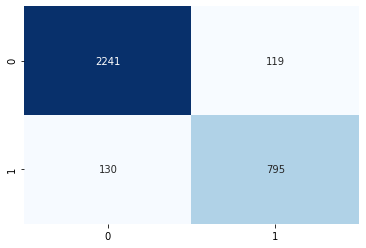

In [14]:
cfm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")